In [1]:
log_path = "data/monomers_mutations_with_isolates.log"

#MONOMER_NAME: [(MonomerId, mutations)...]
monomers_list = {}
with open(log_path) as fr:
    for line in fr:
        if "MonomerId" in line:
            monomerName = line.split()[0]
            monomerId = line.split("MonomerId= ")[-1].split()[0]
            mutationList = line.split('[ ')[-1].split(' ]')[0].split(', ')
            if mutationList[0] == '':
                mutationList = []
            
            for i in range(len(mutationList)):
                mutationList[i] = mutationList[i].split('(')[0]
            
            if monomerName not in monomers_list:
                monomers_list[monomerName] = []
            
            monomers_list[monomerName].append((monomerId, mutationList))
            
print(monomers_list)

{'S3CXH1L.5': [('0', ['14', '93', '128', '157']), ('11', ['99', '139', '140', '145', '162']), ('23', []), ('35', []), ('47', []), ('59', []), ('71', []), ('83', []), ('95', []), ('107', []), ('119', []), ('131', []), ('143', ['97']), ('155', []), ('167', ['98', '124']), ('179', []), ('191', ['98', '124']), ('203', []), ('215', []), ('227', ['98', '124']), ('239', []), ('251', []), ('263', ['98', '124']), ('275', []), ('287', []), ('299', []), ('311', []), ('323', []), ('335', ['153']), ('347', []), ('359', []), ('371', []), ('383', ['94']), ('395', []), ('407', []), ('419', []), ('431', ['160']), ('443', ['9', '94']), ('455', ['153']), ('467', ['22', '25']), ('479', []), ('491', ['22', '25']), ('503', ['148']), ('515', []), ('527', []), ('539', []), ('551', []), ('563', []), ('575', []), ('587', ['121']), ('599', []), ('611', ['121']), ('623', []), ('635', []), ('647', []), ('659', []), ('671', ['9']), ('683', []), ('695', []), ('707', ['9']), ('719', ['51']), ('731', ['9']), ('743', [

In [10]:
def show_hist(dists_list):
    import matplotlib.pyplot as plt
    #dists_list = dists_list[:int(0.9*len(dists_list))]
    plt.hist(dists_list, bins=[i + 0.1 for i in range(100)])
    plt.show()

In [11]:
#Calculate dist between all same mutations; Only for closest one
def have_same_mutation(monomer1, monomer2):
    return len(set(monomer1[1]) & set(monomer2[1])) > 0

In [12]:
def show_all_dist(is_same, bg_pos, ed_pos):
    dists_list = []

    for monoName in monomers_list:
        monoList = monomers_list[monoName]
        for frM_id in range(len(monoList)):
            if int(monoList[frM_id][0]) < bg_pos or int(monoList[frM_id][0]) > ed_pos:
                continue
            
            if len(monoList[frM_id][1]) == 0:
                continue
        
            for scM_id in range(frM_id + 1, len(monoList)):
                if int(monoList[scM_id][0]) < bg_pos or int(monoList[scM_id][0]) > ed_pos:
                    continue
            
                if is_same(monoList[frM_id], monoList[scM_id]):
                    dists_list.append(scM_id - frM_id)
                
    dists_list.sort()
    #print(dists_list)
    show_hist(dists_list)
    

0


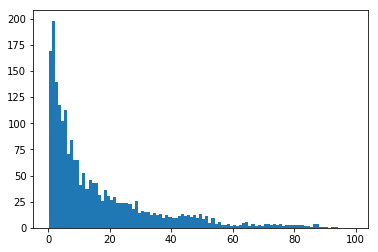

1


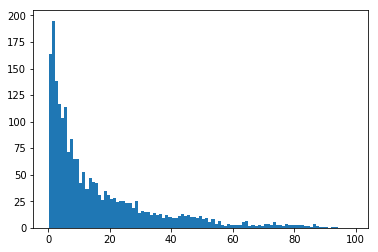

2


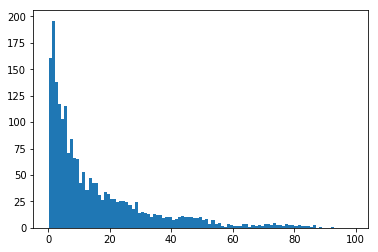

3


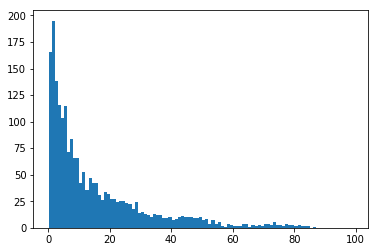

4


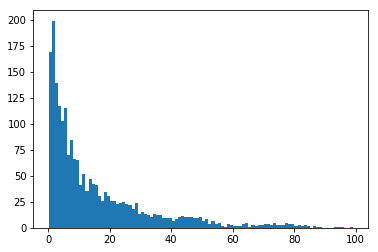

5


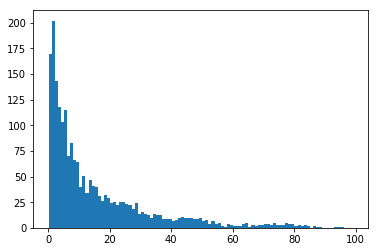

6


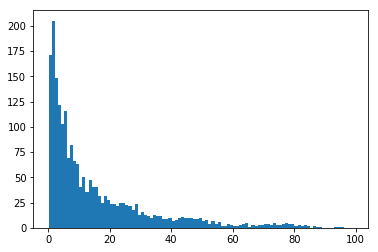

7


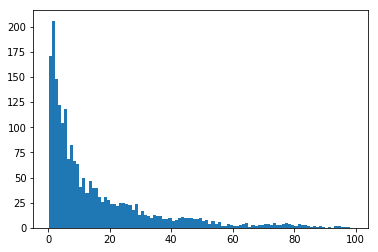

8


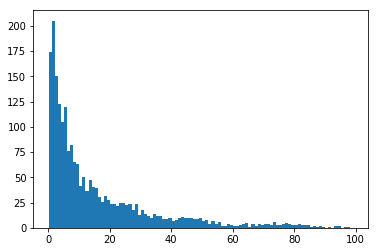

9


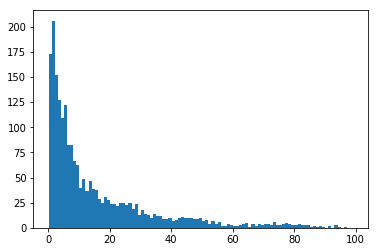

10


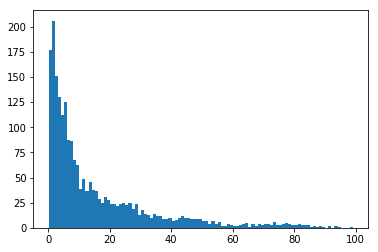

11


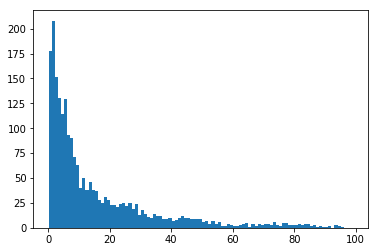

12


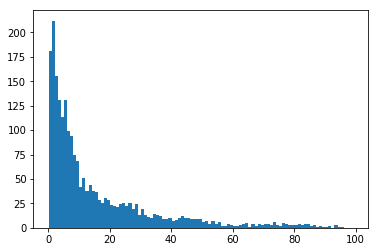

13


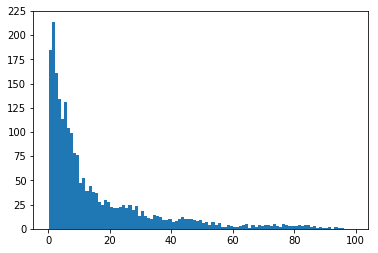

14


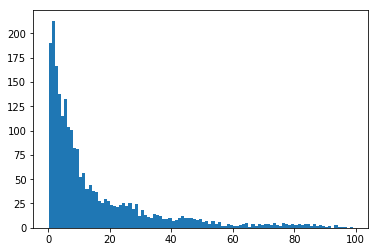

15


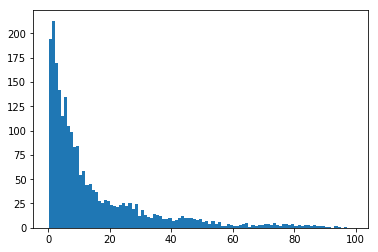

16


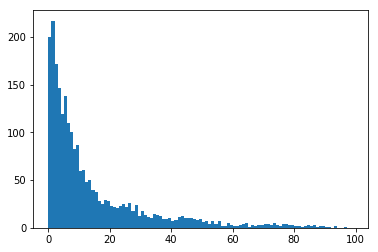

17


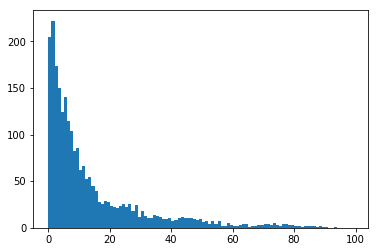

18


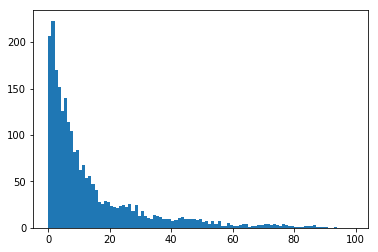

19


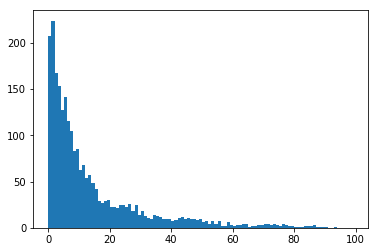

20


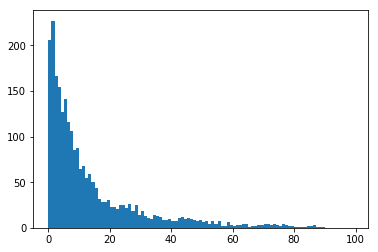

21


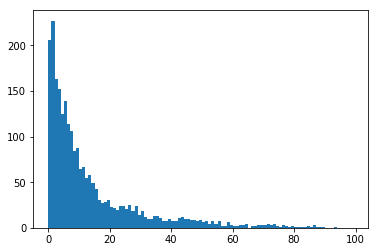

22


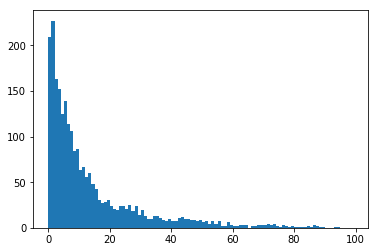

23


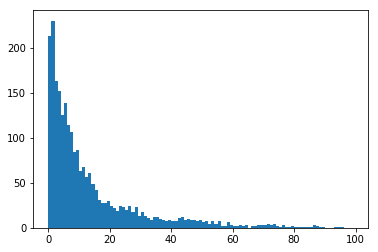

24


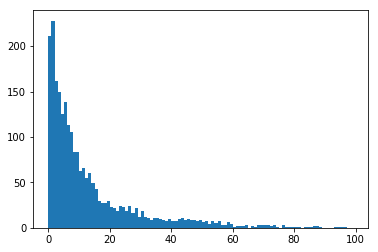

25


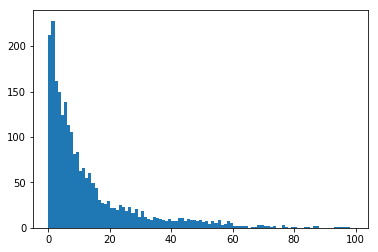

26


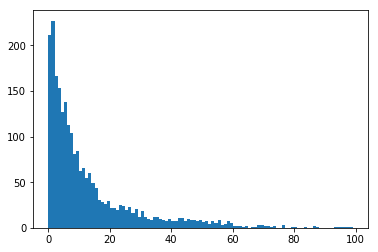

27


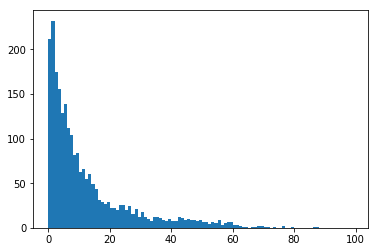

28


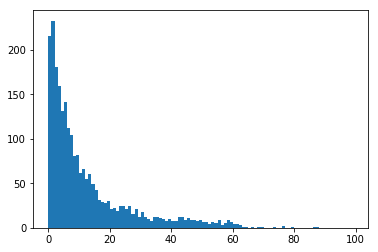

29


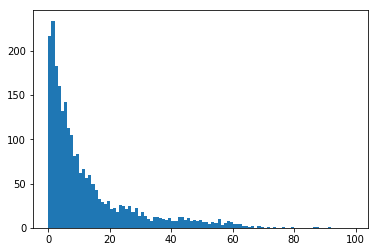

30


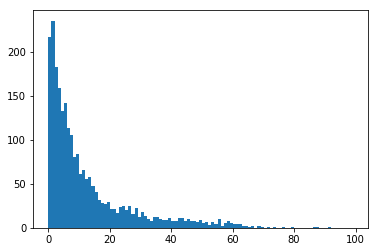

31


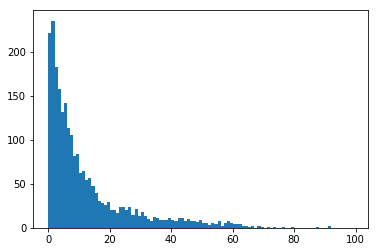

32


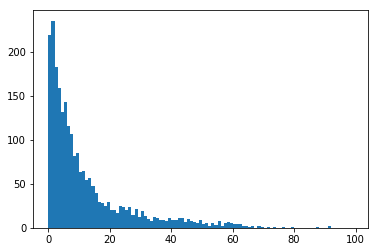

33


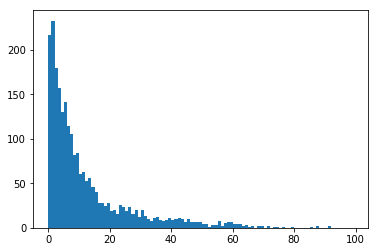

34


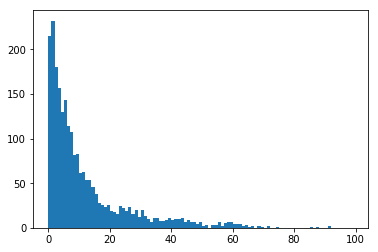

35


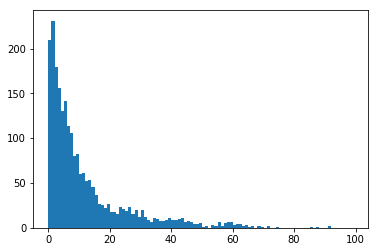

36


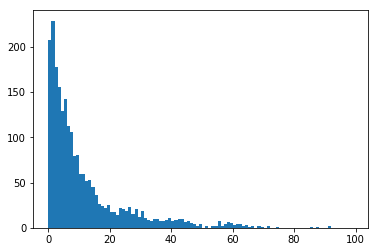

37


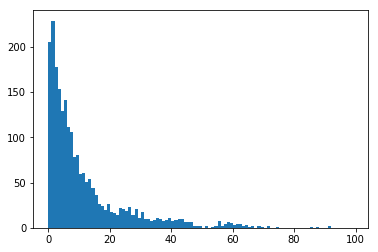

38


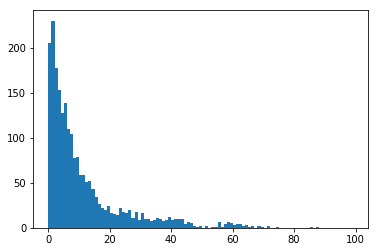

39


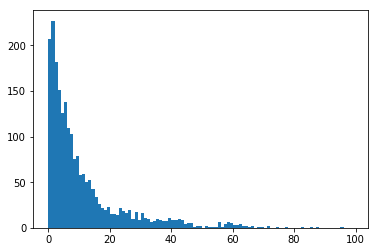

40


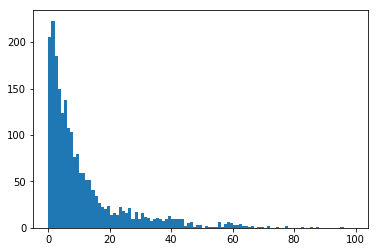

41


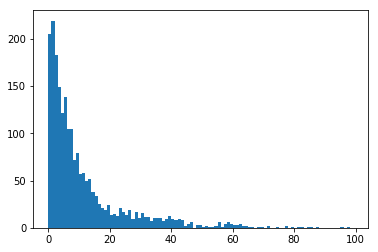

42


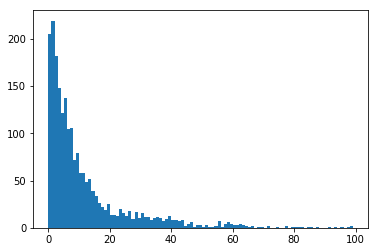

43


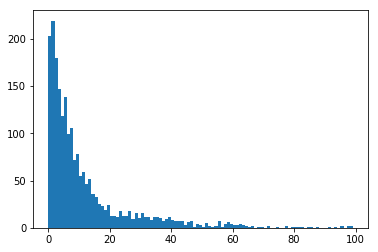

44


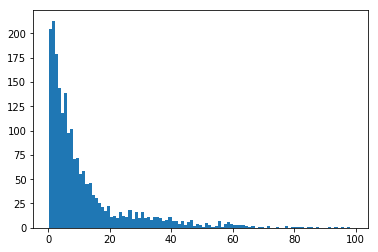

45


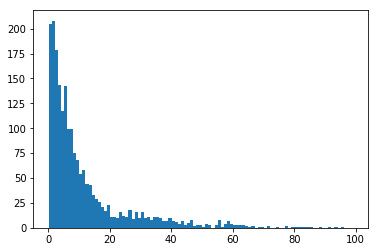

46


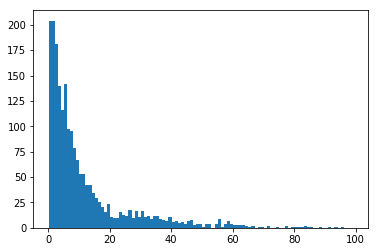

47


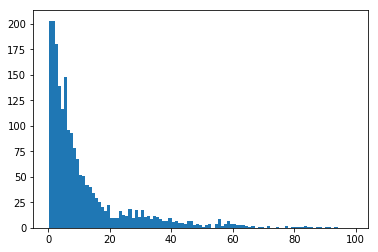

48


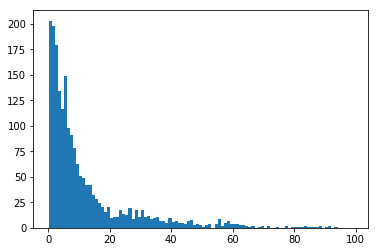

49


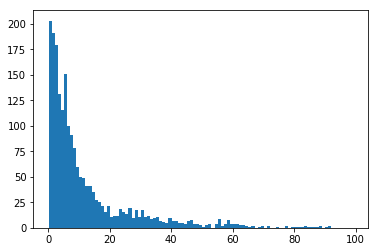

50


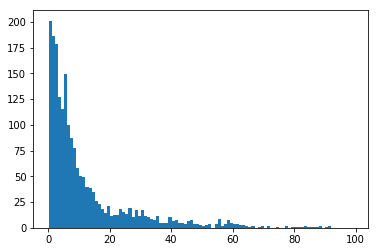

51


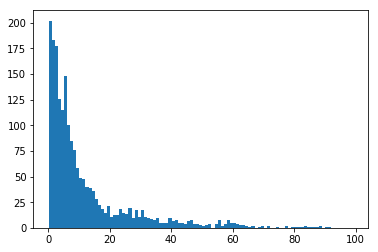

52


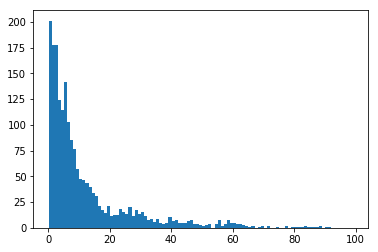

53


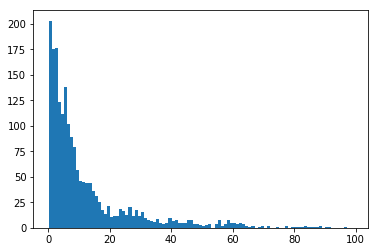

54


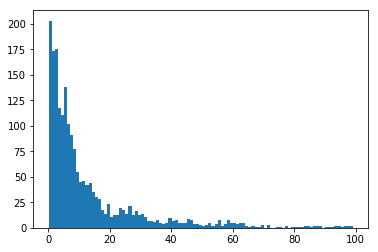

55


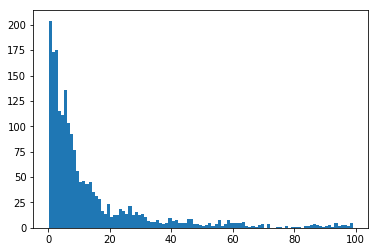

56


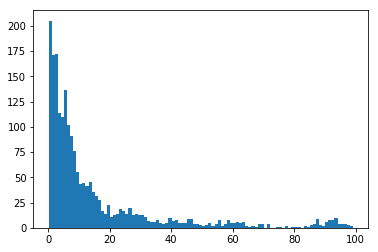

57


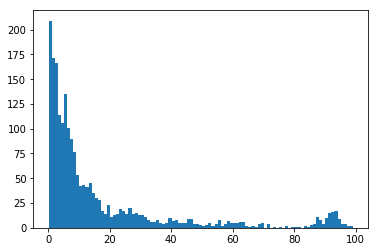

58


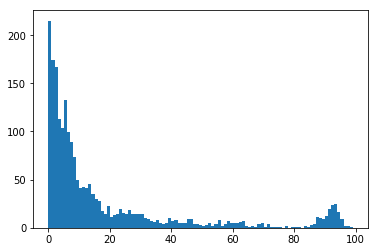

59


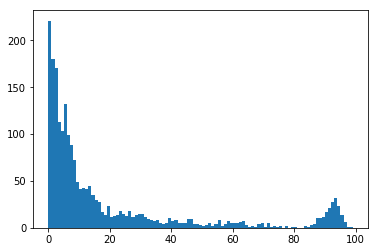

60


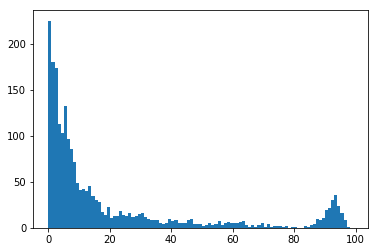

61


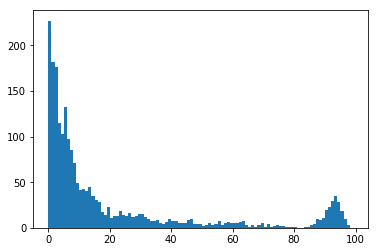

62


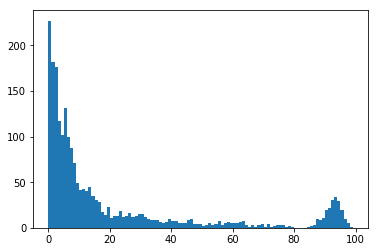

63


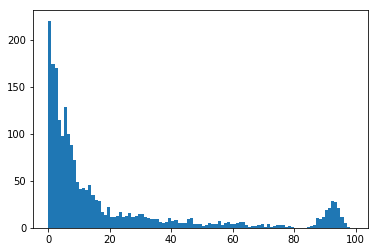

64


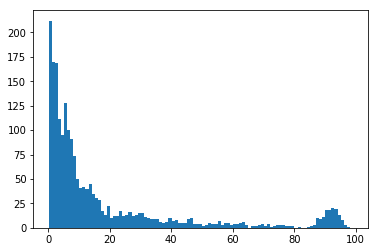

65


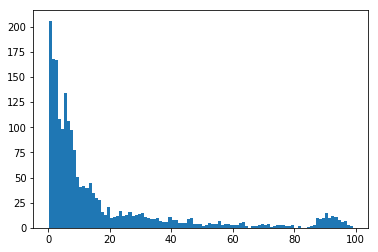

66


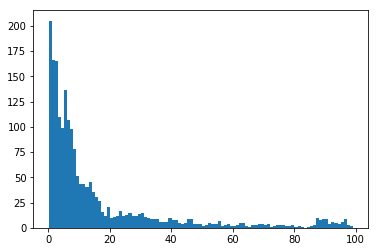

67


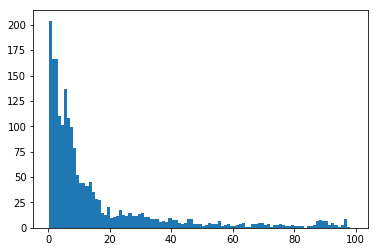

68


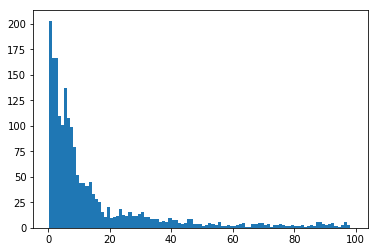

69


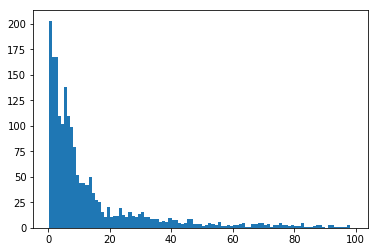

70


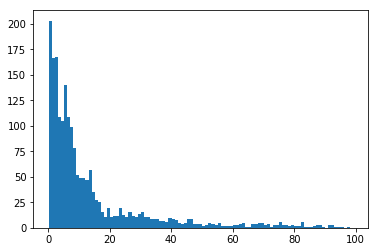

71


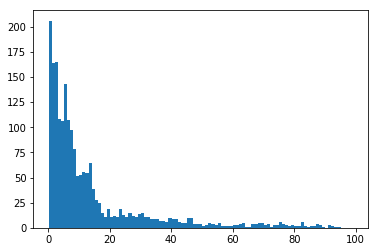

72


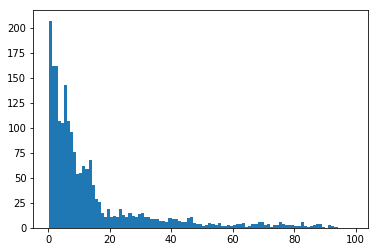

73


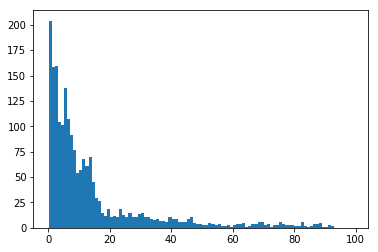

74


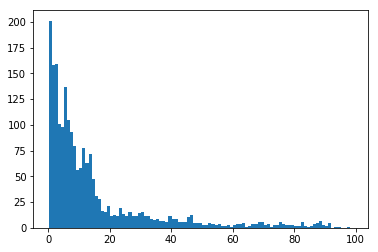

75


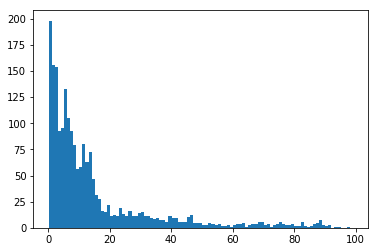

76


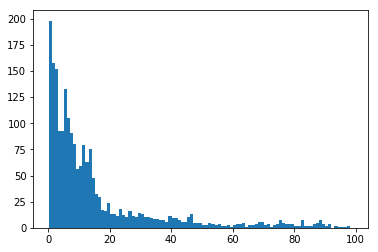

77


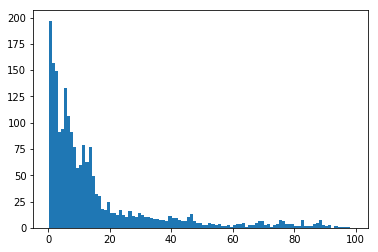

78


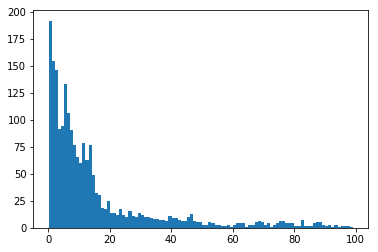

79


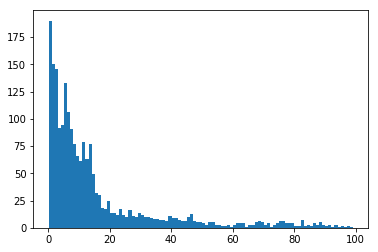

80


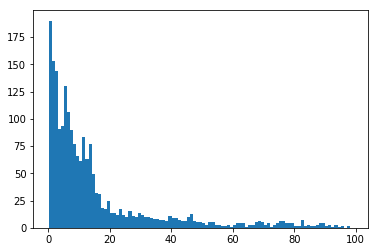

81


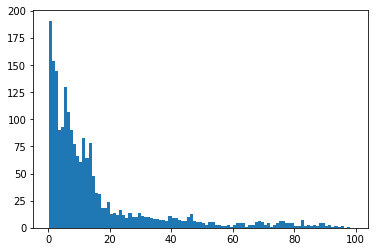

82


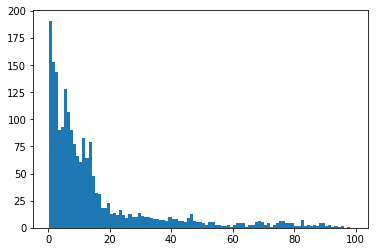

83


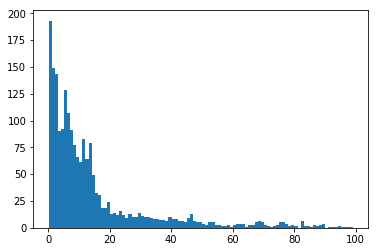

84


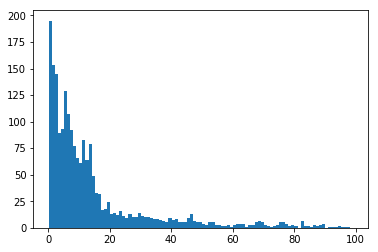

85


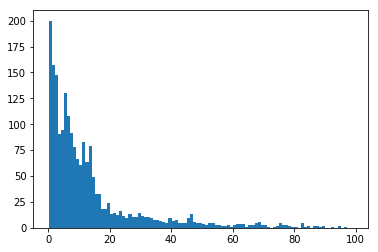

86


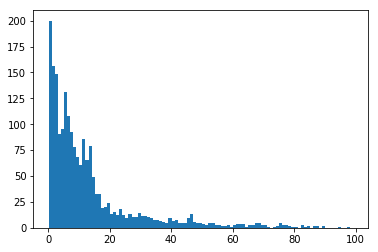

87


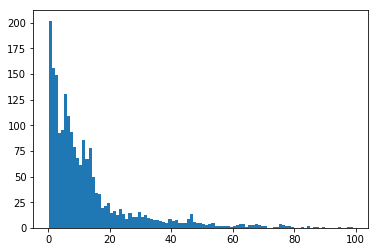

88


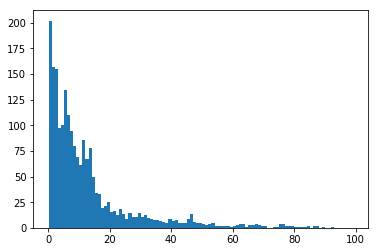

89


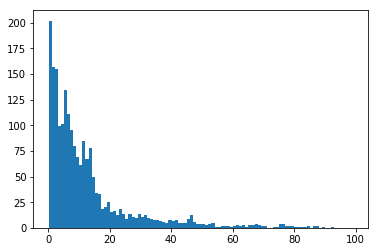

90


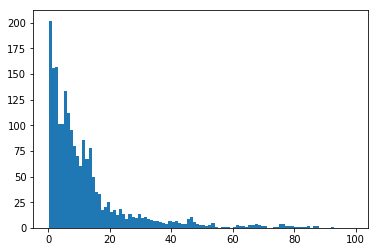

91


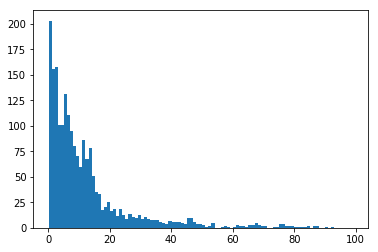

92


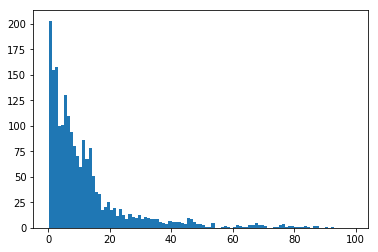

93


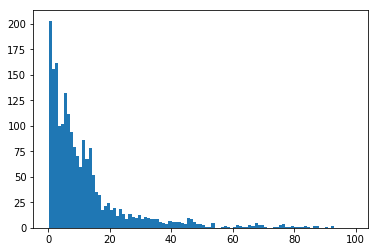

94


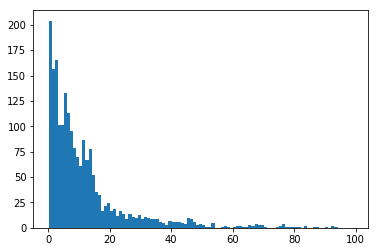

95


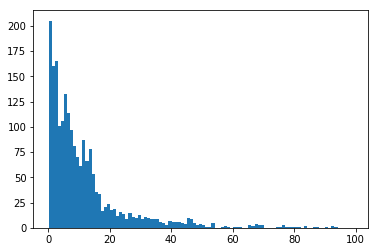

96


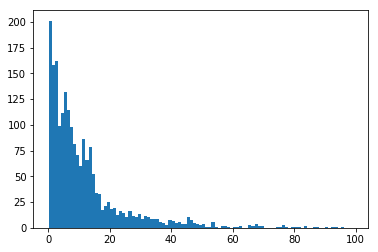

97


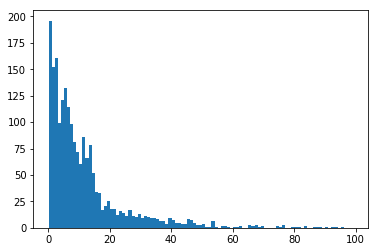

98


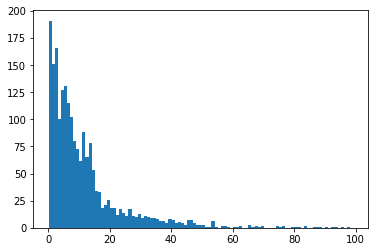

99


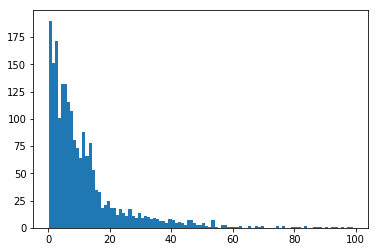

100


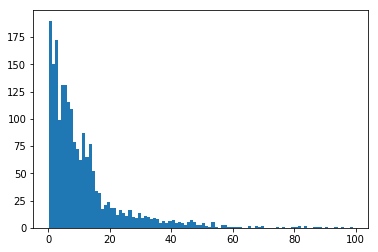

101


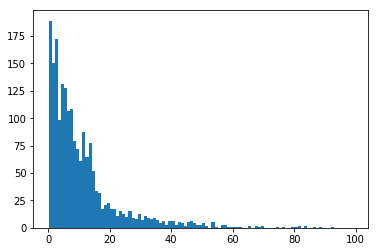

102


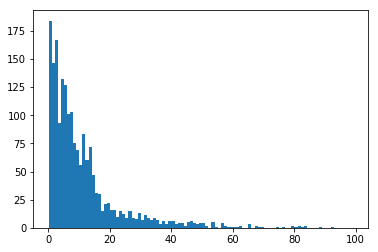

103


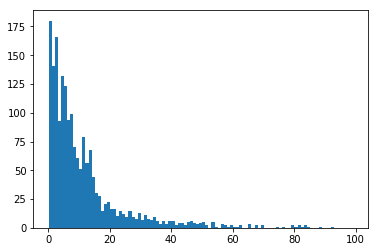

104


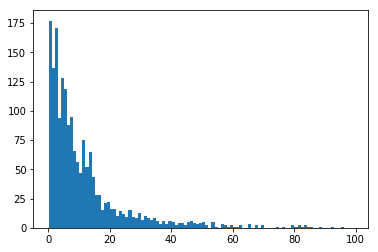

105


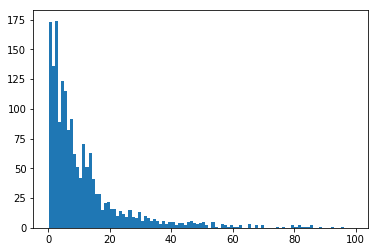

106


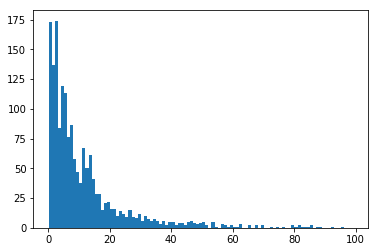

107


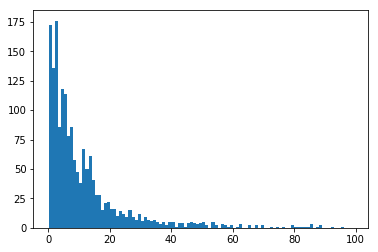

108


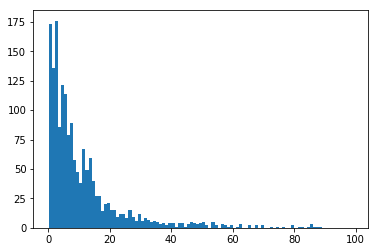

109


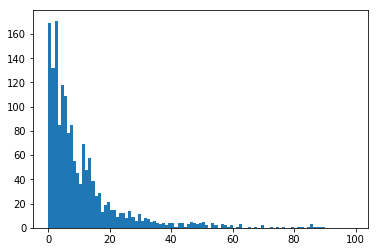

110


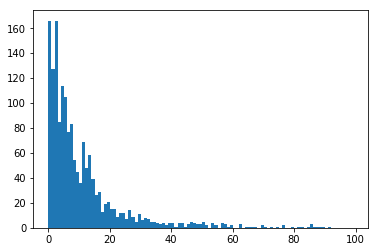

111


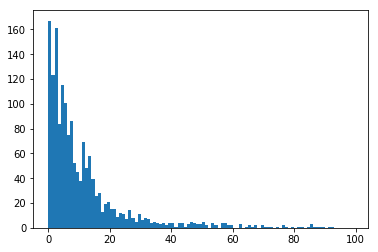

112


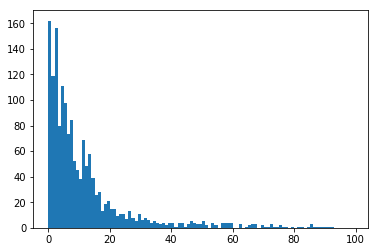

113


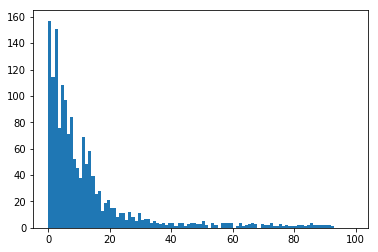

114


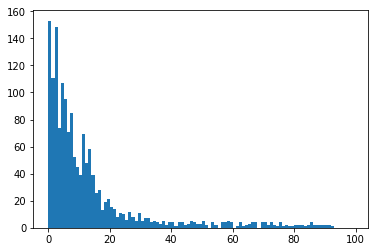

115


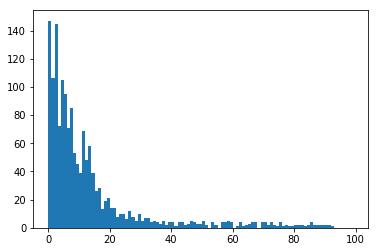

116


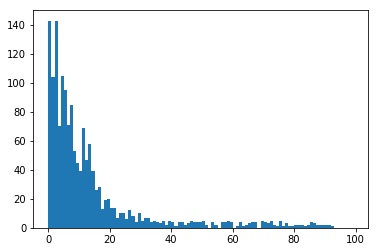

117


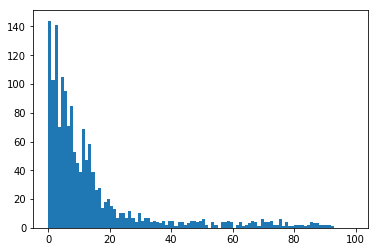

118


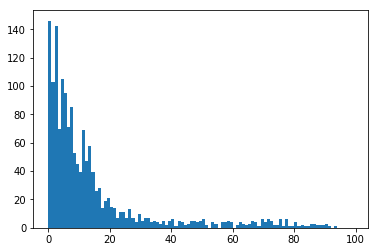

119


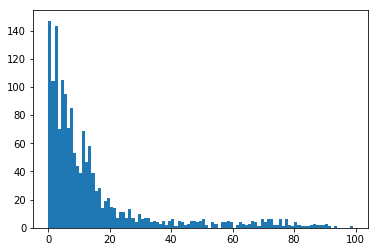

120


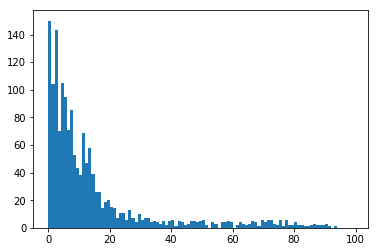

121


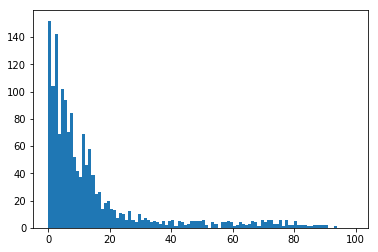

122


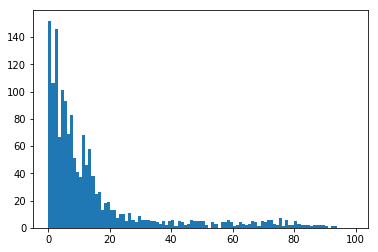

123


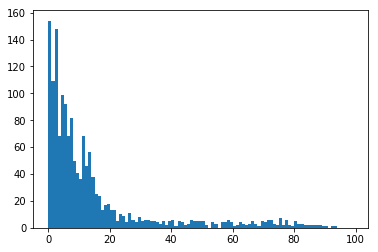

124


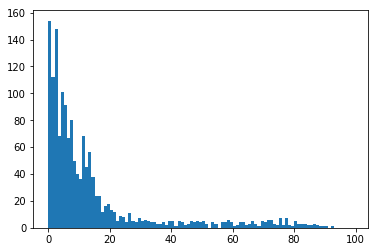

125


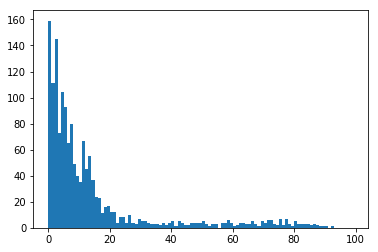

126


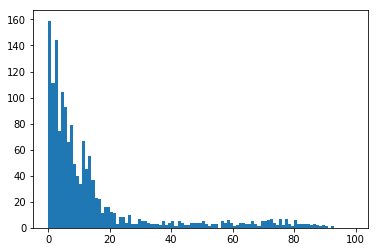

127


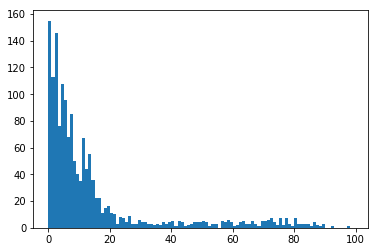

128


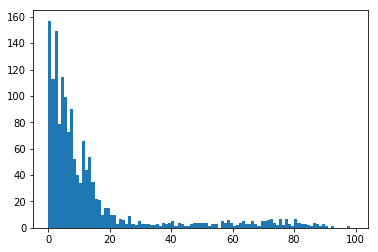

129


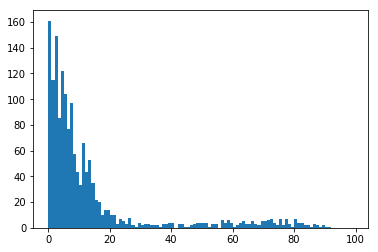

130


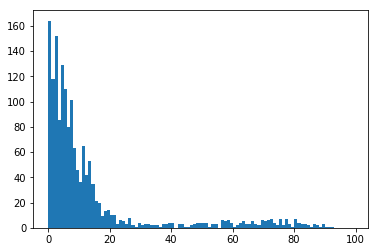

131


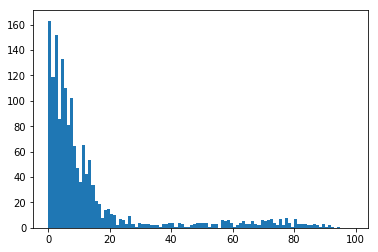

132


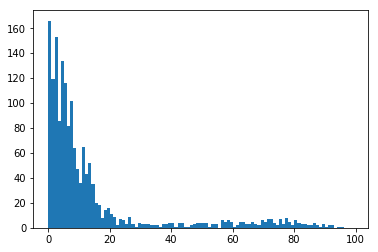

133


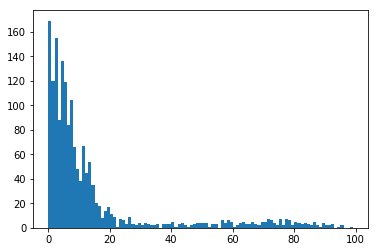

134


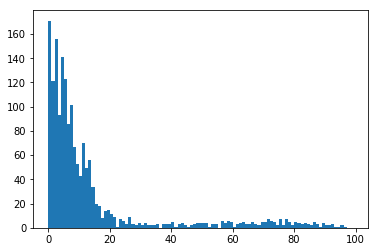

135


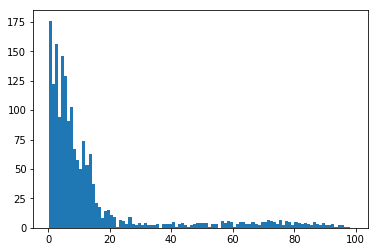

136


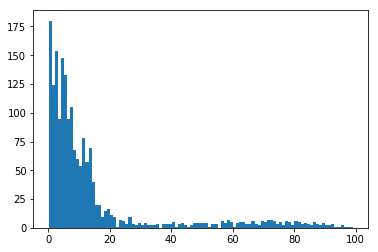

137


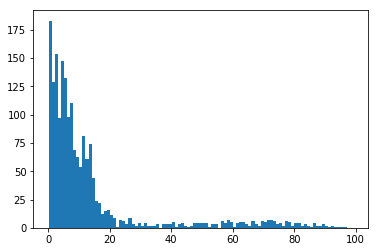

138


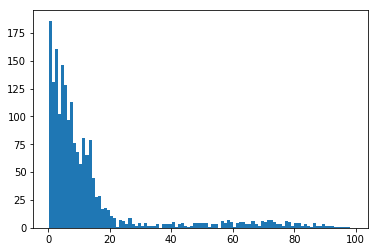

139


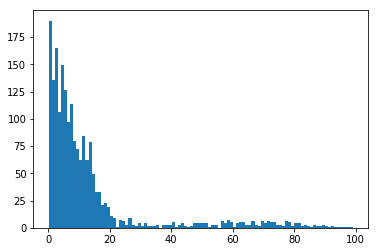

140


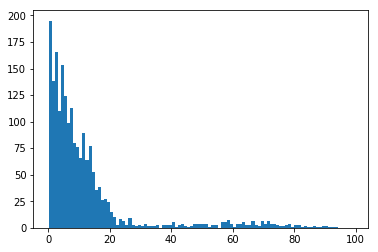

141


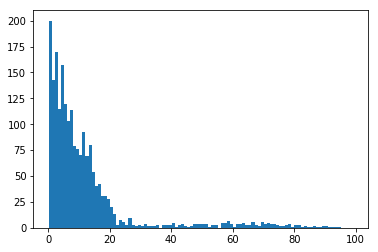

142


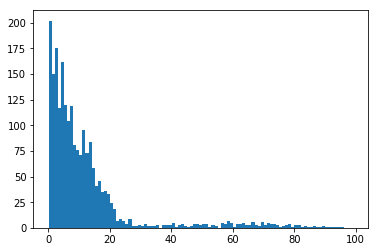

143


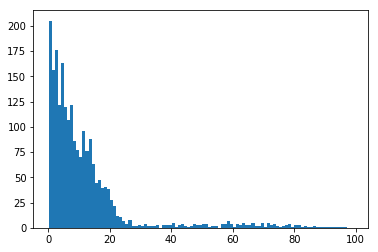

144


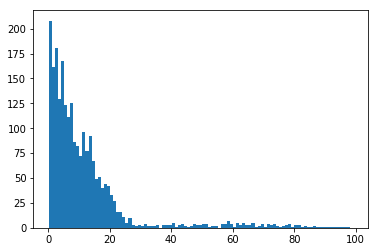

145


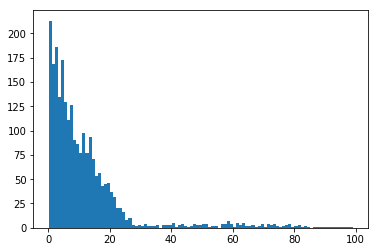

146


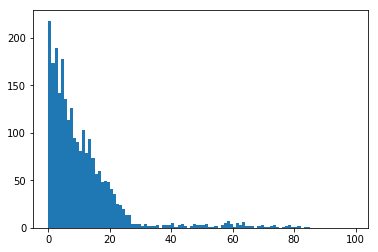

147


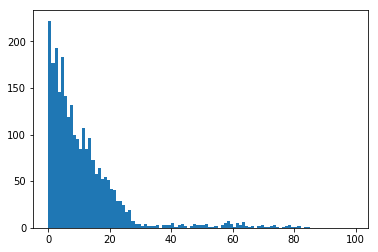

148


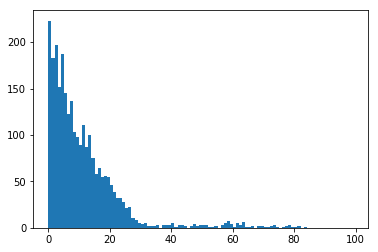

149


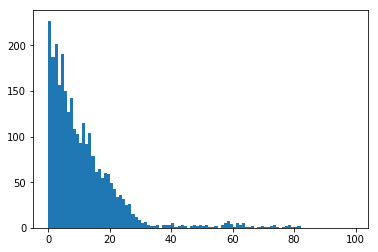

150


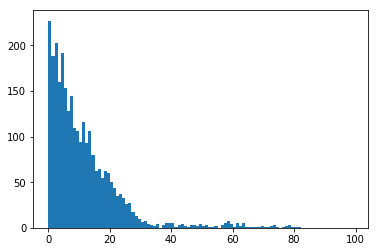

151


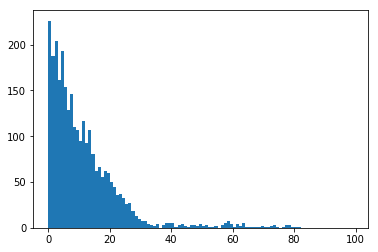

152


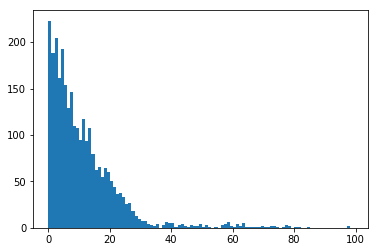

153


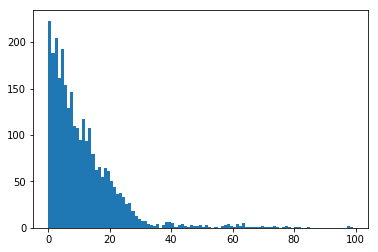

154


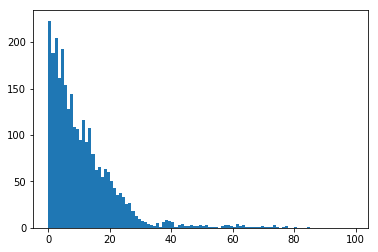

155


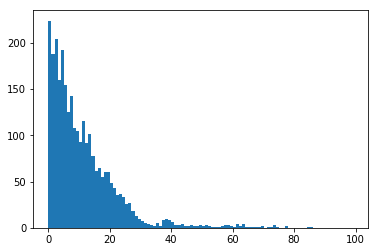

156


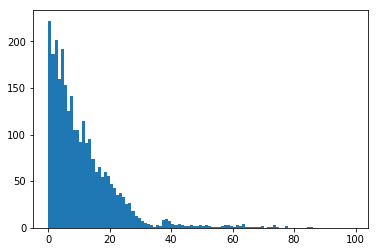

157


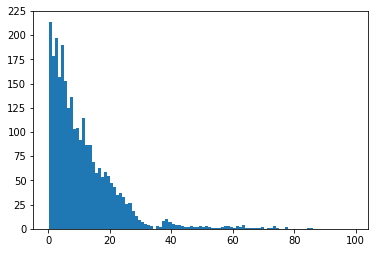

158


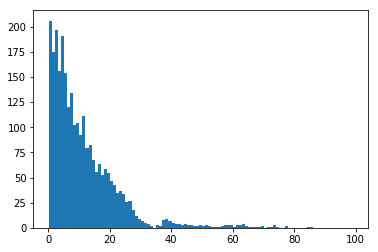

159


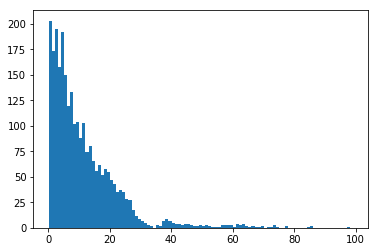

160


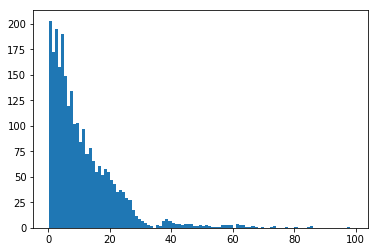

161


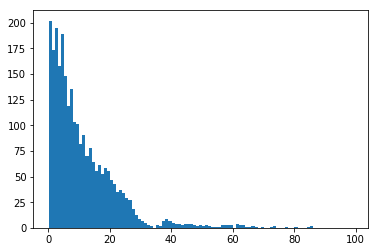

162


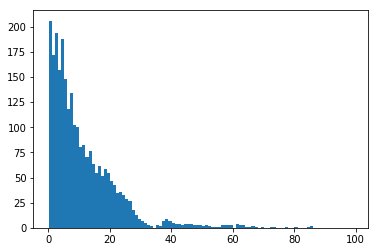

163


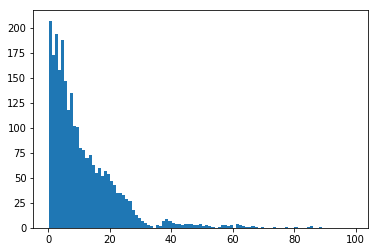

164


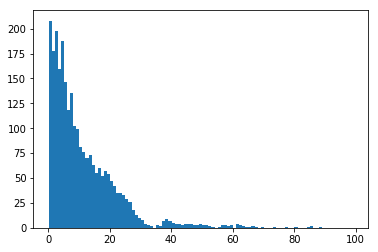

165


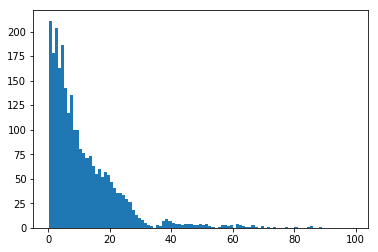

166


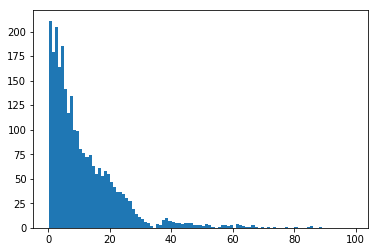

167


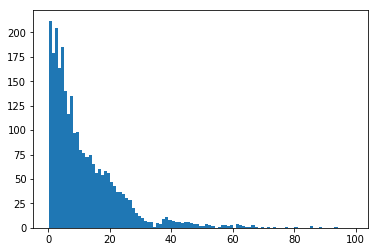

168


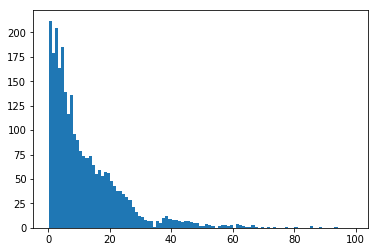

169


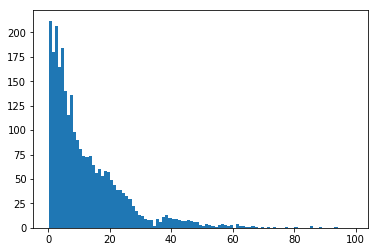

170


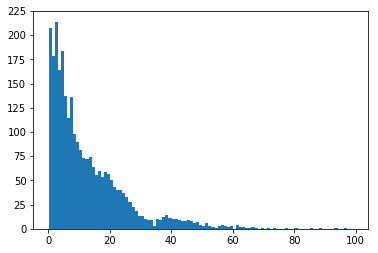

171


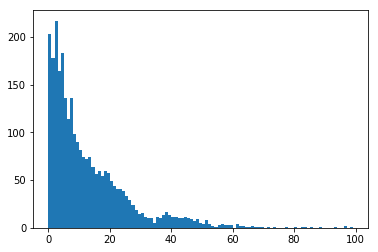

172


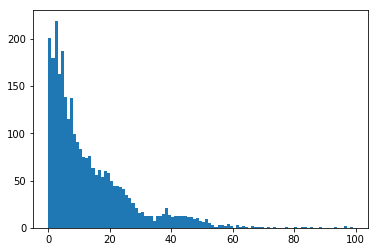

173


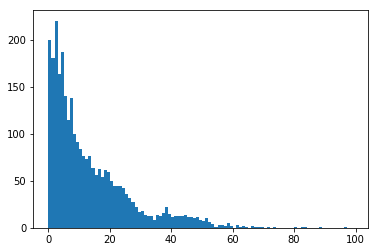

174


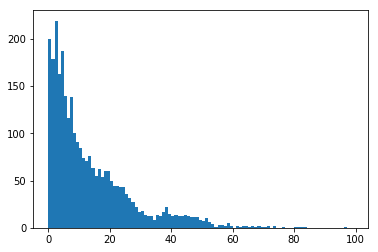

175


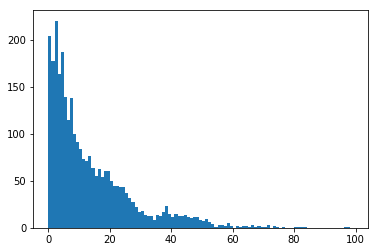

176


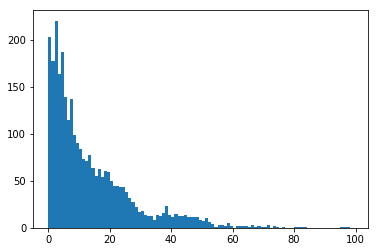

177


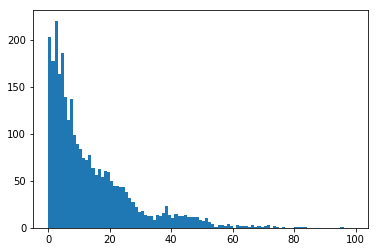

178


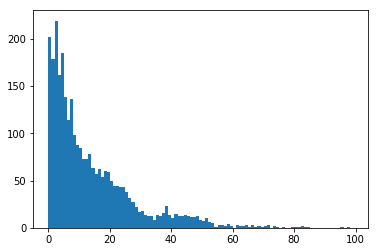

179


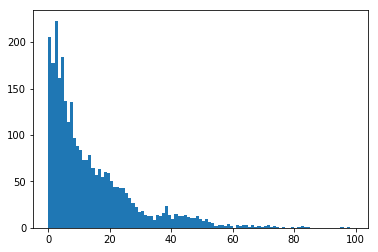

180


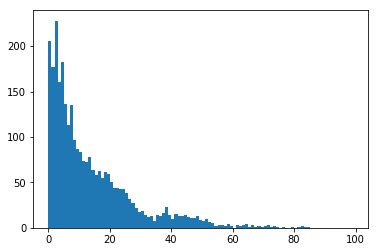

181


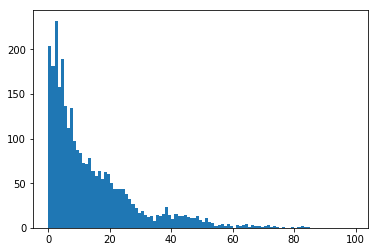

182


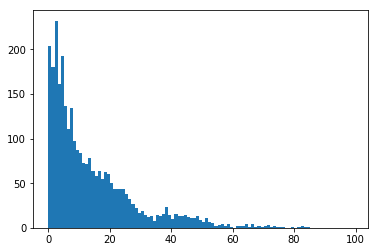

183


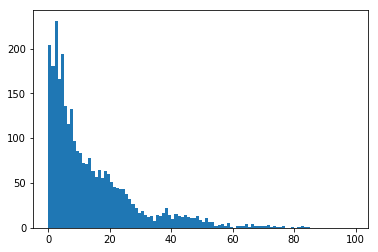

184


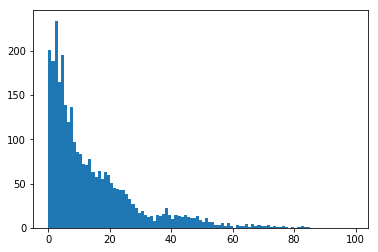

185


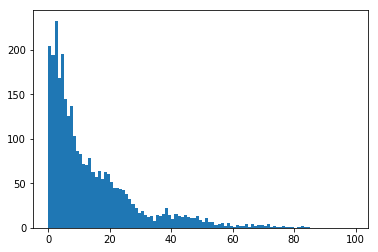

186


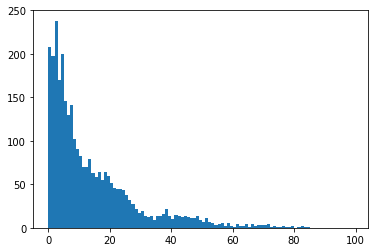

187


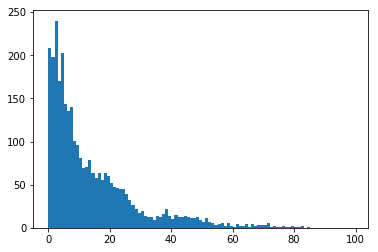

188


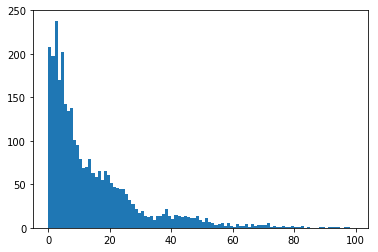

189


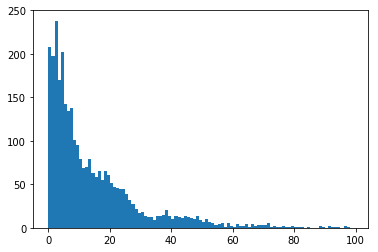

190


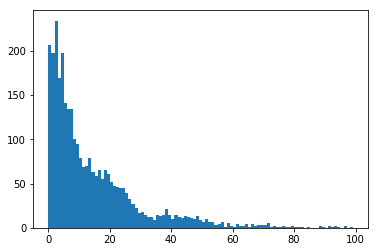

191


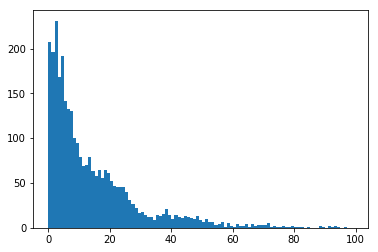

192


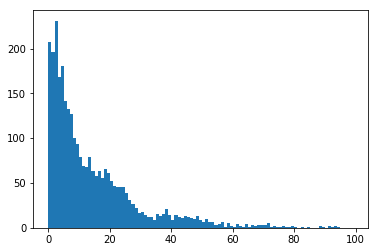

193


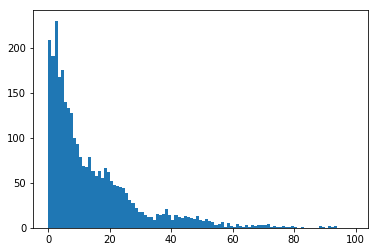

194


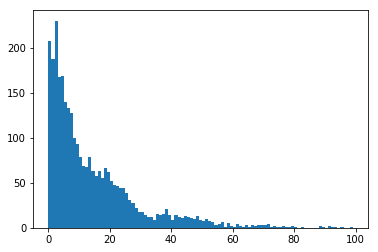

195


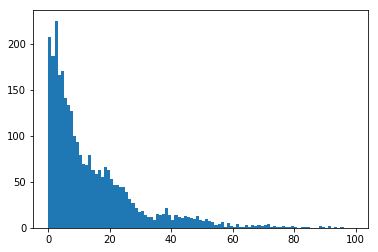

196


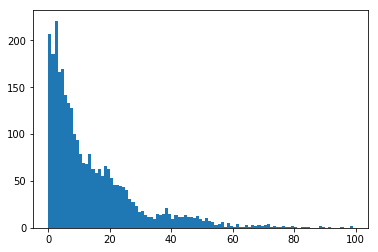

197


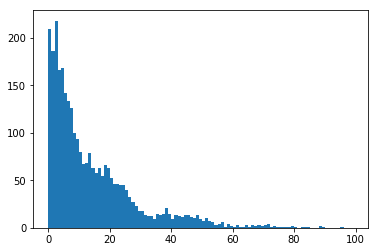

198


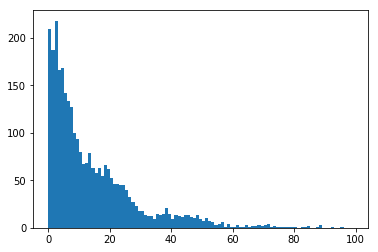

199


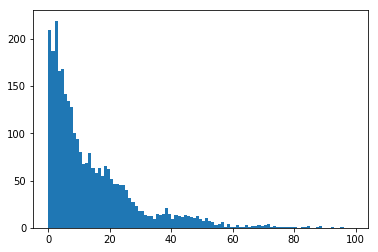

200


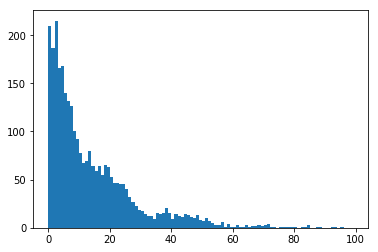

201


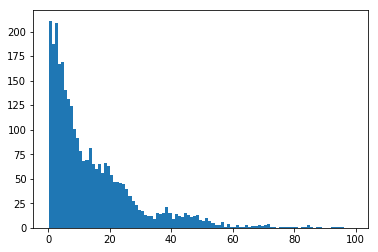

202


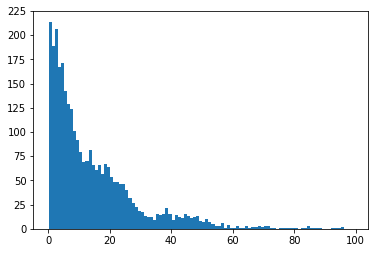

203


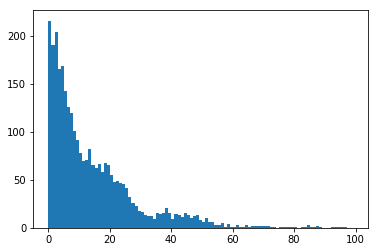

204


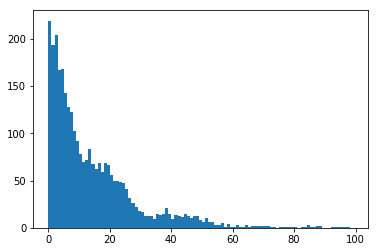

205


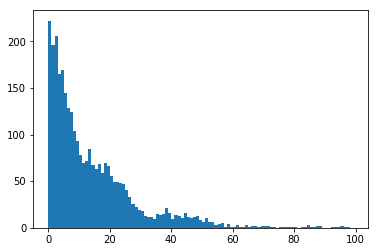

206


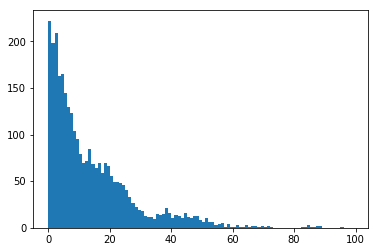

207


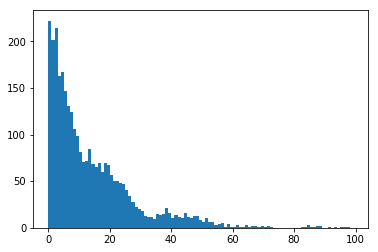

208


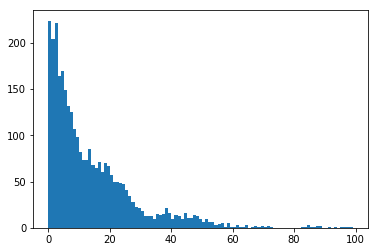

209


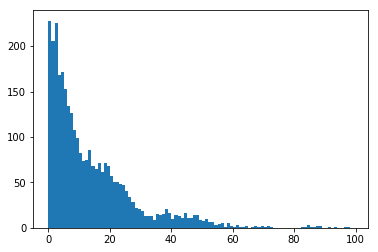

210


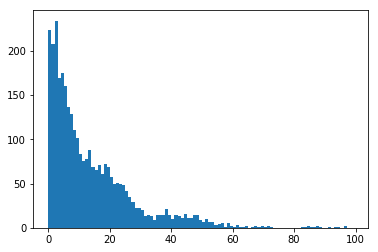

211


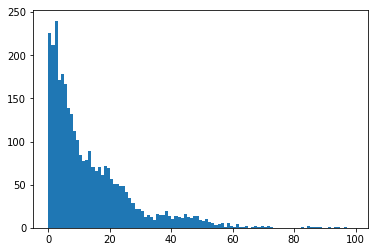

212


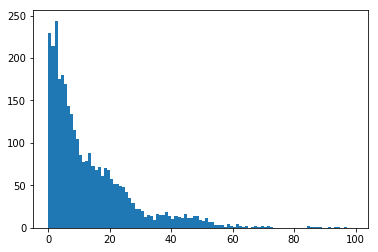

213


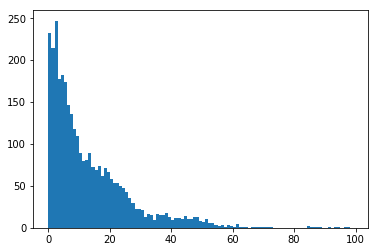

214


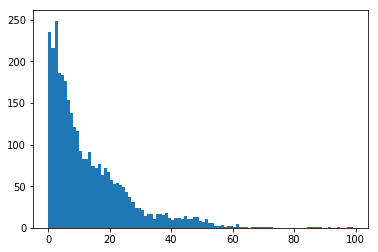

215


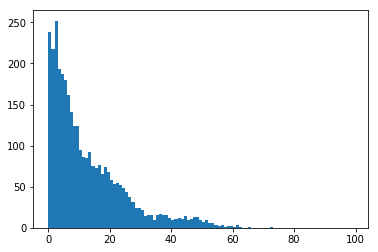

216


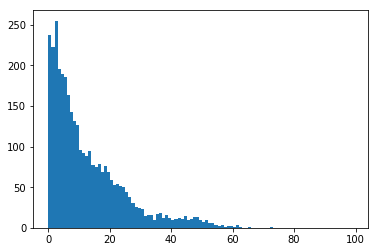

217


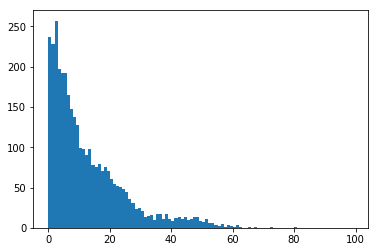

218


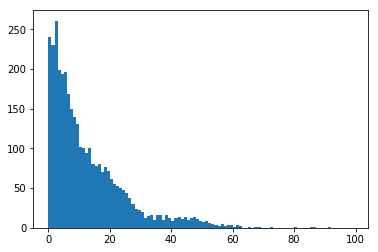

219


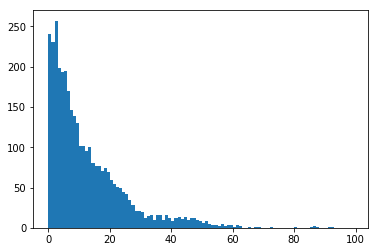

220


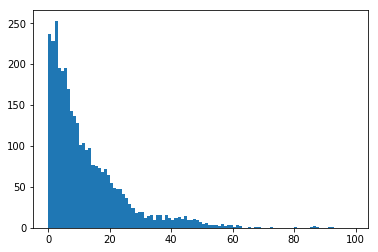

221


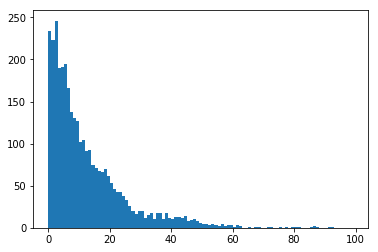

222


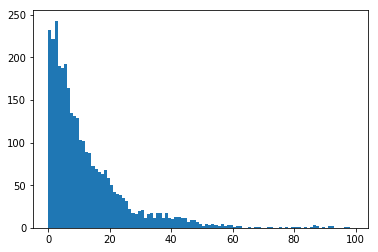

223


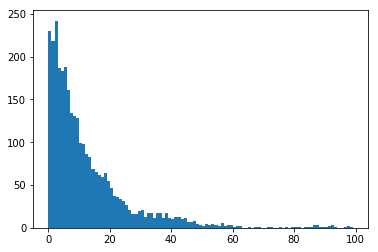

224


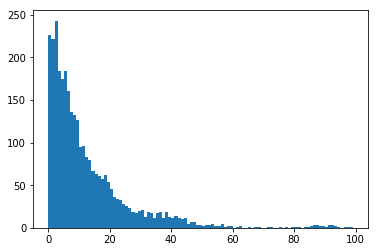

225


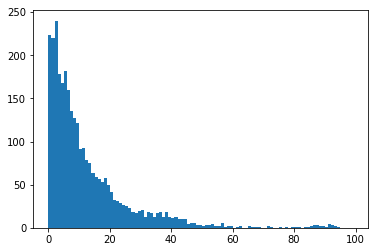

226


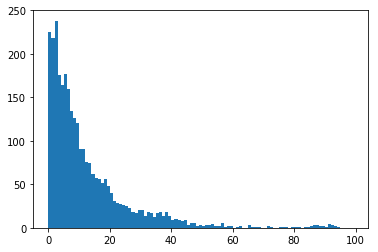

227


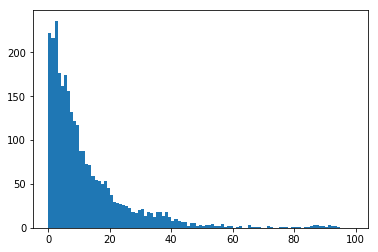

228


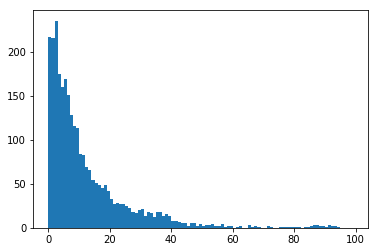

229


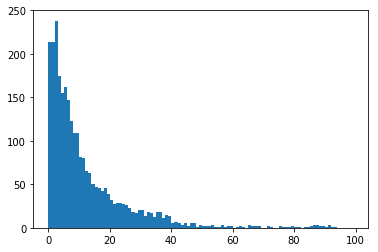

230


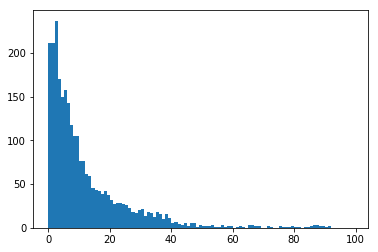

231


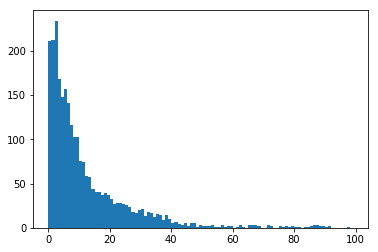

232


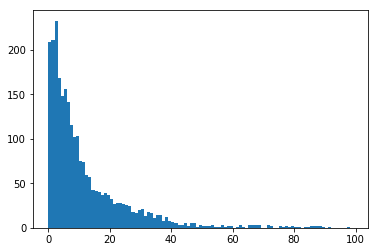

233


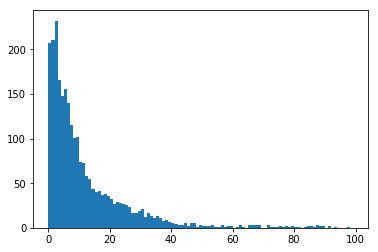

234


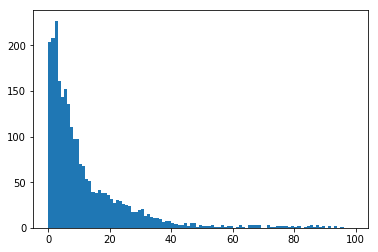

235


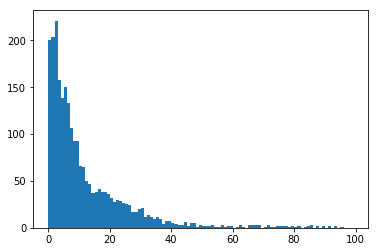

236


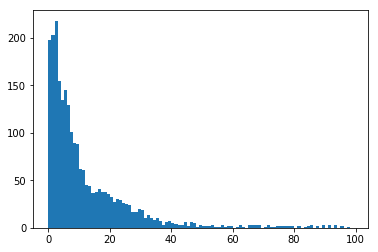

237


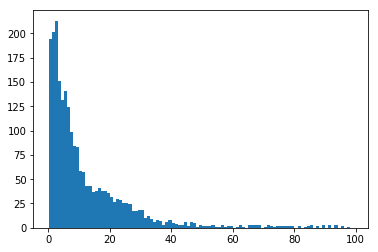

238


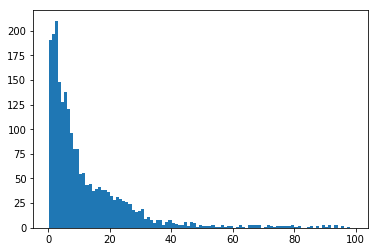

239


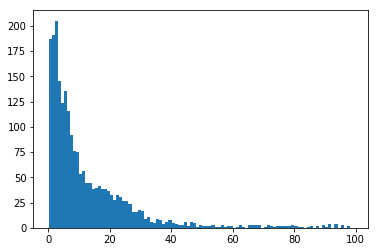

240


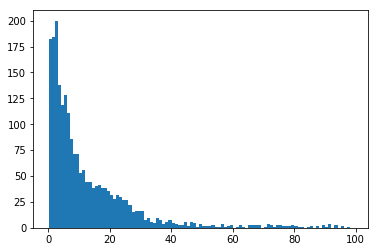

241


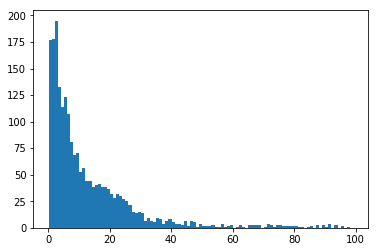

242


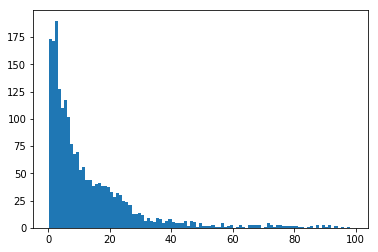

243


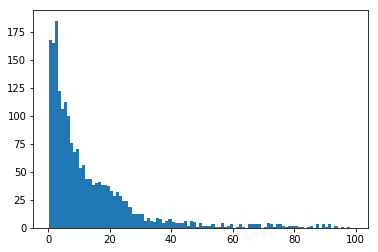

244


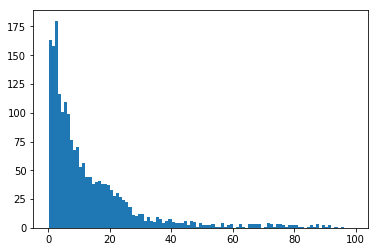

245


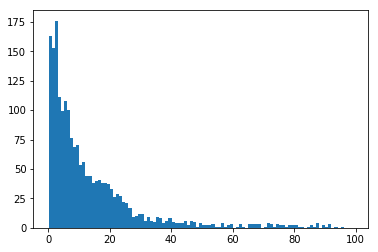

246


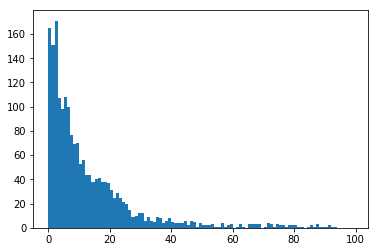

247


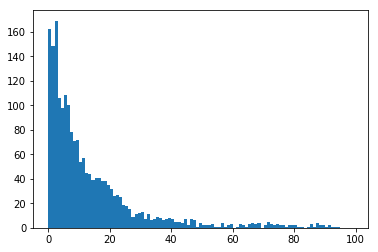

248


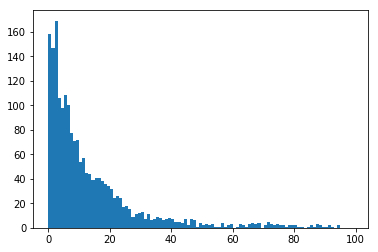

249


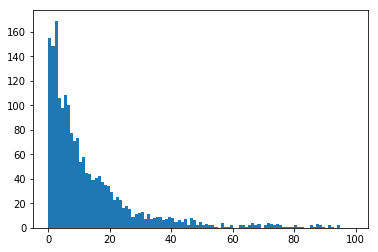

250


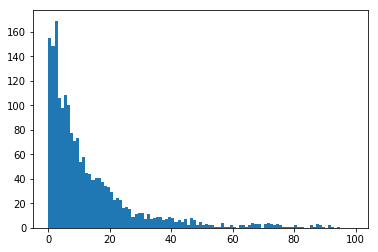

251


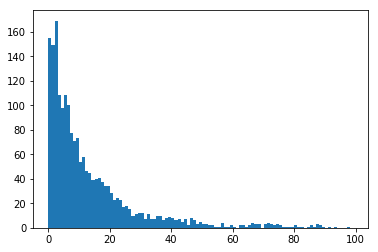

252


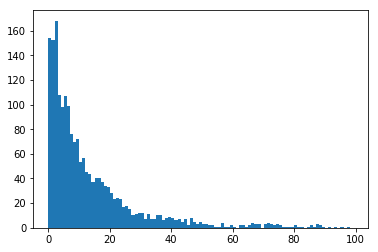

253


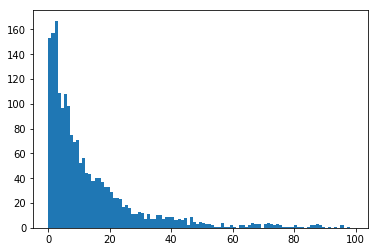

254


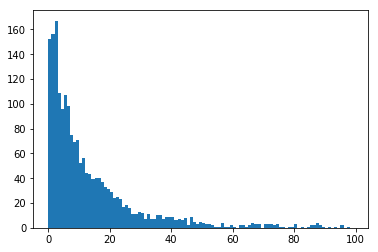

255


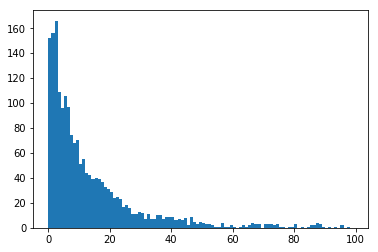

256


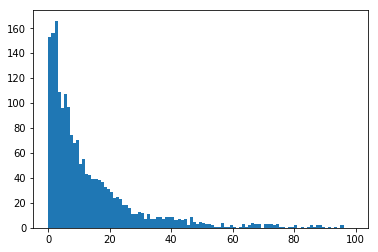

257


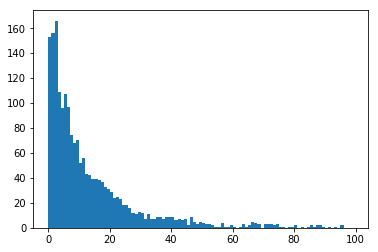

258


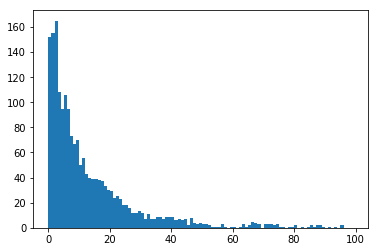

259


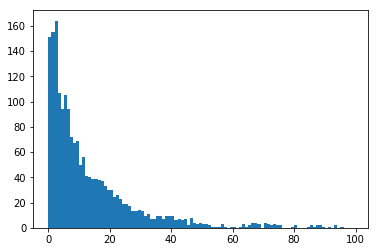

260


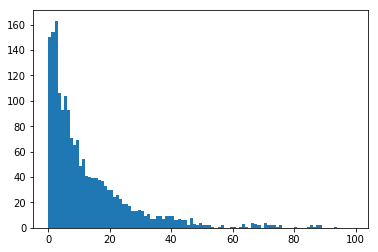

261


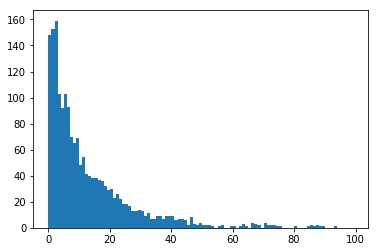

262


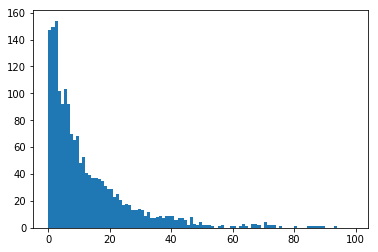

263


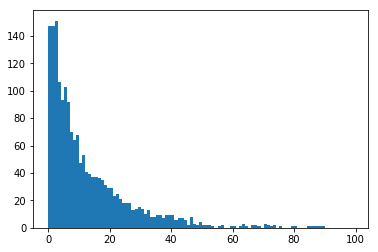

264


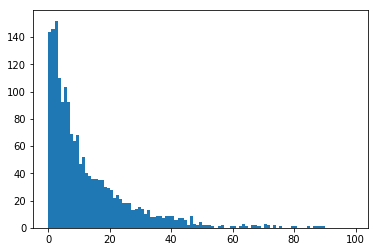

265


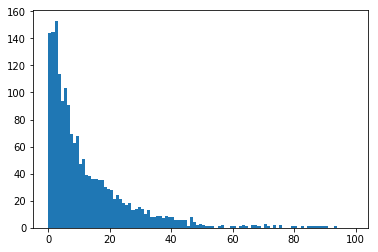

266


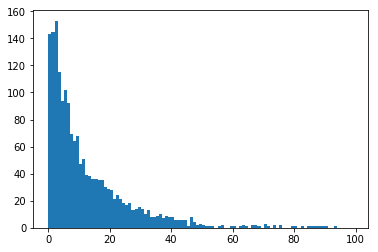

267


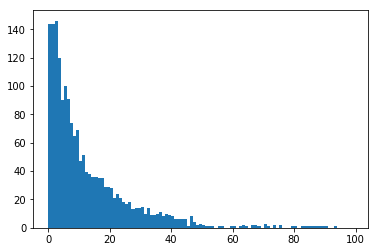

268


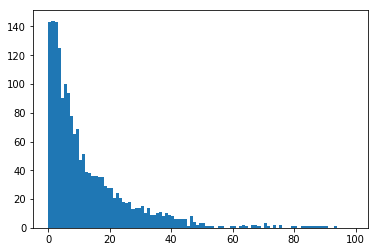

269


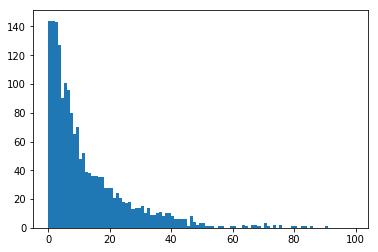

270


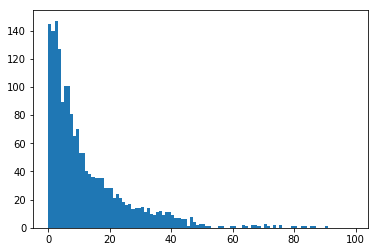

271


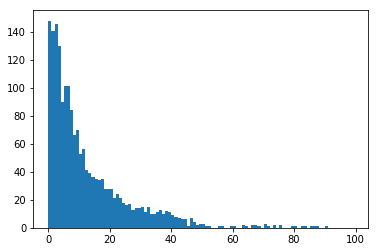

272


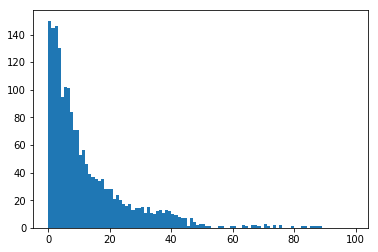

273


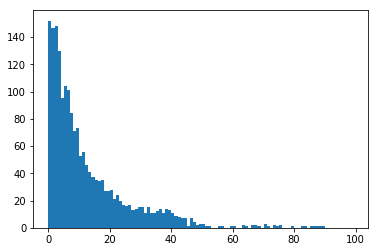

274


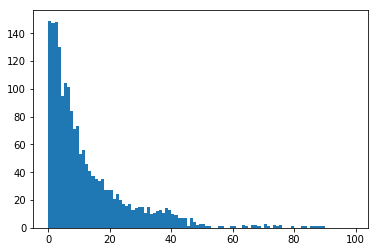

275


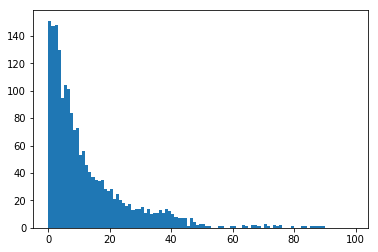

276


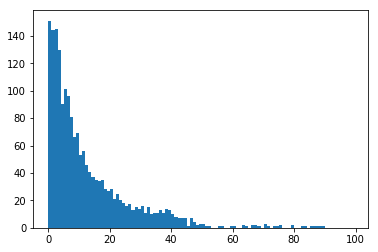

277


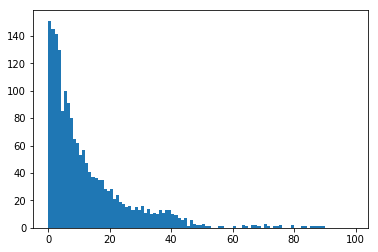

278


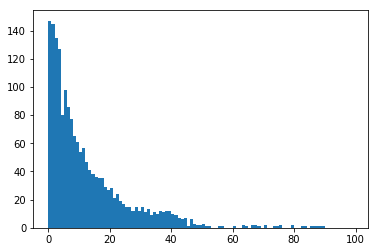

279


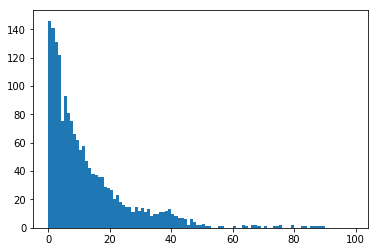

280


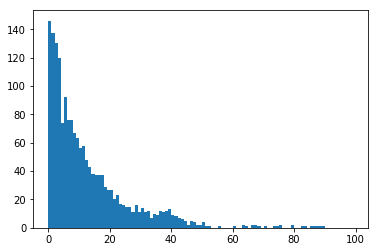

281


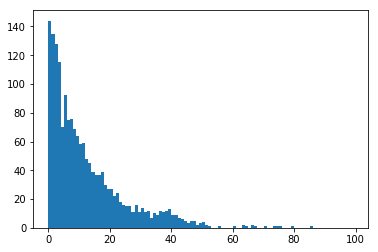

282


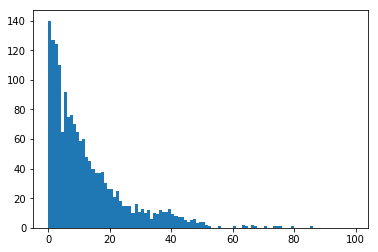

283


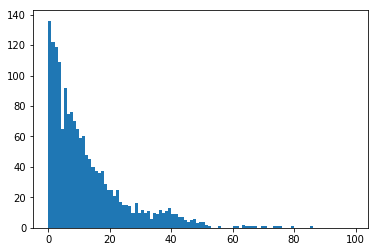

284


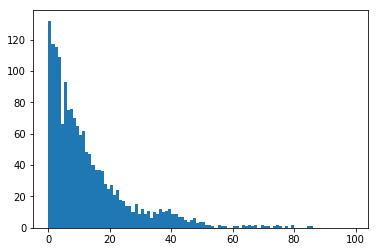

285


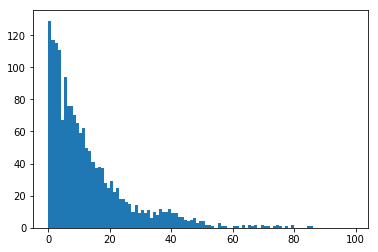

286


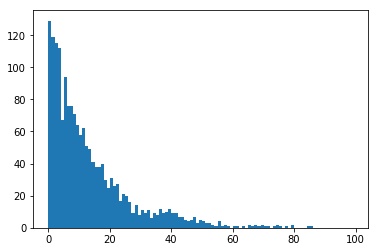

287


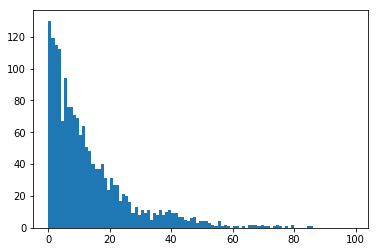

288


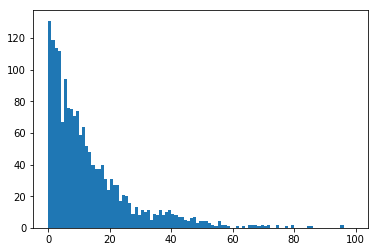

289


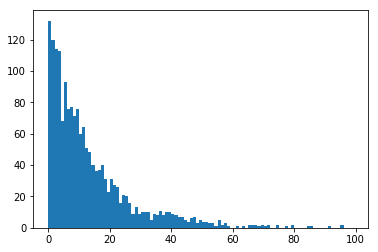

290


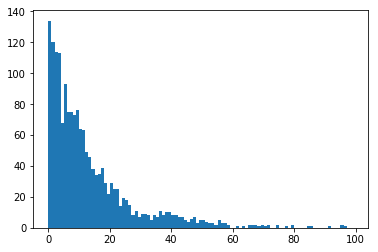

291


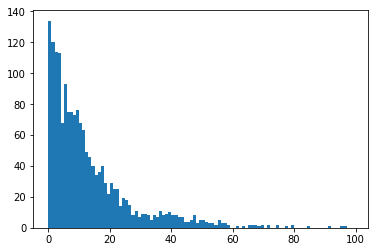

292


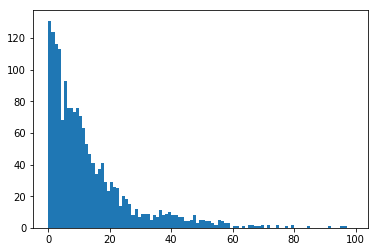

293


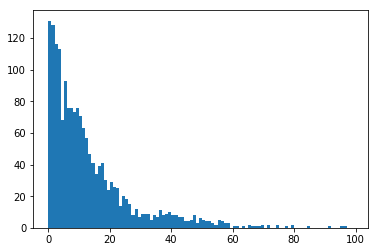

294


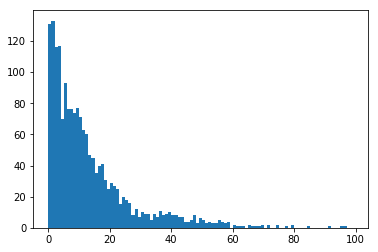

295


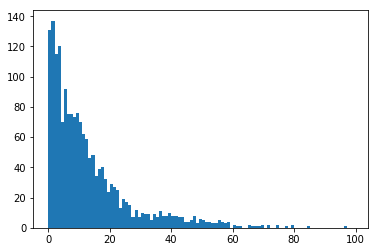

296


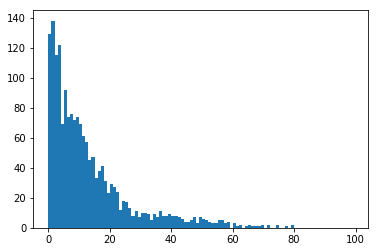

297


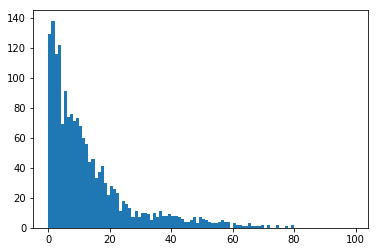

298


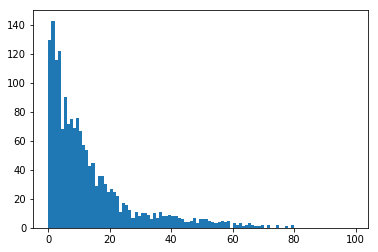

299


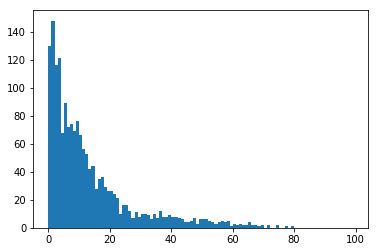

300


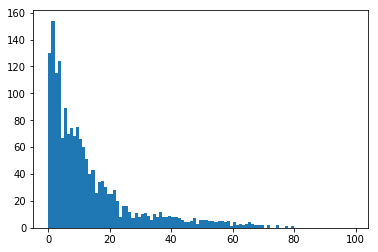

301


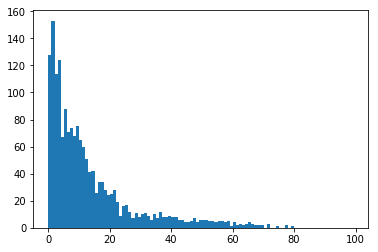

302


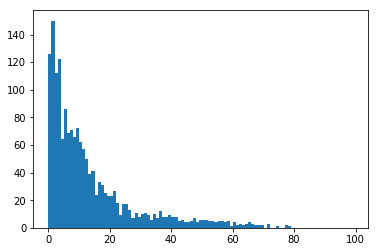

303


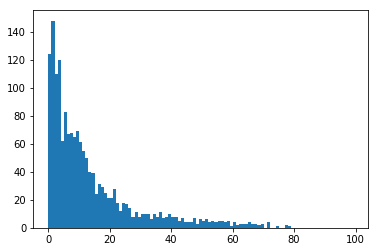

304


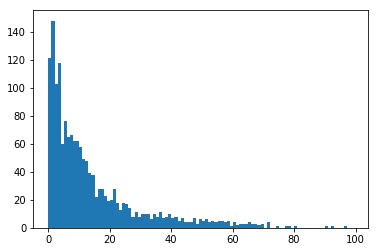

305


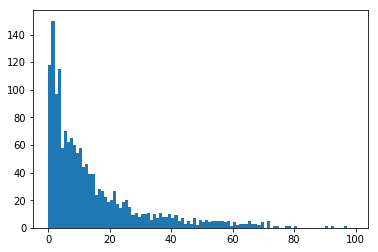

306


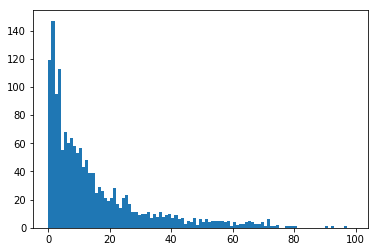

307


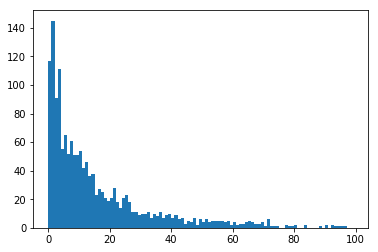

308


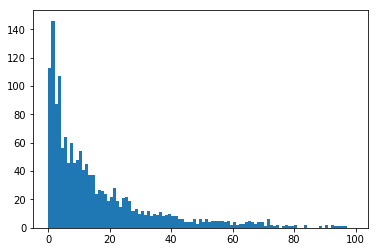

309


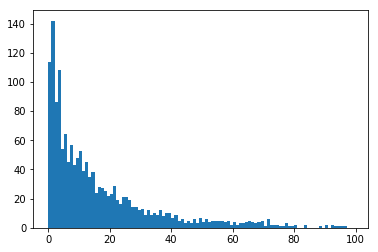

310


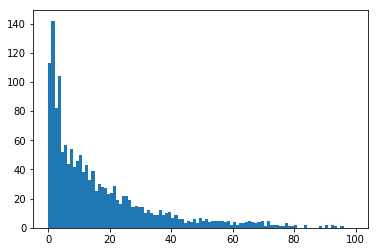

311


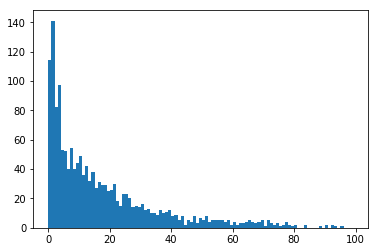

312


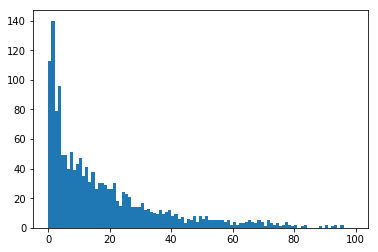

313


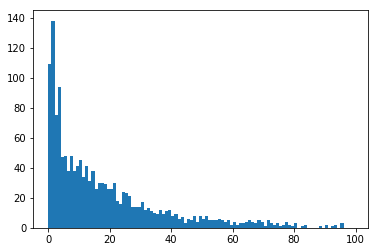

314


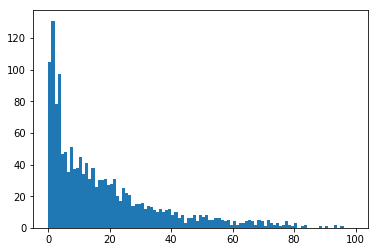

315


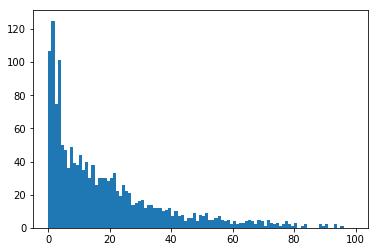

316


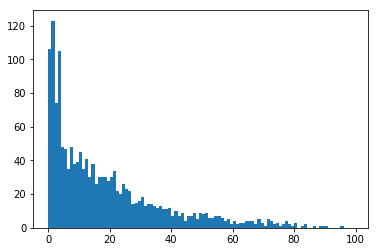

317


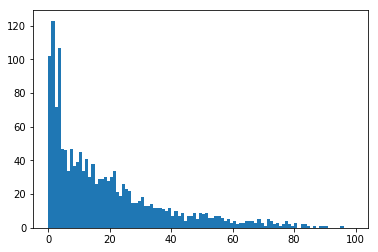

318


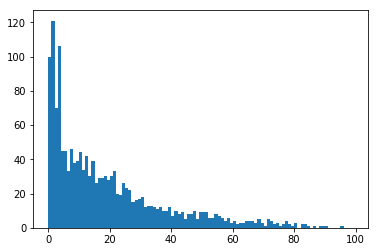

319


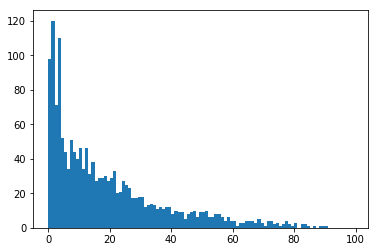

320


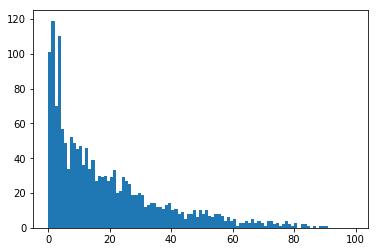

321


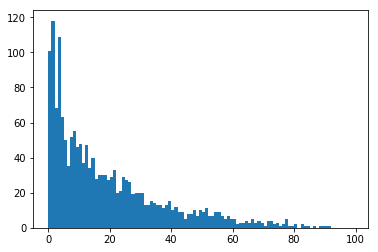

322


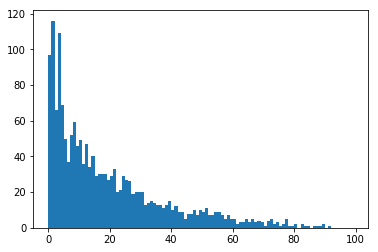

323


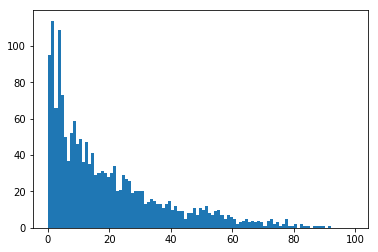

324


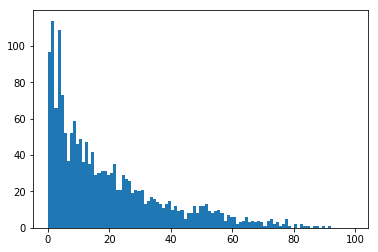

325


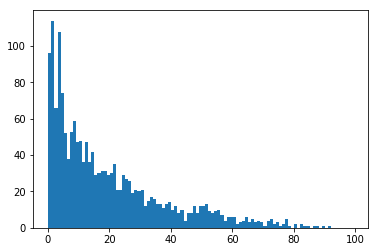

326


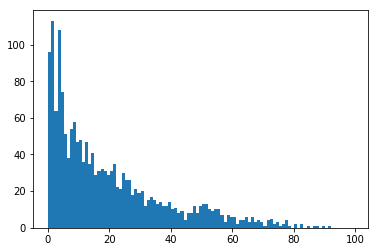

327


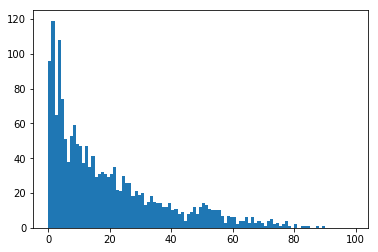

328


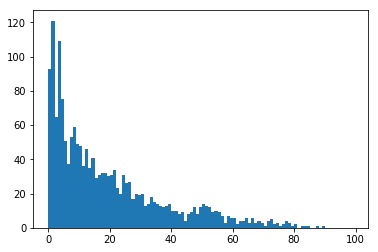

329


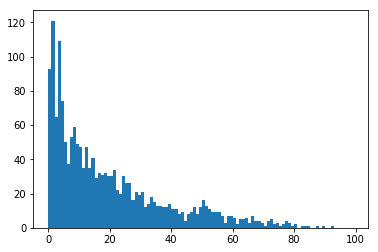

330


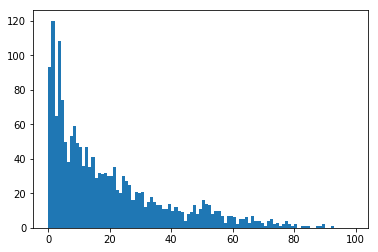

331


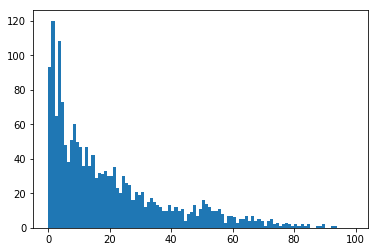

332


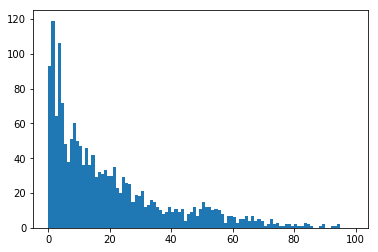

333


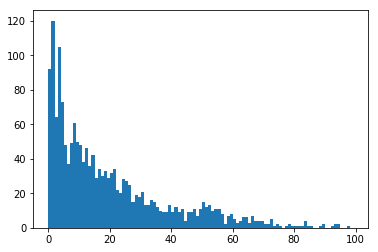

334


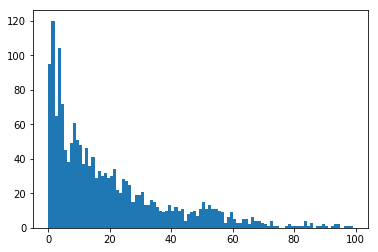

335


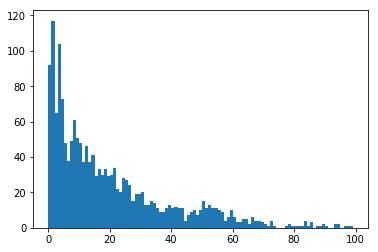

336


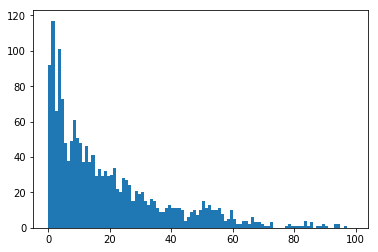

337


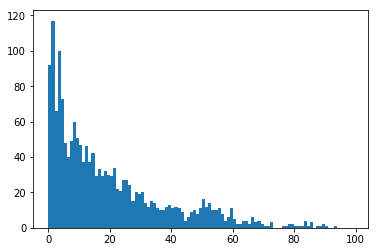

338


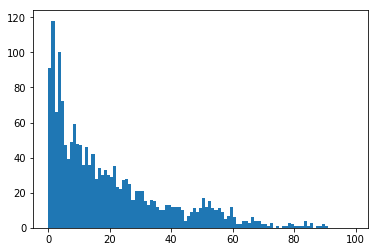

339


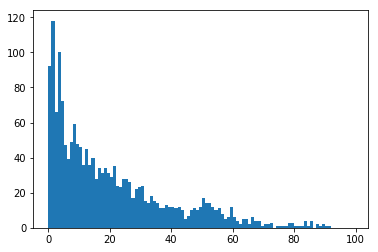

340


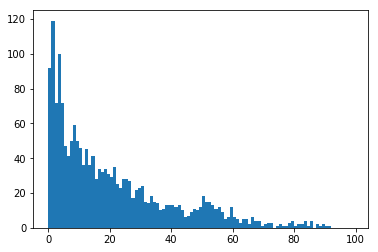

341


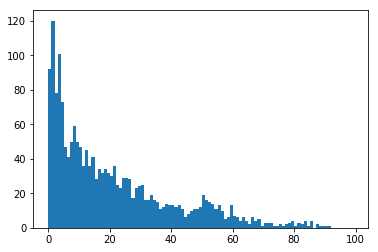

342


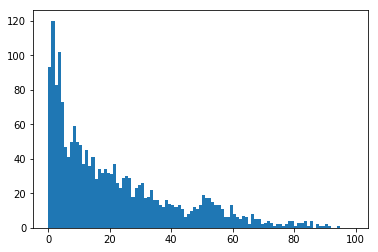

343


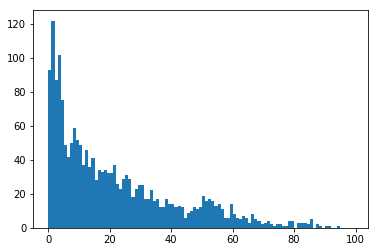

344


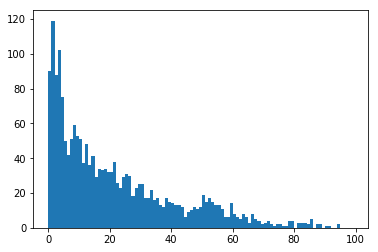

345


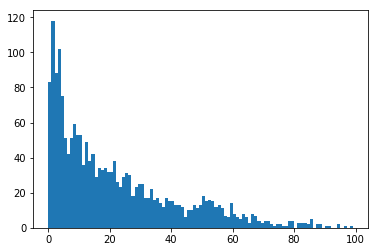

346


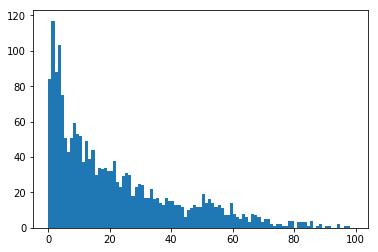

347


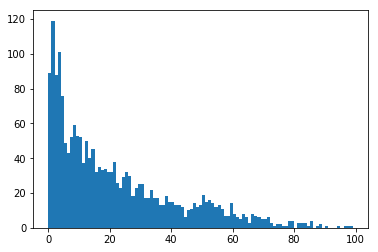

348


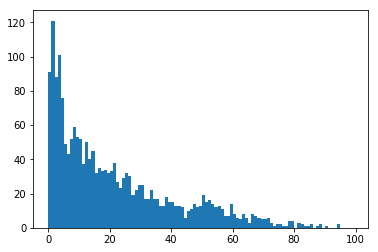

349


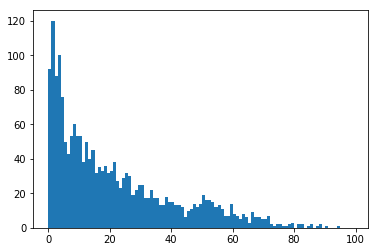

350


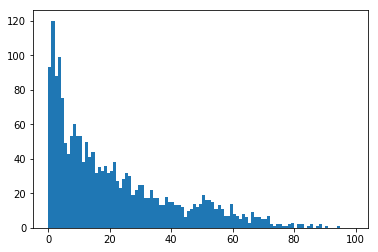

351


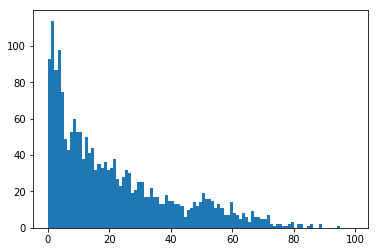

352


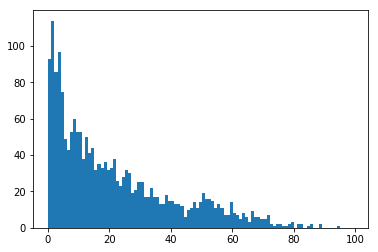

353


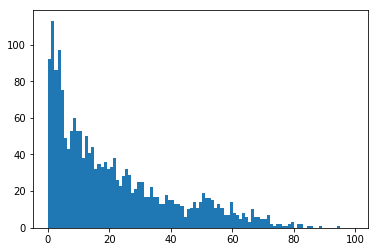

354


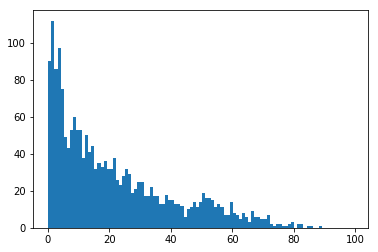

355


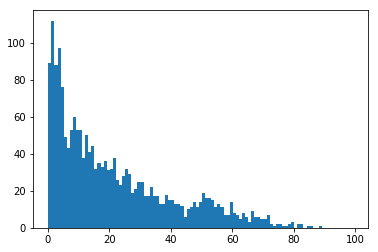

356


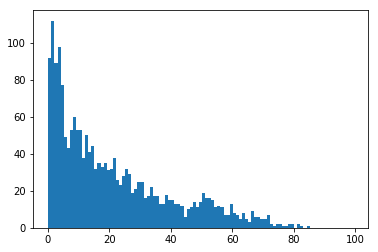

357


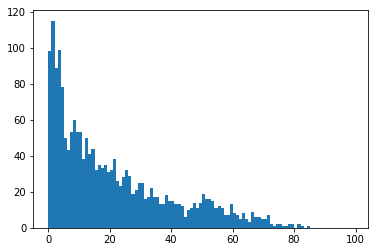

358


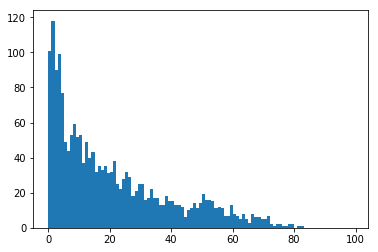

359


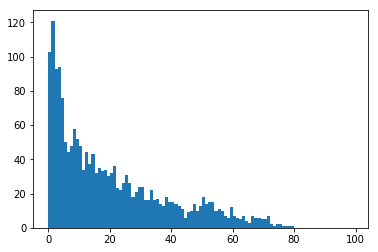

360


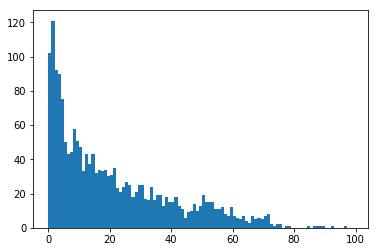

361


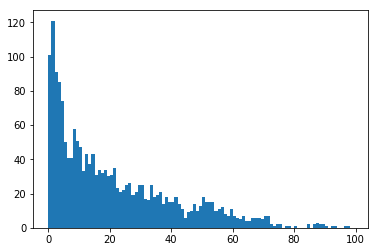

362


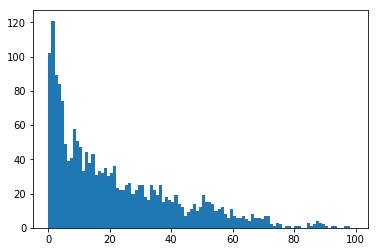

363


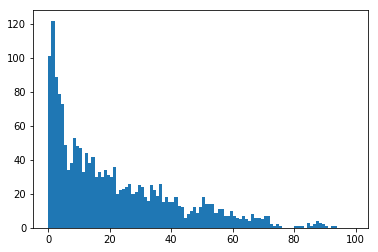

364


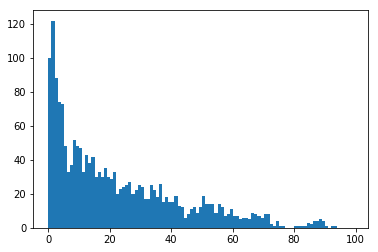

365


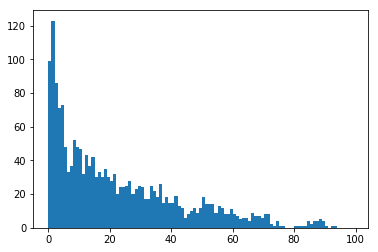

366


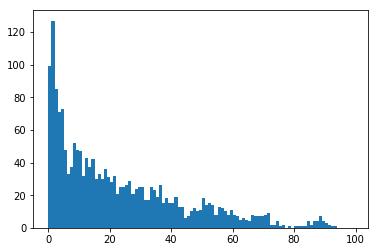

367


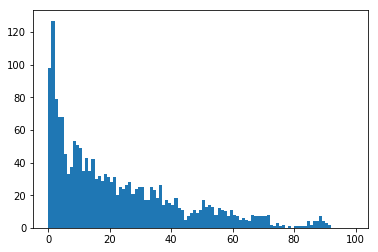

368


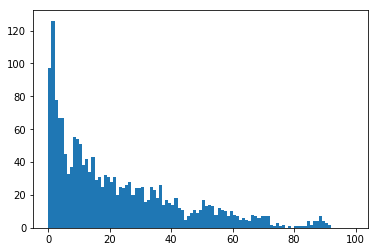

369


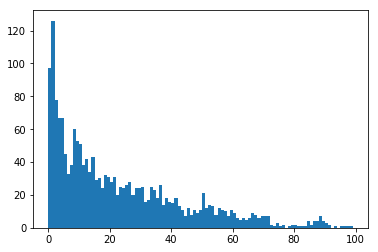

370


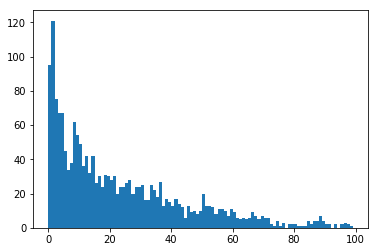

371


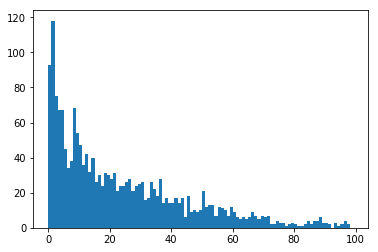

372


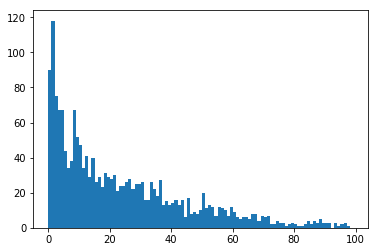

373


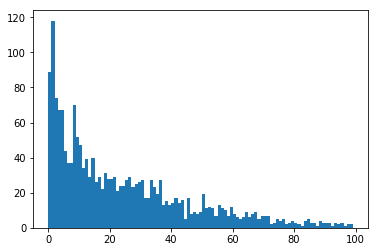

374


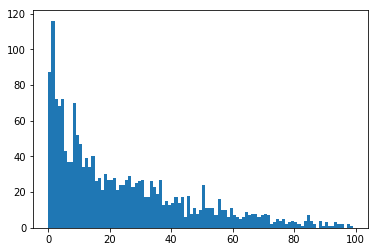

375


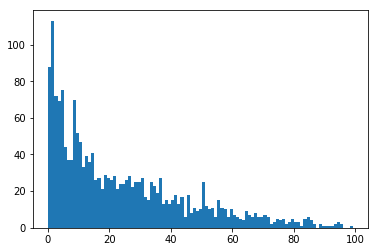

376


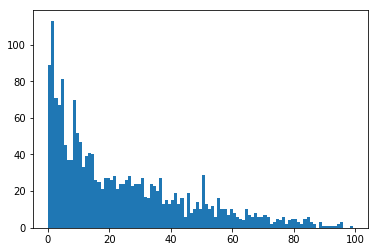

377


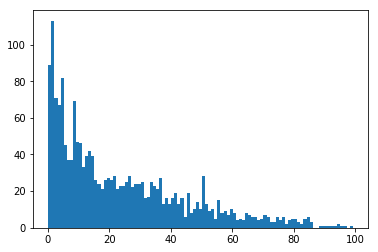

378


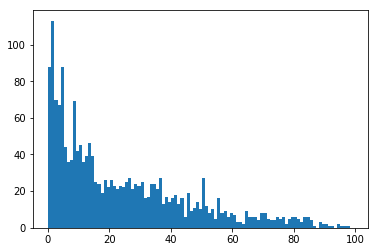

379


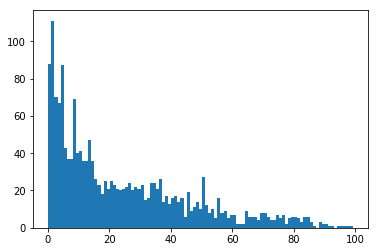

380


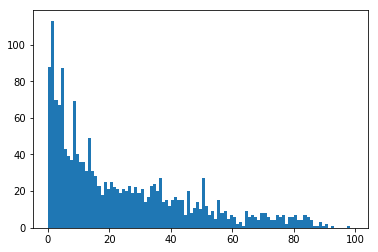

381


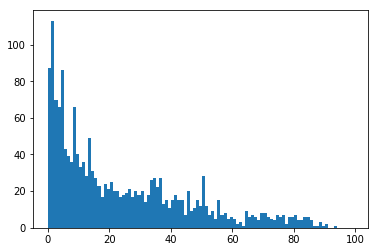

382


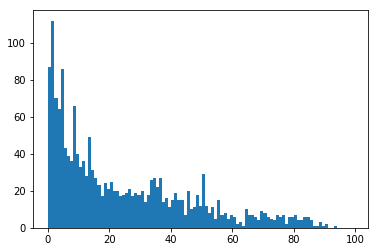

383


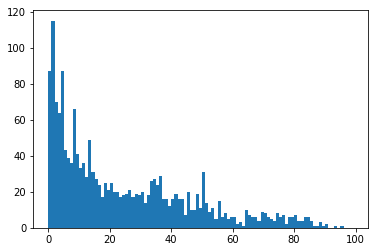

384


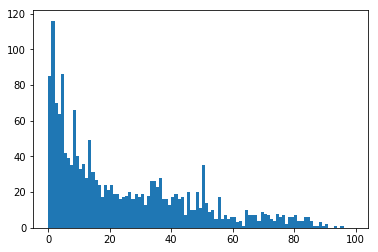

385


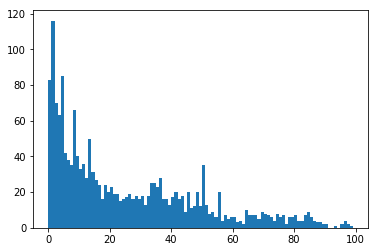

386


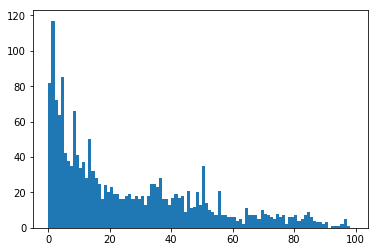

387


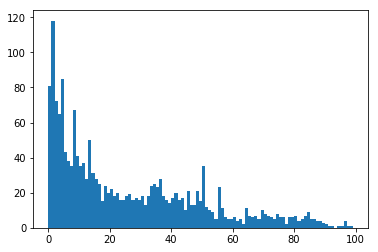

388


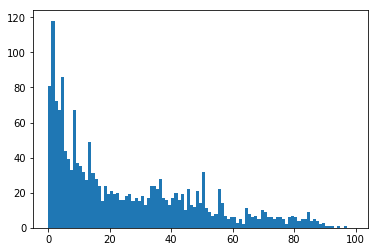

389


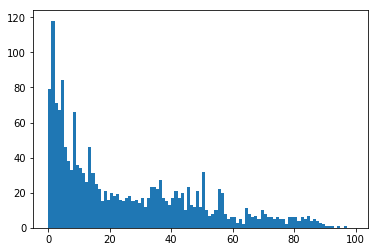

390


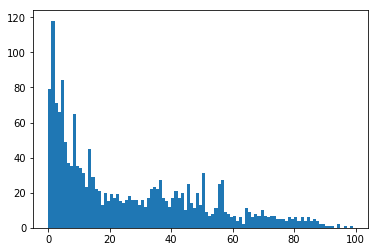

391


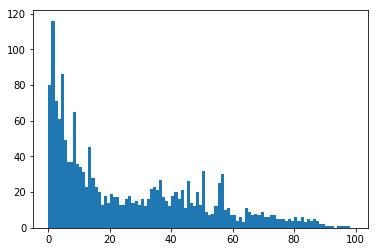

392


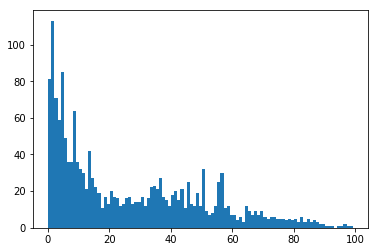

393


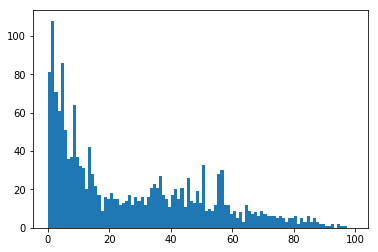

394


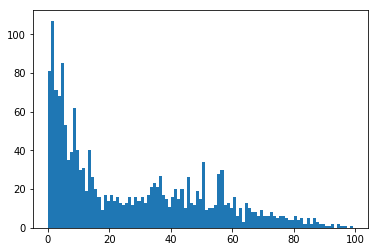

395


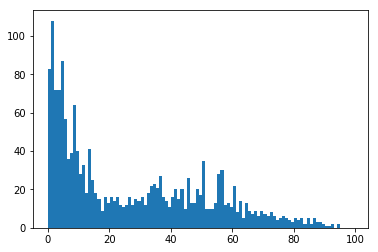

396


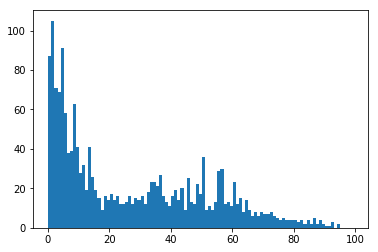

397


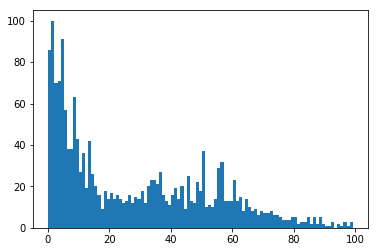

398


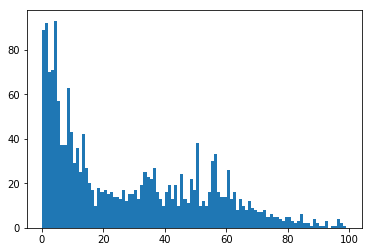

399


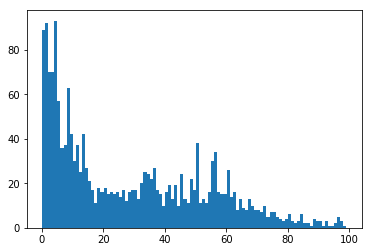

400


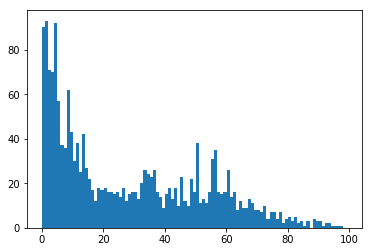

401


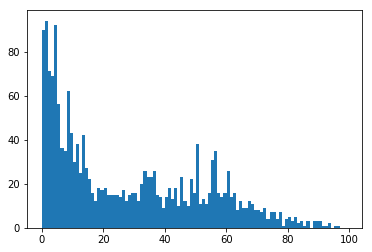

402


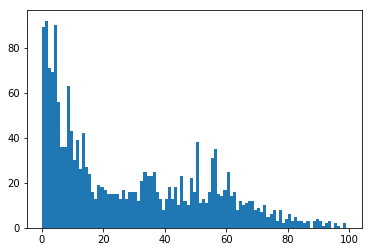

403


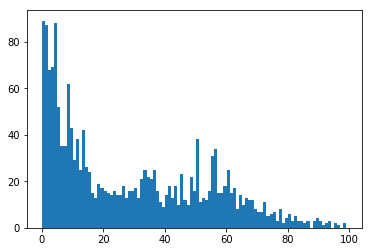

404


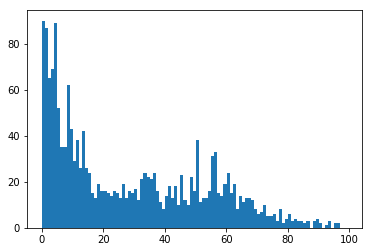

405


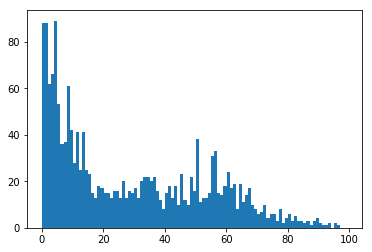

406


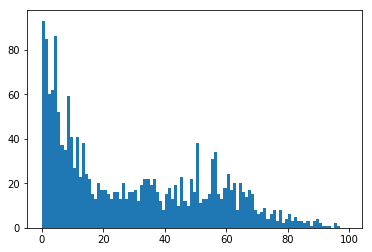

407


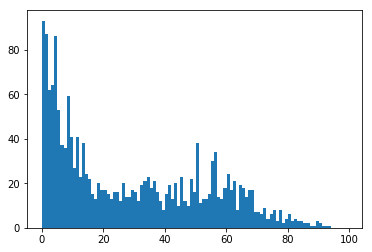

408


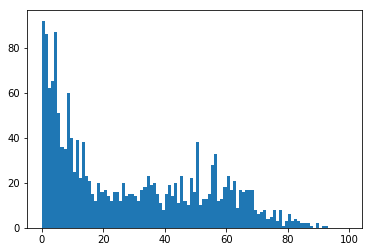

409


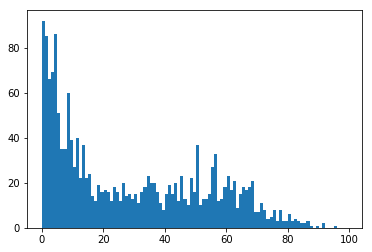

410


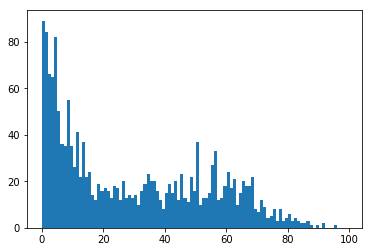

411


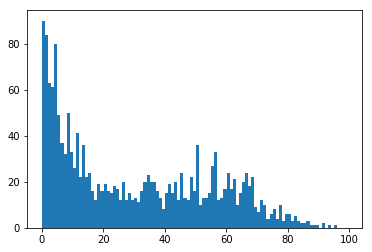

412


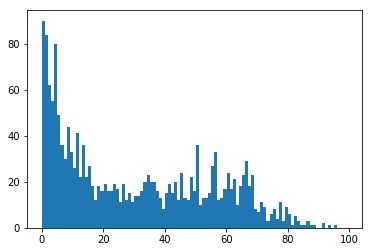

413


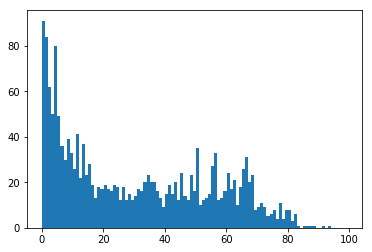

414


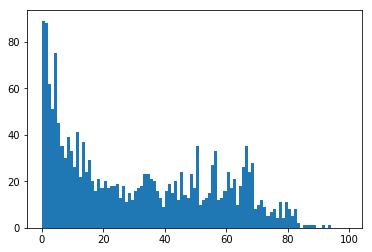

415


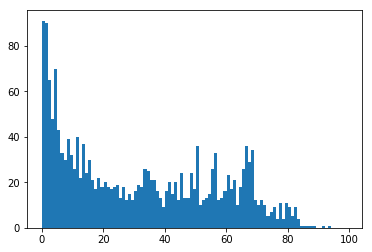

416


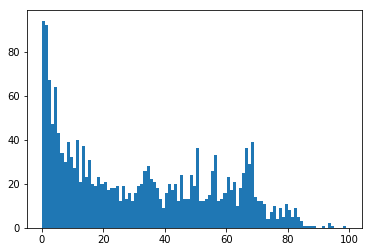

417


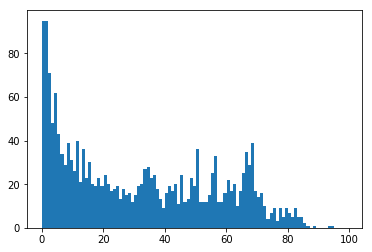

418


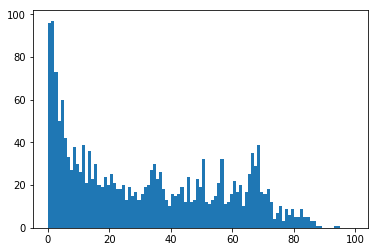

419


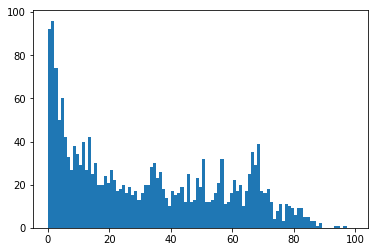

420


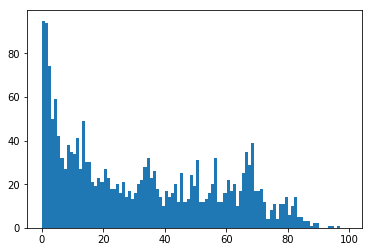

421


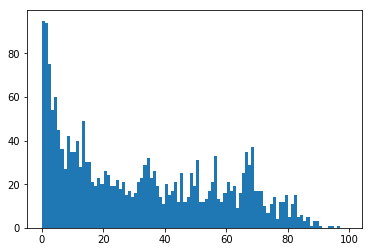

422


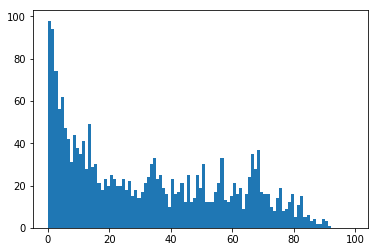

423


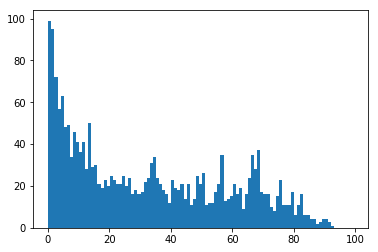

424


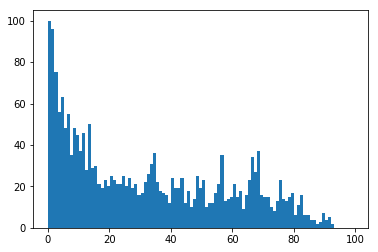

425


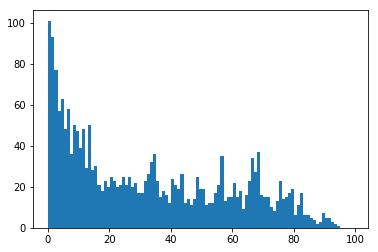

426


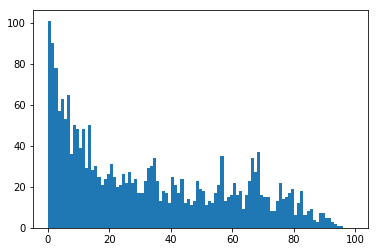

427


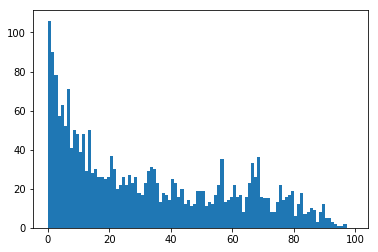

428


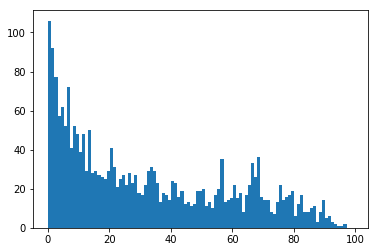

429


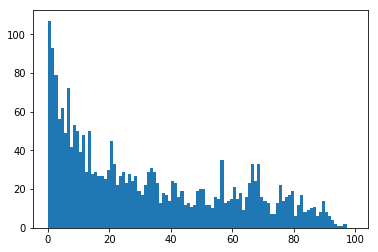

430


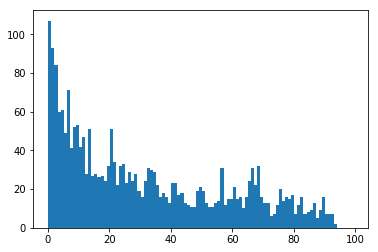

431


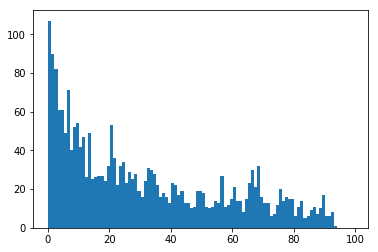

432


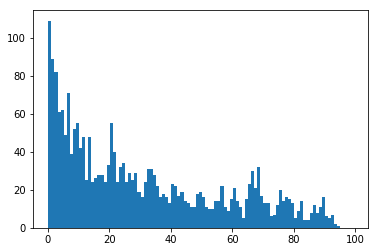

433


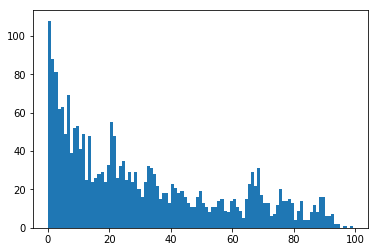

434


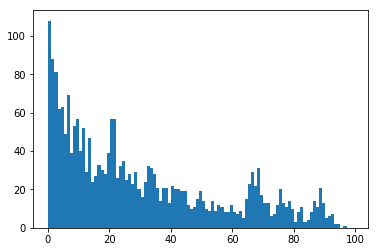

435


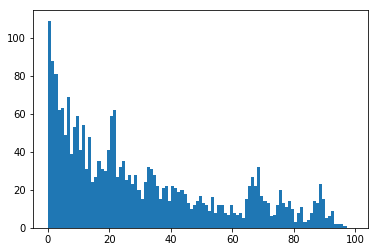

436


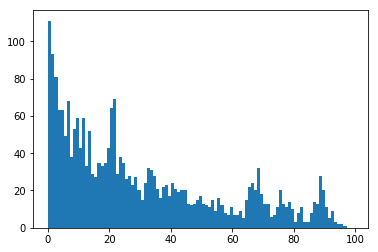

437


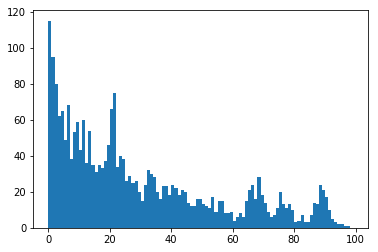

438


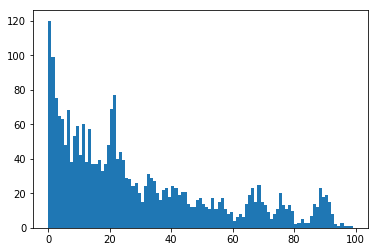

439


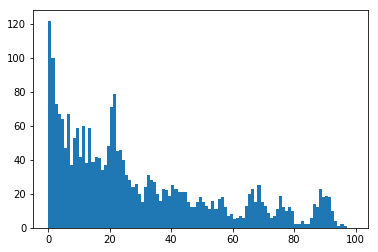

440


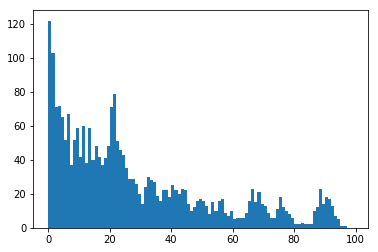

441


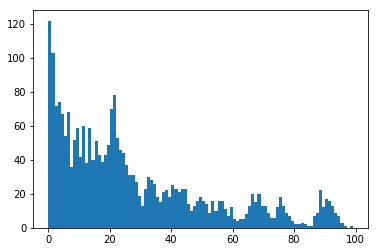

442


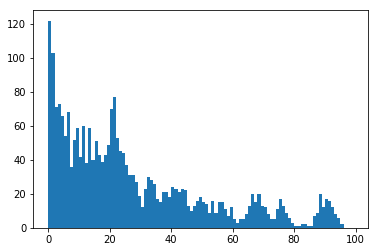

443


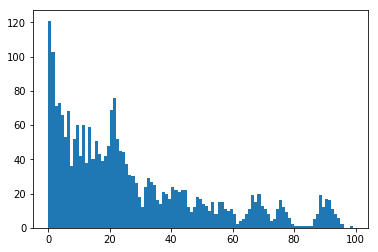

444


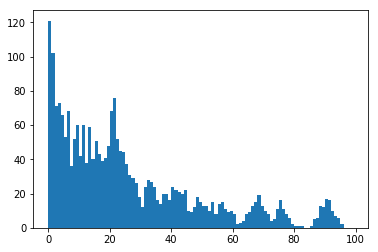

445


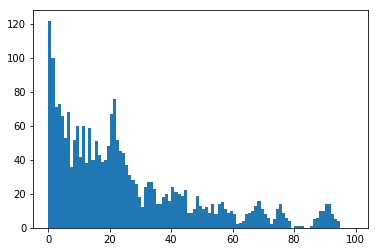

446


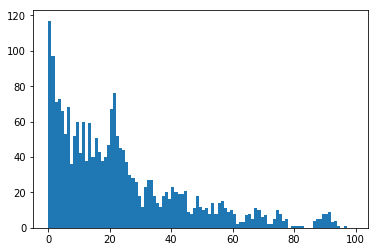

447


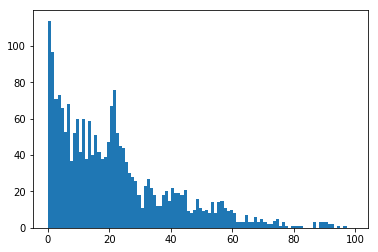

448


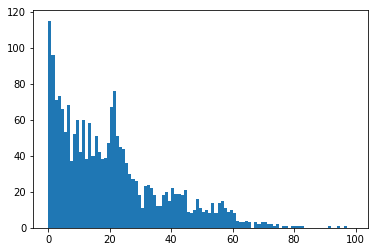

449


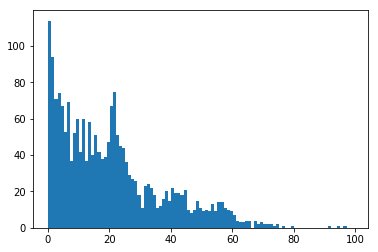

450


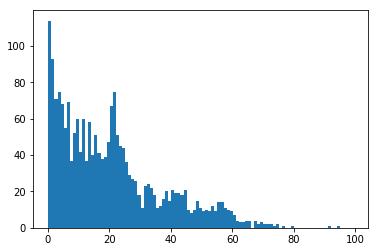

451


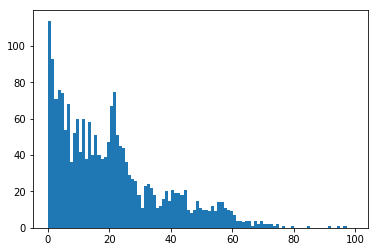

452


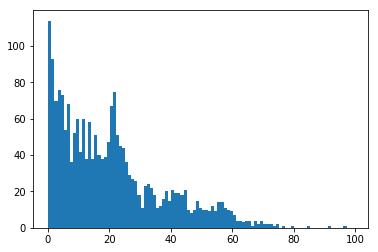

453


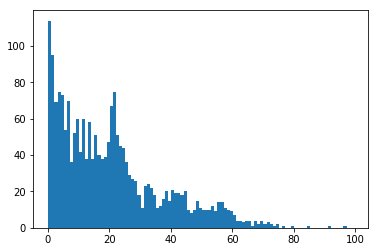

454


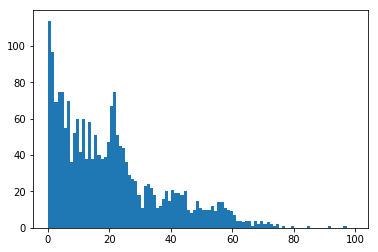

455


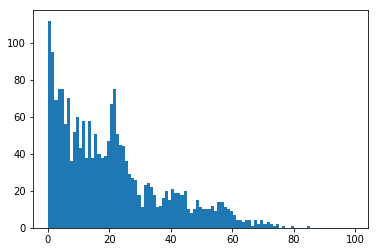

456


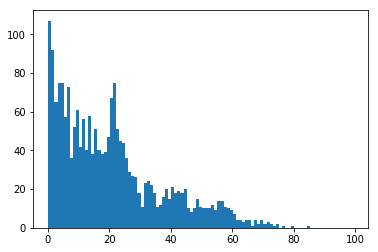

457


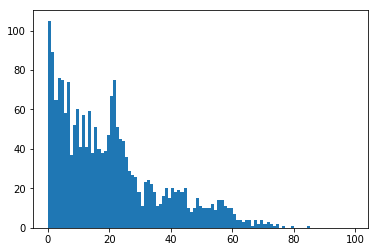

458


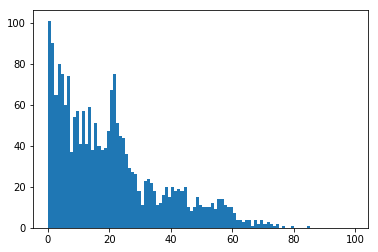

459


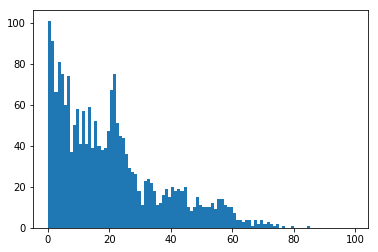

460


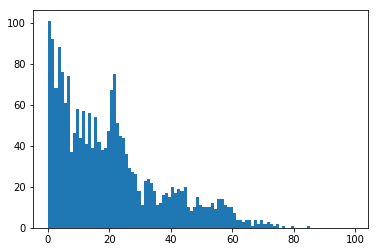

461


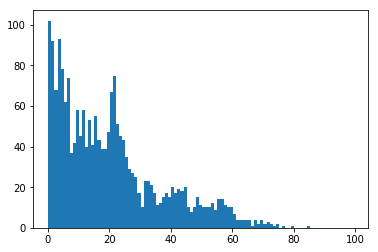

462


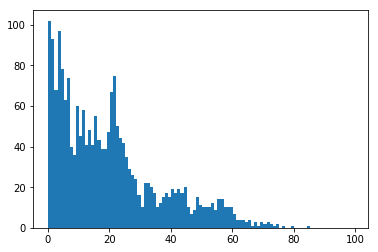

463


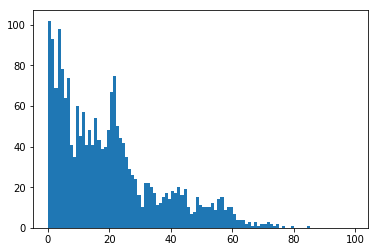

464


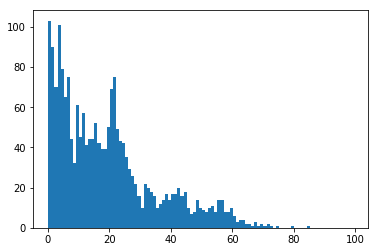

465


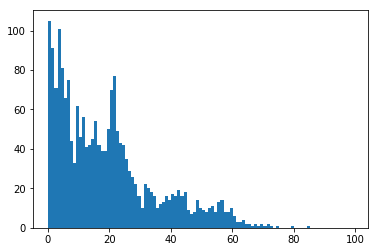

466


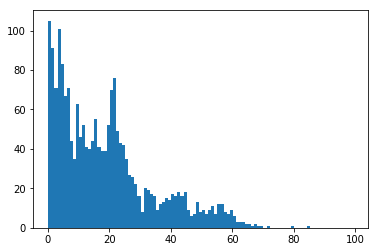

467


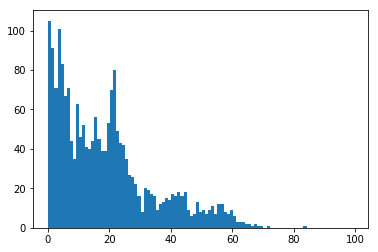

468


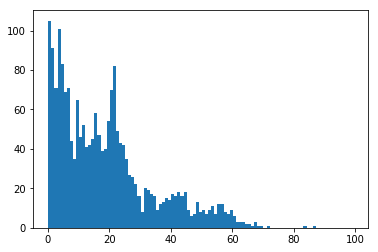

469


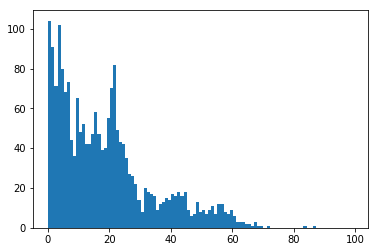

470


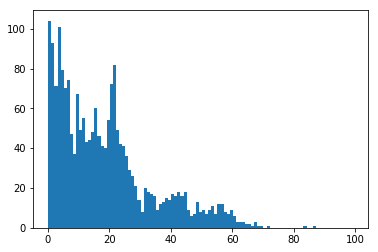

471


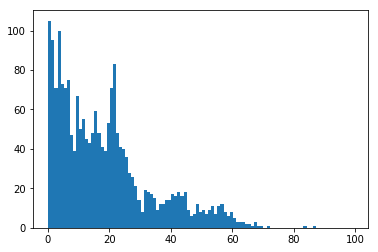

472


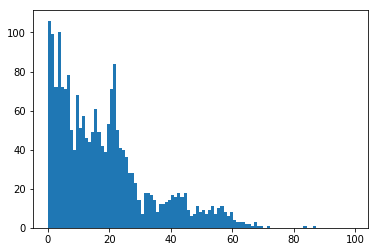

473


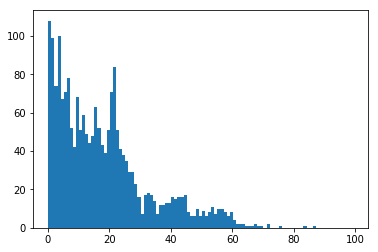

474


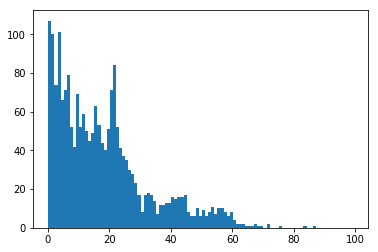

475


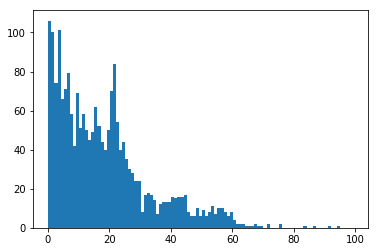

476


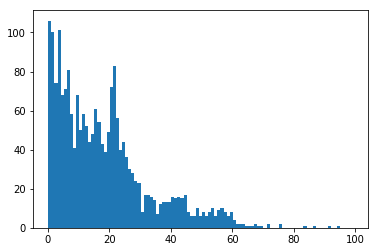

477


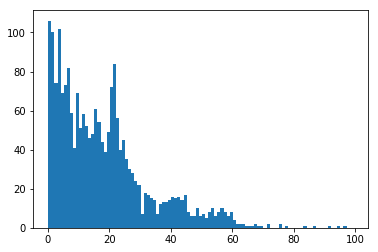

478


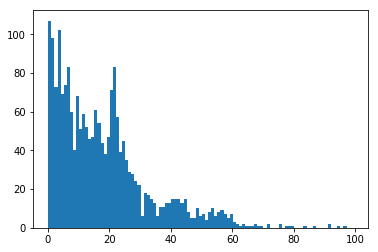

479


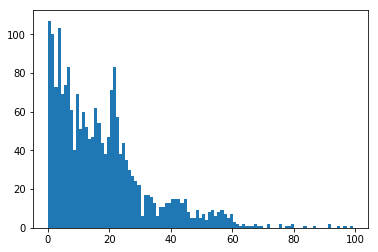

480


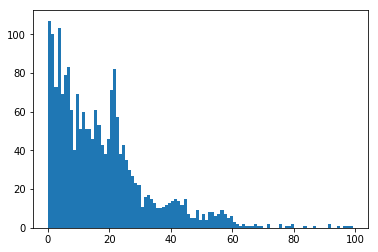

481


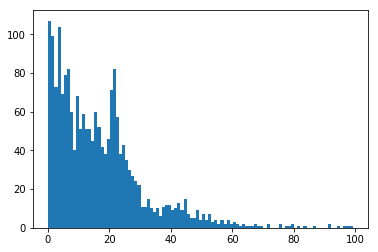

482


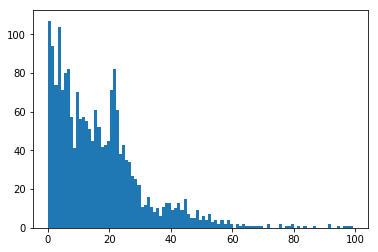

483


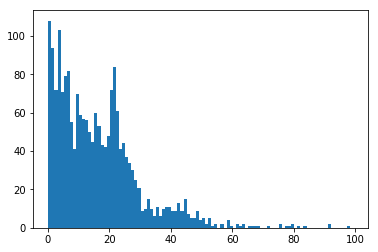

484


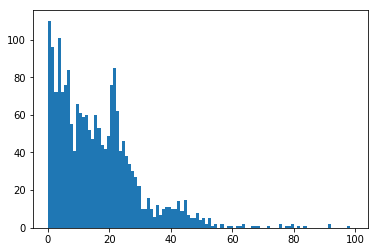

485


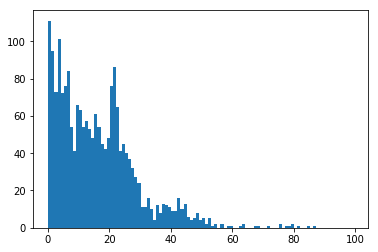

486


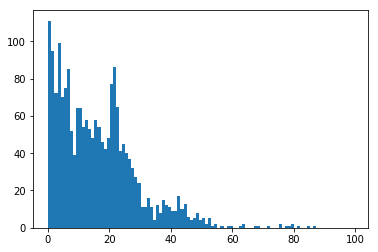

487


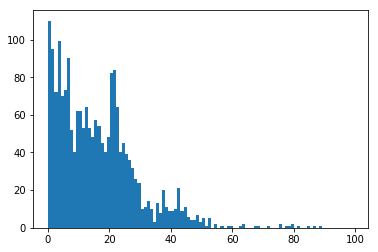

488


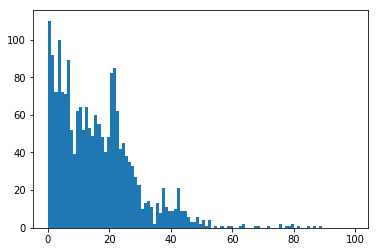

489


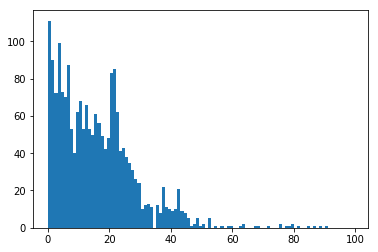

490


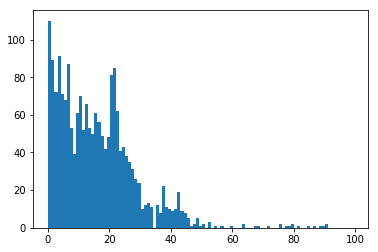

491


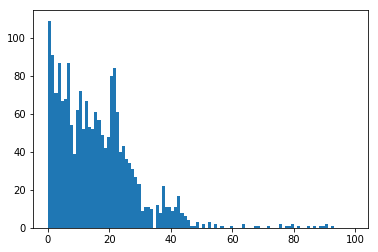

492


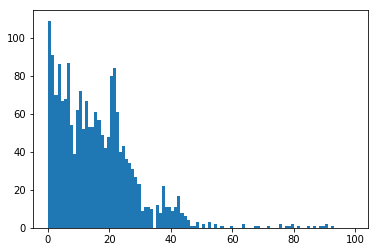

493


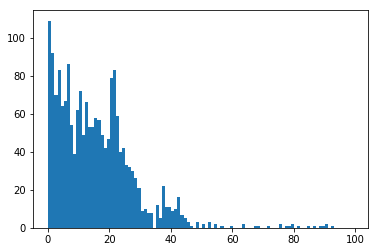

494


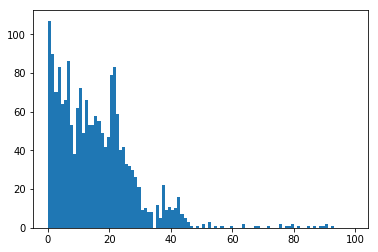

495


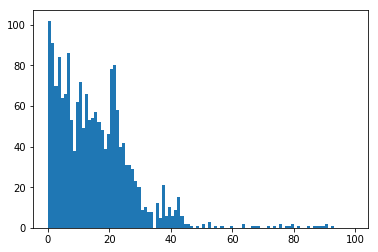

496


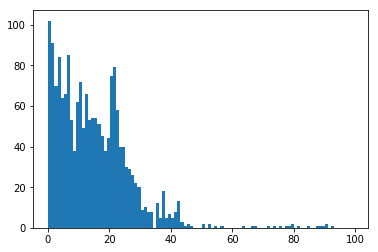

497


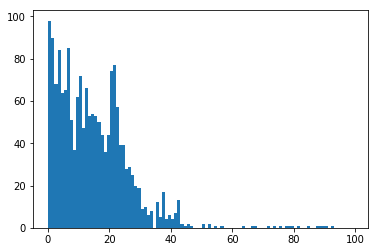

498


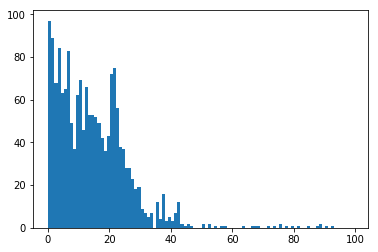

499


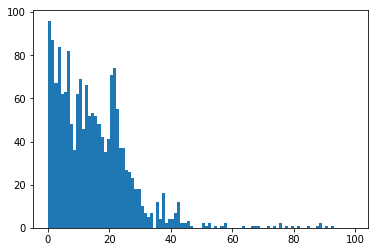

500


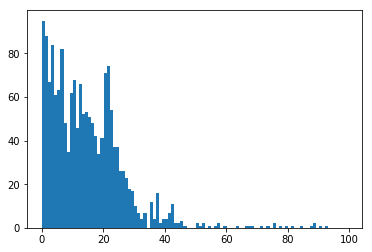

501


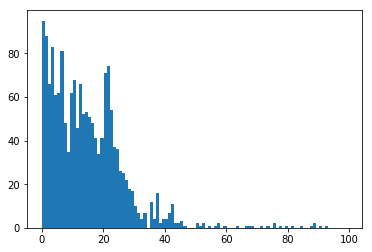

502


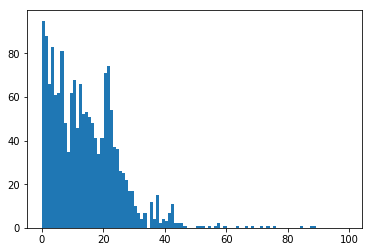

503


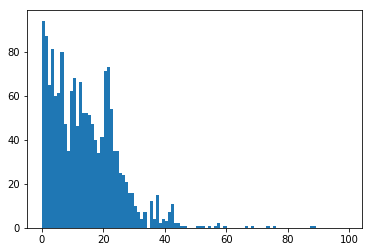

504


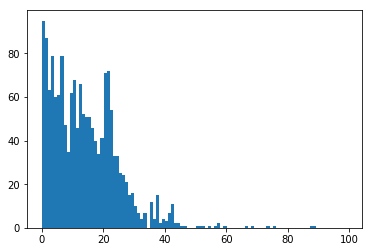

505


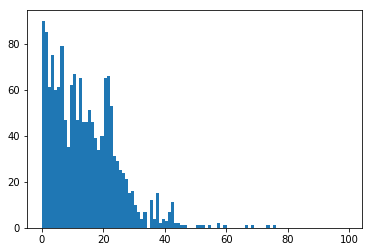

506


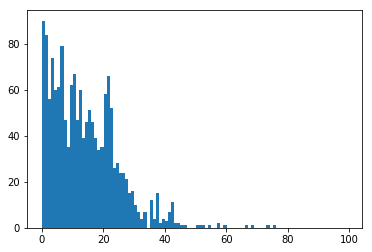

507


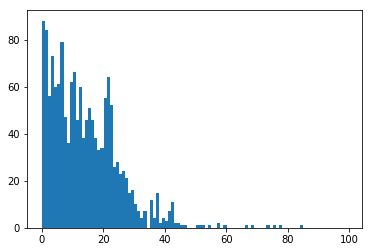

508


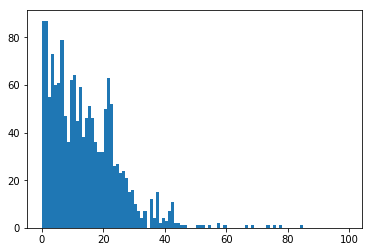

509


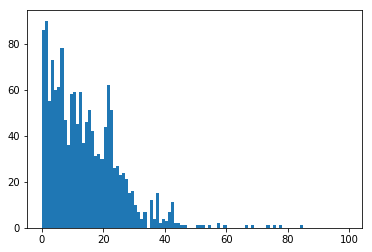

510


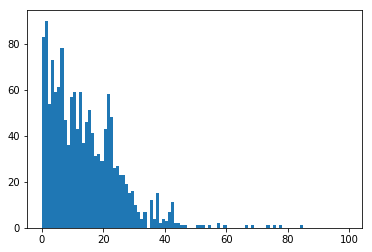

511


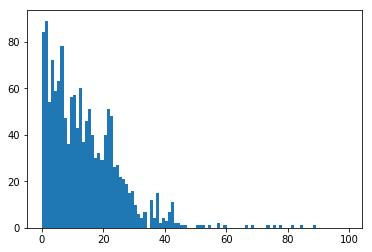

512


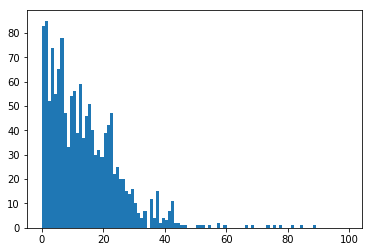

513


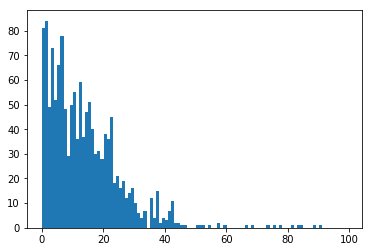

514


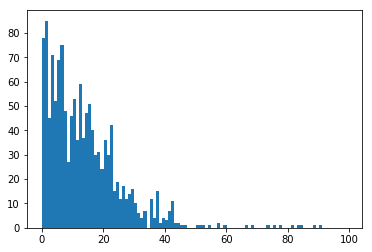

515


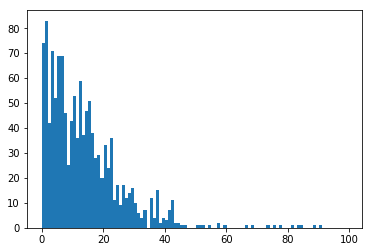

516


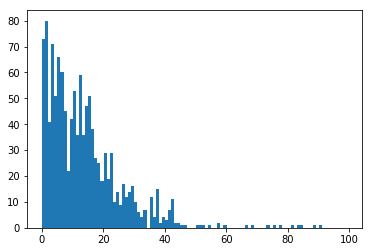

517


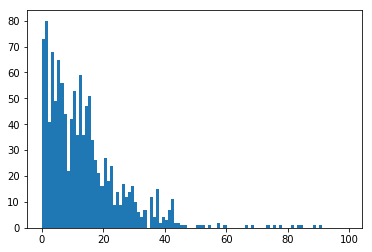

518


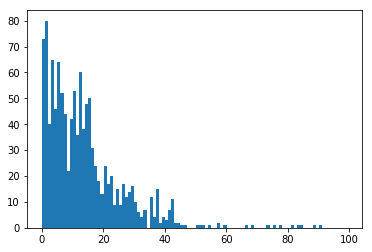

519


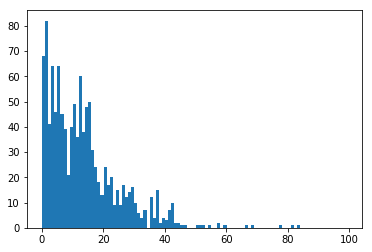

520


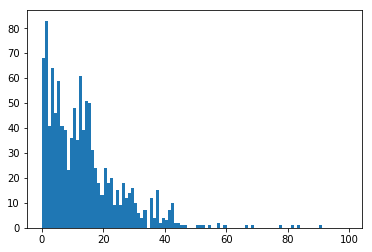

521


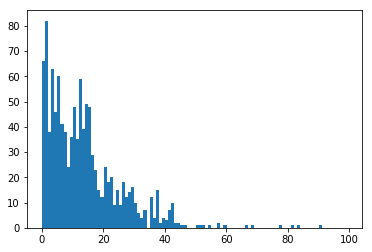

522


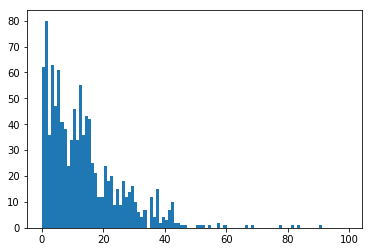

523


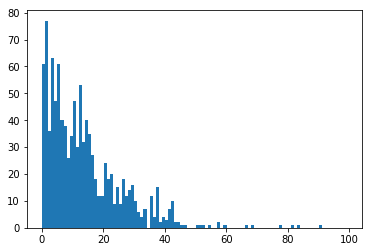

524


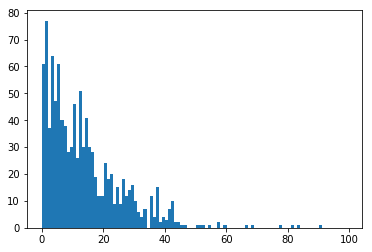

525


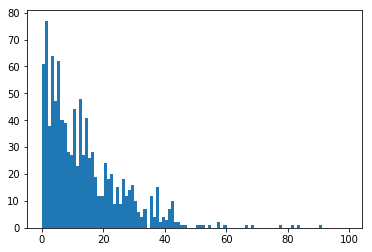

526


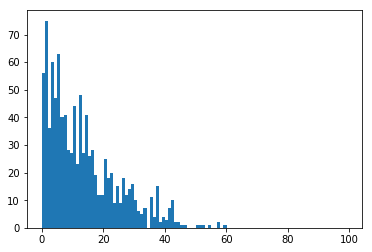

527


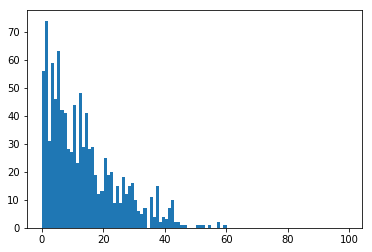

528


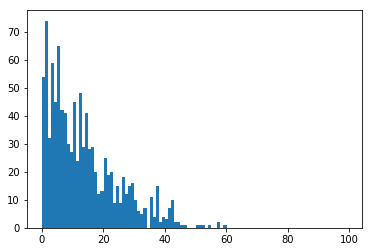

529


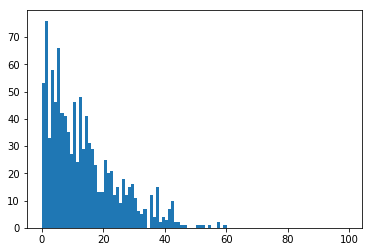

530


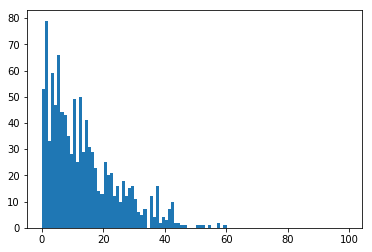

531


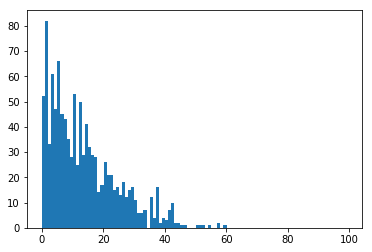

532


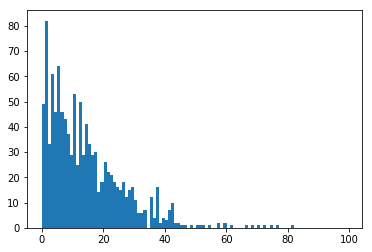

533


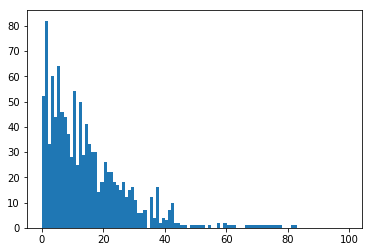

534


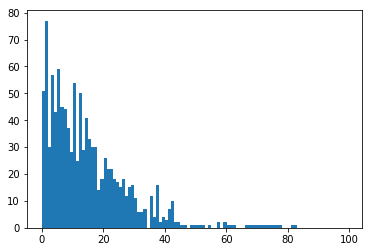

535


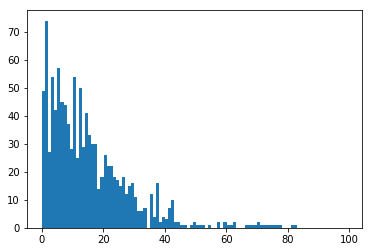

536


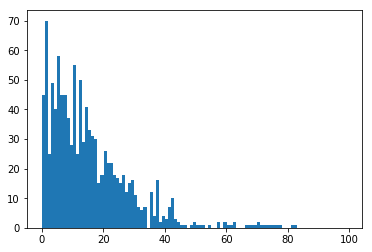

537


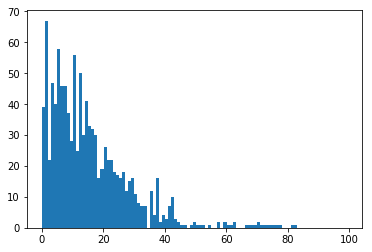

538


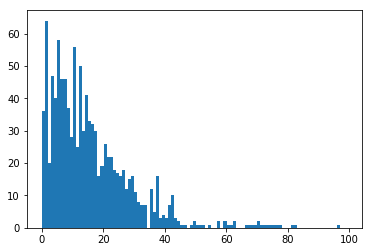

539


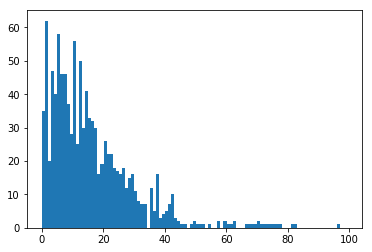

540


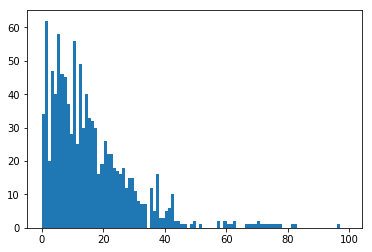

541


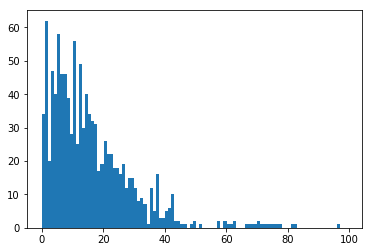

542


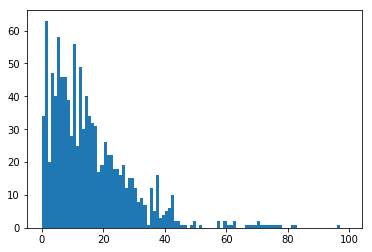

543


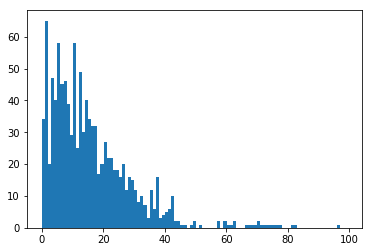

544


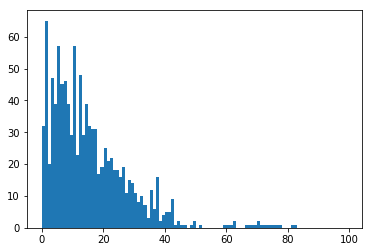

545


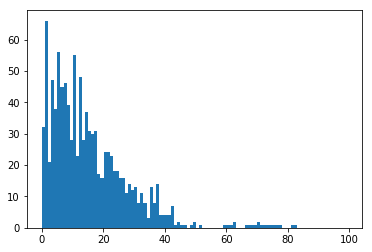

546


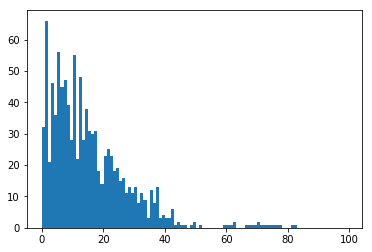

547


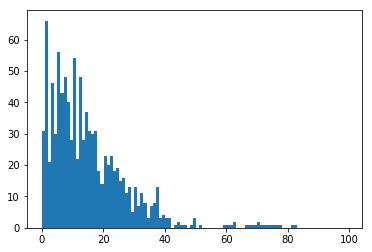

548


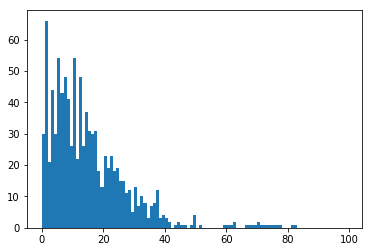

549


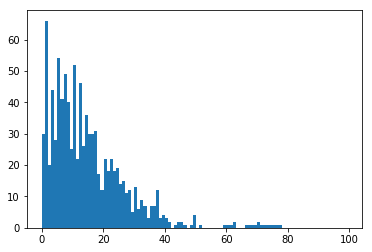

550


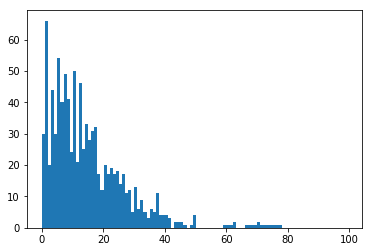

551


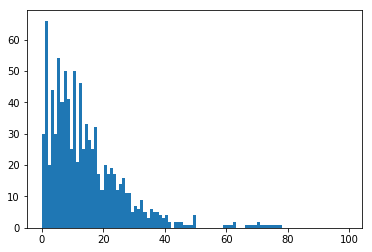

552


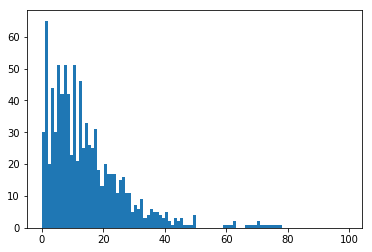

553


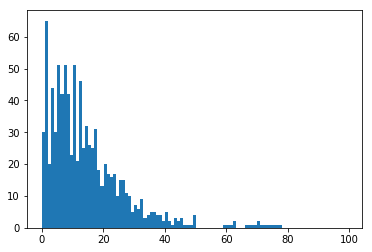

554


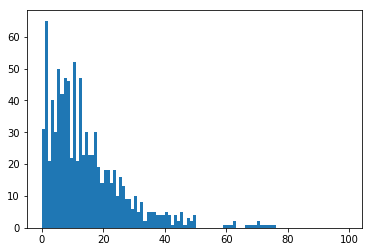

555


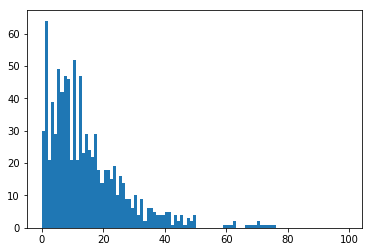

556


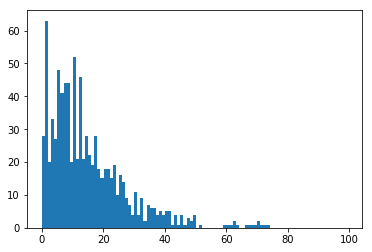

557


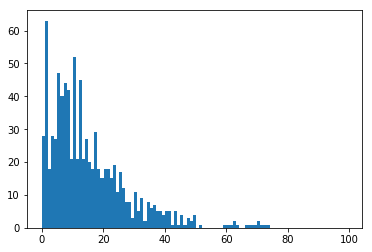

558


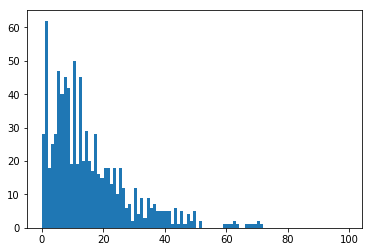

559


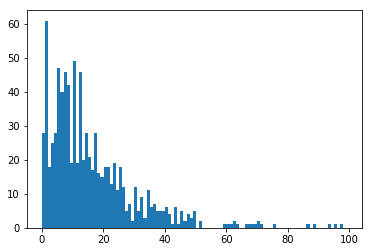

560


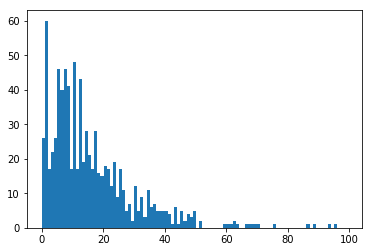

561


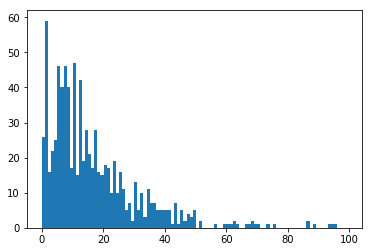

562


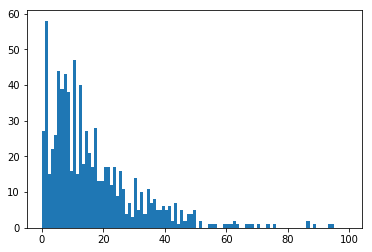

563


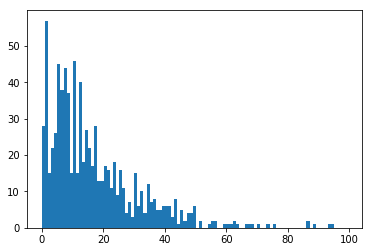

564


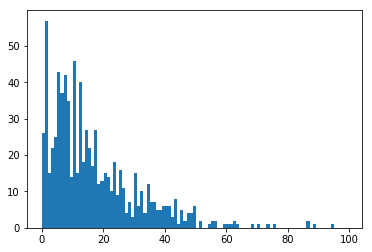

565


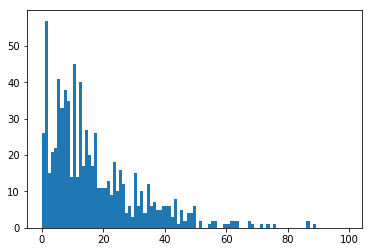

566


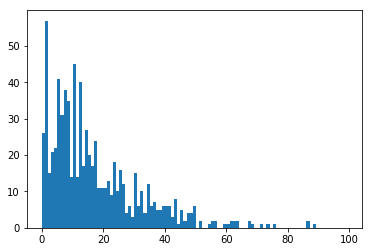

567


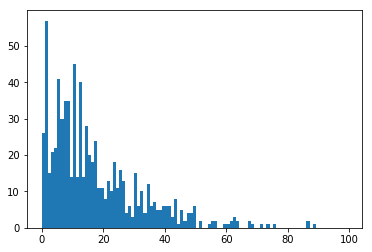

568


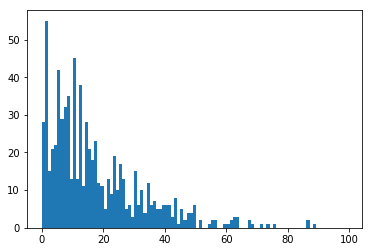

569


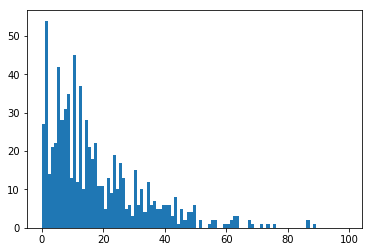

570


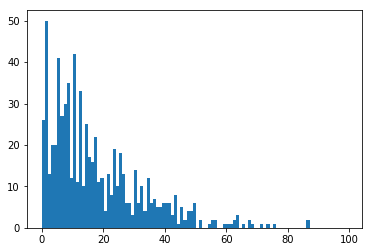

571


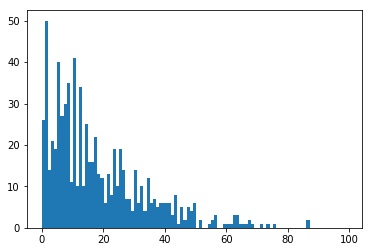

572


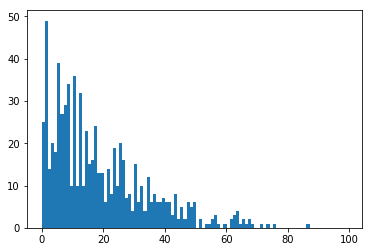

573


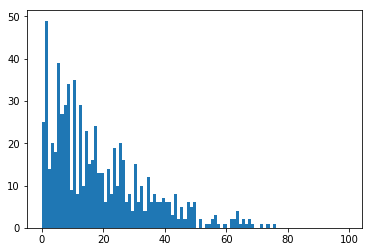

574


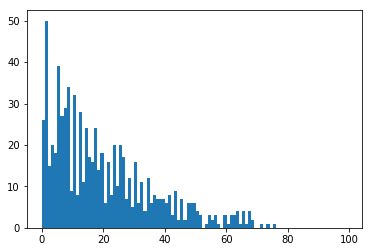

575


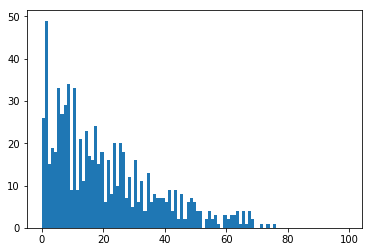

576


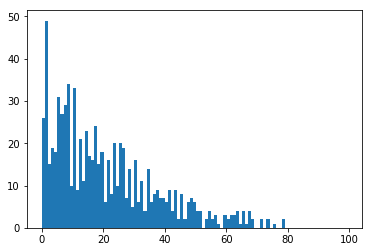

577


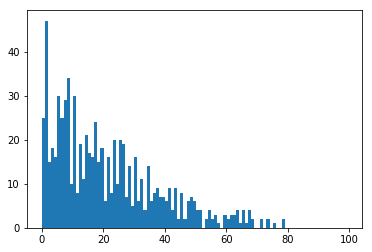

578


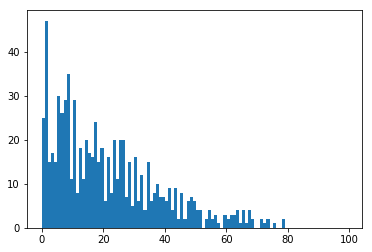

579


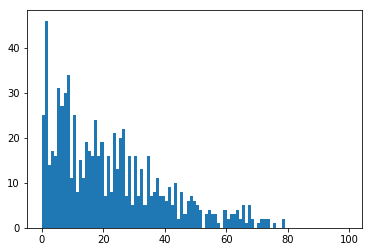

580


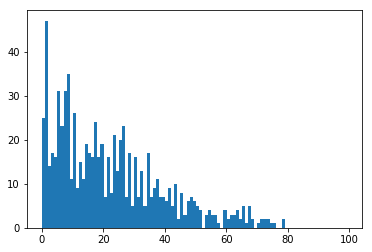

581


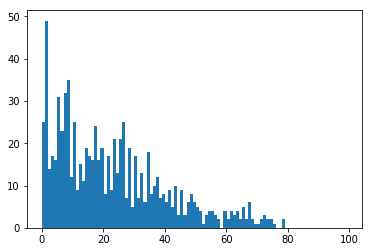

582


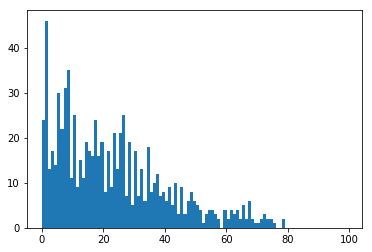

583


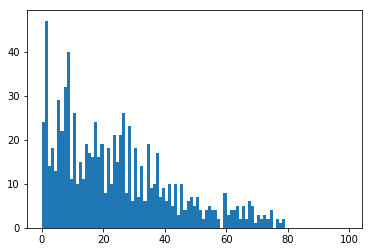

584


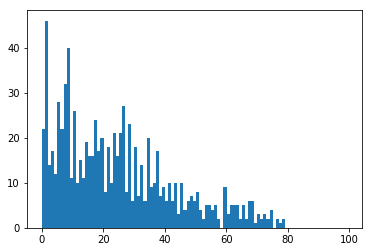

585


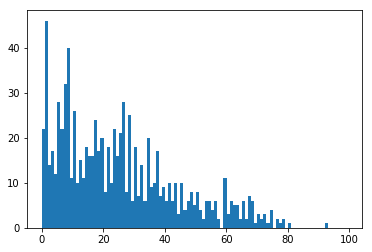

586


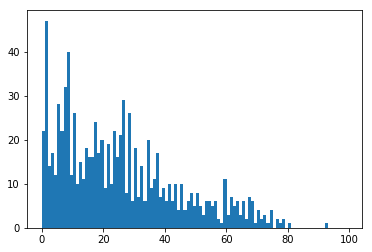

587


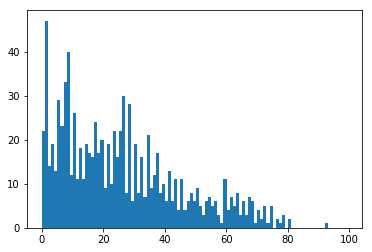

588


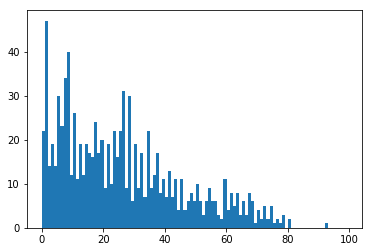

589


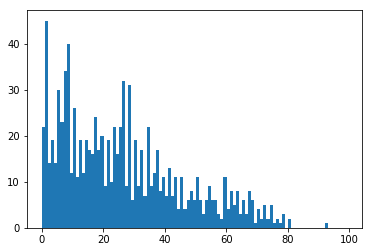

590


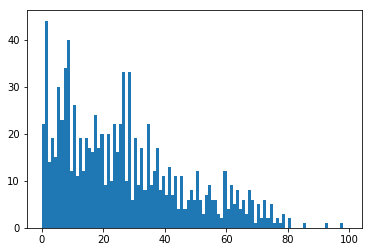

591


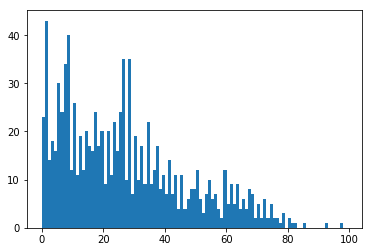

592


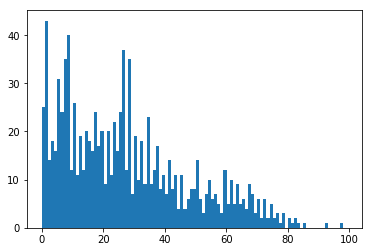

593


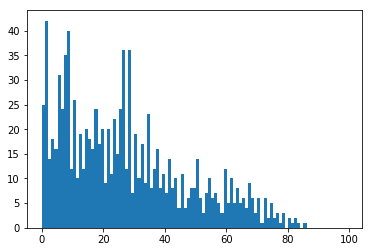

594


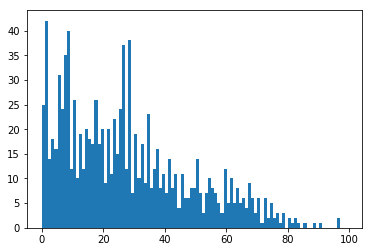

595


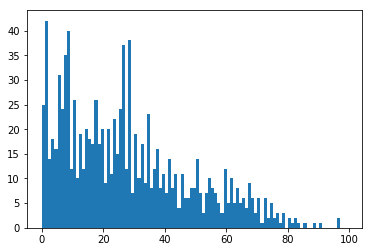

596


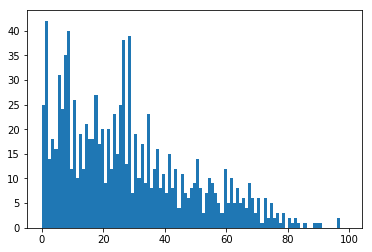

597


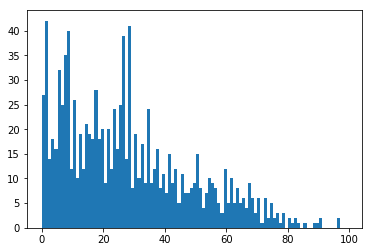

598


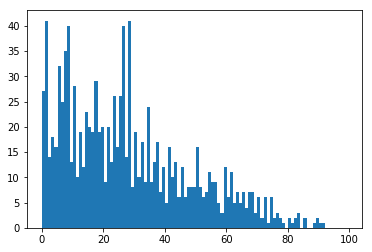

599


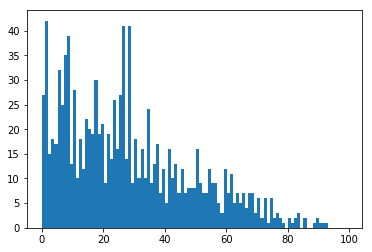

600


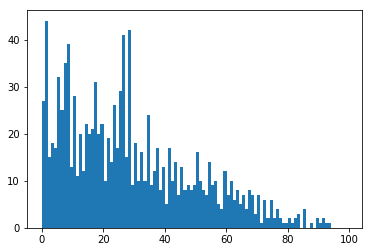

601


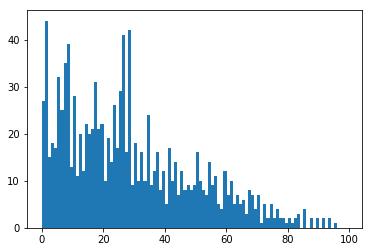

602


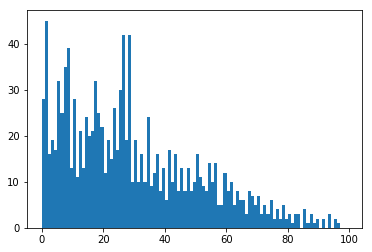

603


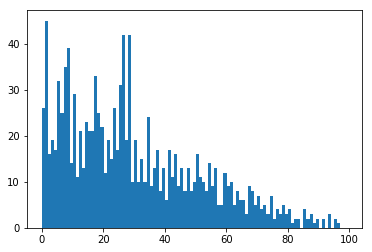

604


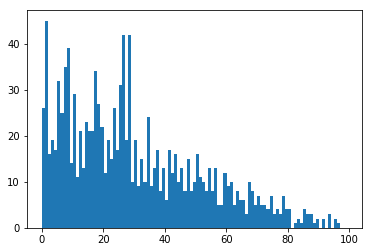

605


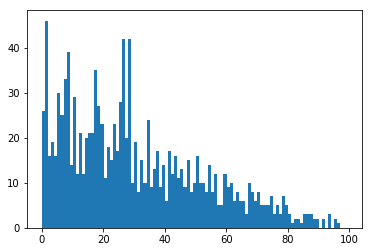

606


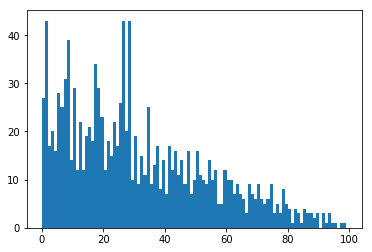

607


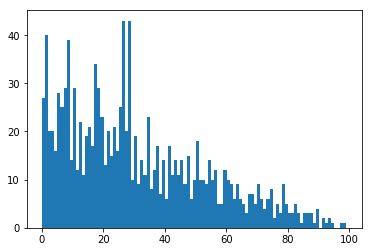

608


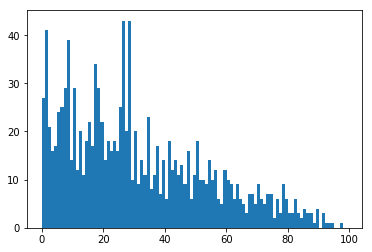

609


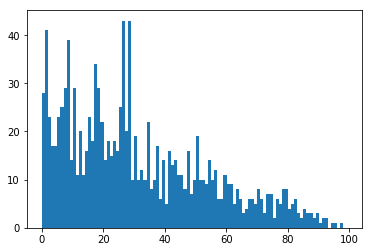

610


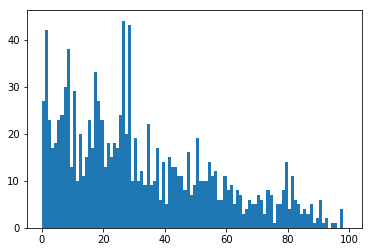

611


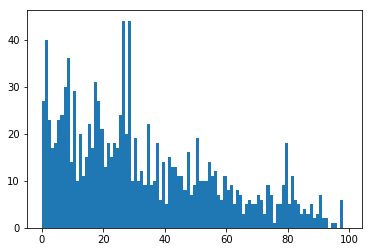

612


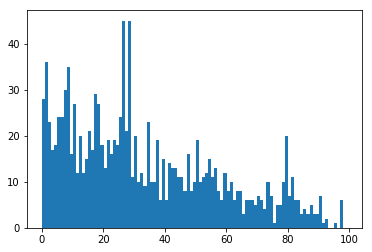

613


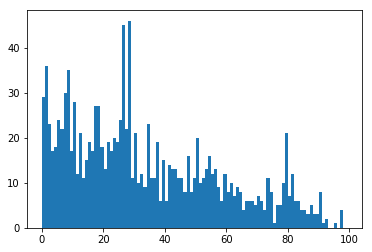

614


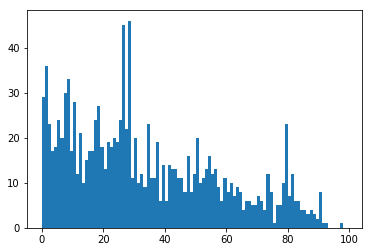

615


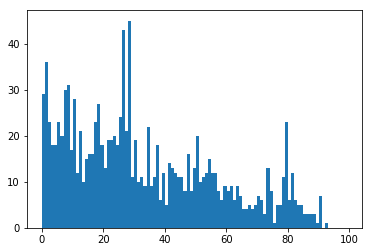

616


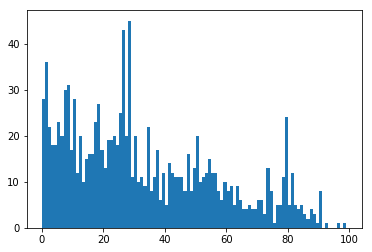

617


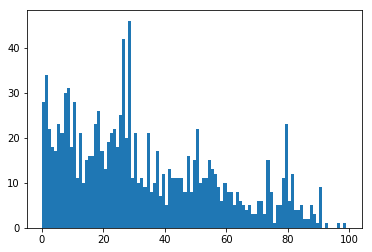

618


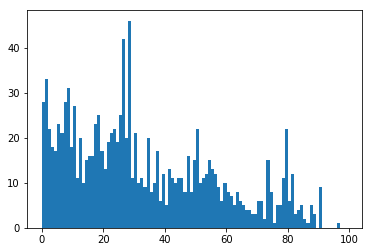

619


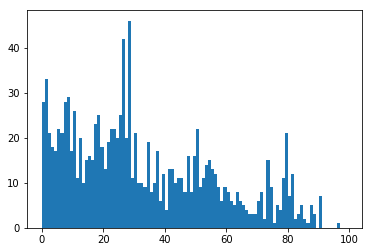

620


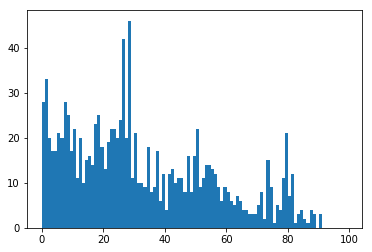

621


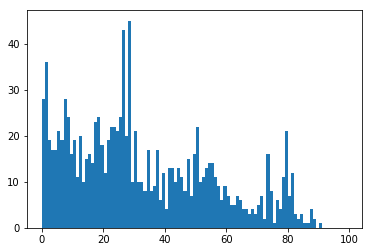

622


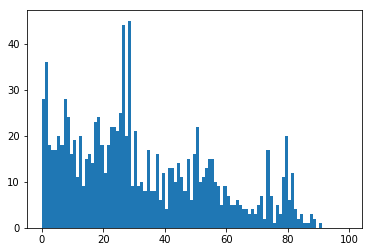

623


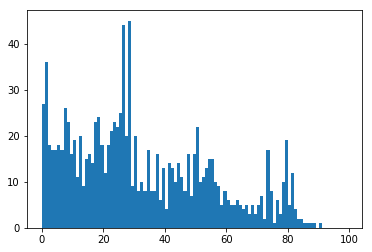

624


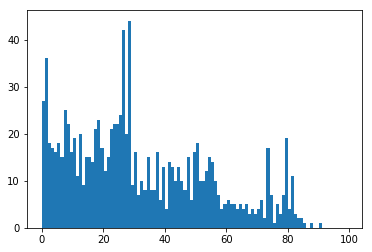

625


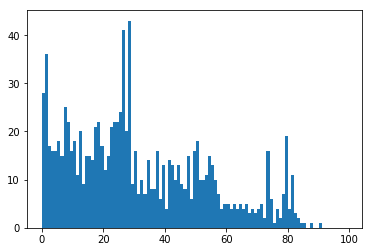

626


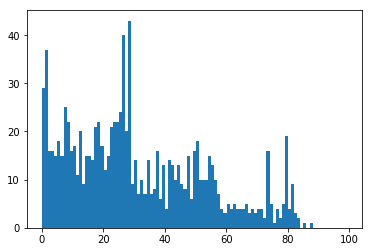

627


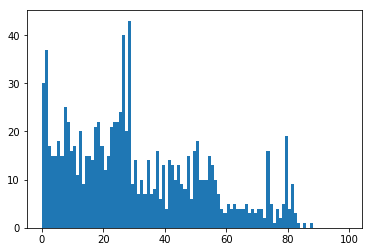

628


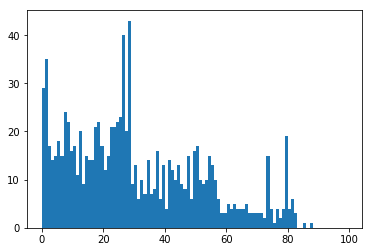

629


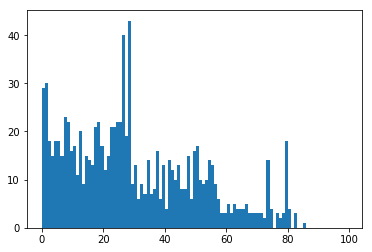

630


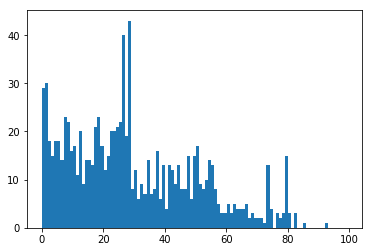

631


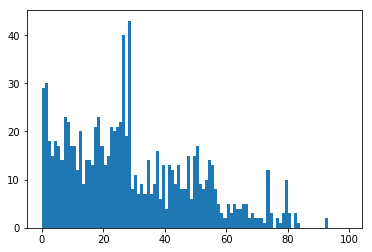

632


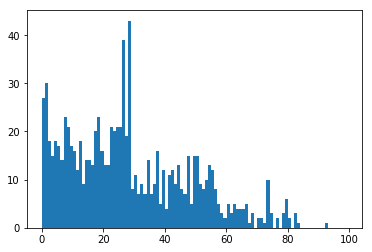

633


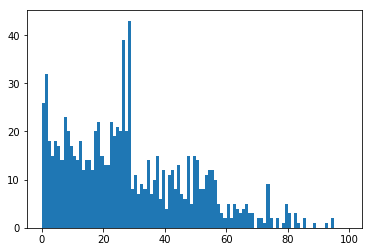

634


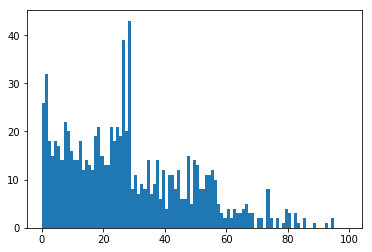

635


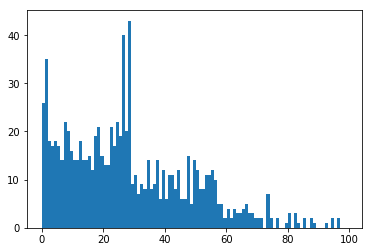

636


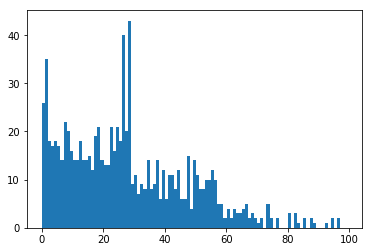

637


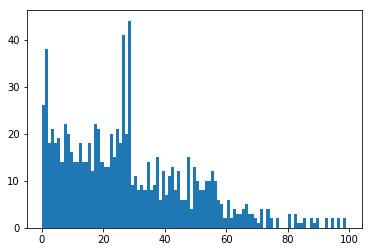

638


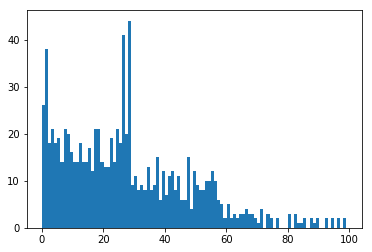

639


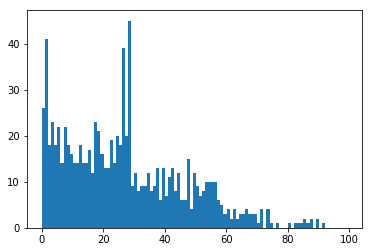

640


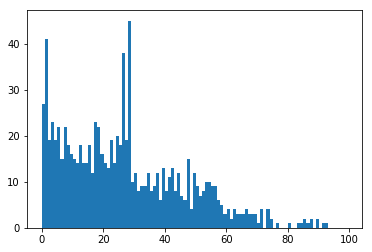

641


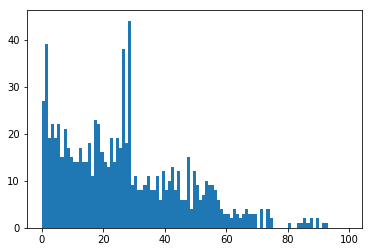

642


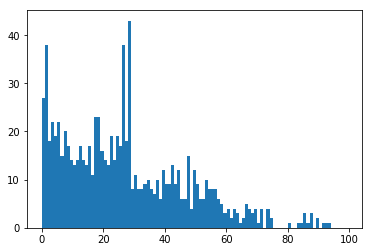

643


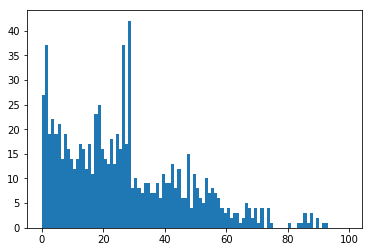

644


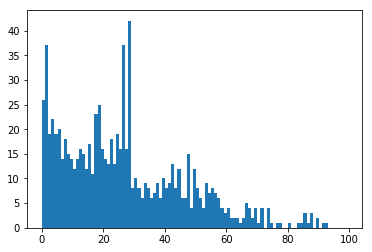

645


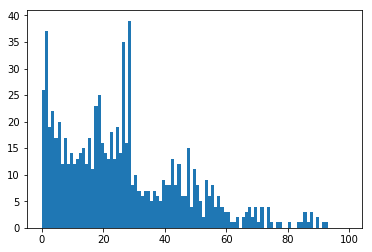

646


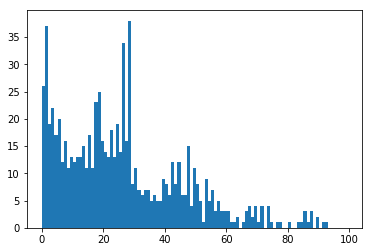

647


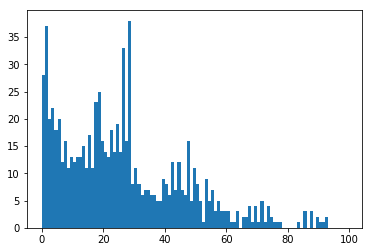

648


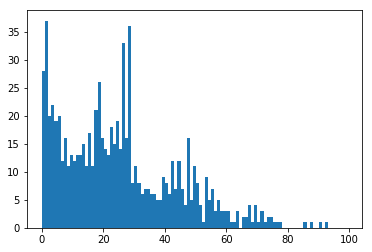

649


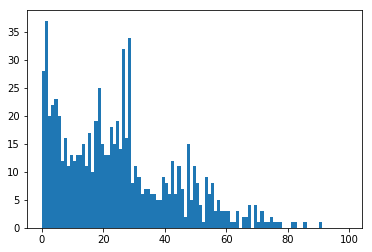

650


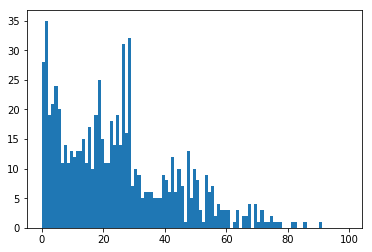

651


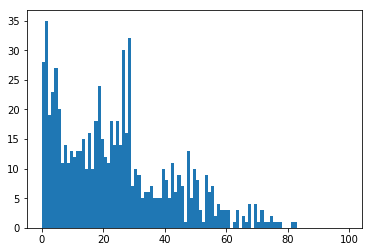

652


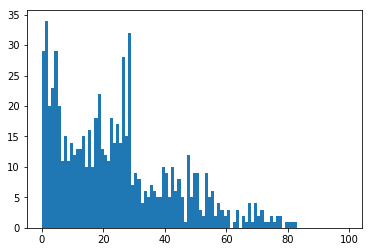

653


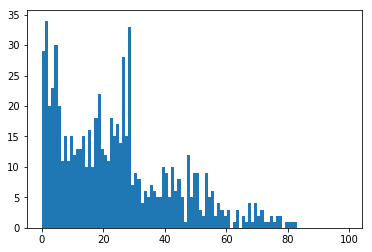

654


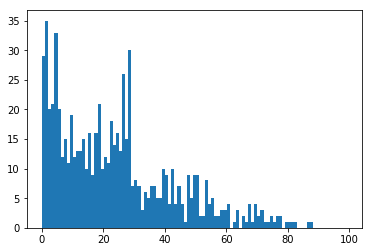

655


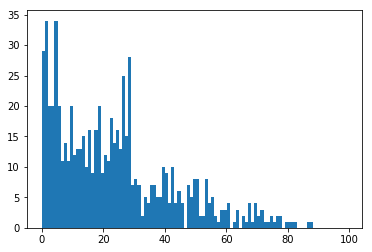

656


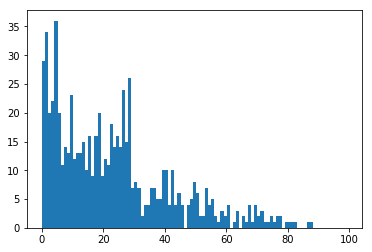

657


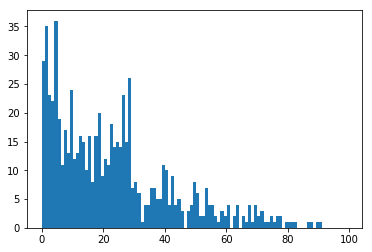

658


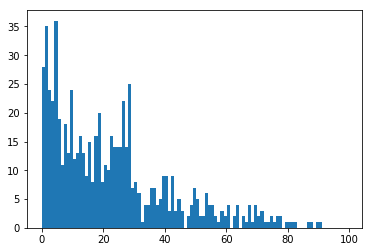

659


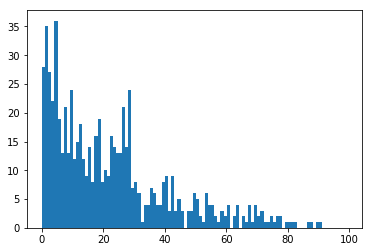

660


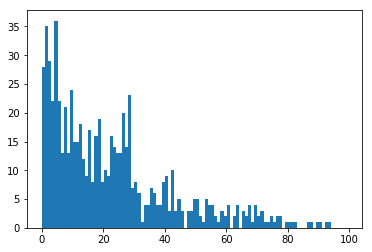

661


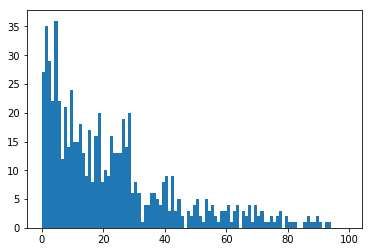

662


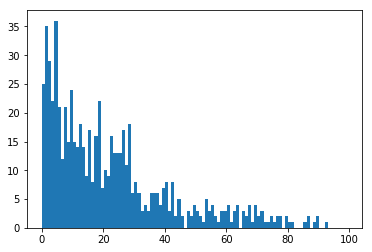

663


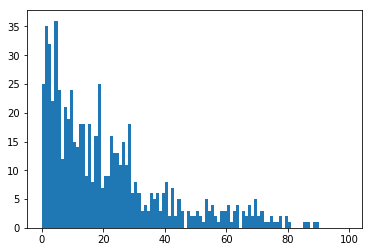

664


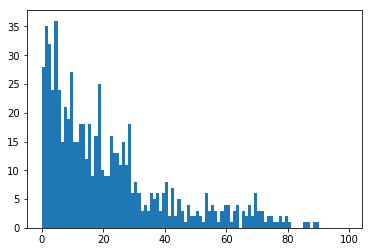

665


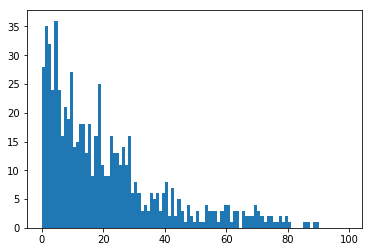

666


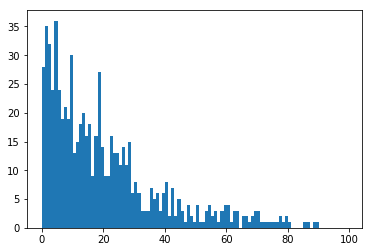

667


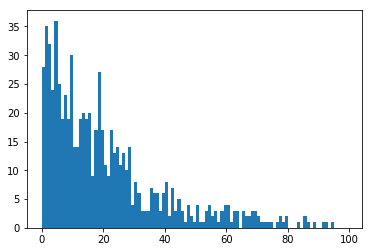

668


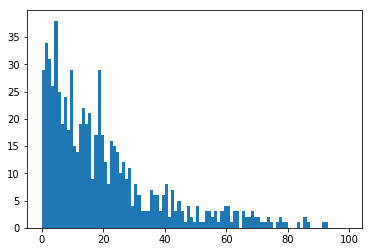

669


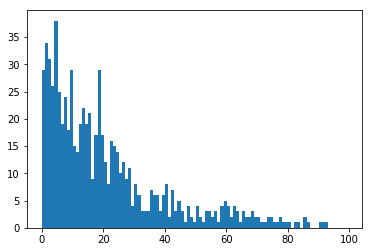

670


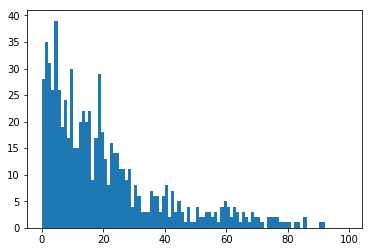

671


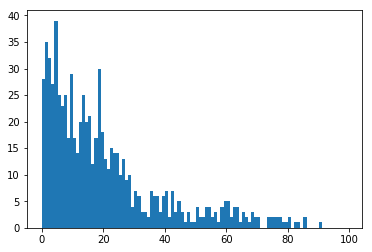

672


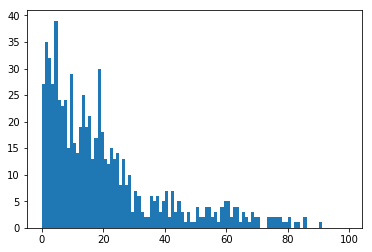

673


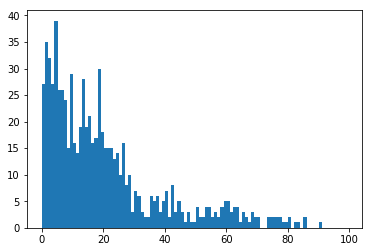

674


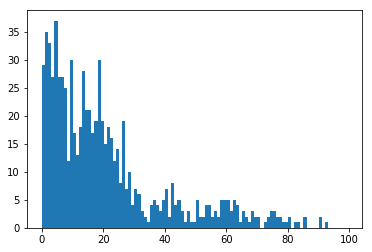

675


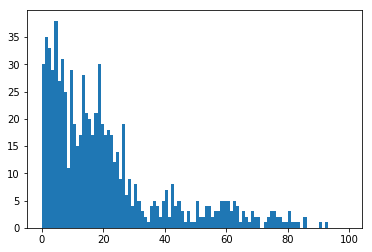

676


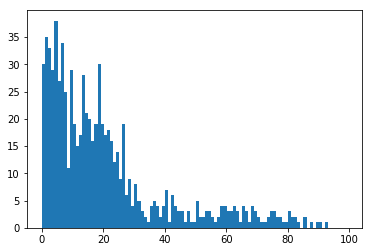

677


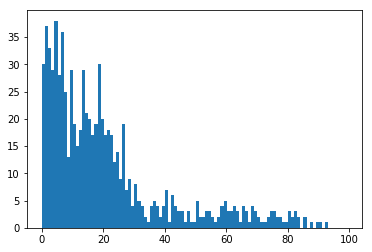

678


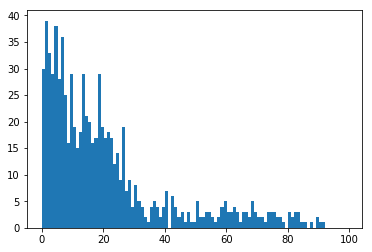

679


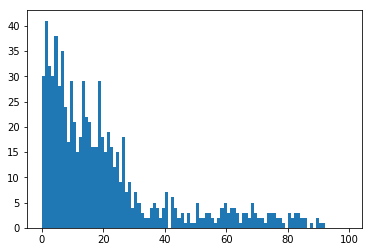

680


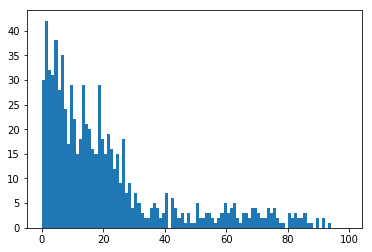

681


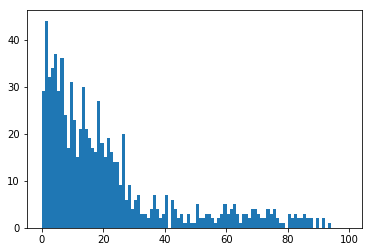

682


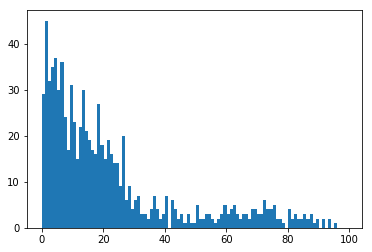

683


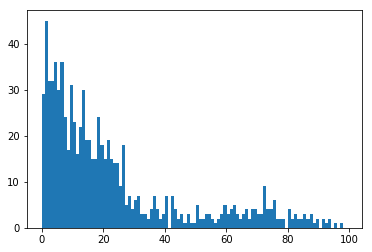

684


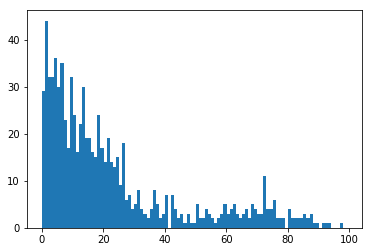

685


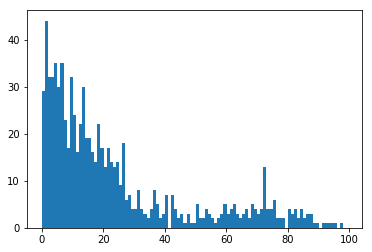

686


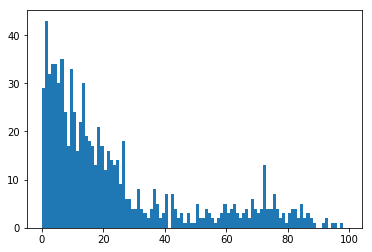

687


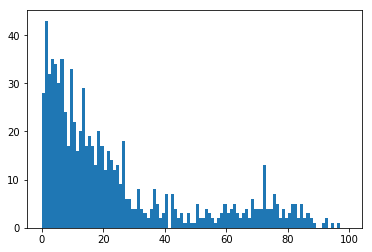

688


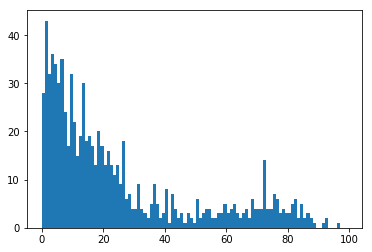

689


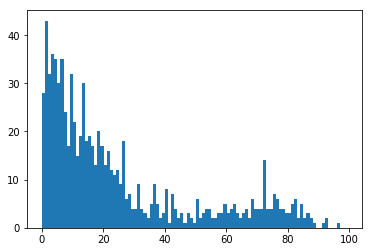

690


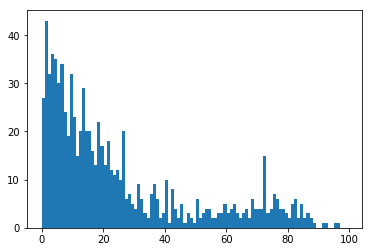

691


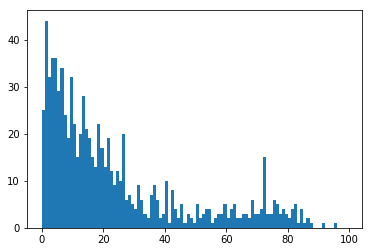

692


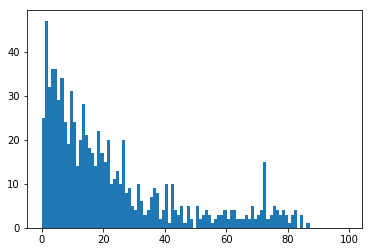

693


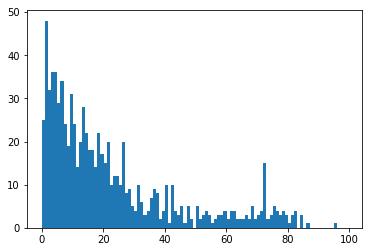

694


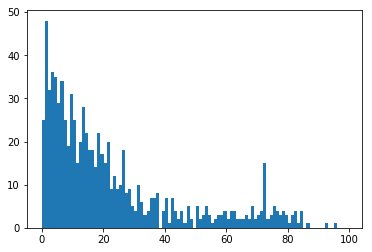

695


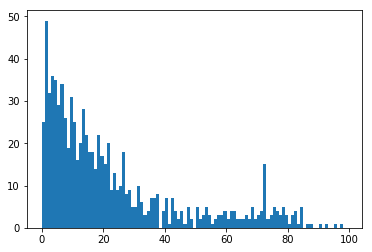

696


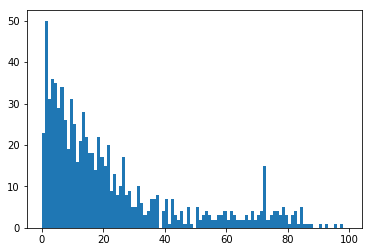

697


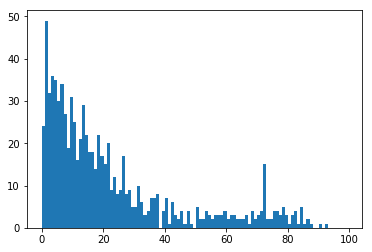

698


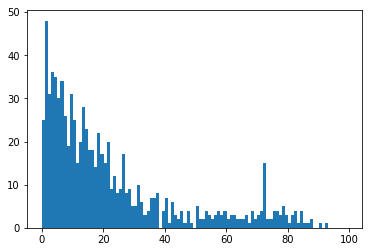

699


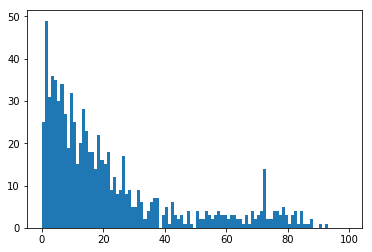

700


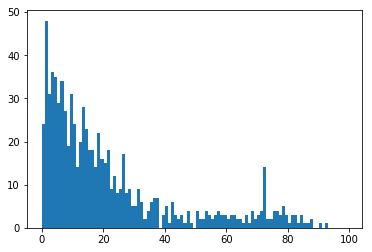

701


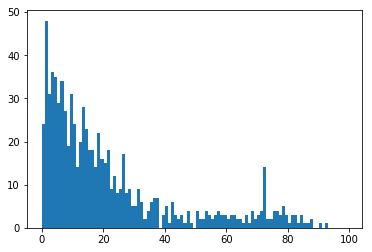

702


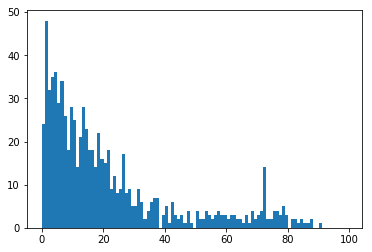

703


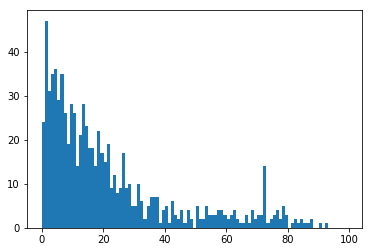

704


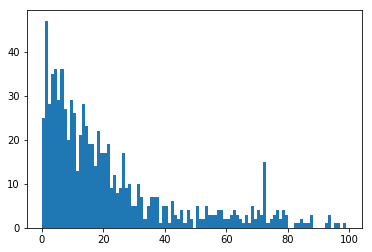

705


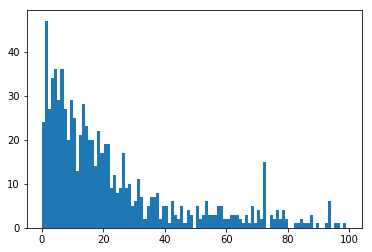

706


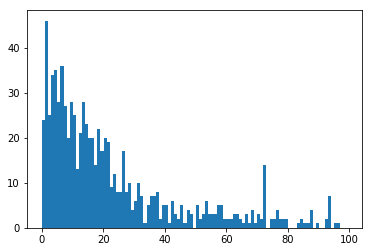

707


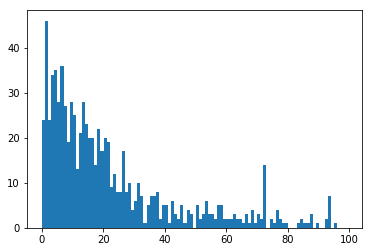

708


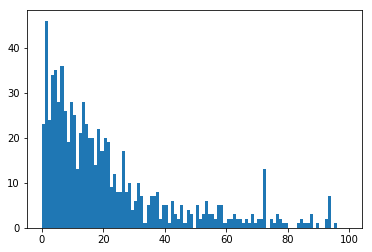

709


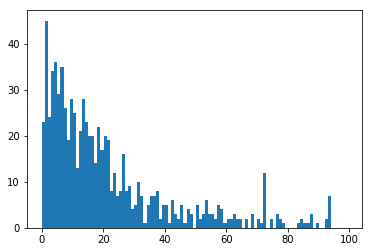

710


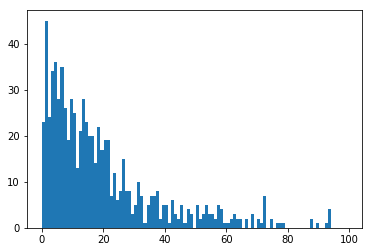

711


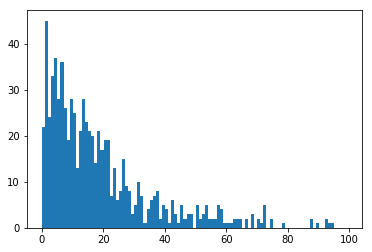

712


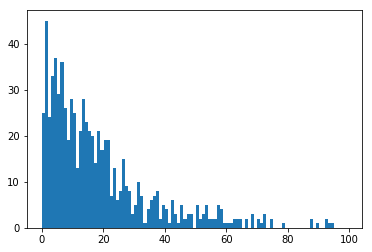

713


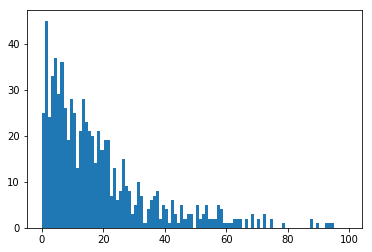

714


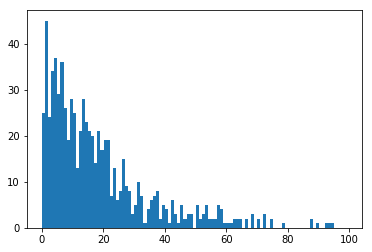

715


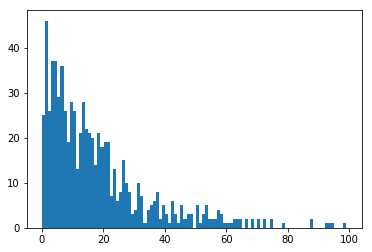

716


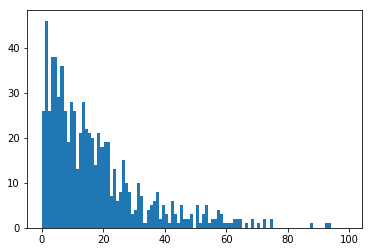

717


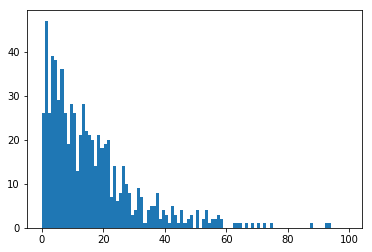

718


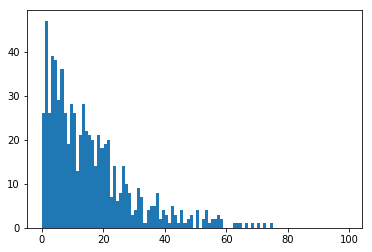

719


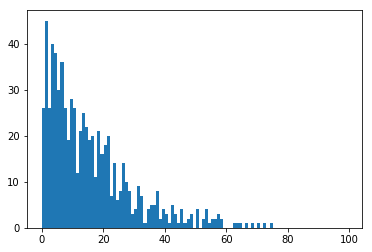

720


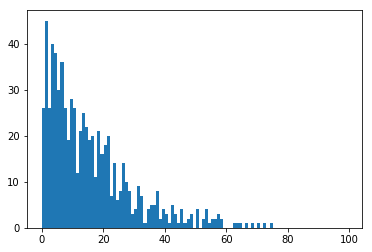

721


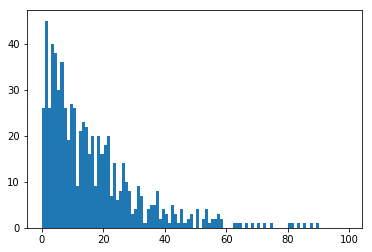

722


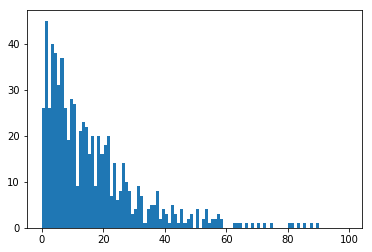

723


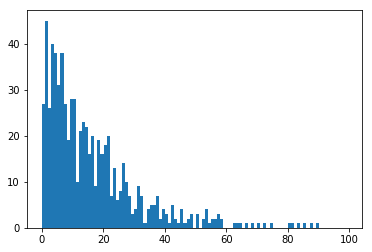

724


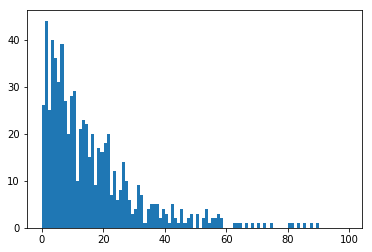

725


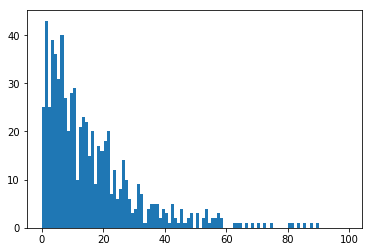

726


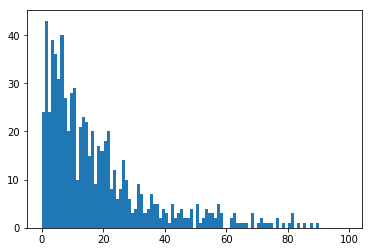

727


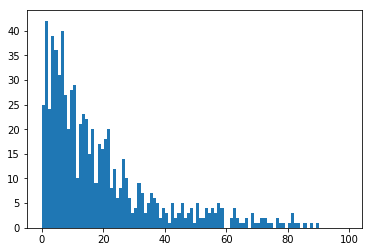

728


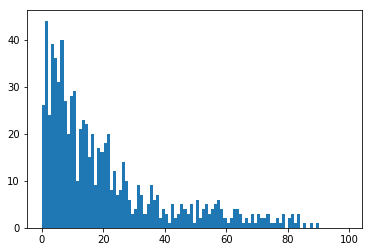

729


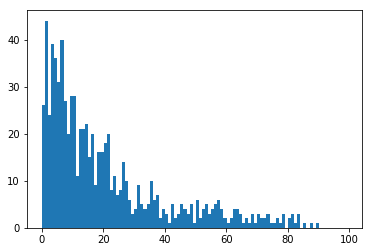

730


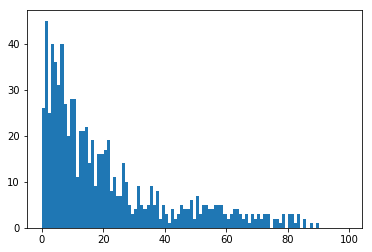

731


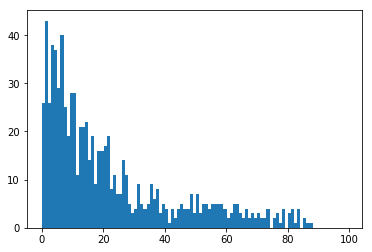

732


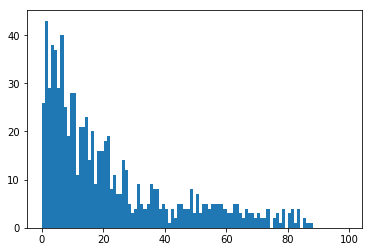

733


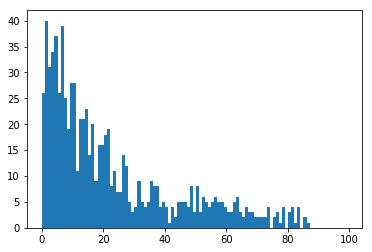

734


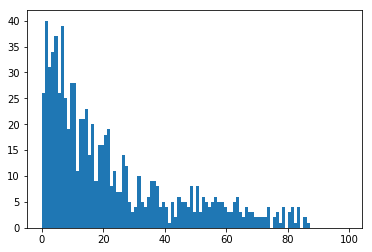

735


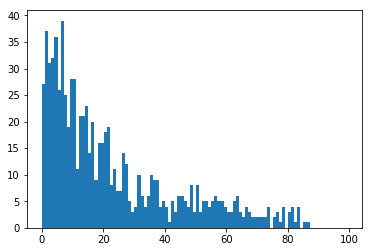

736


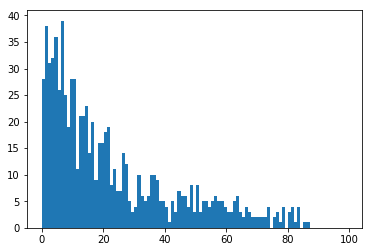

737


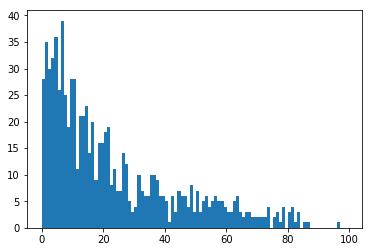

738


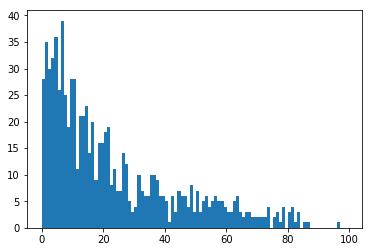

739


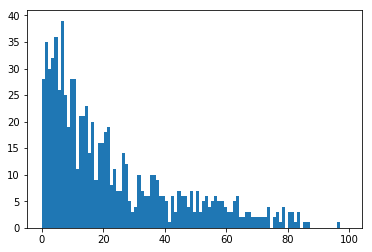

740


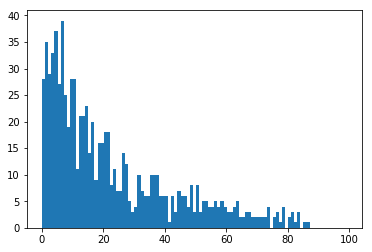

741


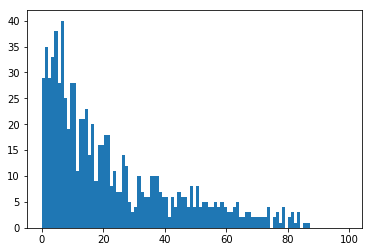

742


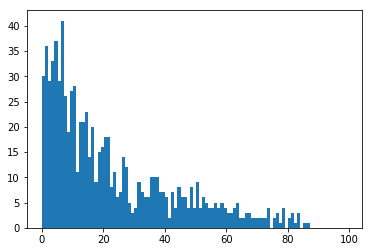

743


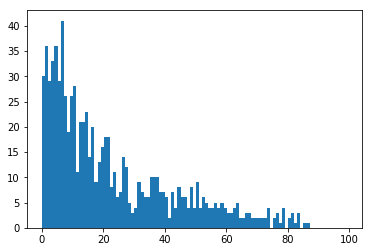

744


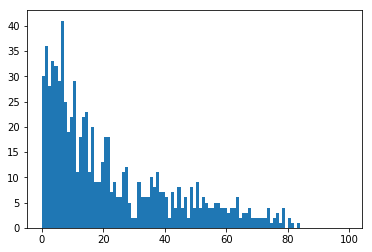

745


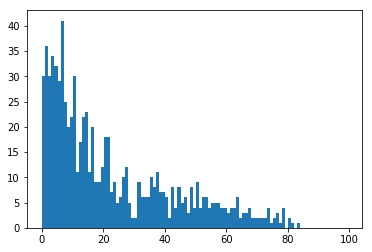

746


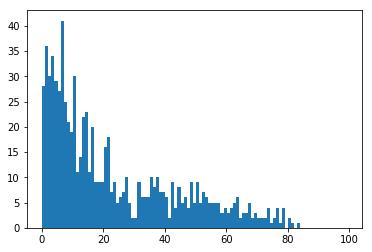

747


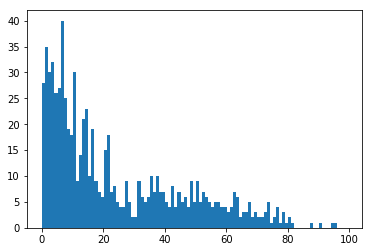

748


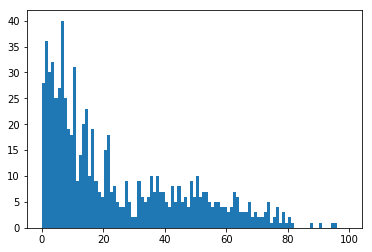

749


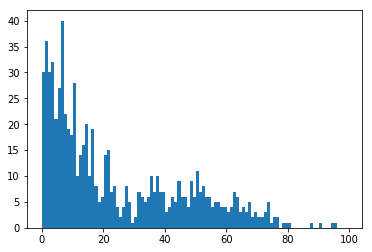

750


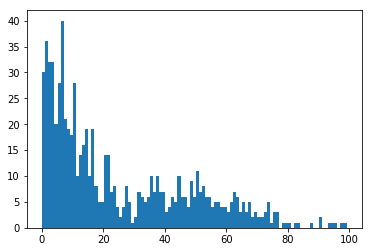

751


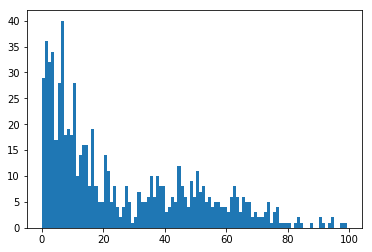

752


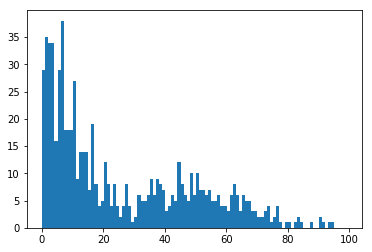

753


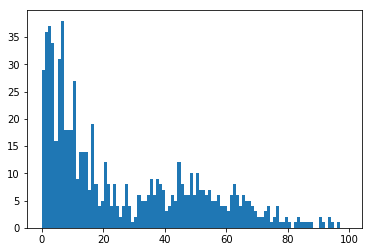

754


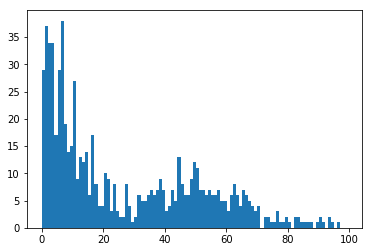

755


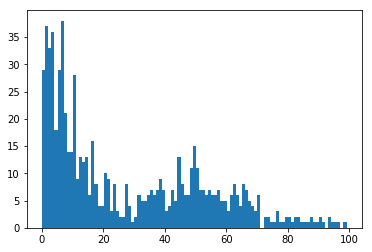

756


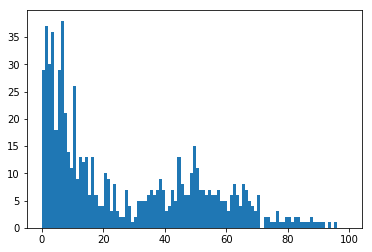

757


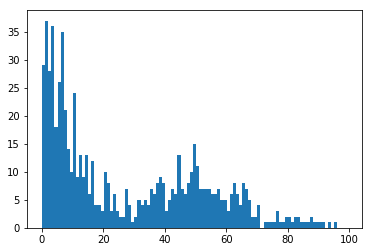

758


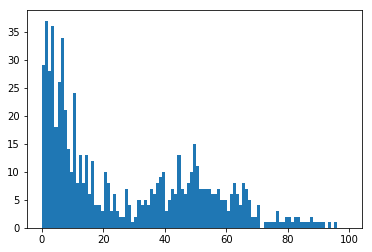

759


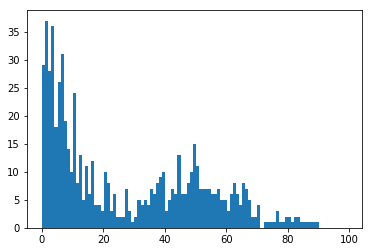

760


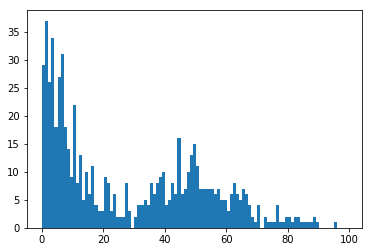

761


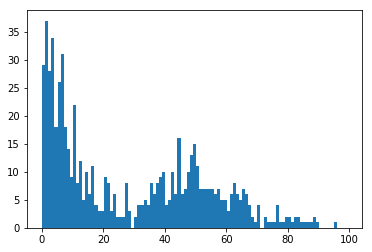

762


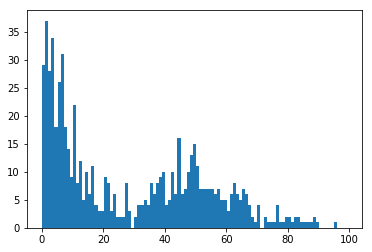

763


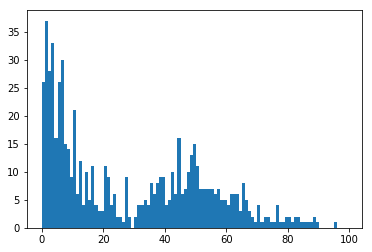

764


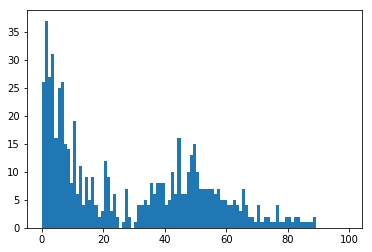

765


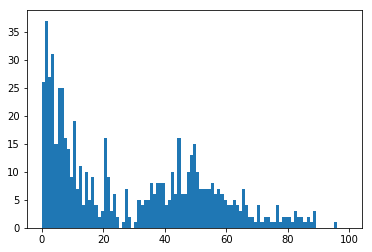

766


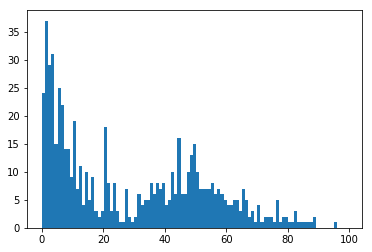

767


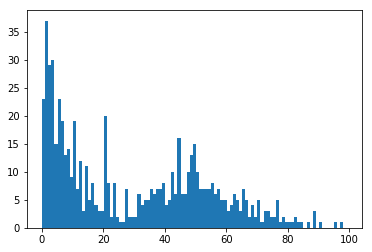

768


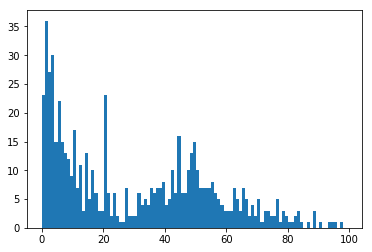

769


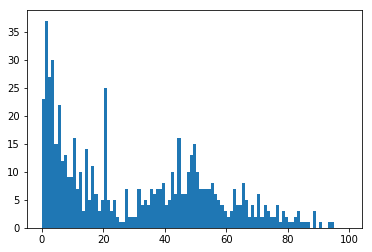

770


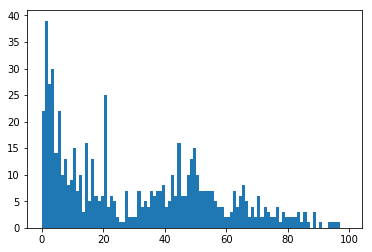

771


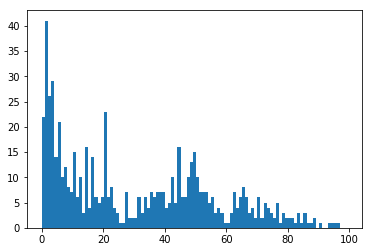

772


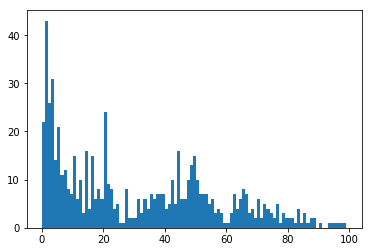

773


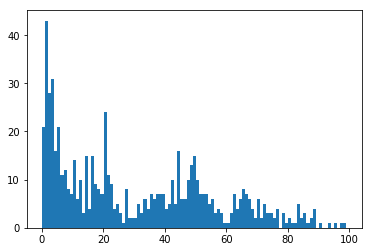

774


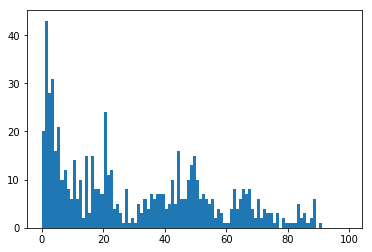

775


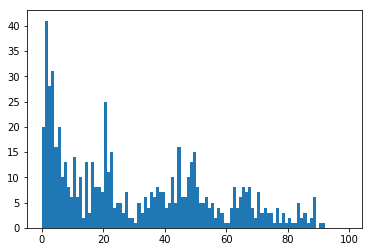

776


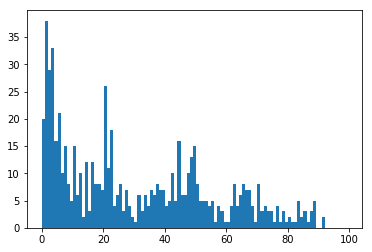

777


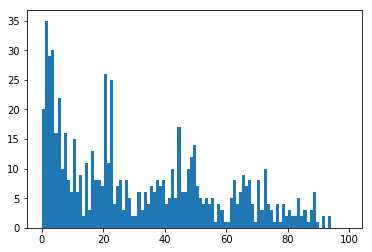

778


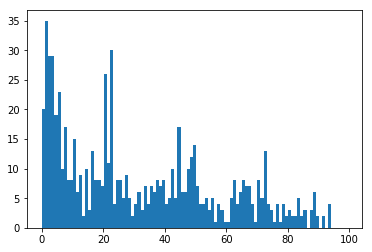

779


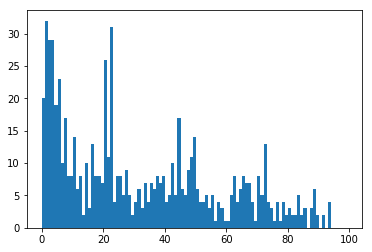

780


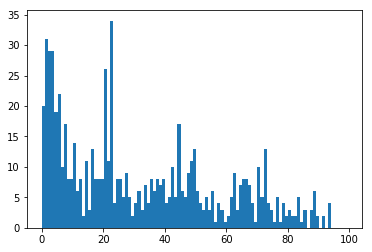

781


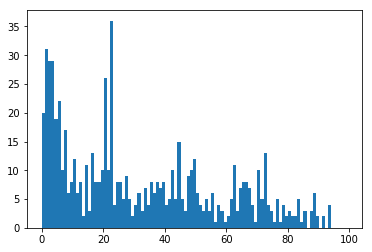

782


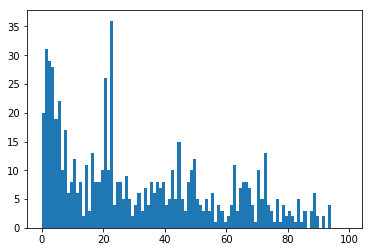

783


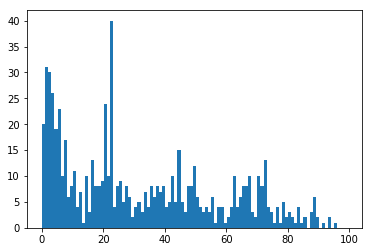

784


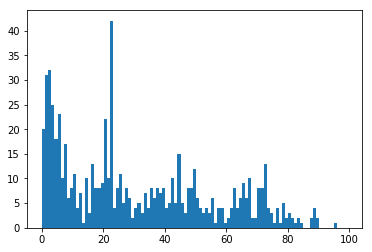

785


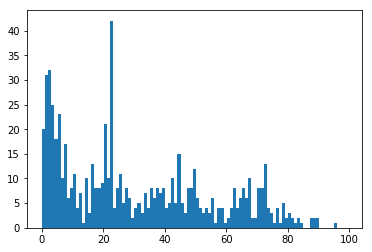

786


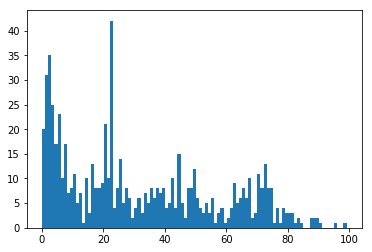

787


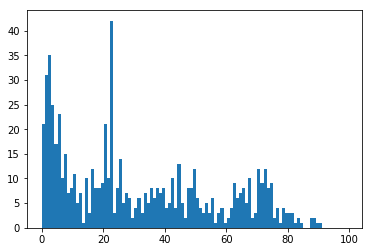

788


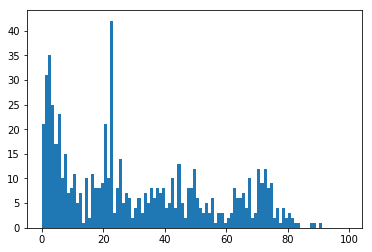

789


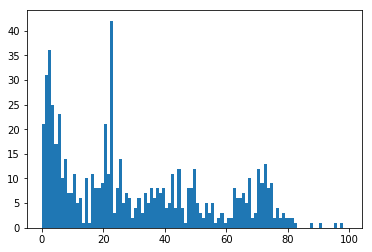

790


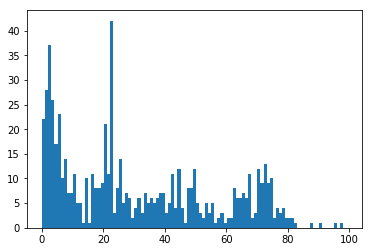

791


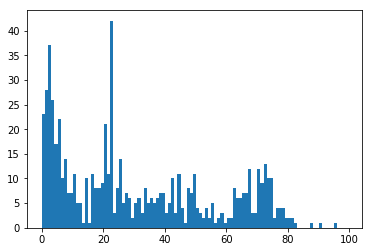

792


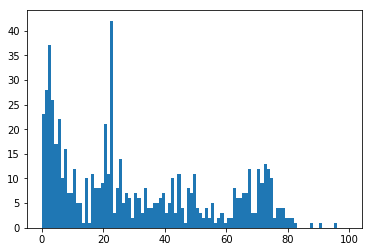

793


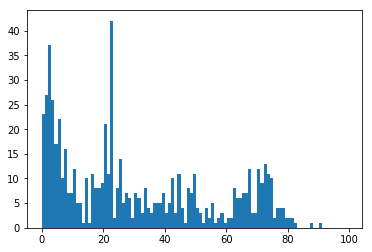

794


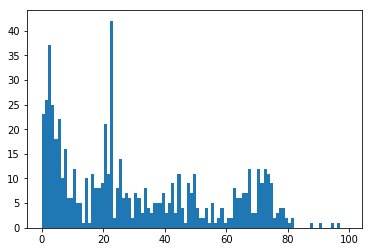

795


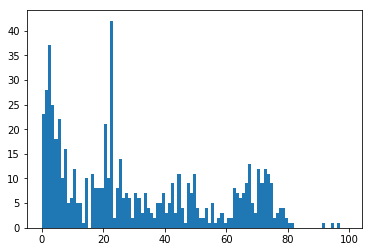

796


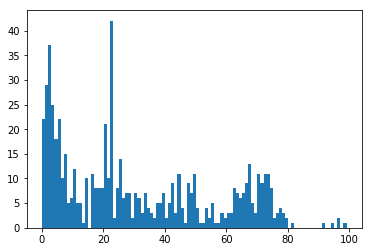

797


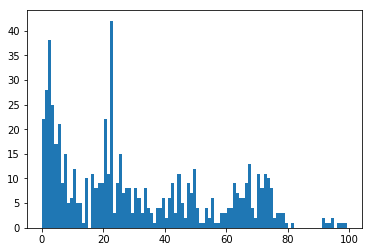

798


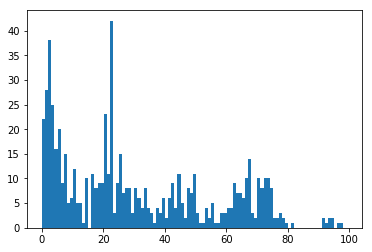

799


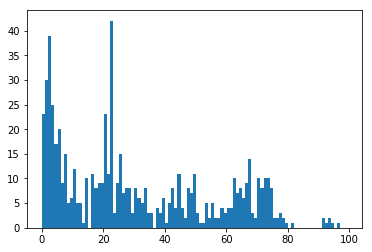

800


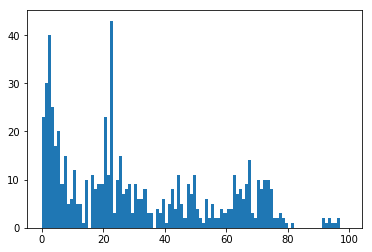

801


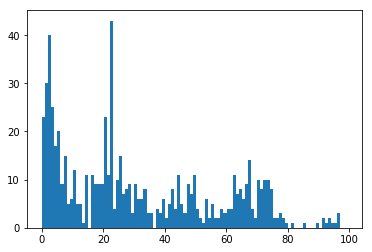

802


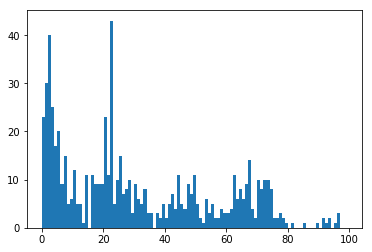

803


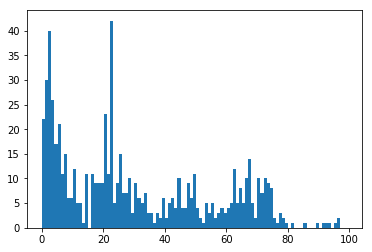

804


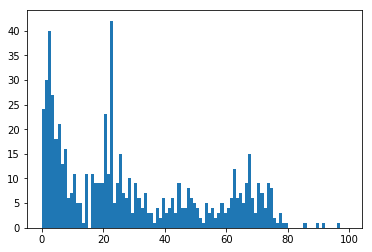

805


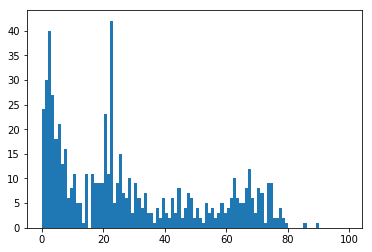

806


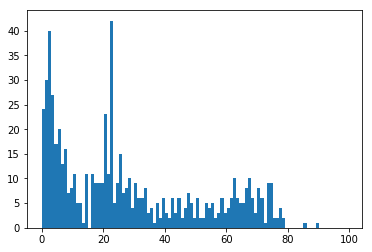

807


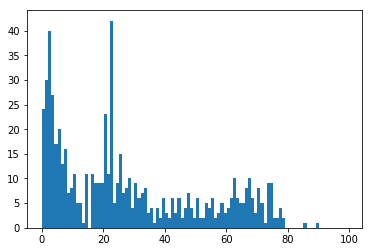

808


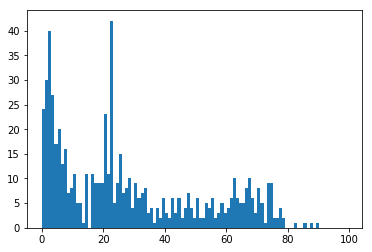

809


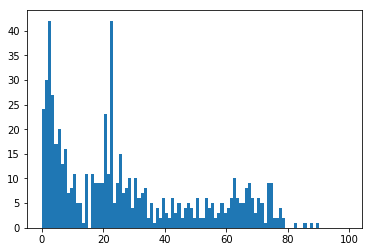

810


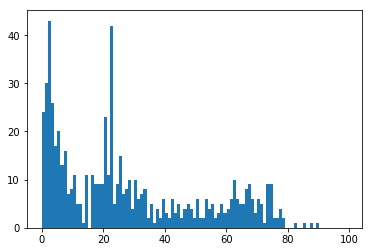

811


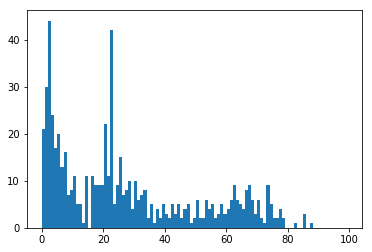

812


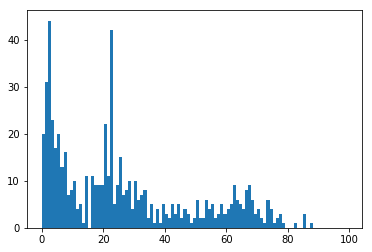

813


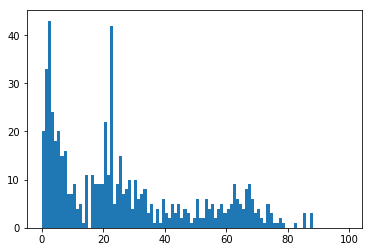

814


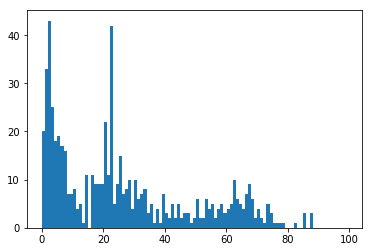

815


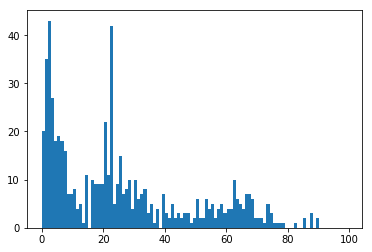

816


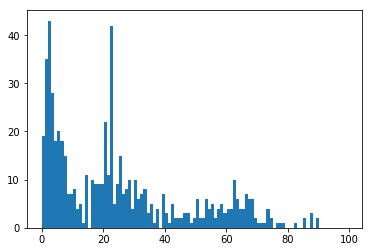

817


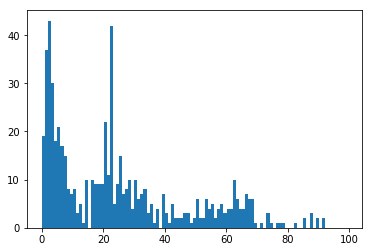

818


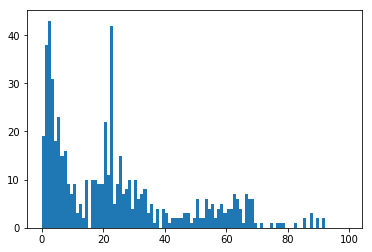

819


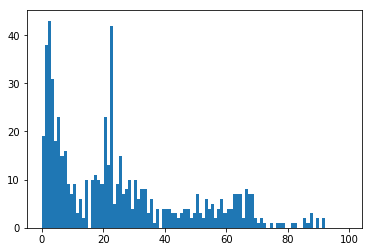

820


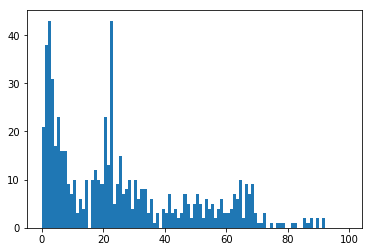

821


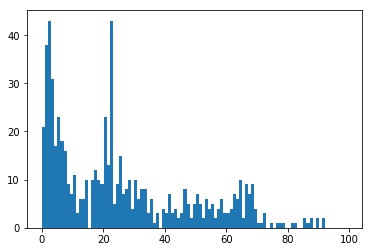

822


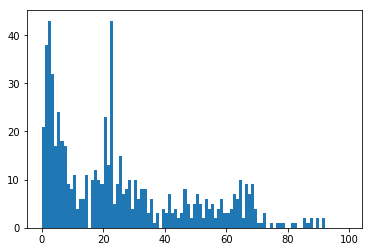

823


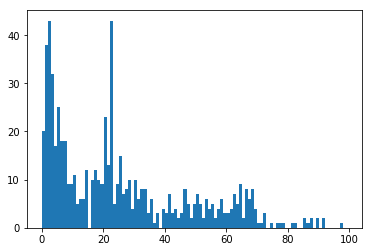

824


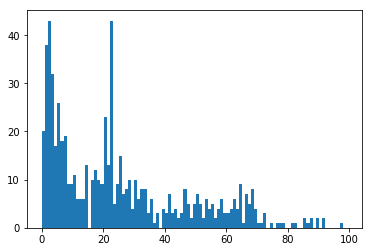

825


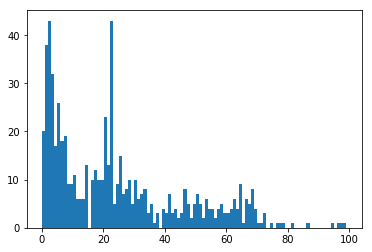

826


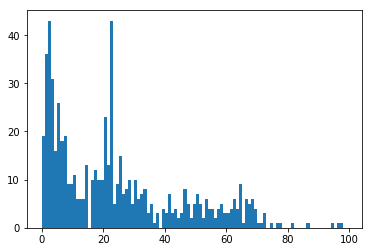

827


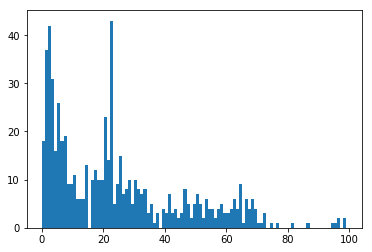

828


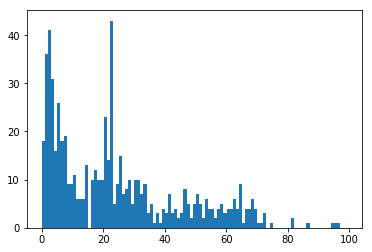

829


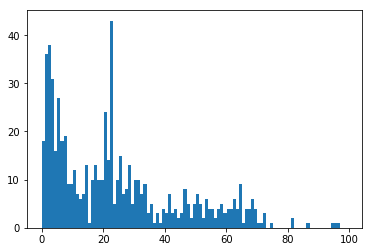

830


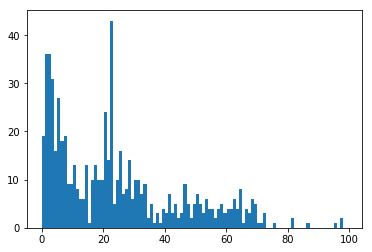

831


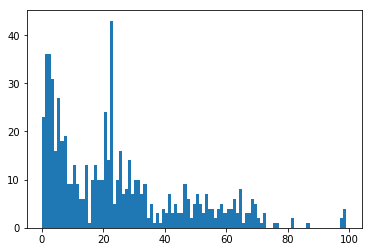

832


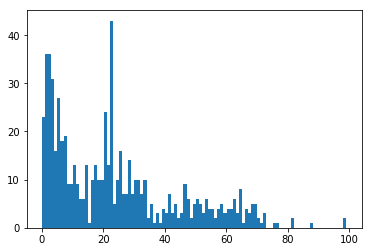

833


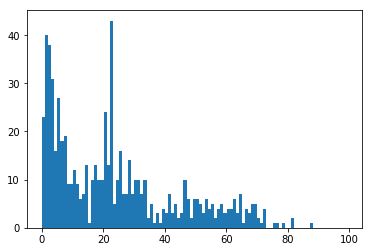

834


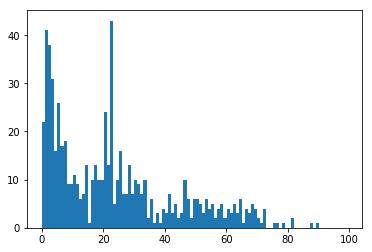

835


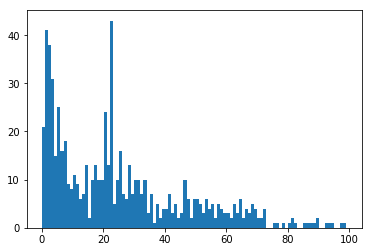

836


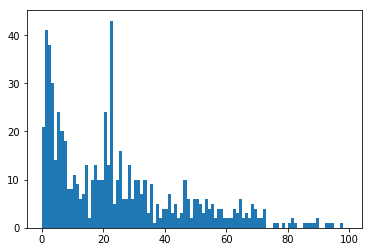

837


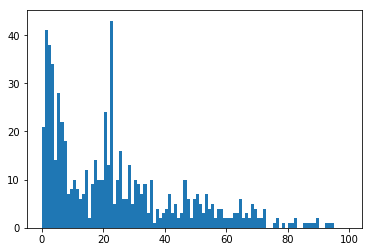

838


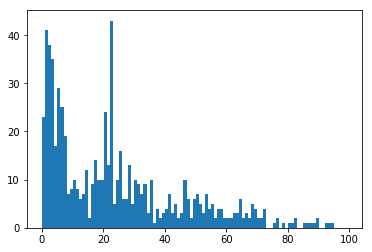

839


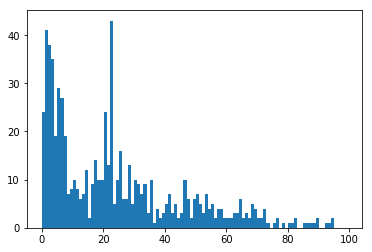

840


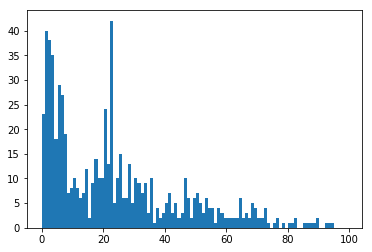

841


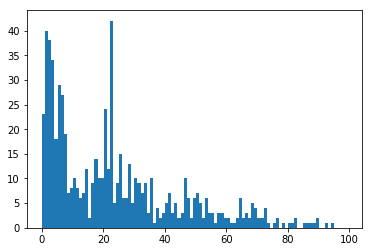

842


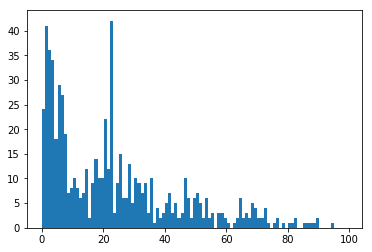

843


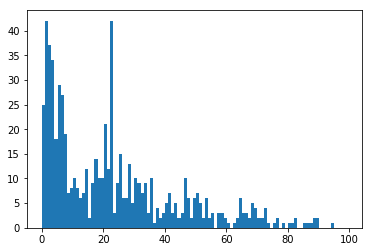

844


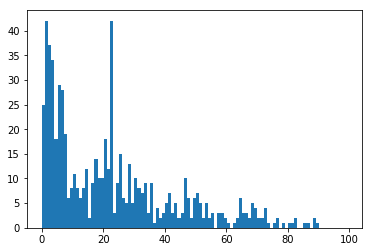

845


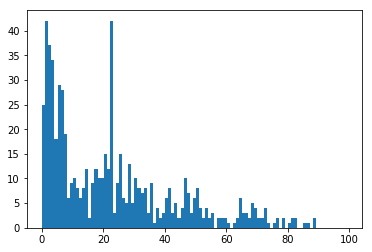

846


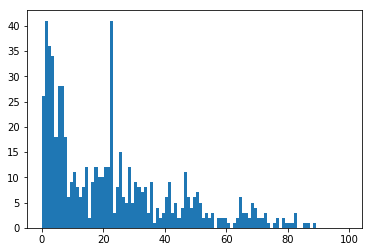

847


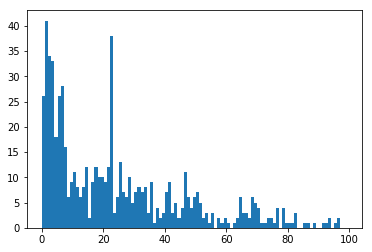

848


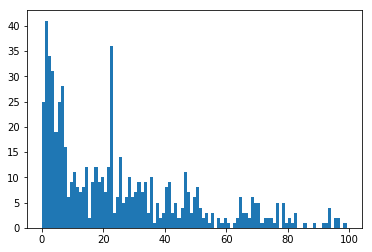

849


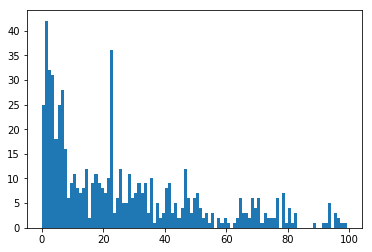

850


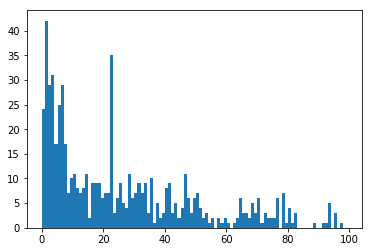

851


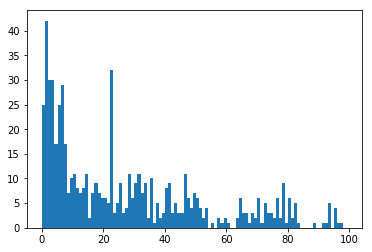

852


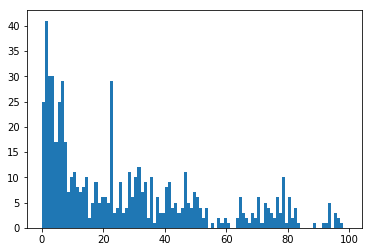

853


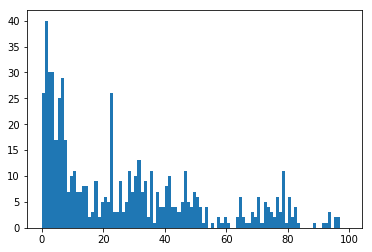

854


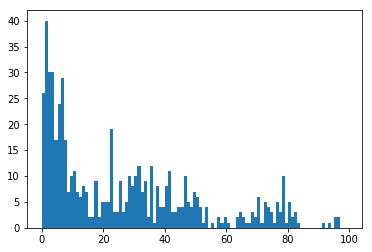

855


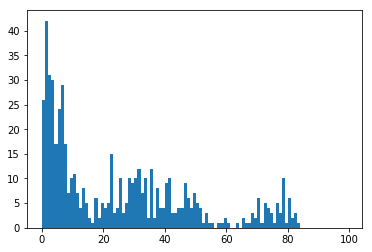

856


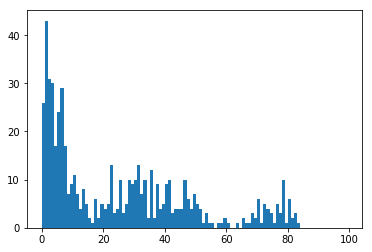

857


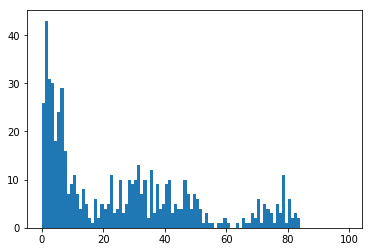

858


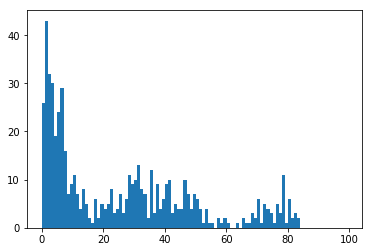

859


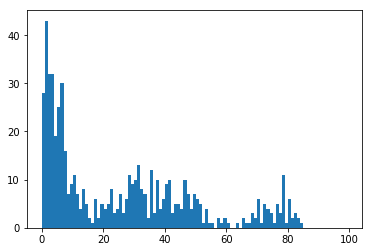

860


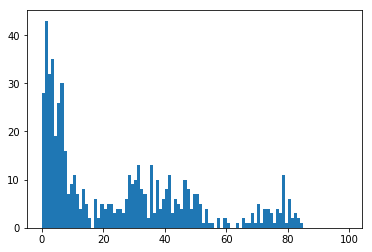

861


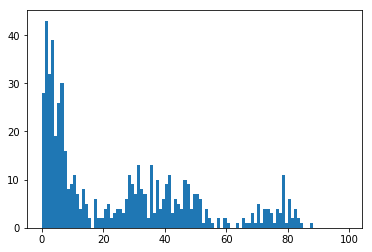

862


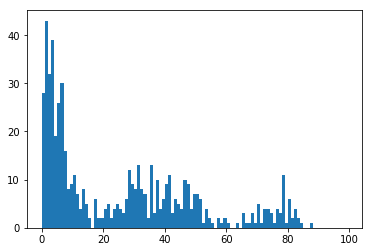

863


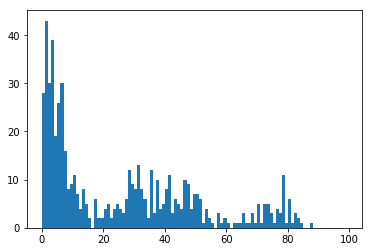

864


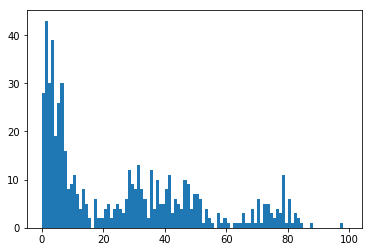

865


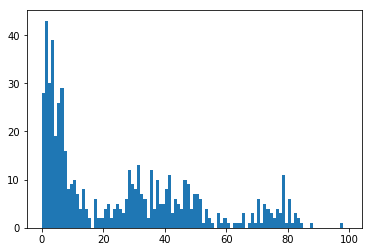

866


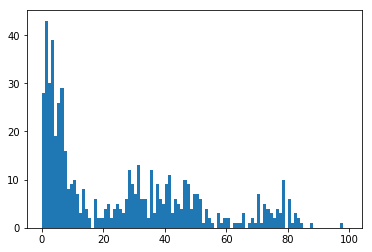

867


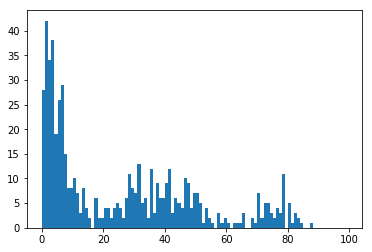

868


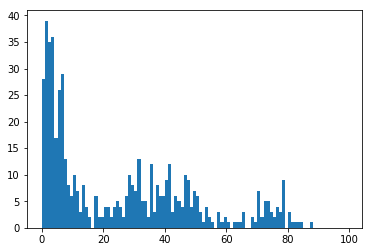

869


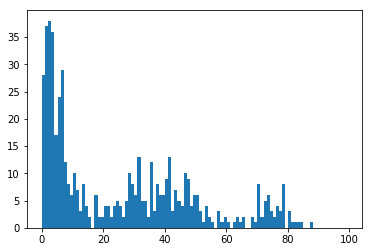

870


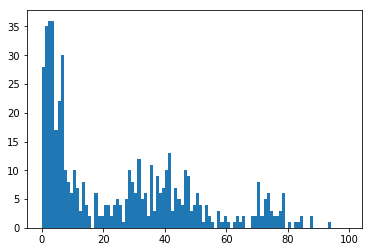

871


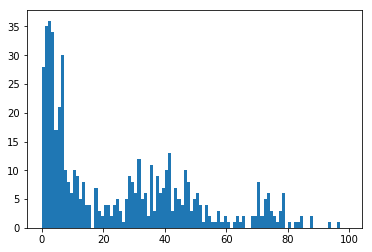

872


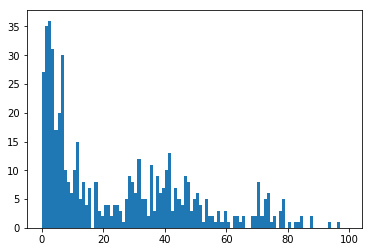

873


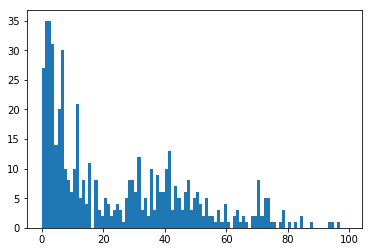

874


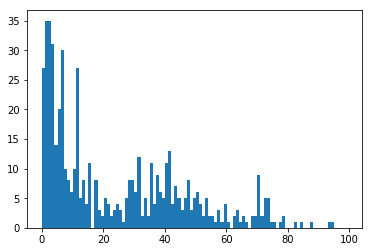

875


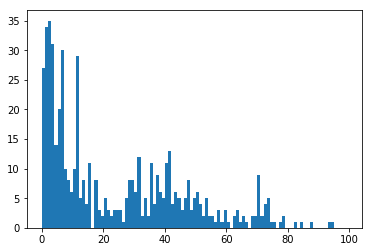

876


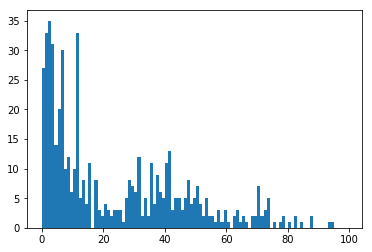

877


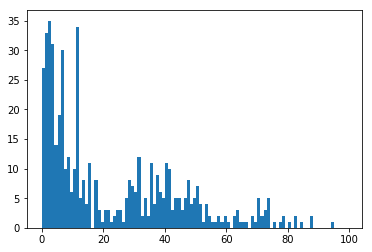

878


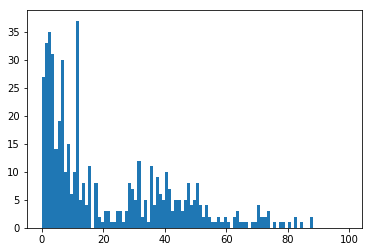

879


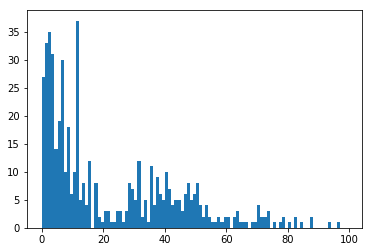

880


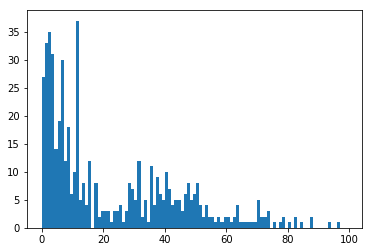

881


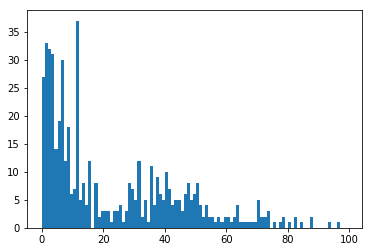

882


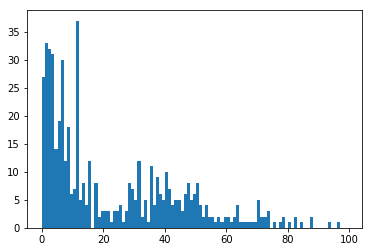

883


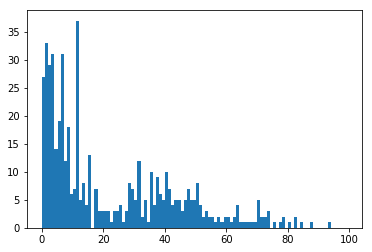

884


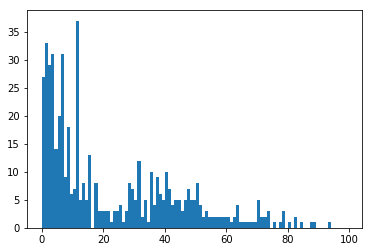

885


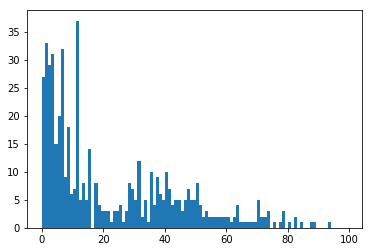

886


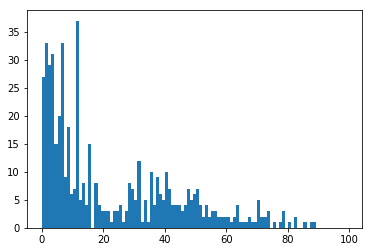

887


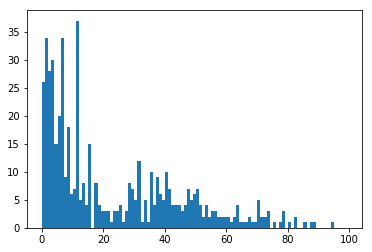

888


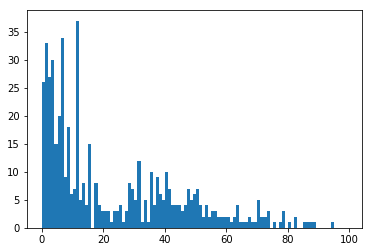

889


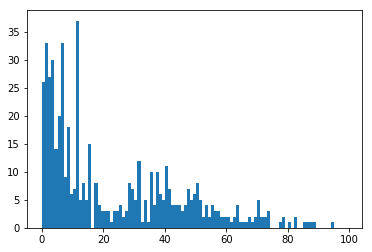

890


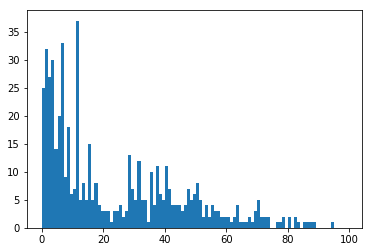

891


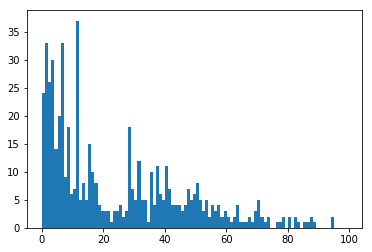

892


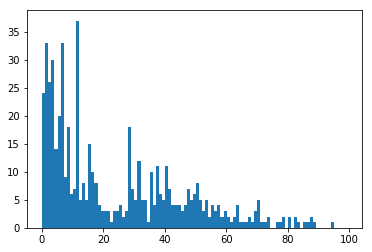

893


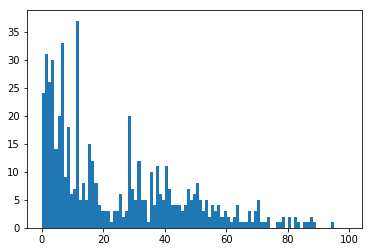

894


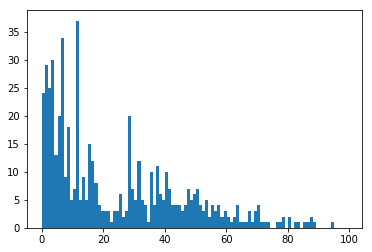

895


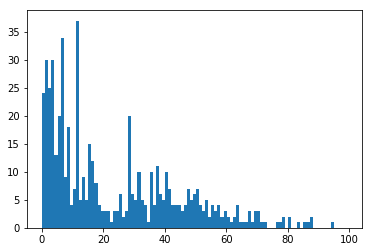

896


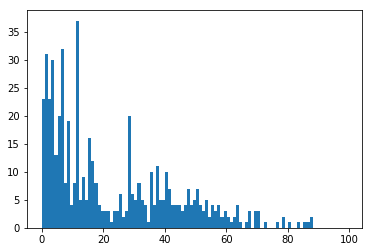

897


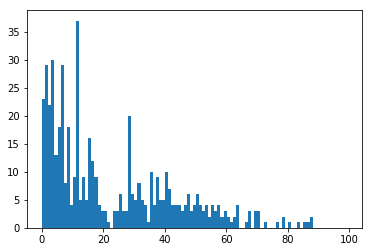

898


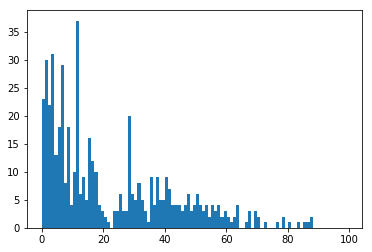

899


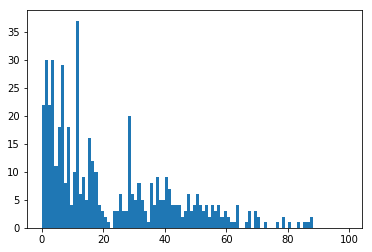

900


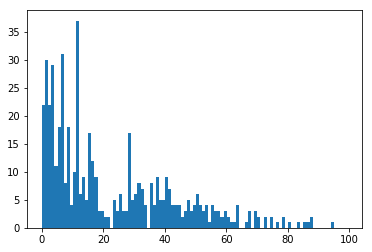

901


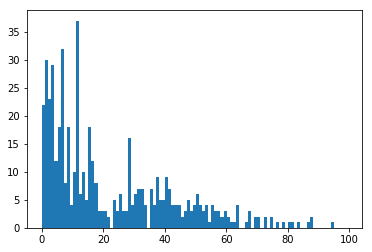

902


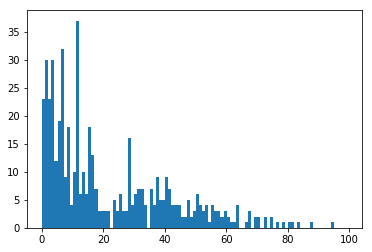

903


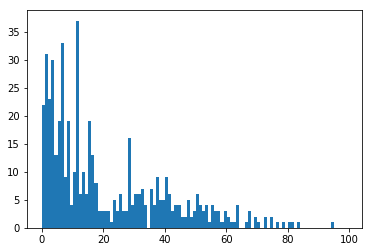

904


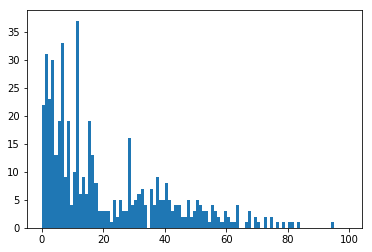

905


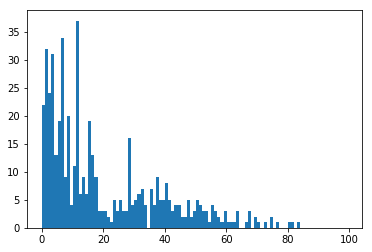

906


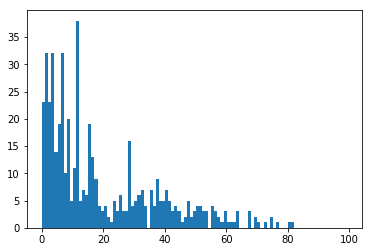

907


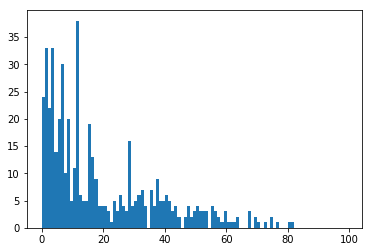

908


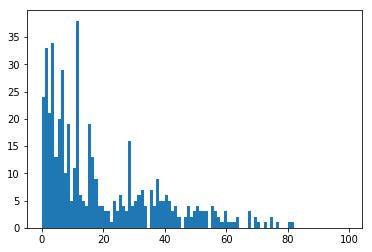

909


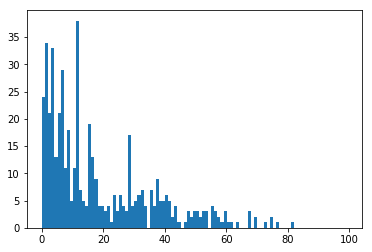

910


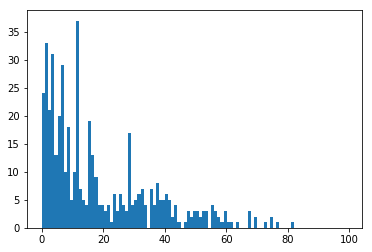

911


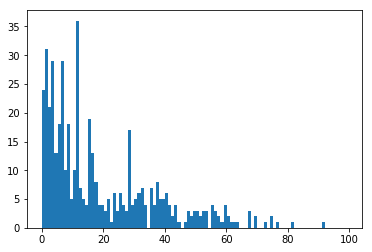

912


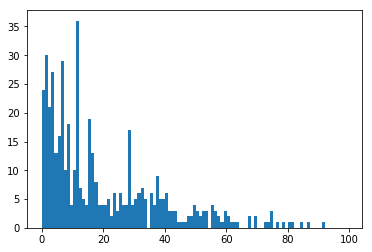

913


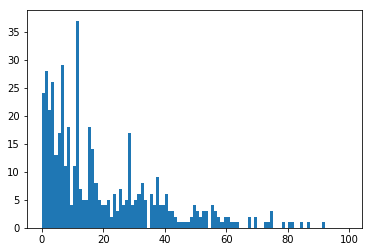

914


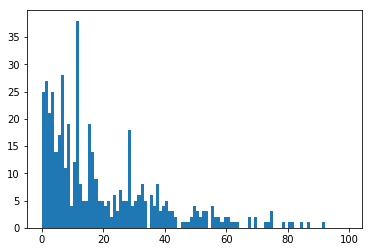

915


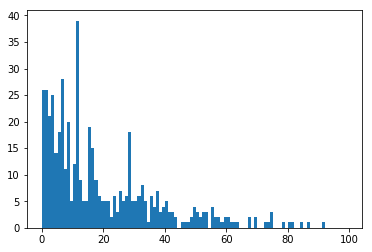

916


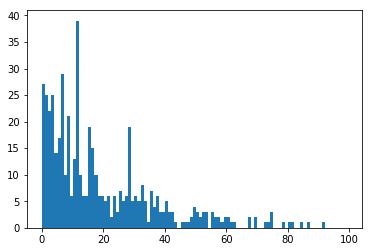

917


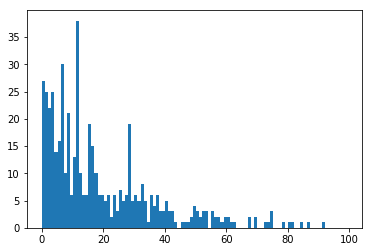

918


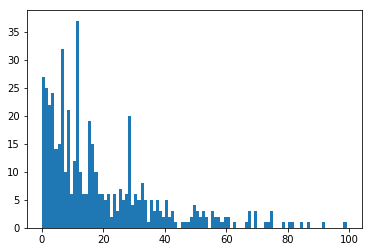

919


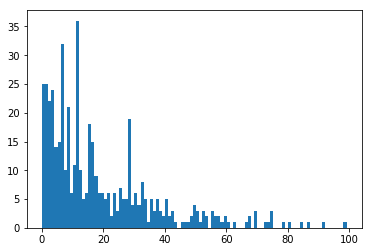

920


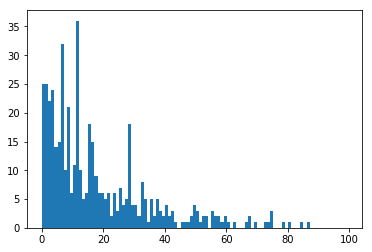

921


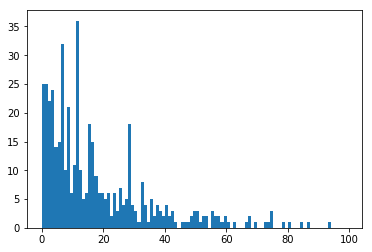

922


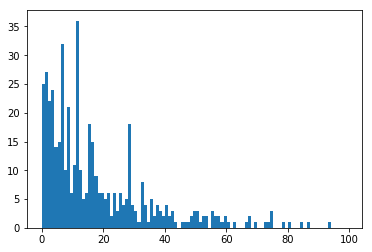

923


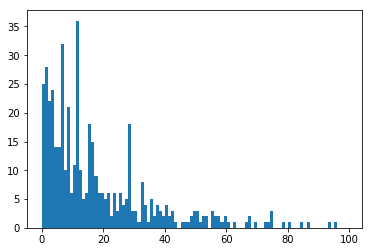

924


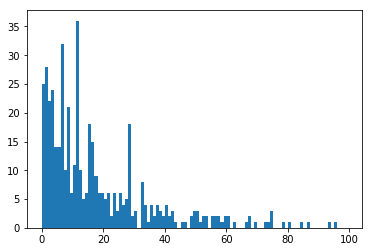

925


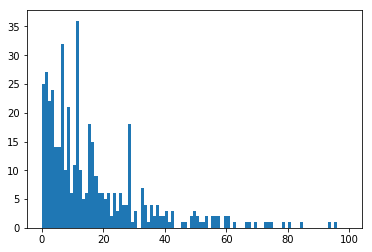

926


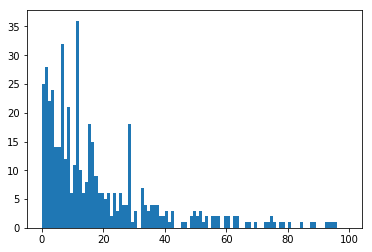

927


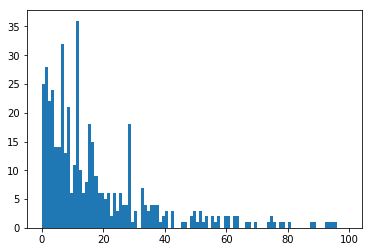

928


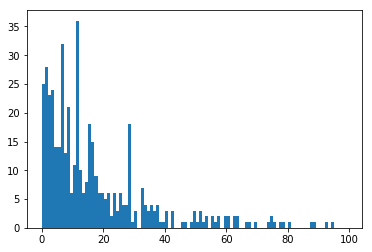

929


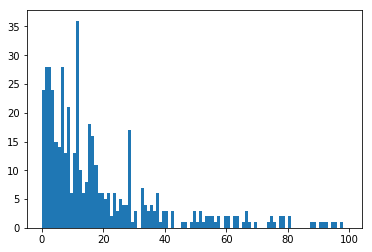

930


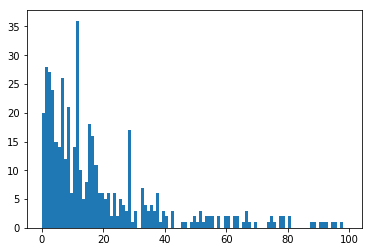

931


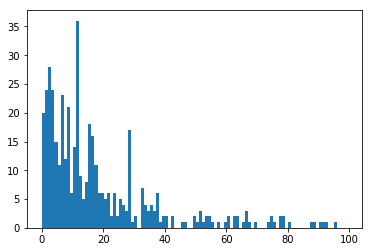

932


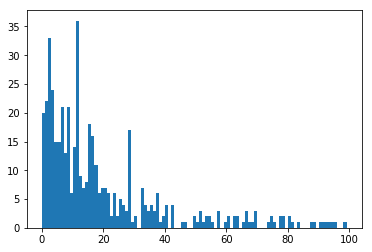

933


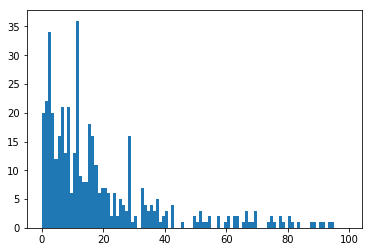

934


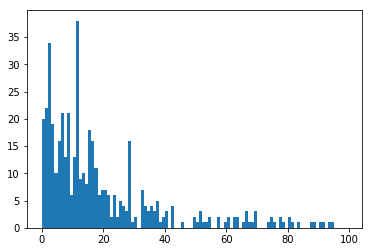

935


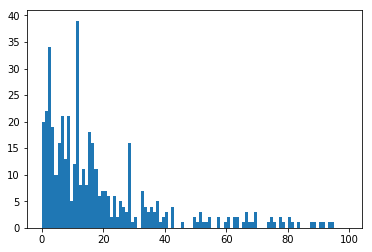

936


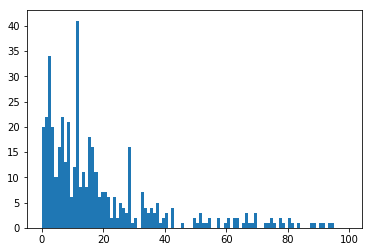

937


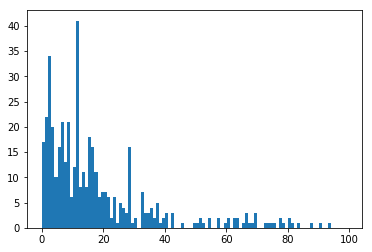

938


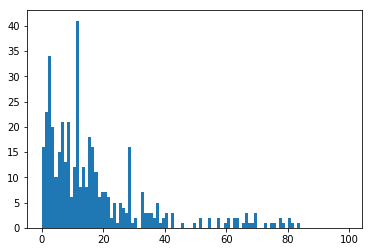

939


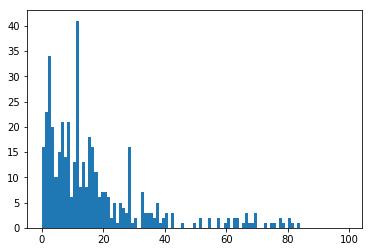

940


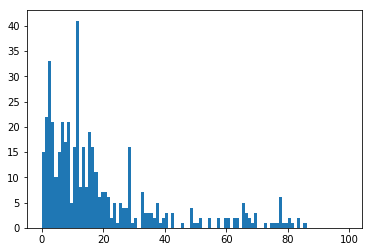

941


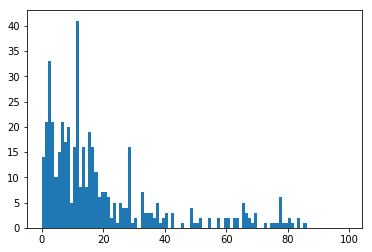

942


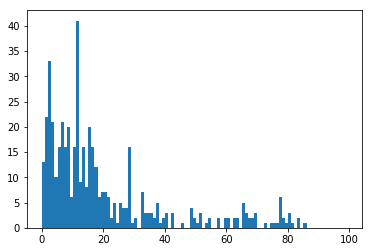

943


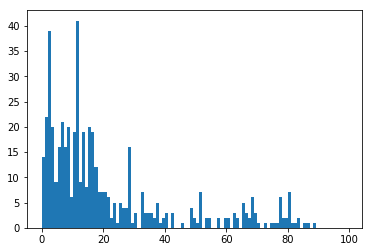

944


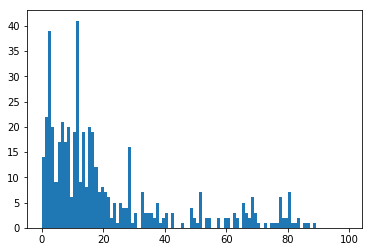

945


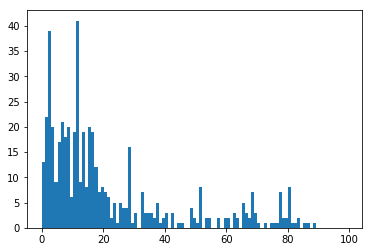

946


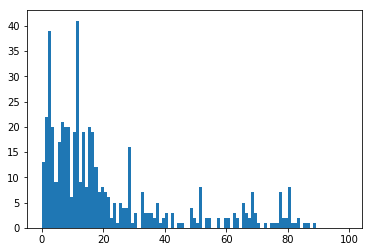

947


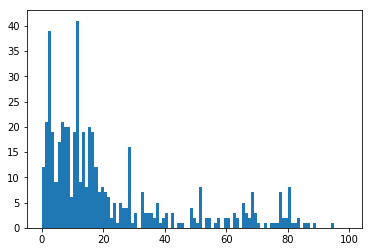

948


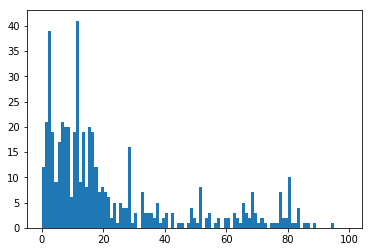

949


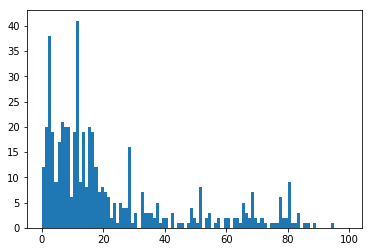

950


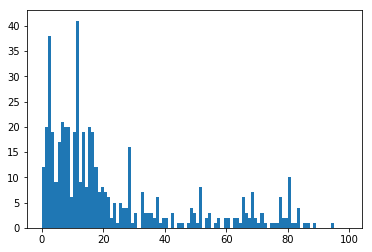

951


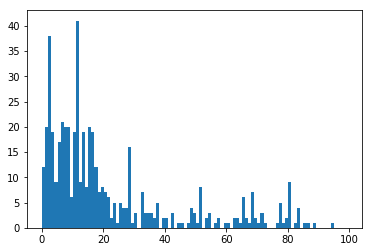

952


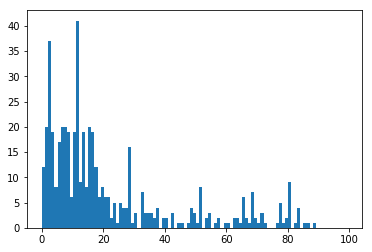

953


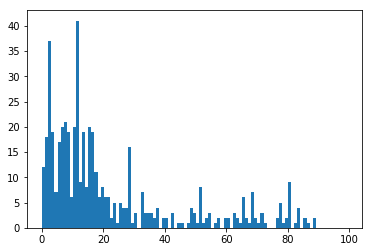

954


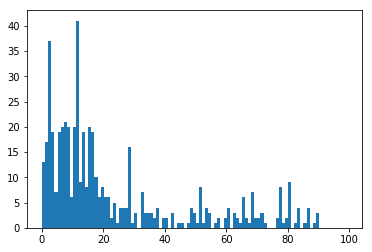

955


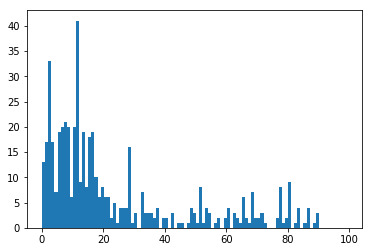

956


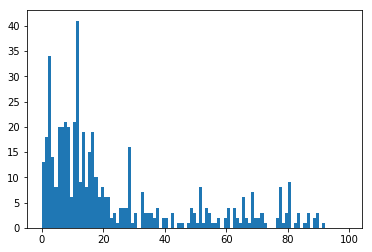

957


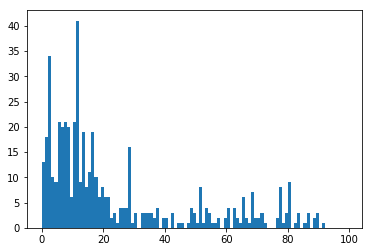

958


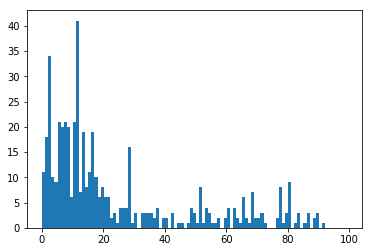

959


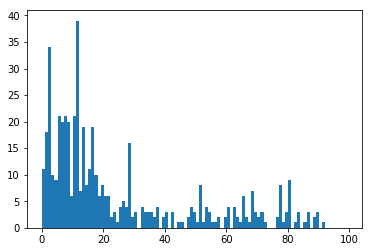

960


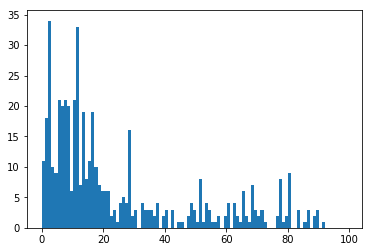

961


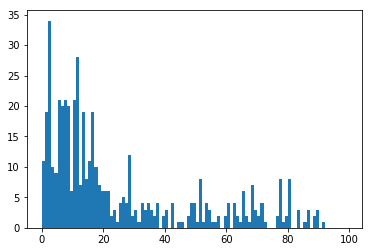

962


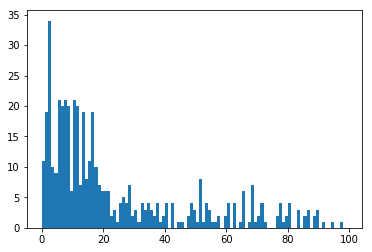

963


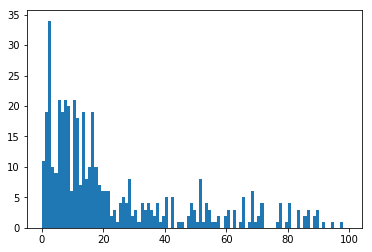

964


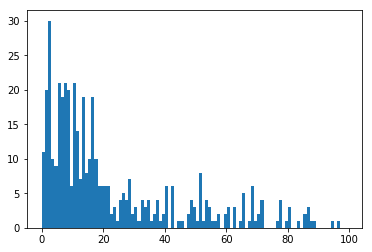

965


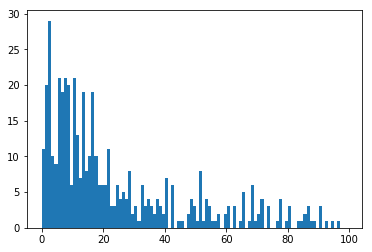

966


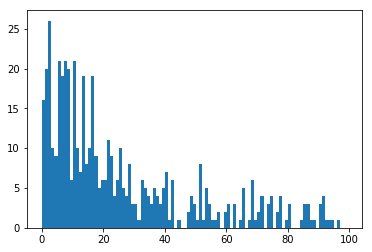

967


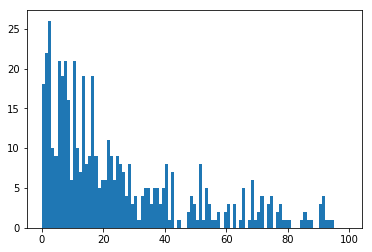

968


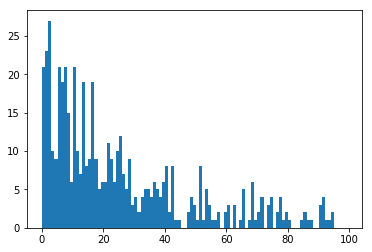

969


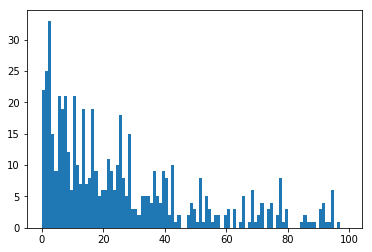

970


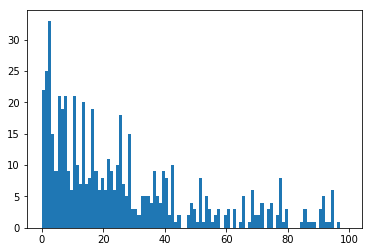

971


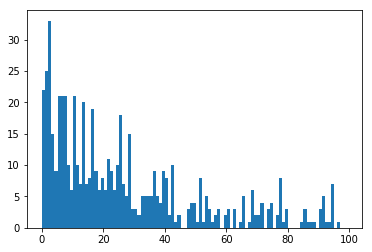

972


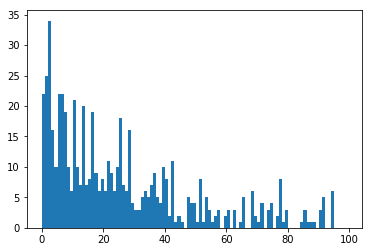

973


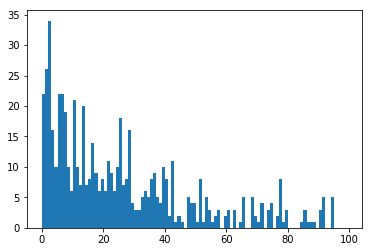

974


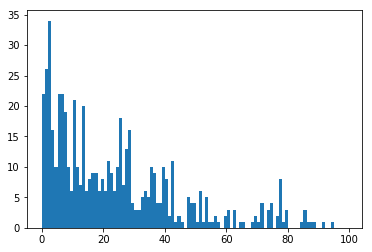

975


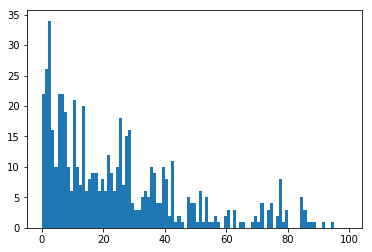

976


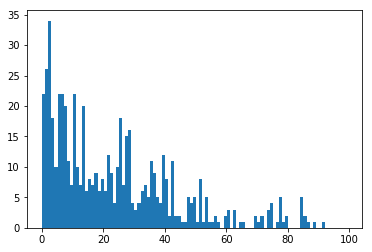

977


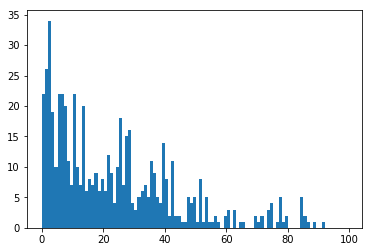

978


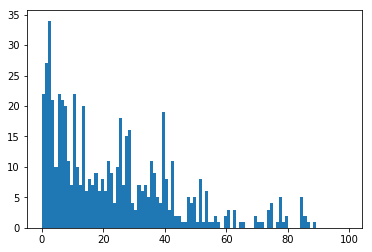

979


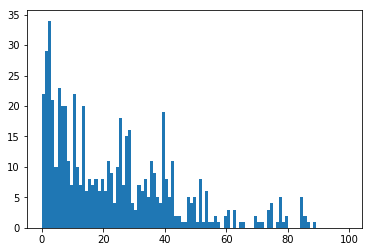

980


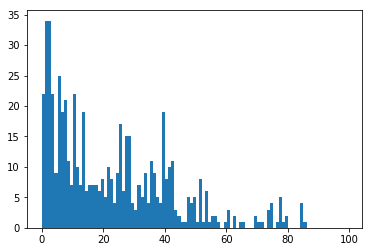

981


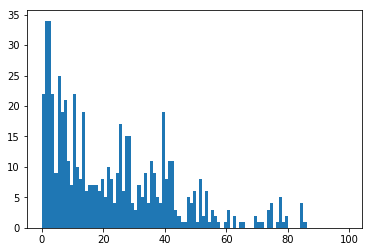

982


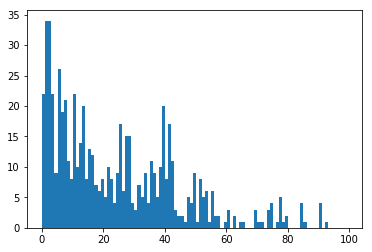

983


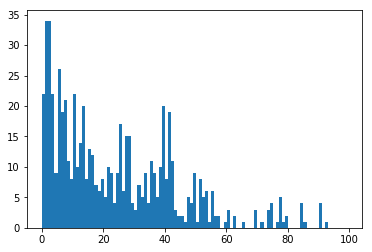

984


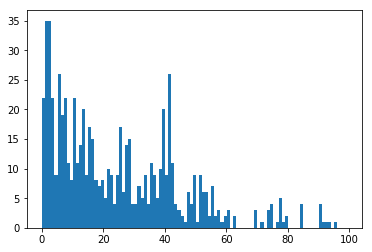

985


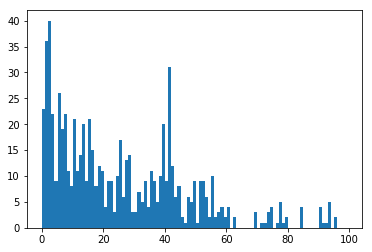

986


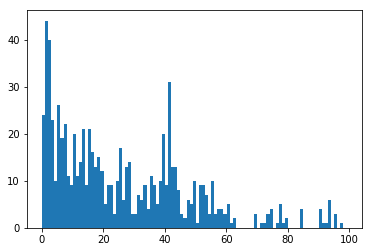

987


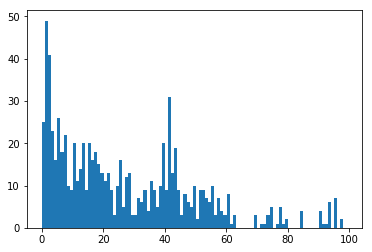

988


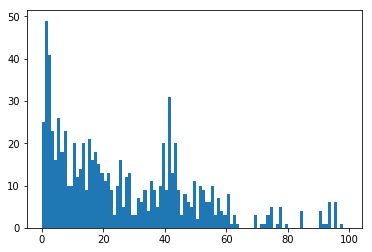

989


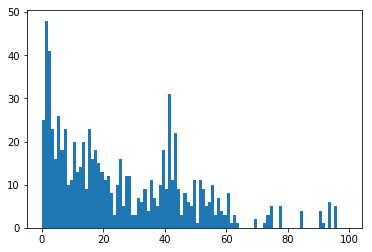

990


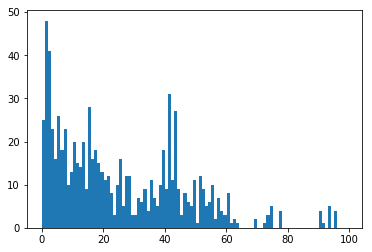

991


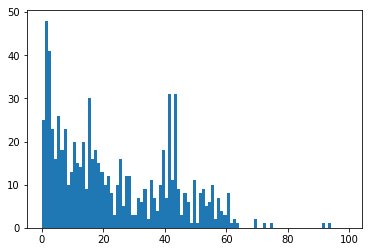

992


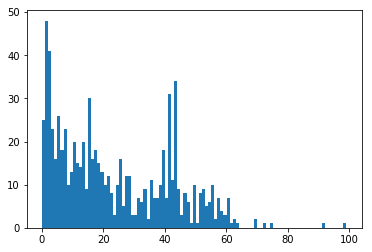

993


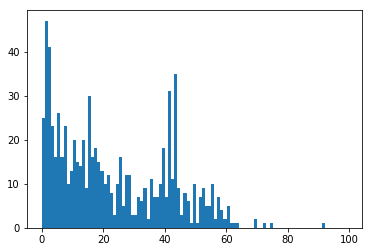

994


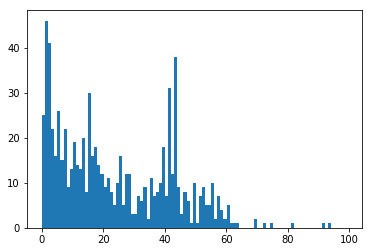

995


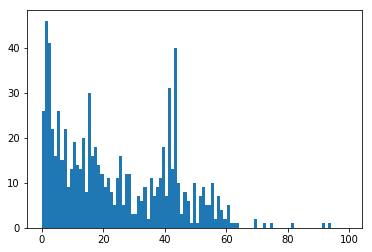

996


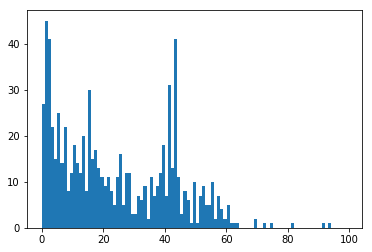

997


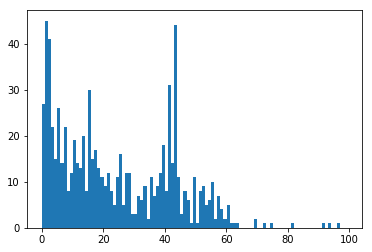

998


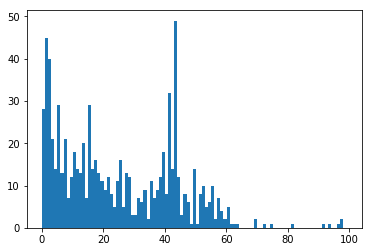

999


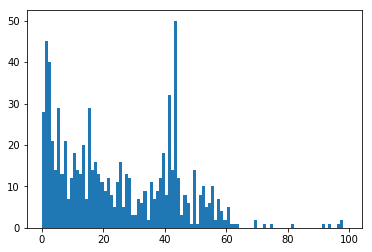

1000


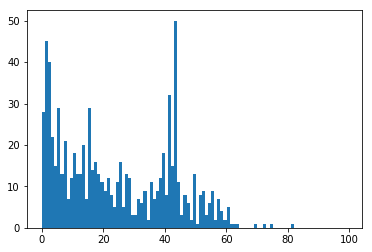

1001


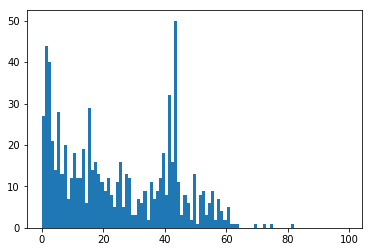

1002


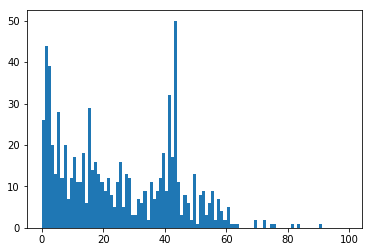

1003


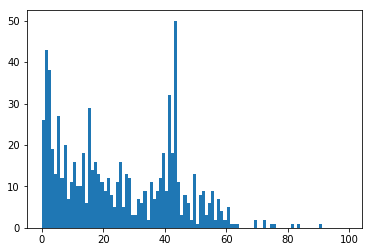

1004


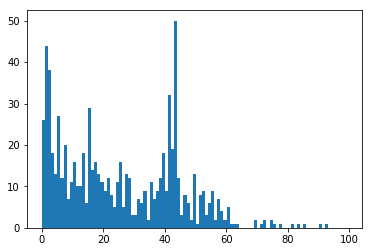

1005


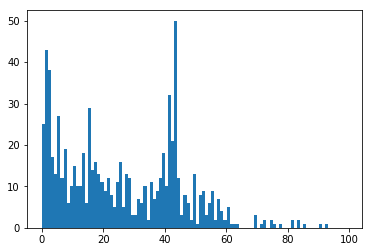

1006


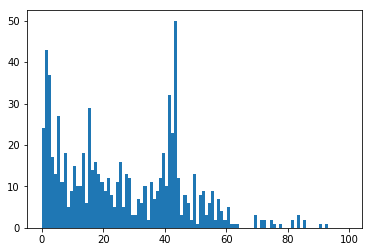

1007


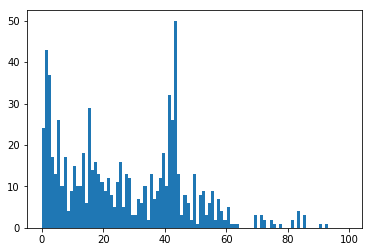

1008


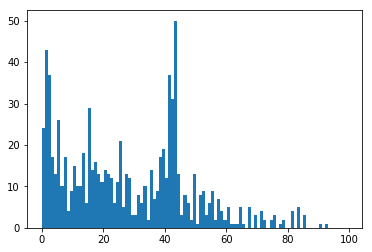

1009


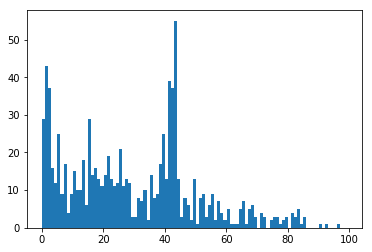

1010


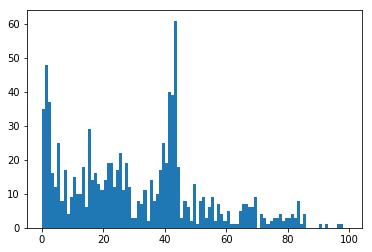

1011


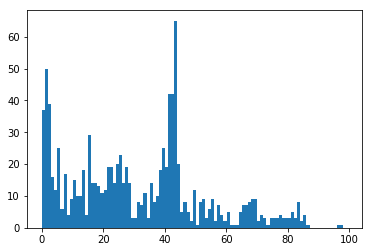

1012


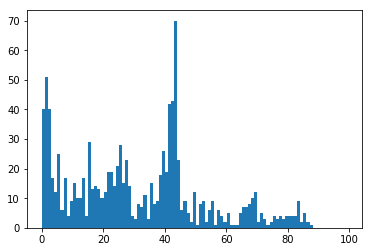

1013


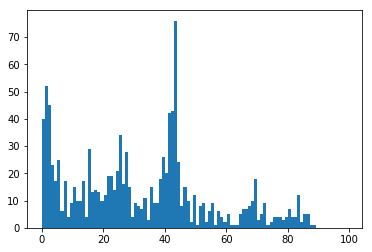

1014


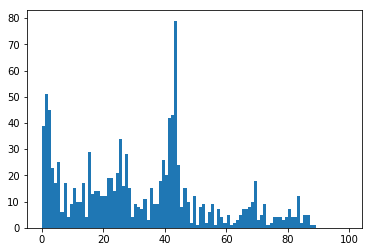

1015


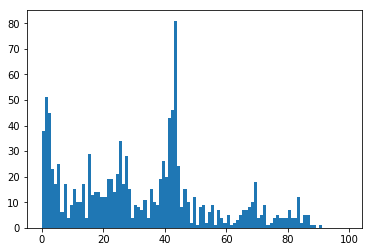

1016


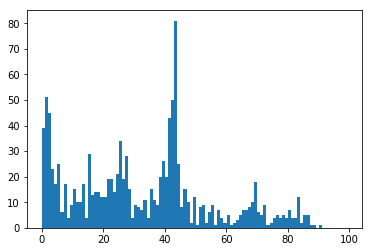

1017


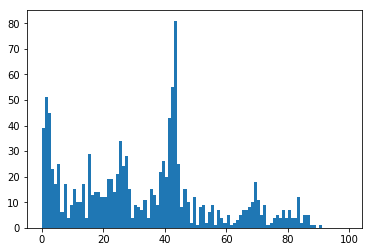

1018


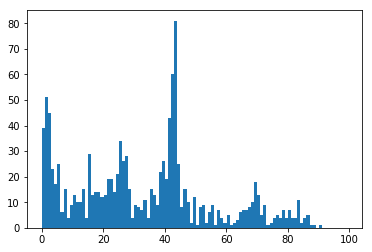

1019


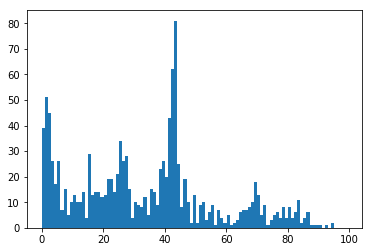

1020


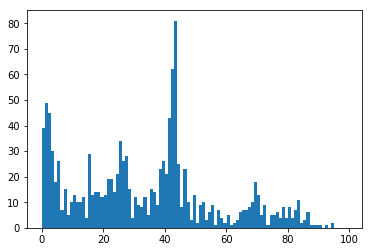

1021


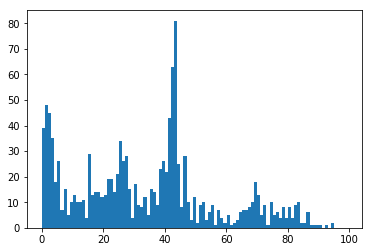

1022


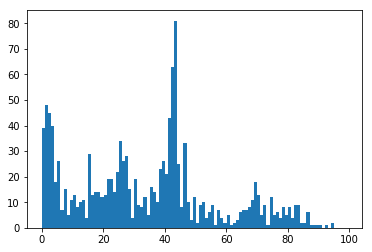

1023


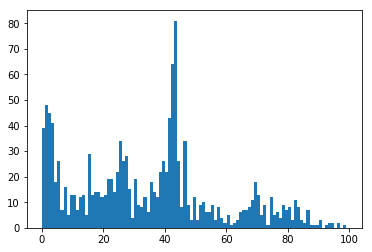

1024


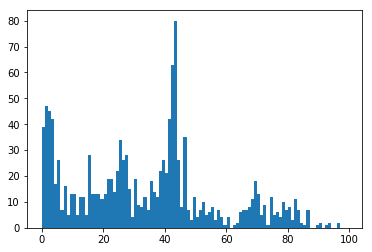

1025


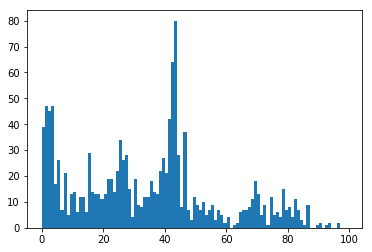

1026


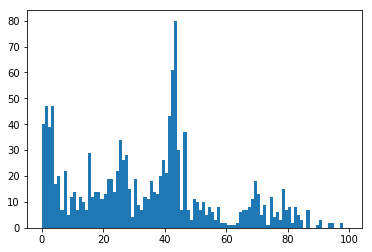

1027


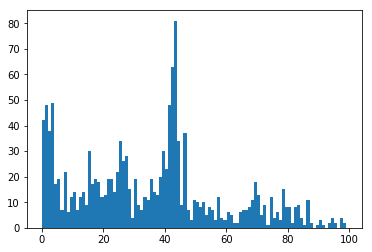

1028


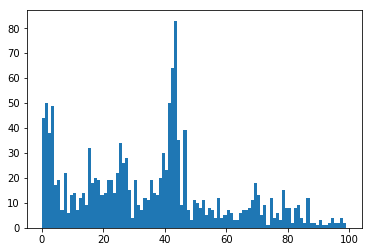

1029


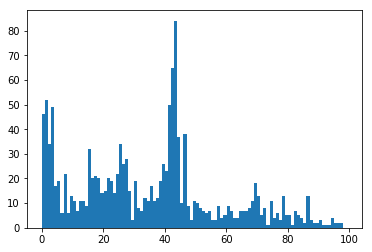

1030


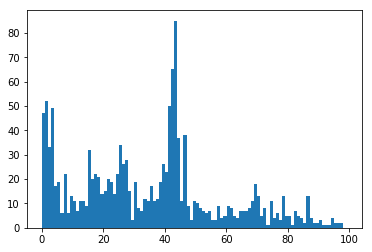

1031


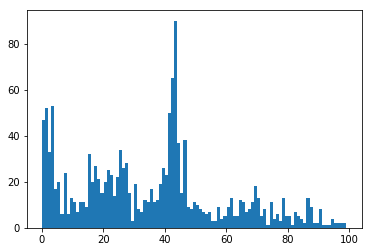

1032


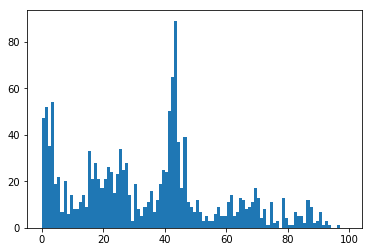

1033


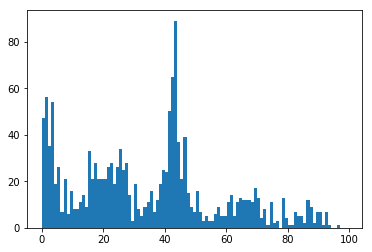

1034


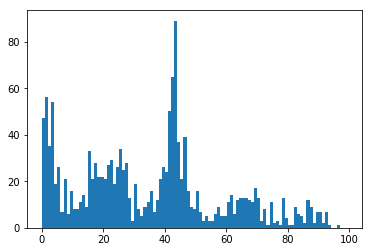

1035


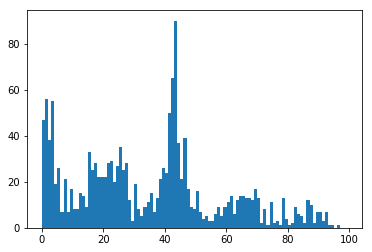

1036


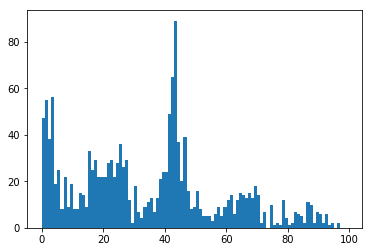

1037


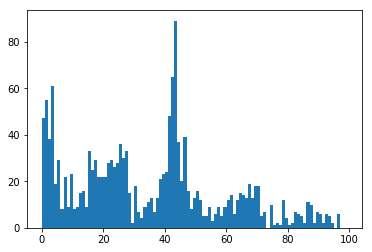

1038


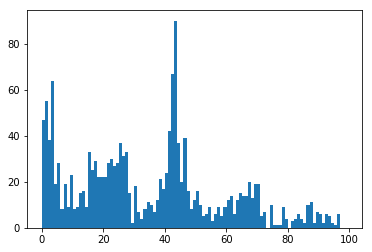

1039


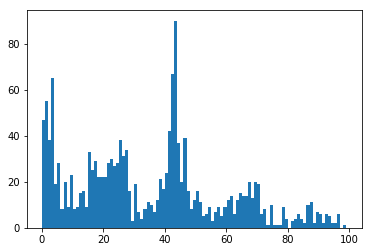

1040


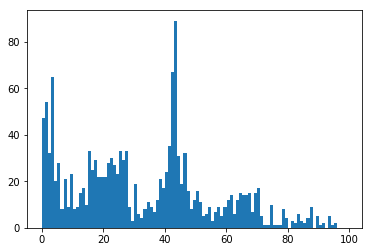

1041


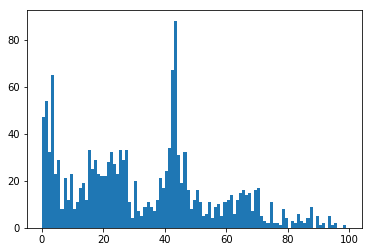

1042


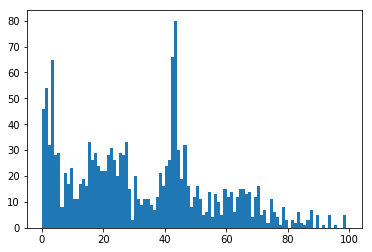

1043


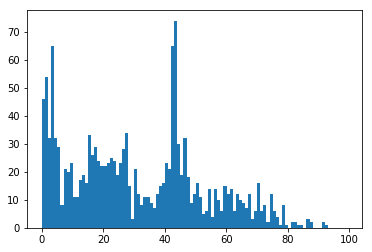

1044


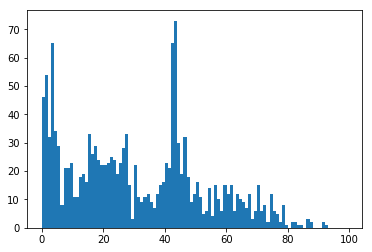

1045


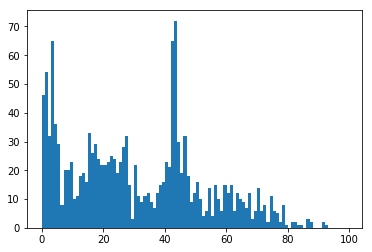

1046


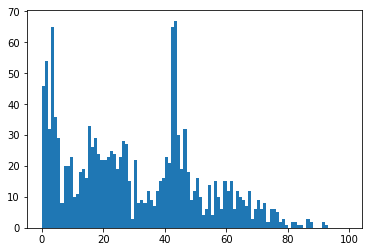

1047


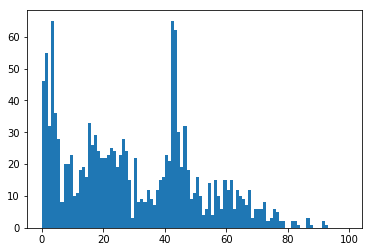

1048


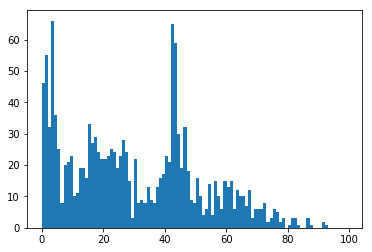

1049


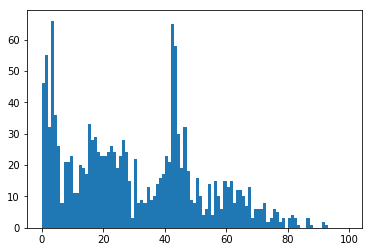

1050


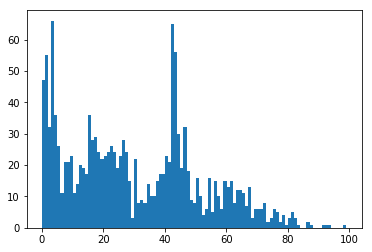

1051


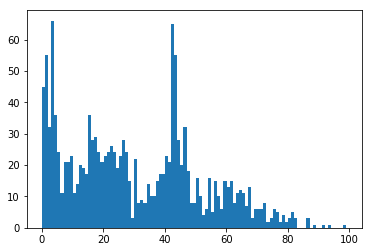

1052


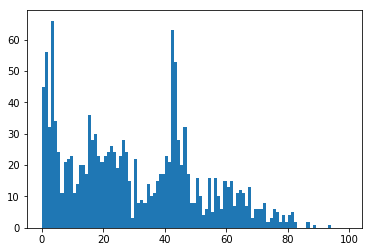

1053


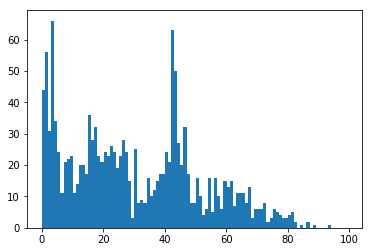

1054


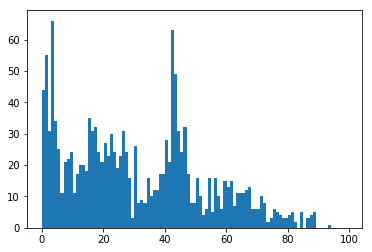

1055


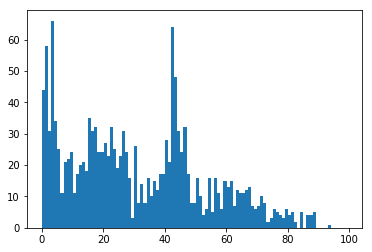

1056


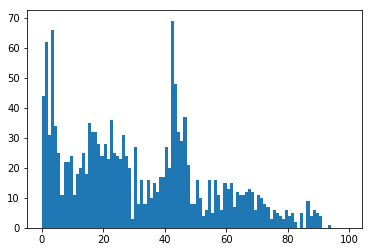

1057


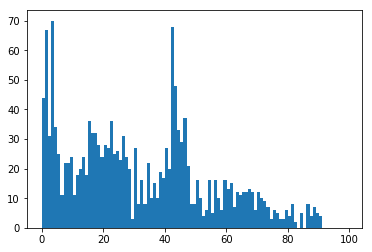

1058


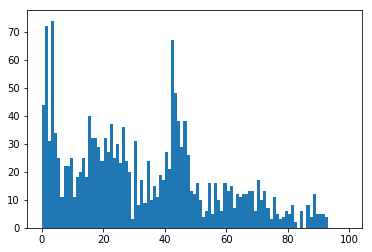

1059


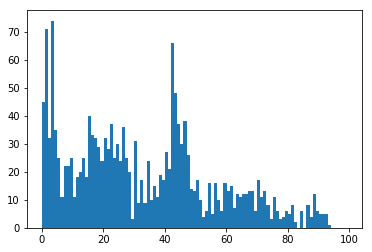

1060


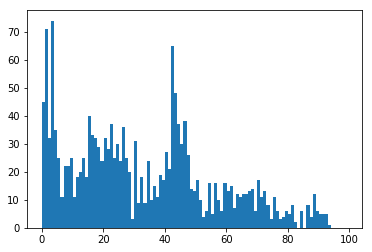

1061


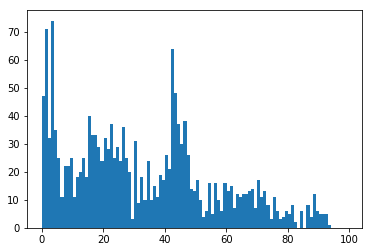

1062


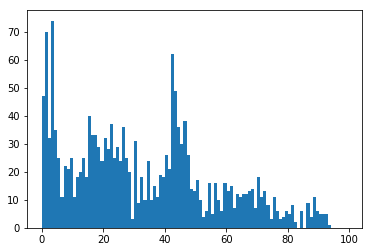

1063


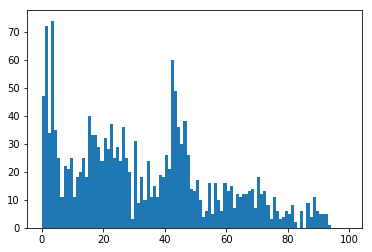

1064


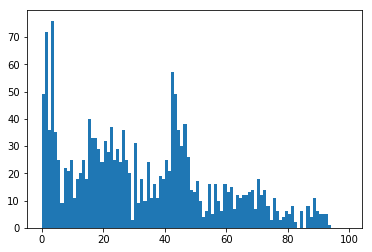

1065


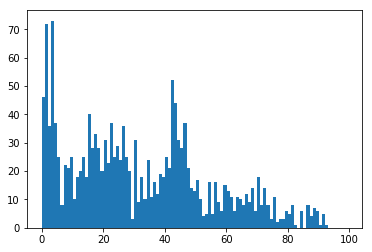

1066


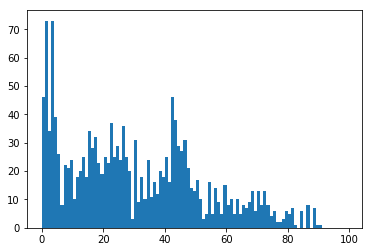

1067


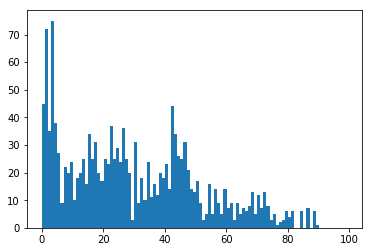

1068


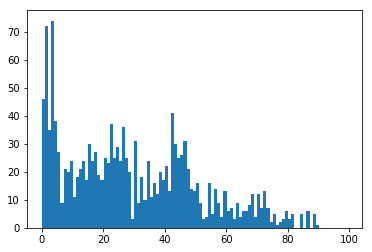

1069


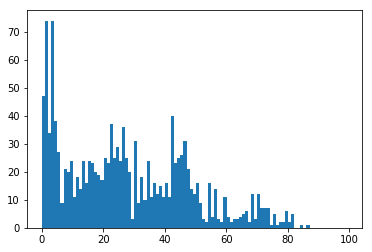

1070


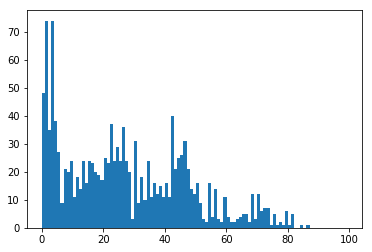

1071


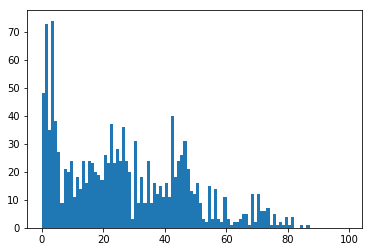

1072


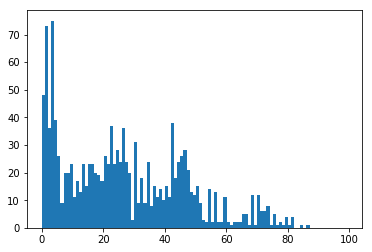

1073


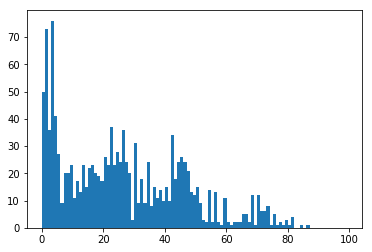

1074


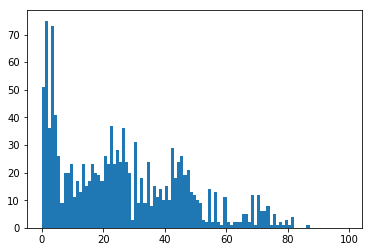

1075


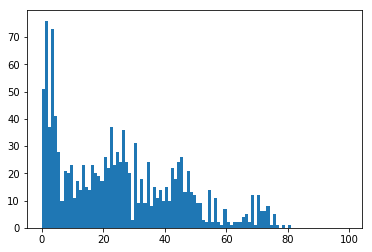

1076


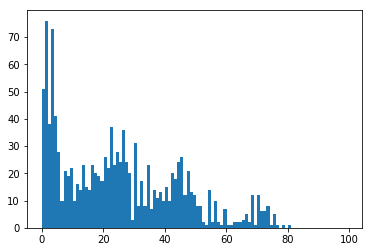

1077


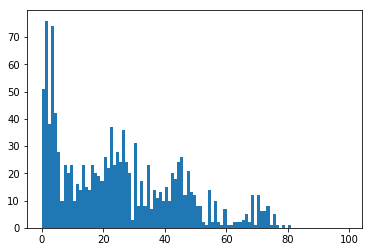

1078


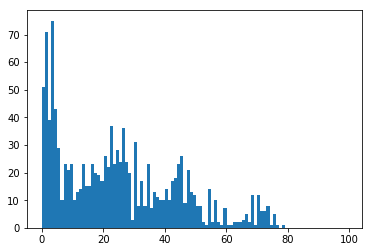

1079


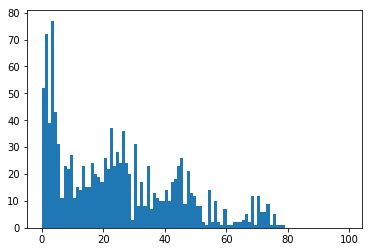

1080


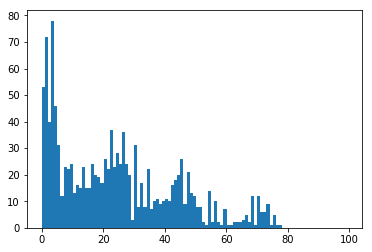

1081


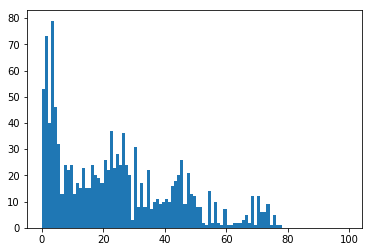

1082


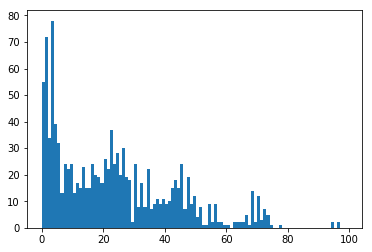

1083


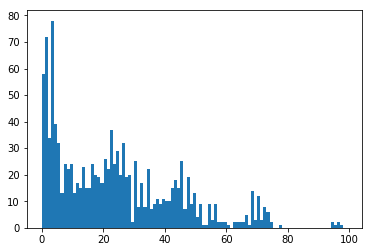

1084


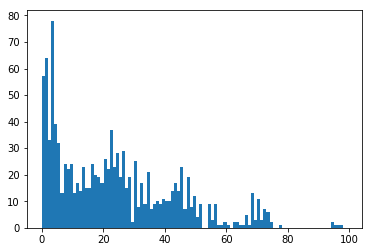

1085


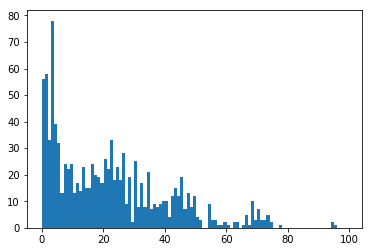

1086


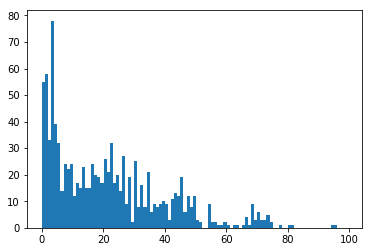

1087


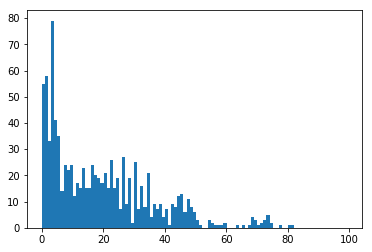

1088


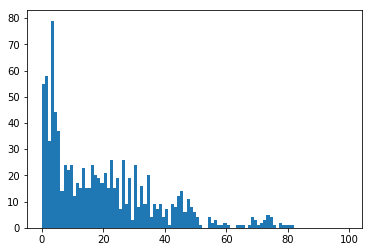

1089


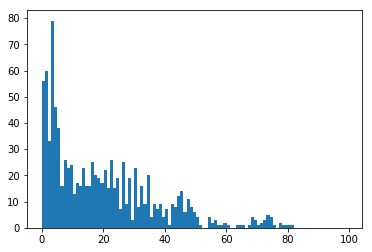

1090


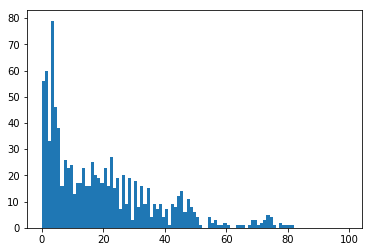

1091


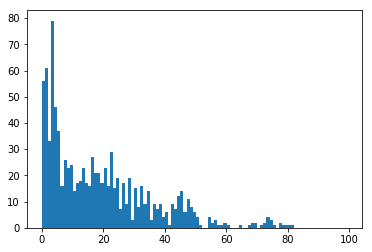

1092


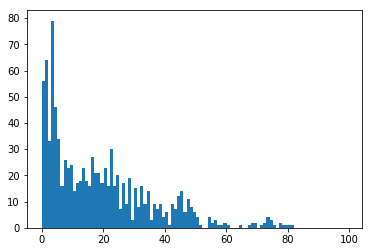

1093


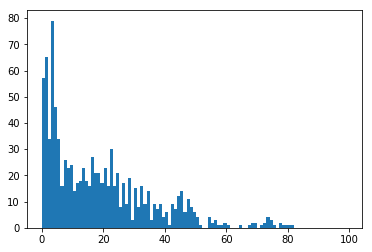

1094


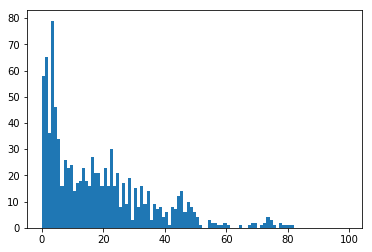

1095


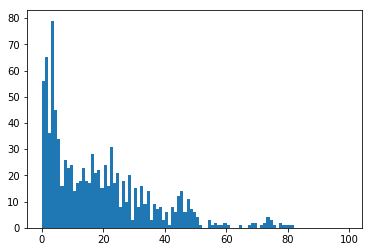

1096


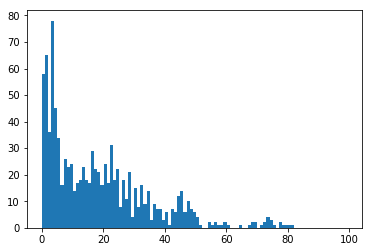

1097


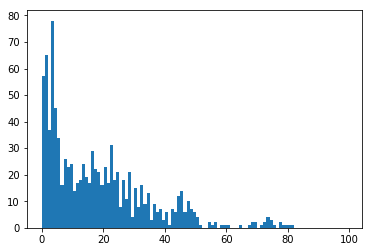

1098


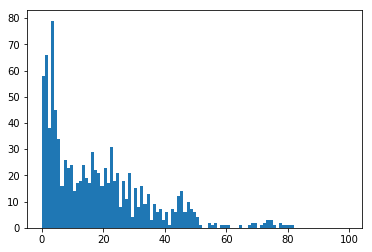

1099


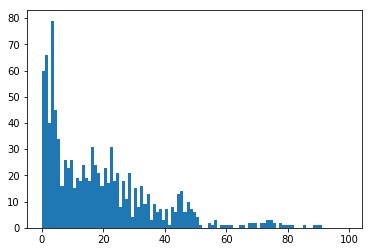

1100


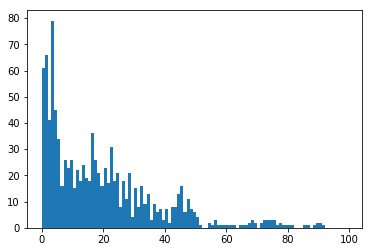

1101


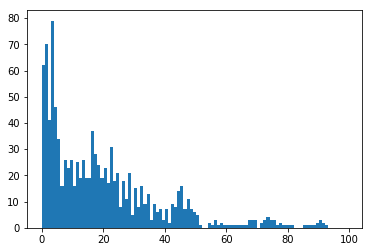

1102


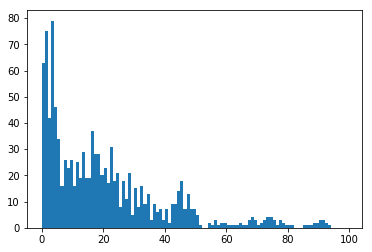

1103


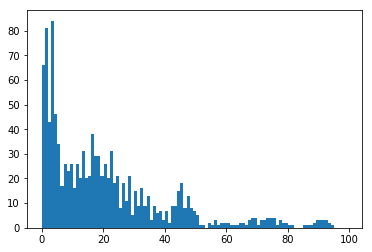

1104


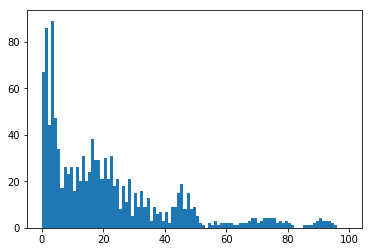

1105


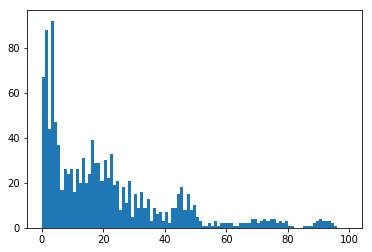

1106


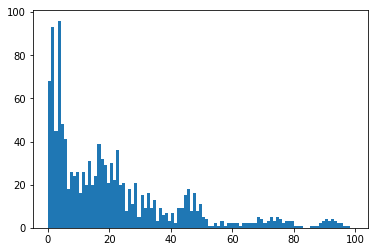

1107


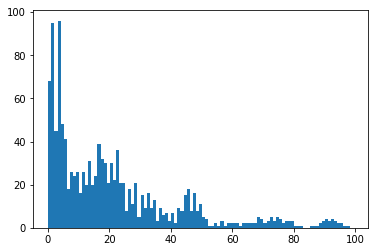

1108


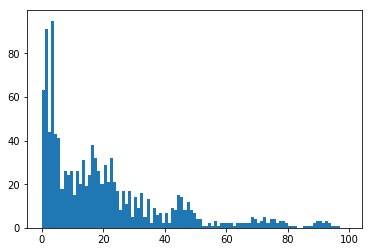

1109


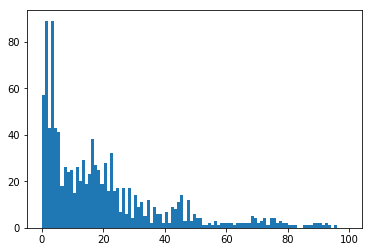

1110


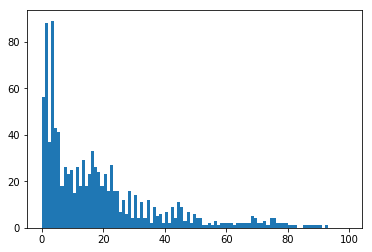

1111


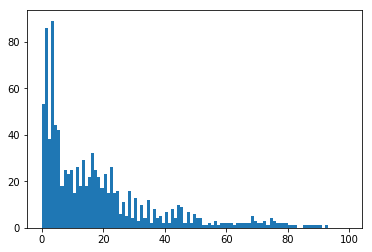

1112


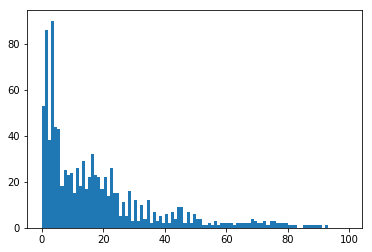

1113


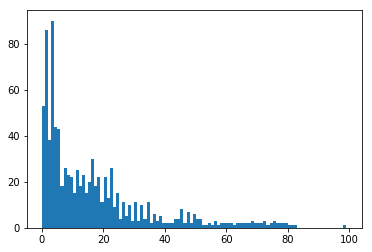

1114


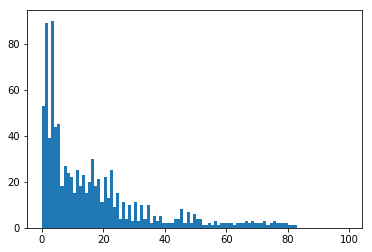

1115


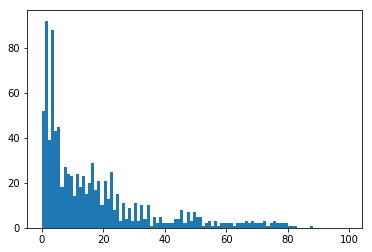

1116


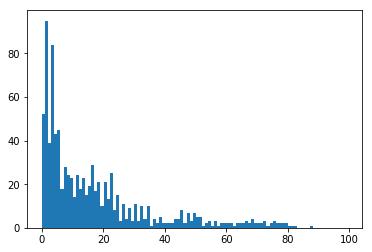

1117


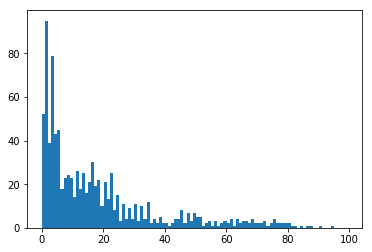

1118


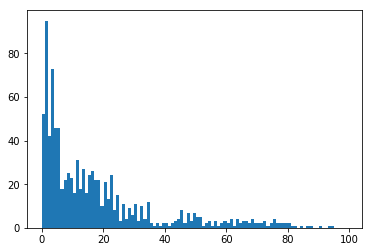

1119


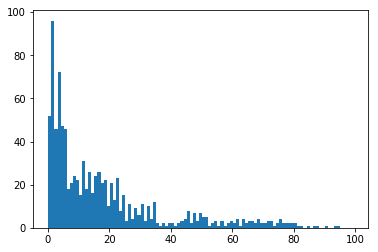

1120


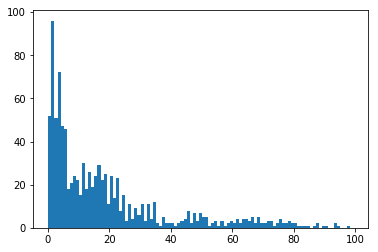

1121


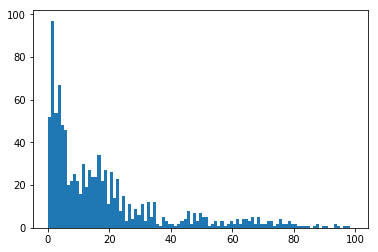

1122


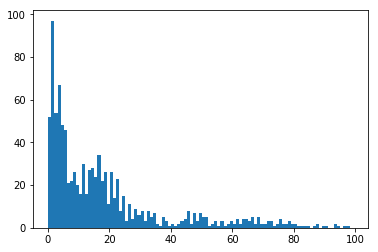

1123


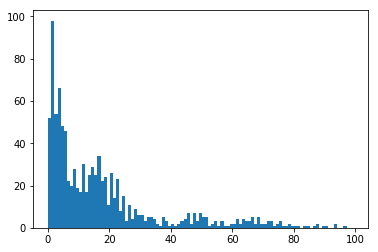

1124


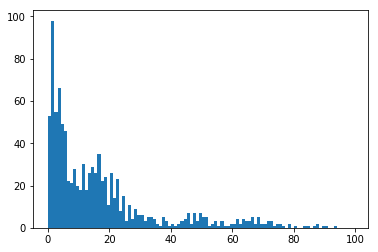

1125


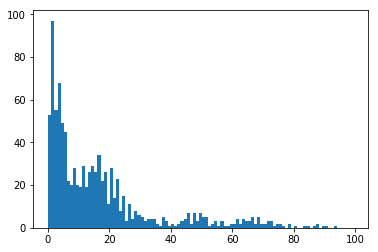

1126


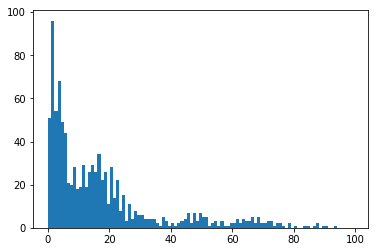

1127


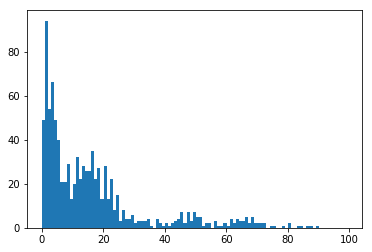

1128


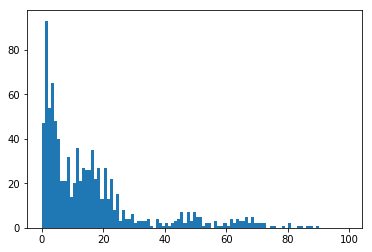

1129


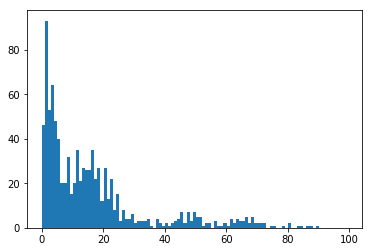

1130


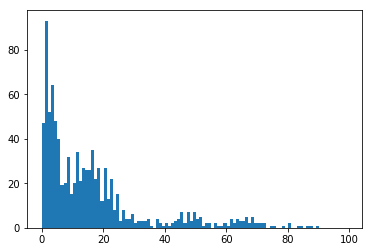

1131


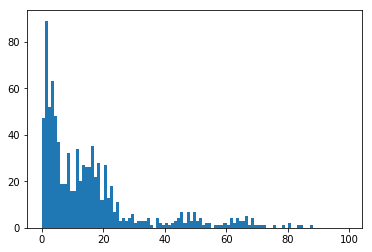

1132


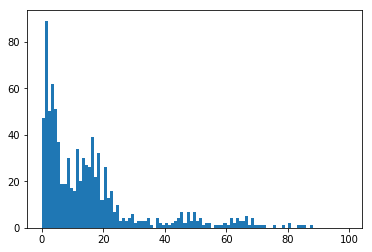

1133


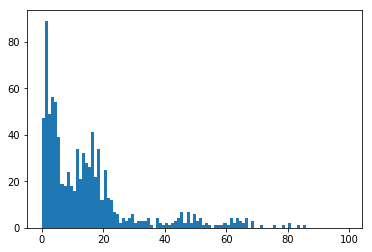

1134


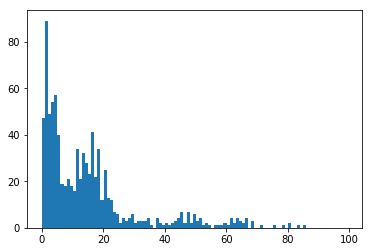

1135


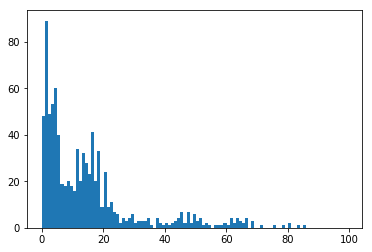

1136


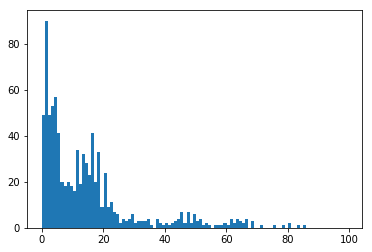

1137


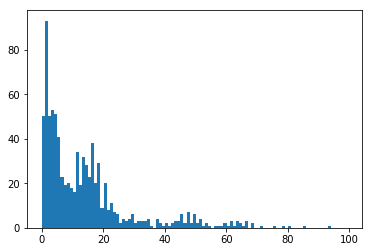

1138


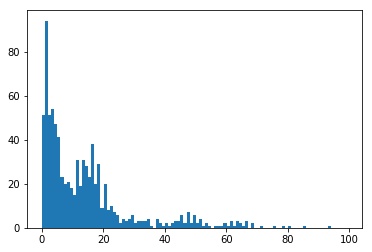

1139


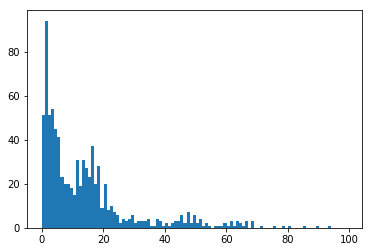

1140


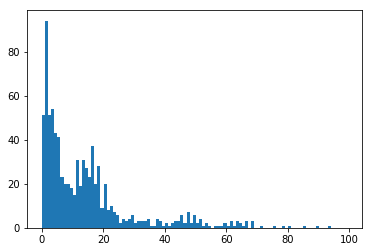

1141


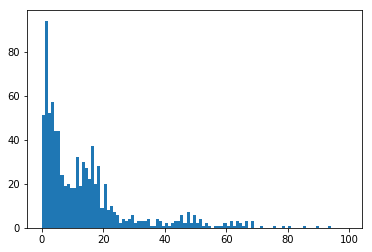

1142


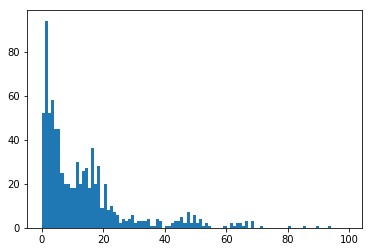

1143


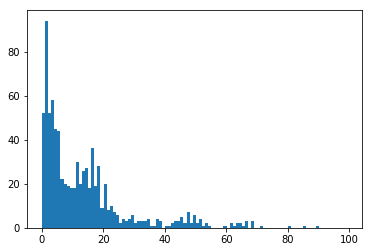

1144


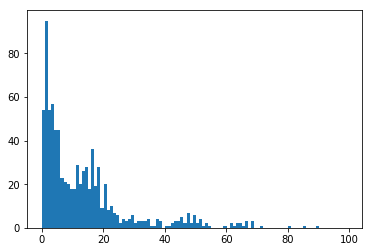

1145


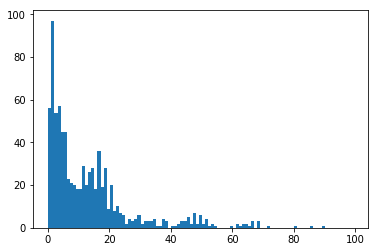

1146


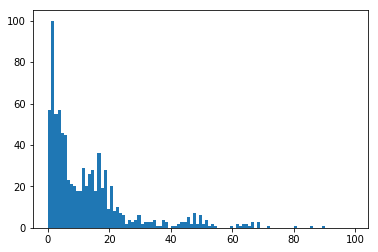

1147


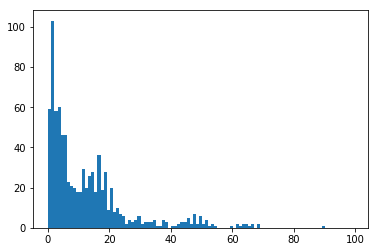

1148


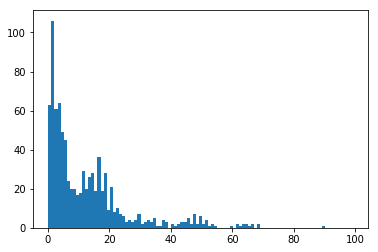

1149


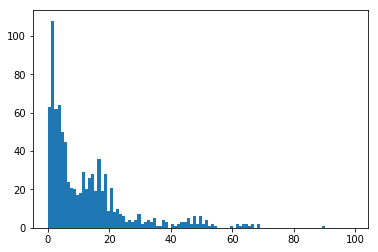

1150


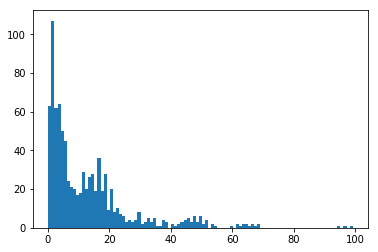

1151


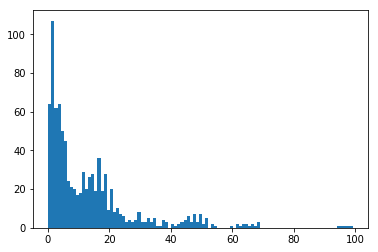

1152


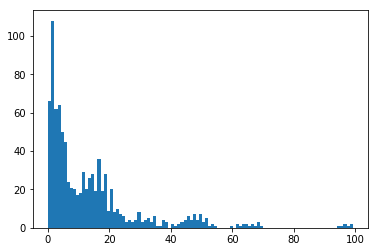

1153


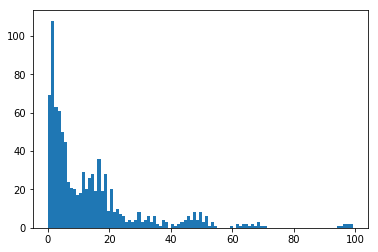

1154


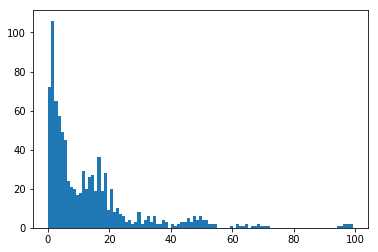

1155


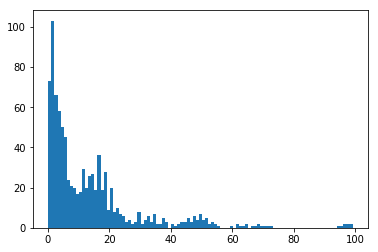

1156


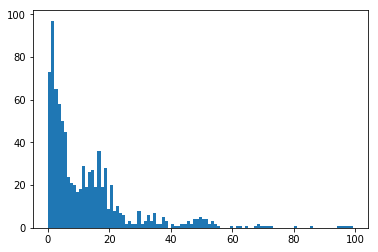

1157


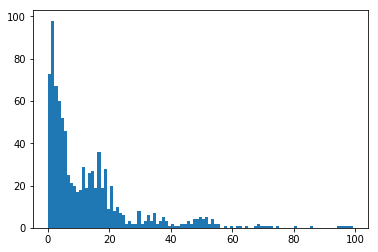

1158


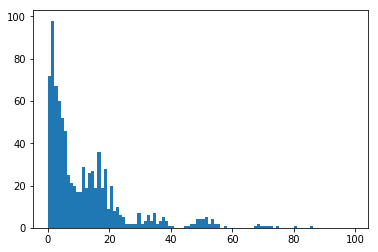

1159


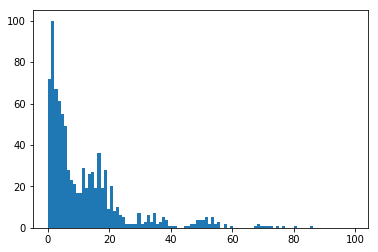

1160


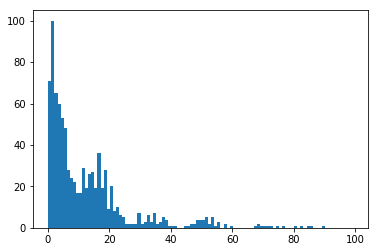

1161


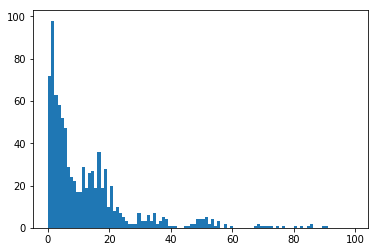

1162


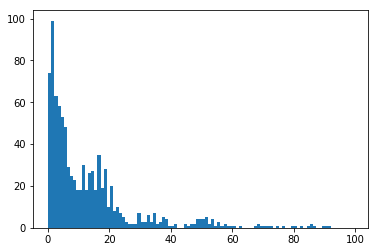

1163


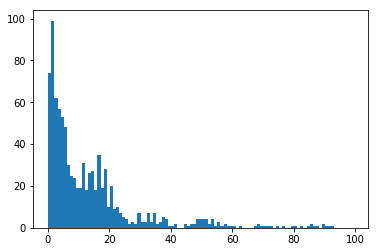

1164


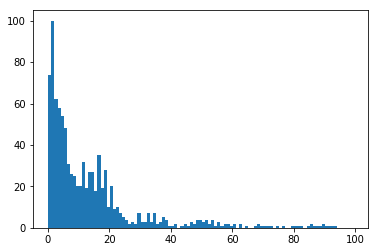

1165


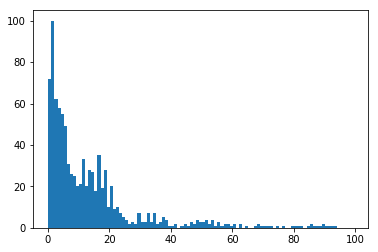

1166


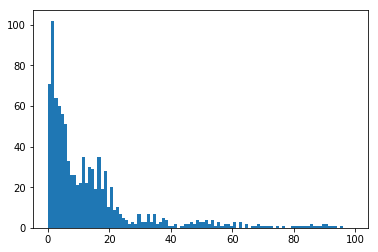

1167


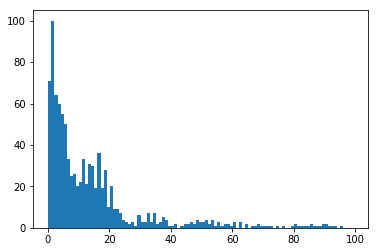

1168


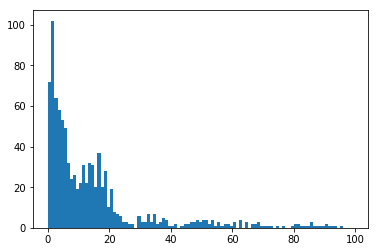

1169


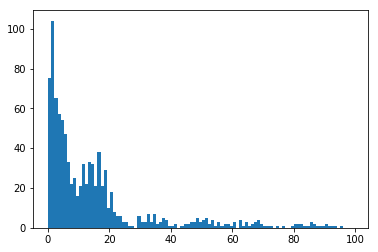

1170


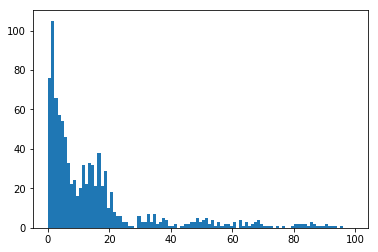

1171


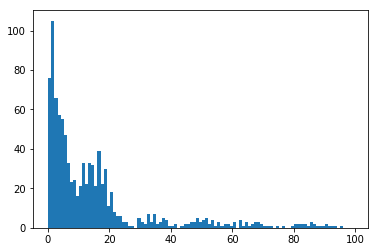

1172


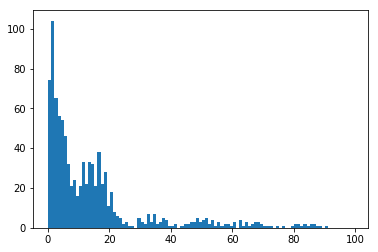

1173


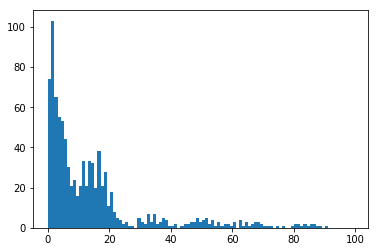

1174


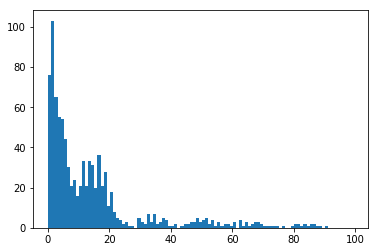

1175


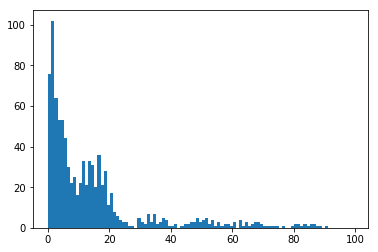

1176


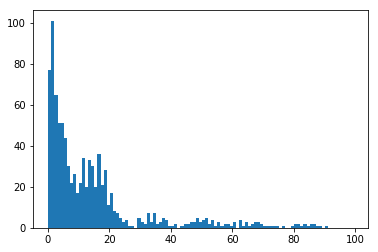

1177


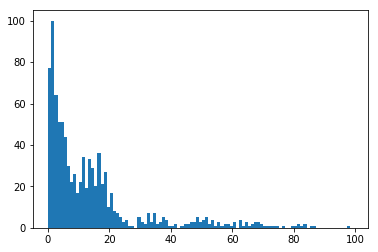

1178


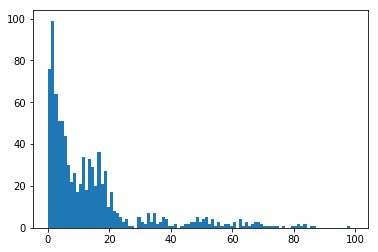

1179


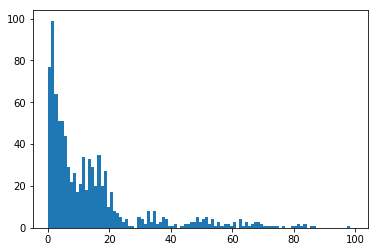

1180


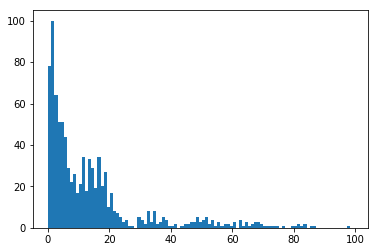

1181


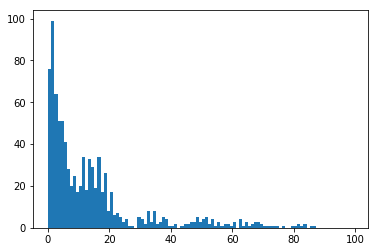

1182


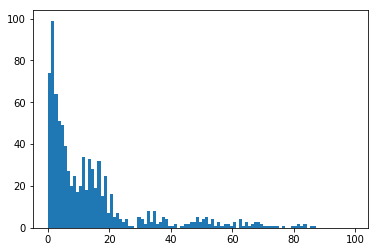

1183


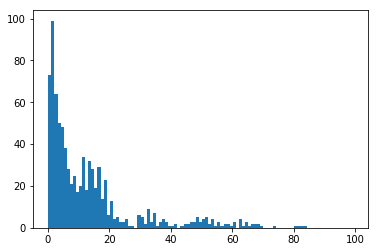

1184


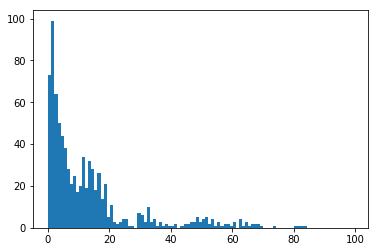

1185


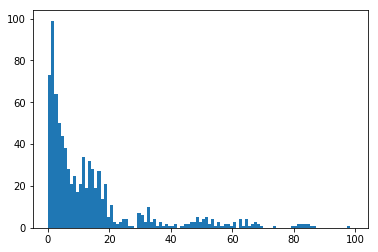

1186


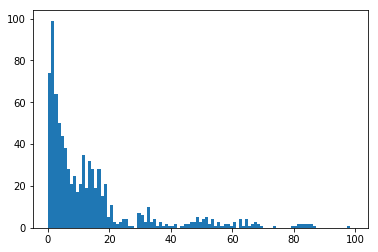

1187


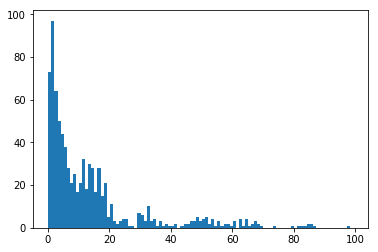

1188


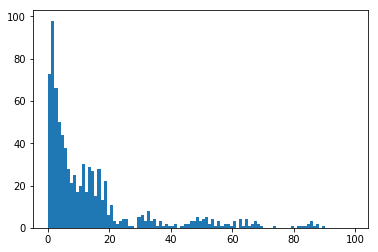

1189


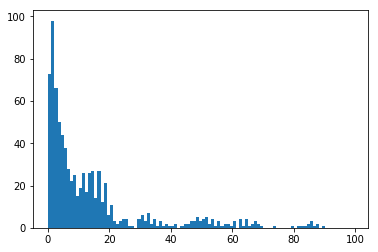

1190


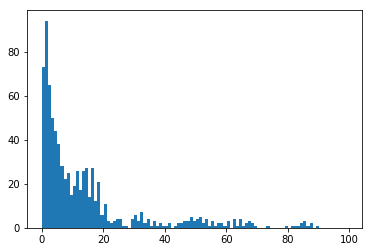

1191


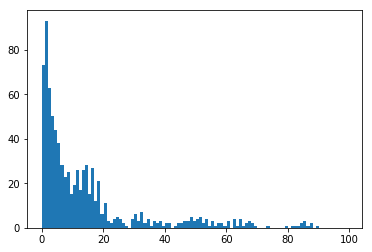

1192


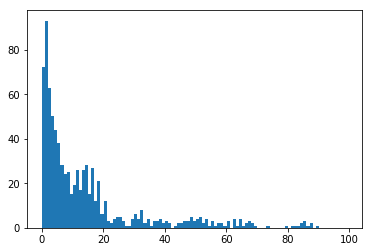

1193


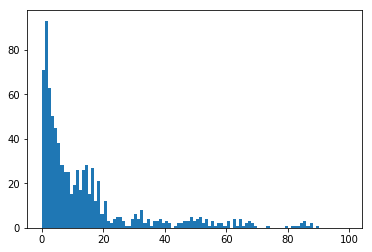

1194


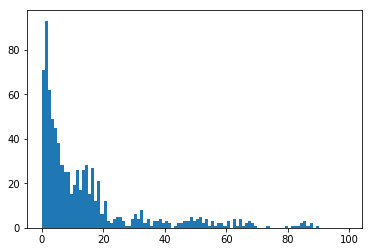

1195


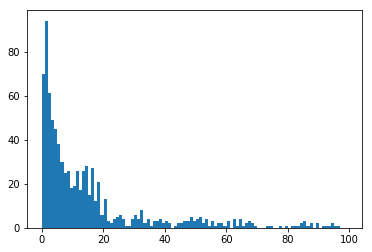

1196


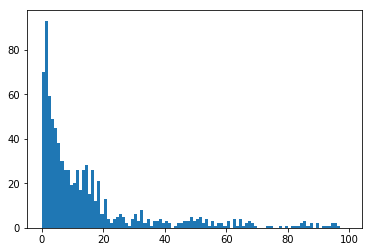

1197


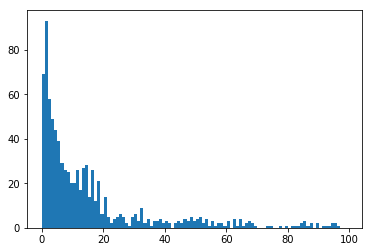

1198


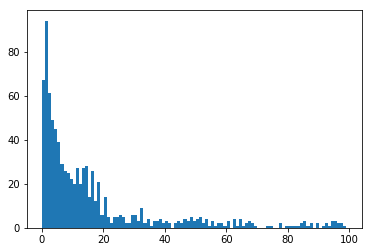

1199


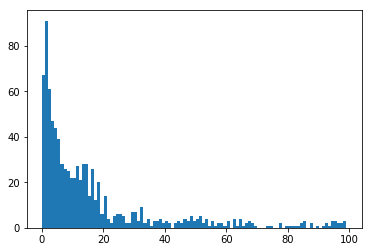

1200


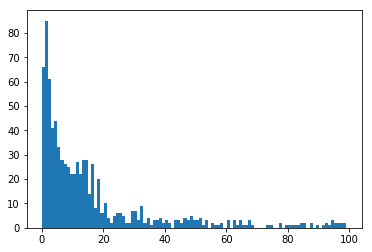

1201


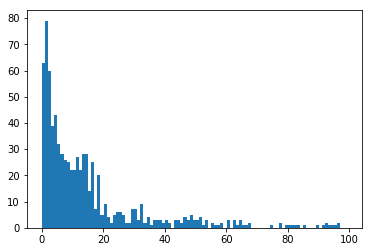

1202


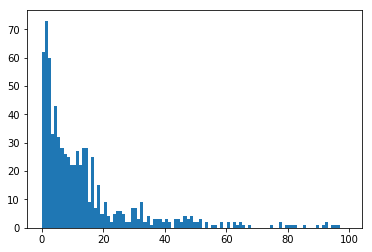

1203


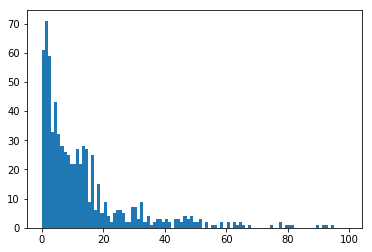

1204


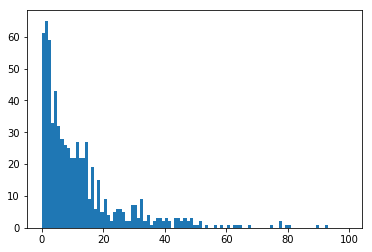

1205


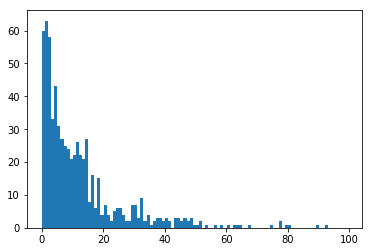

1206


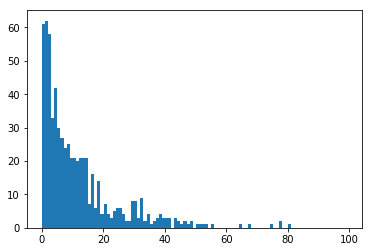

1207


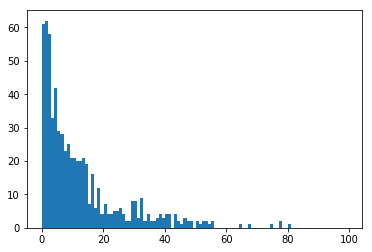

1208


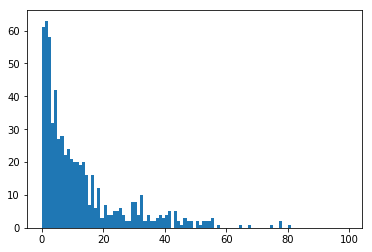

1209


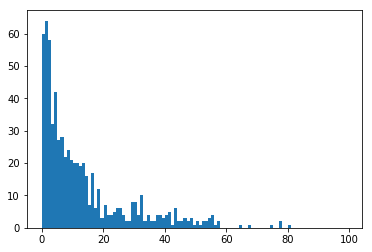

1210


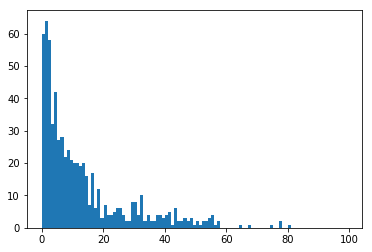

1211


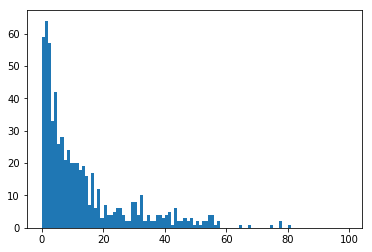

1212


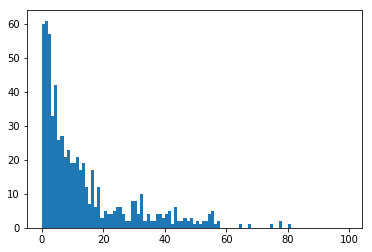

1213


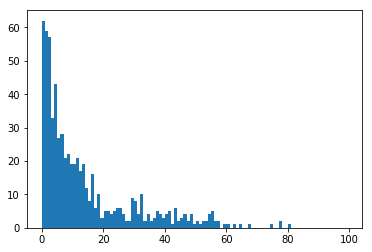

1214


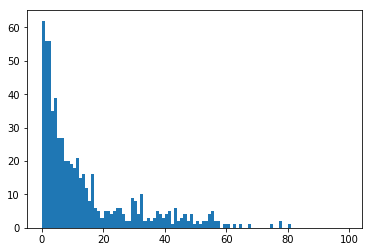

1215


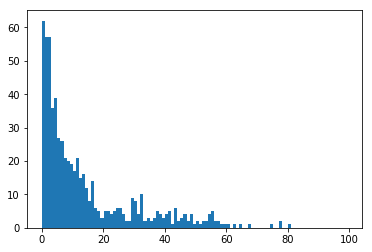

1216


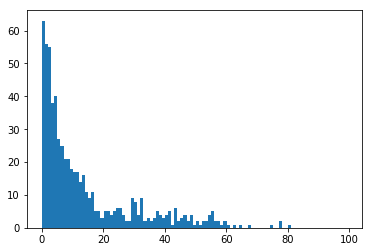

1217


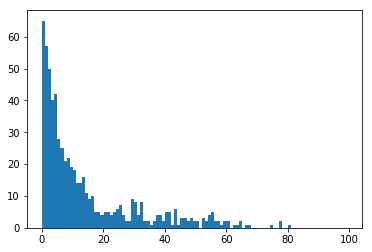

1218


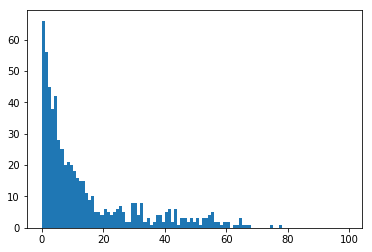

1219


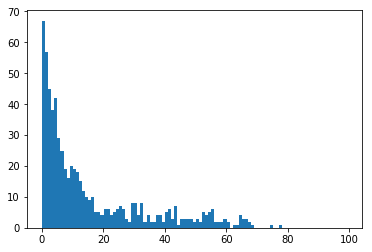

1220


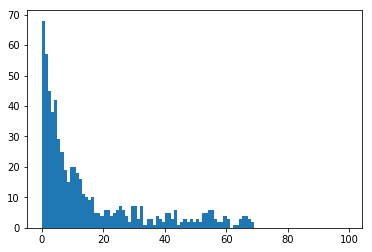

1221


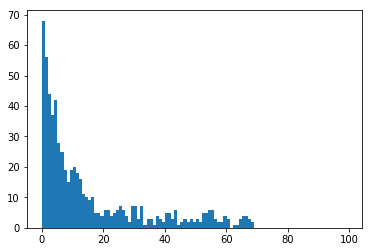

1222


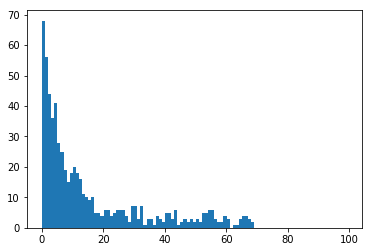

1223


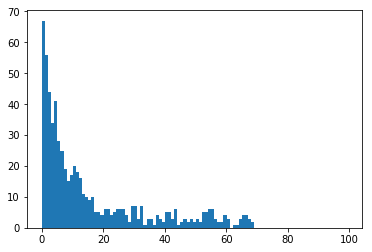

1224


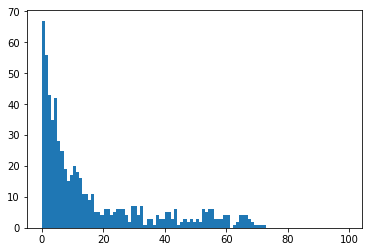

1225


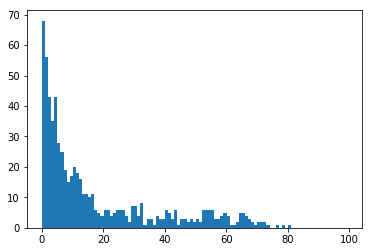

1226


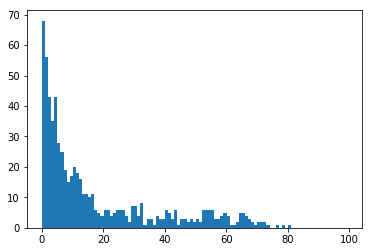

1227


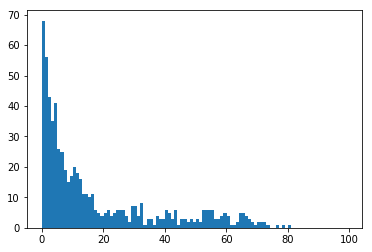

1228


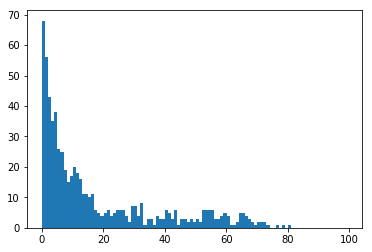

1229


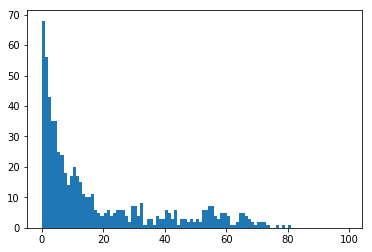

1230


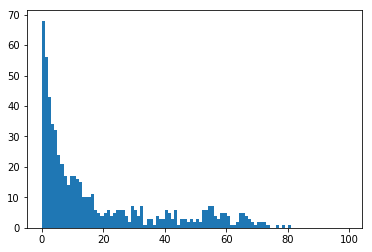

1231


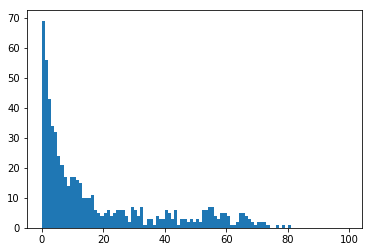

1232


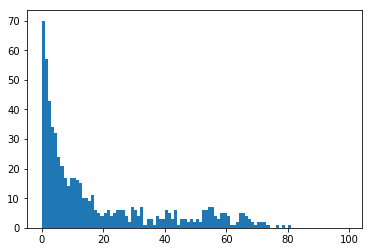

1233


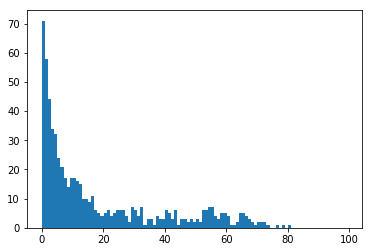

1234


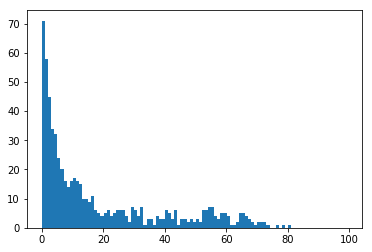

1235


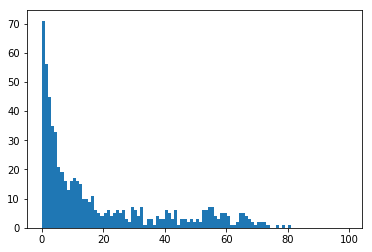

1236


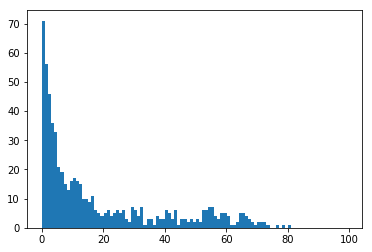

1237


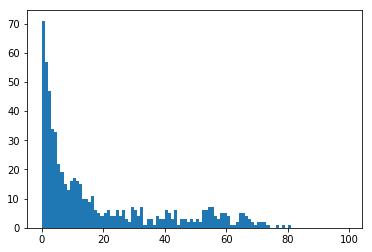

1238


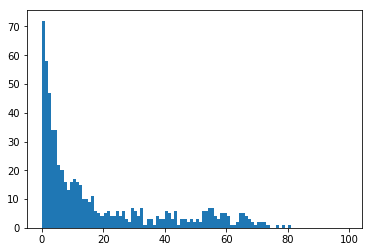

1239


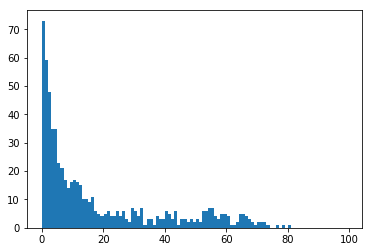

1240


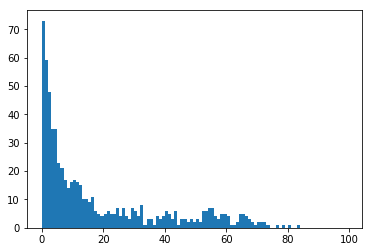

1241


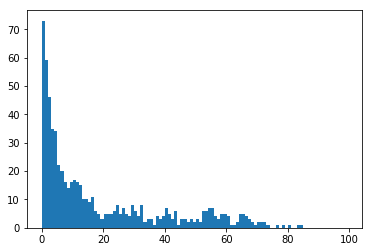

1242


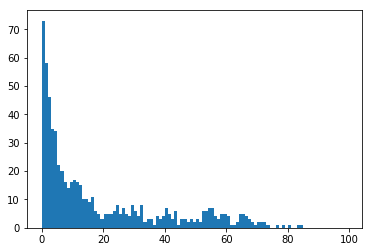

1243


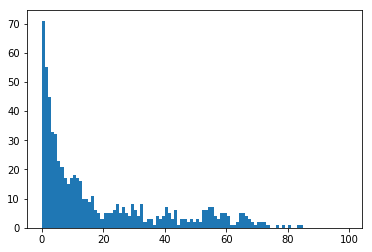

1244


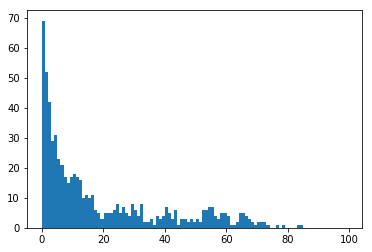

1245


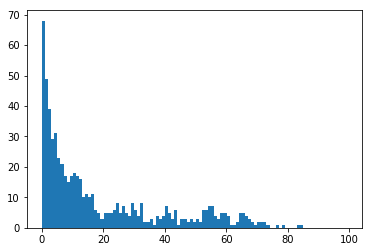

1246


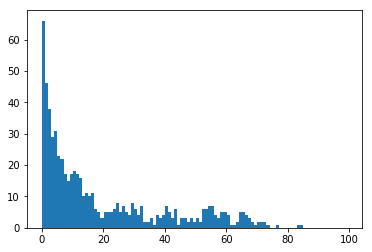

1247


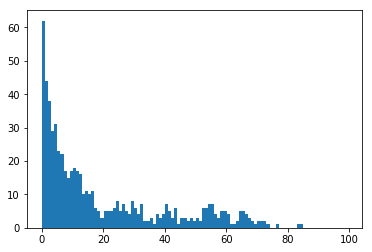

1248


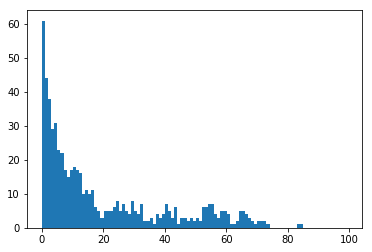

1249


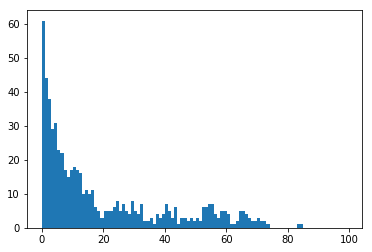

1250


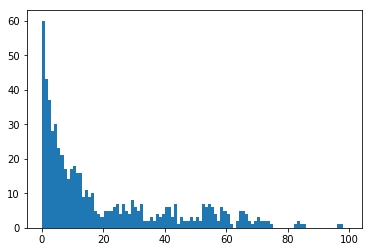

1251


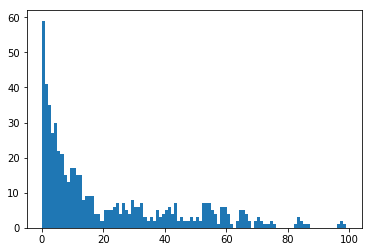

1252


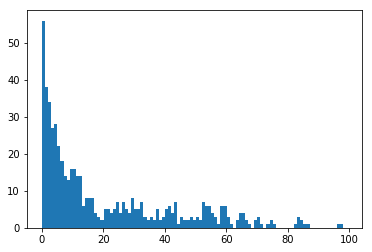

1253


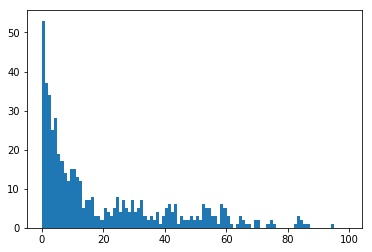

1254


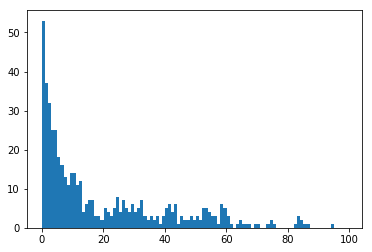

1255


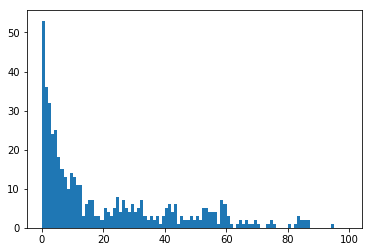

1256


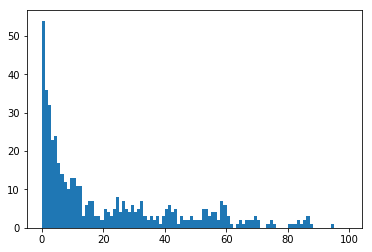

1257


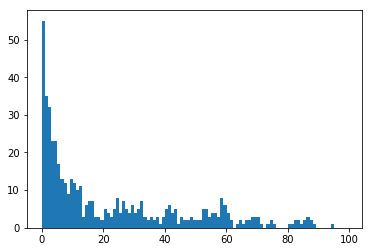

1258


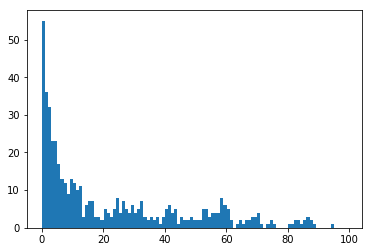

1259


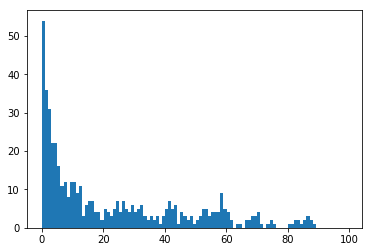

1260


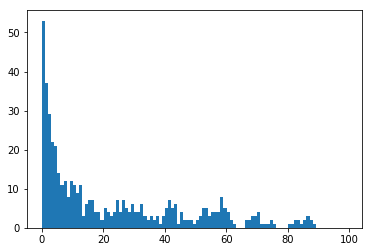

1261


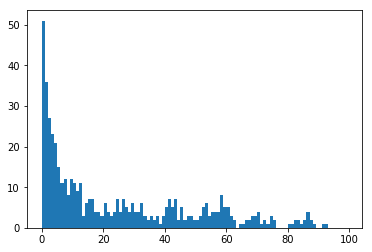

1262


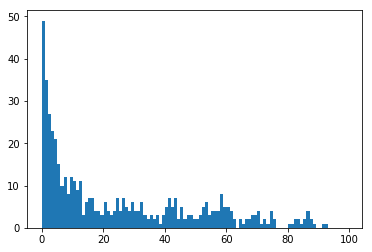

1263


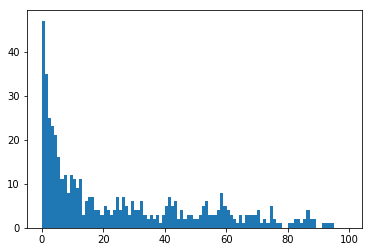

1264


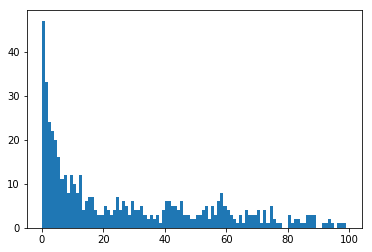

1265


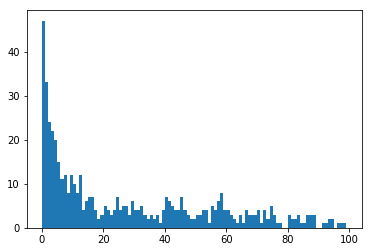

1266


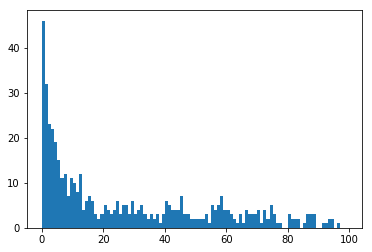

1267


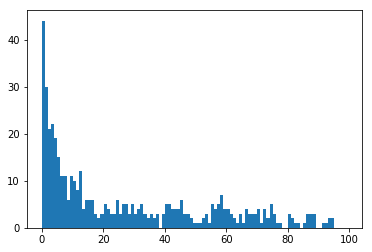

1268


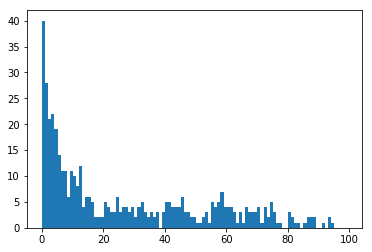

1269


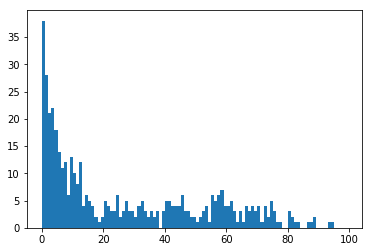

1270


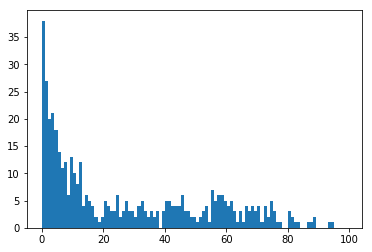

1271


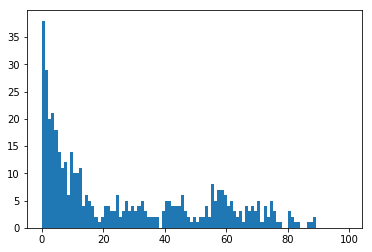

1272


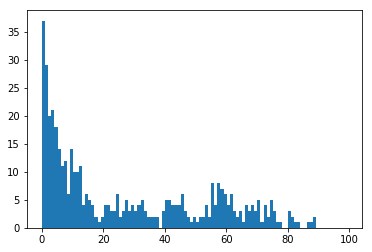

1273


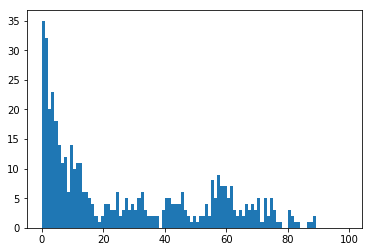

1274


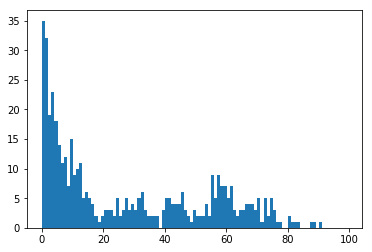

1275


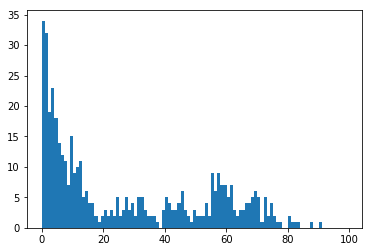

1276


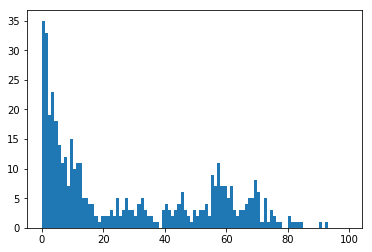

1277


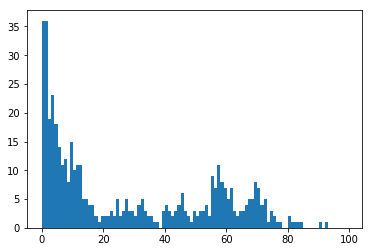

1278


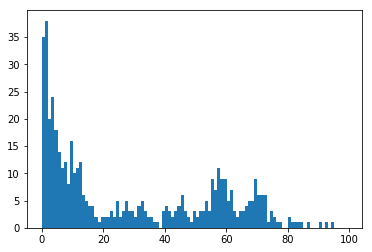

1279


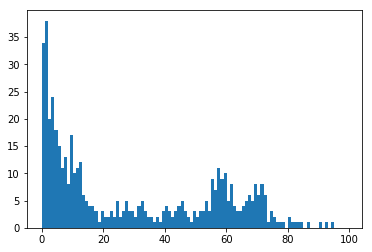

1280


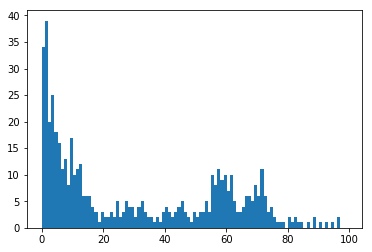

1281


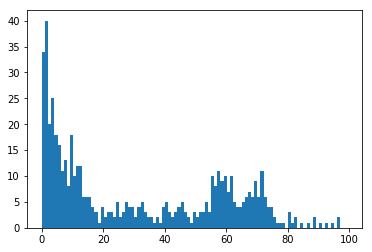

1282


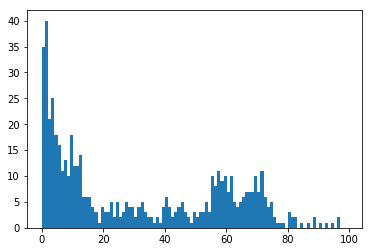

1283


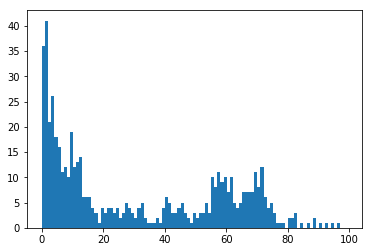

1284


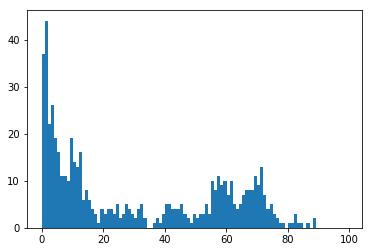

1285


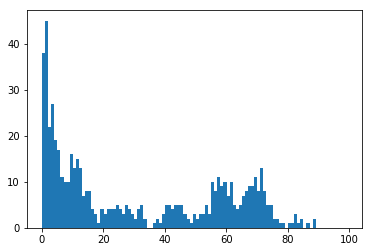

1286


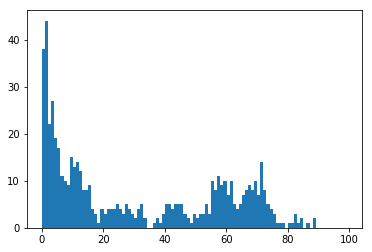

1287


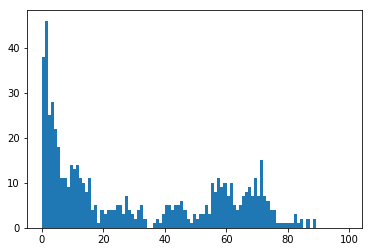

1288


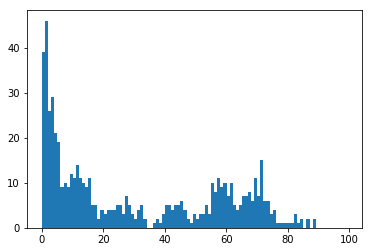

1289


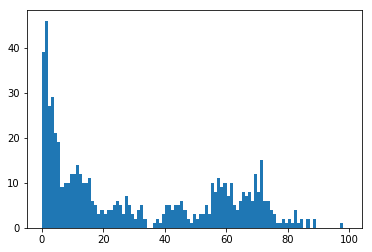

1290


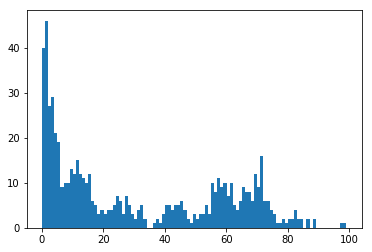

1291


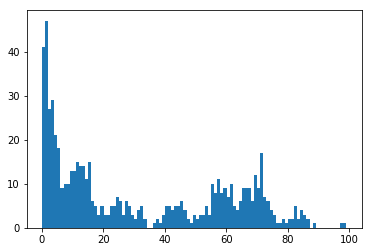

1292


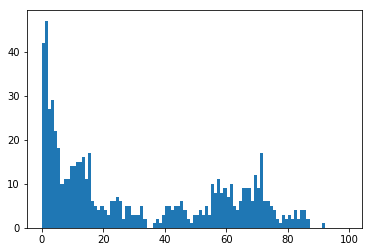

1293


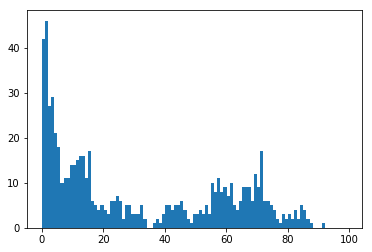

1294


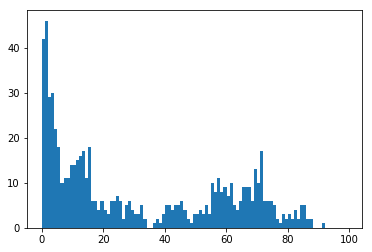

1295


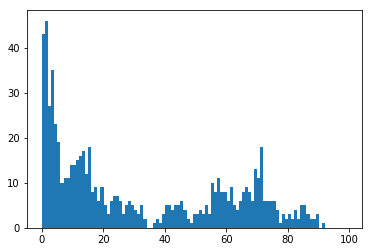

1296


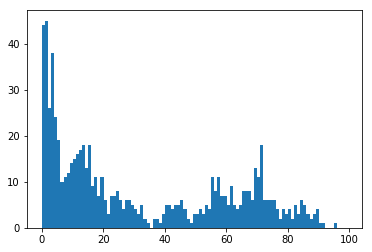

1297


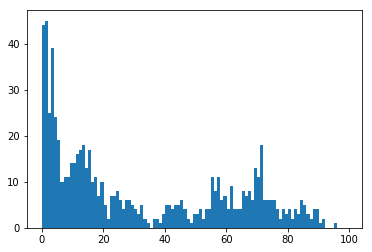

1298


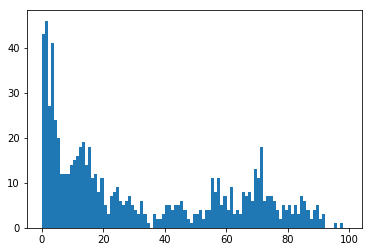

1299


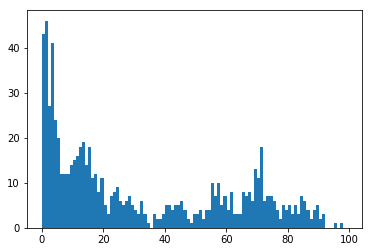

1300


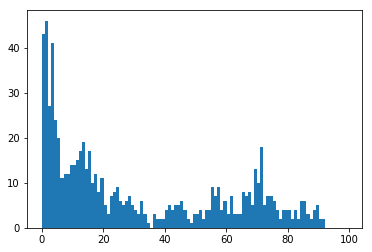

1301


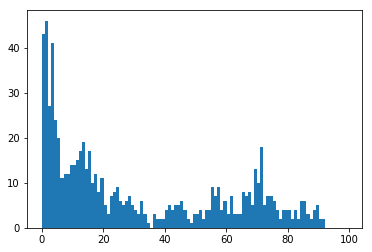

1302


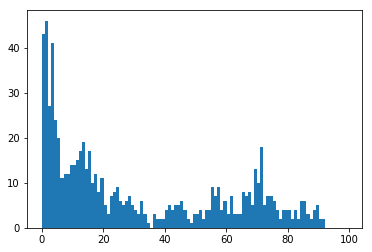

1303


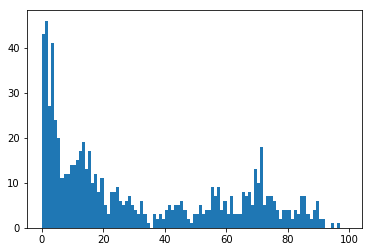

1304


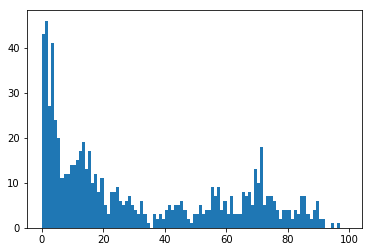

1305


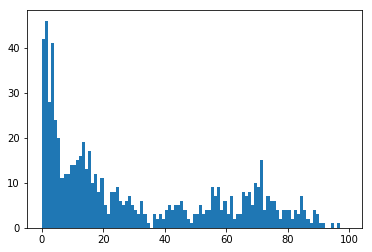

1306


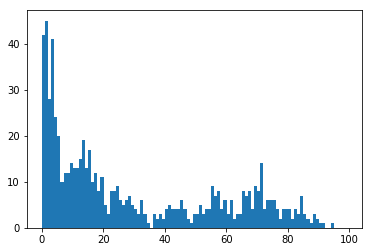

1307


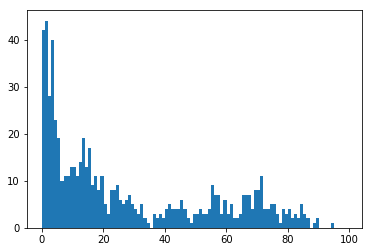

1308


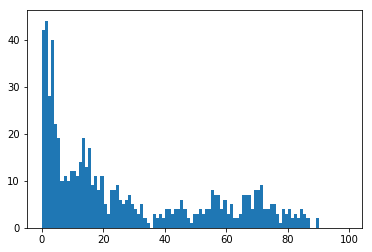

1309


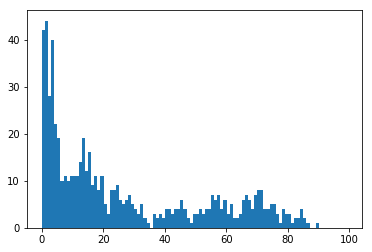

1310


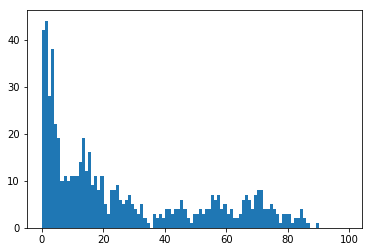

1311


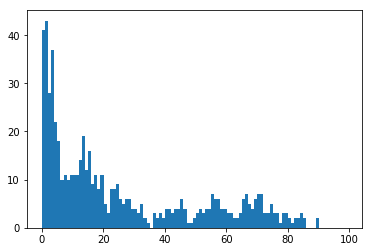

1312


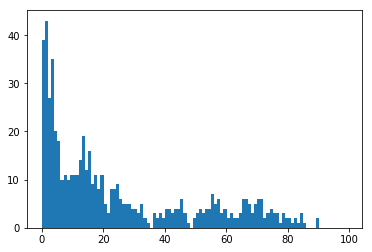

1313


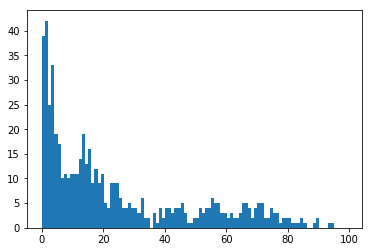

1314


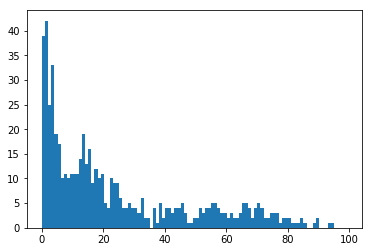

1315


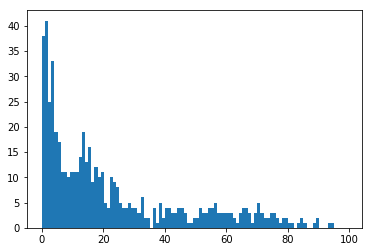

1316


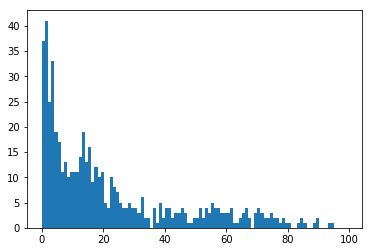

1317


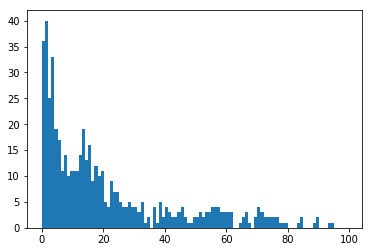

1318


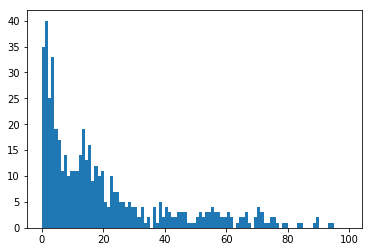

1319


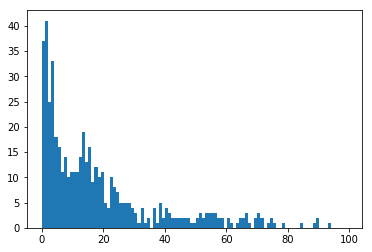

1320


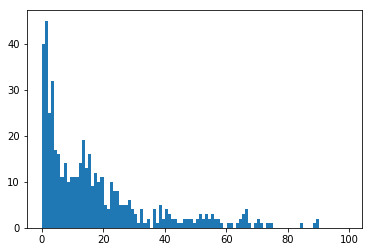

1321


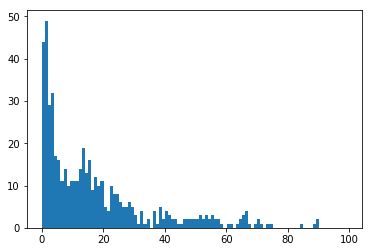

1322


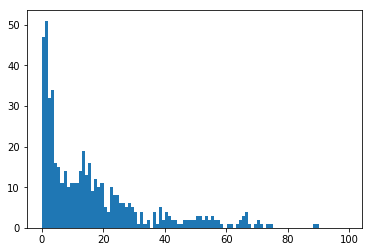

1323


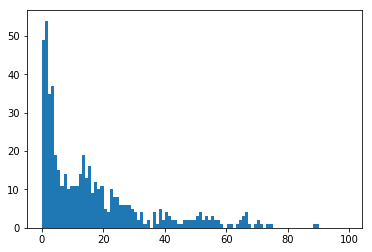

1324


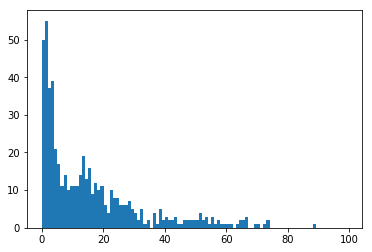

1325


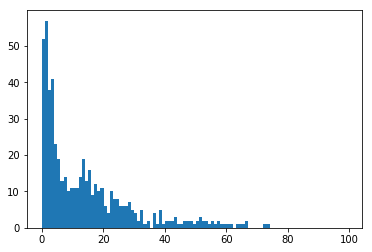

1326


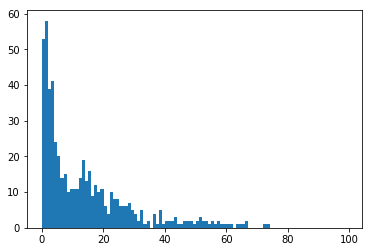

1327


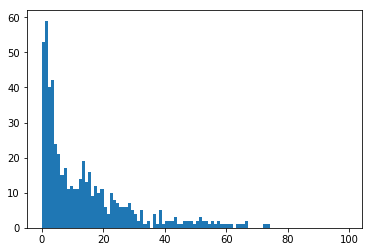

1328


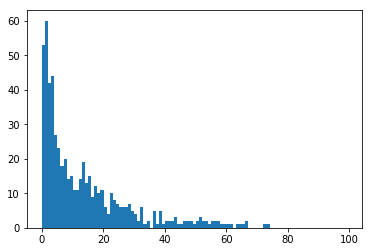

1329


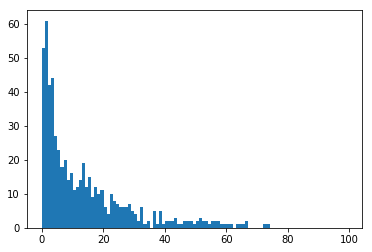

1330


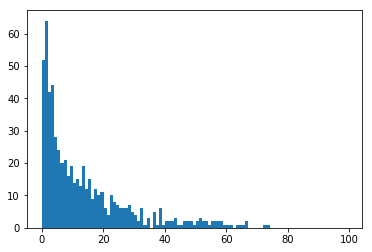

1331


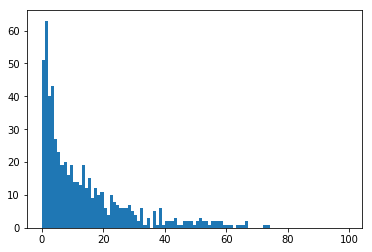

1332


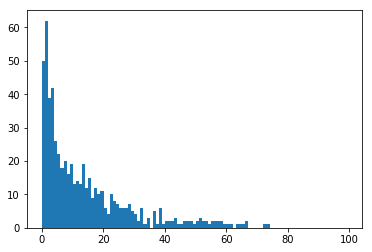

1333


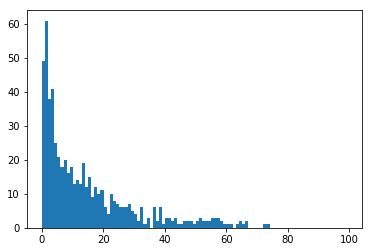

1334


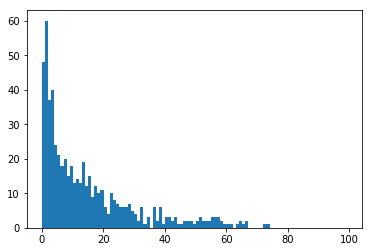

1335


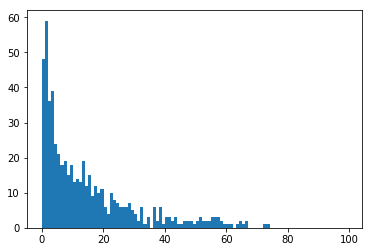

1336


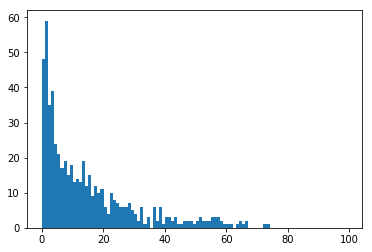

1337


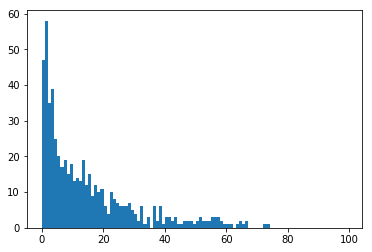

1338


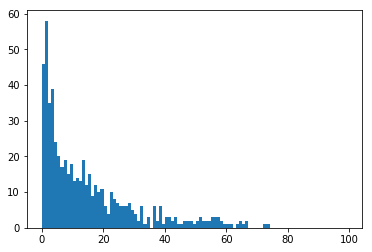

1339


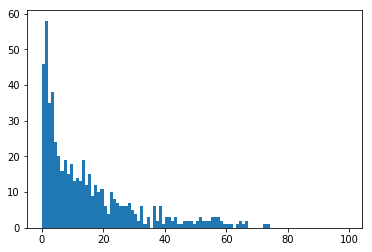

1340


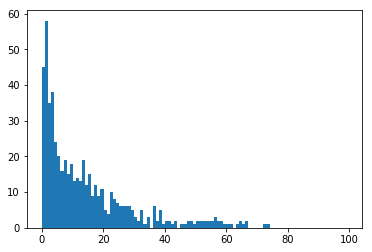

1341


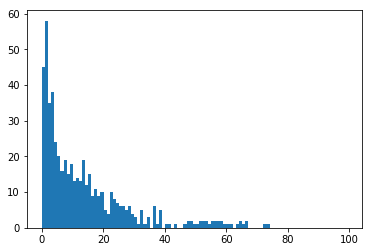

1342


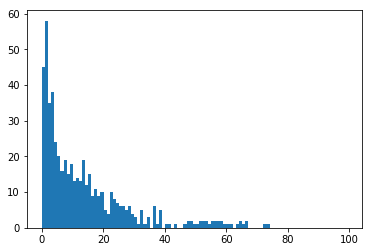

1343


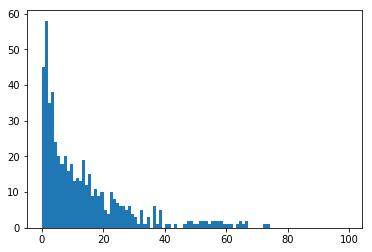

1344


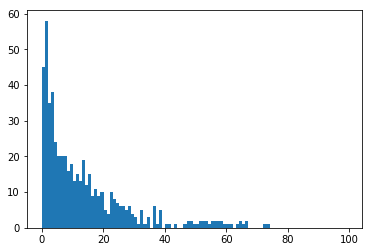

1345


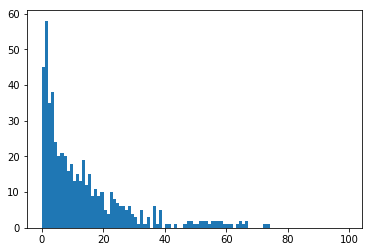

1346


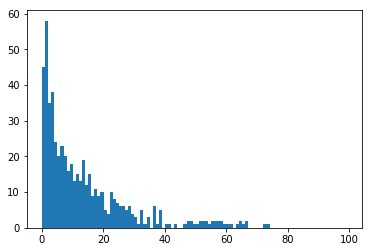

1347


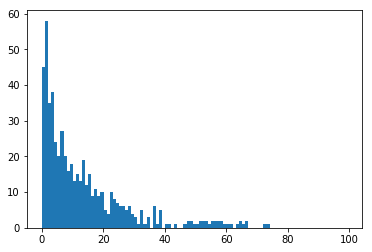

1348


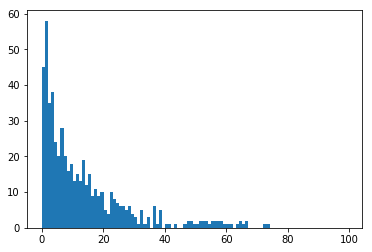

1349


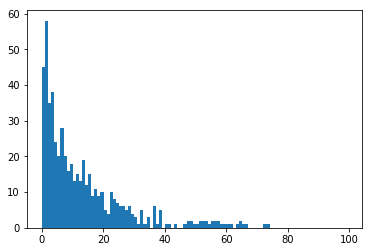

1350


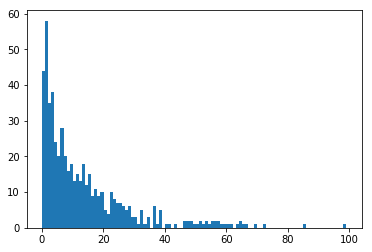

1351


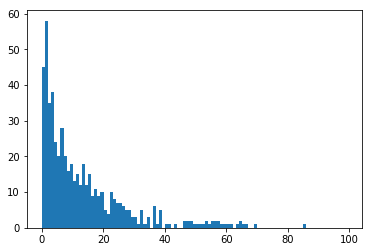

1352


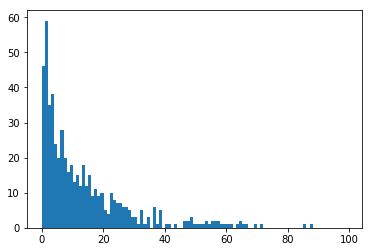

1353


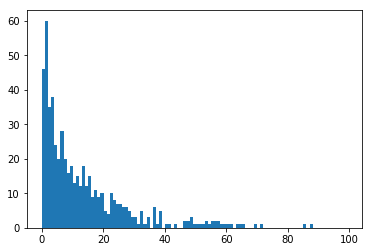

1354


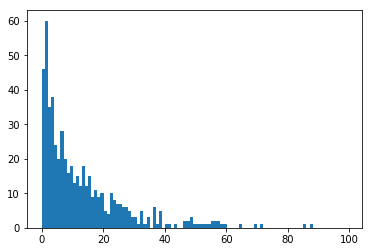

1355


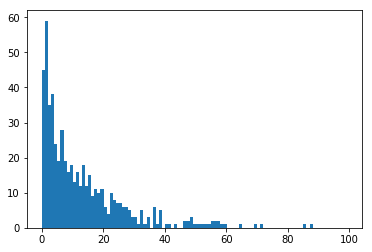

1356


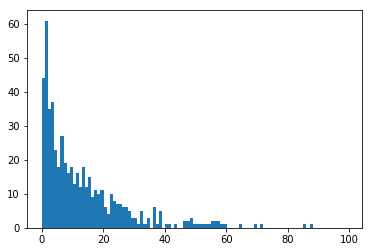

1357


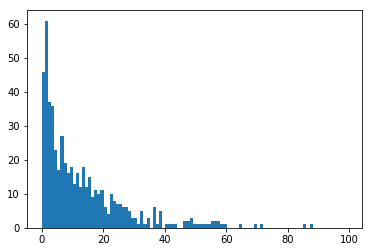

1358


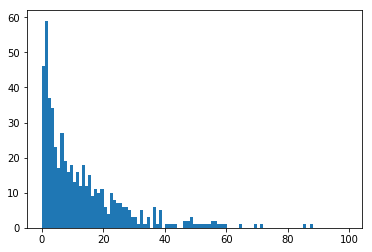

1359


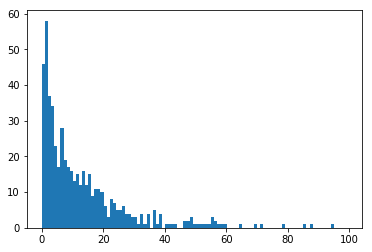

1360


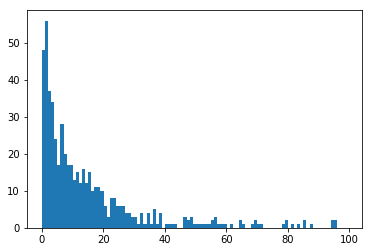

1361


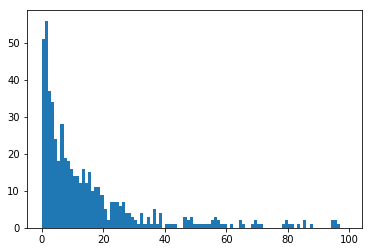

1362


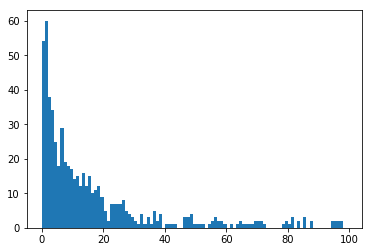

1363


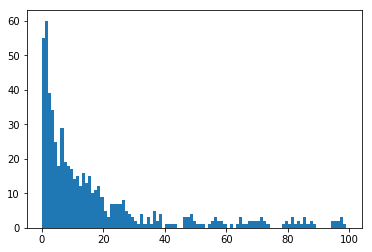

1364


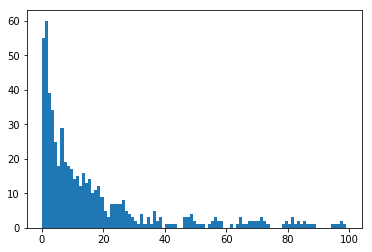

1365


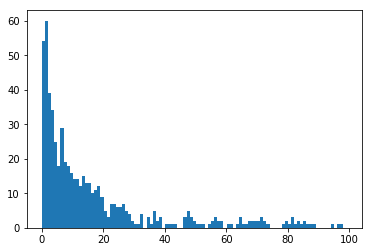

1366


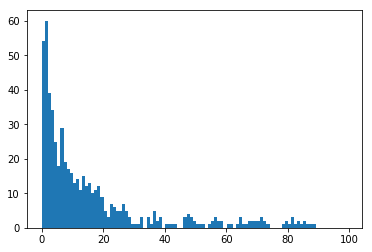

1367


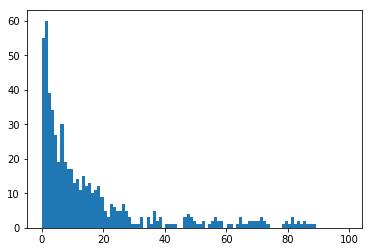

1368


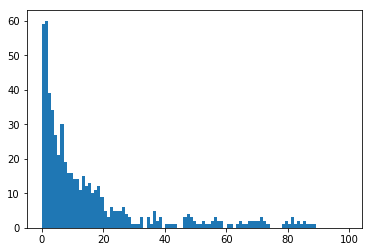

1369


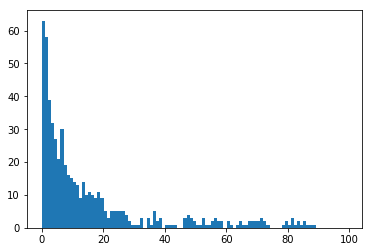

1370


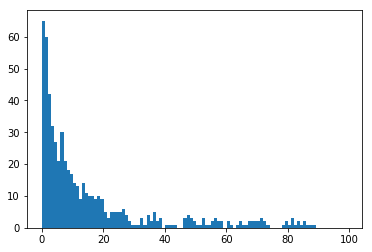

1371


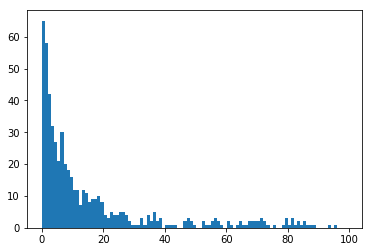

1372


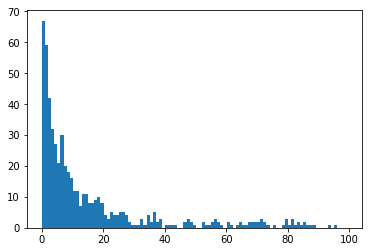

1373


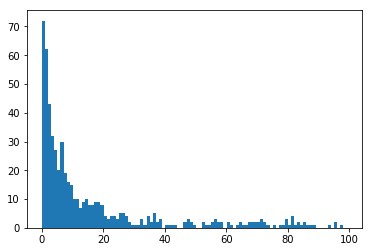

1374


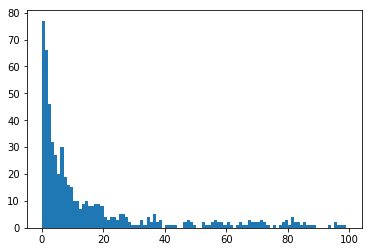

1375


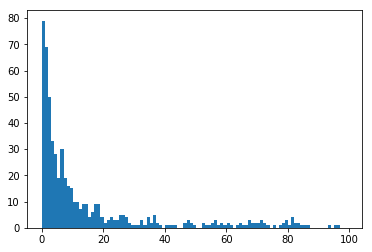

1376


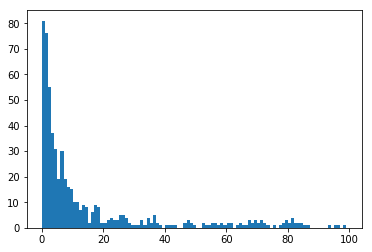

1377


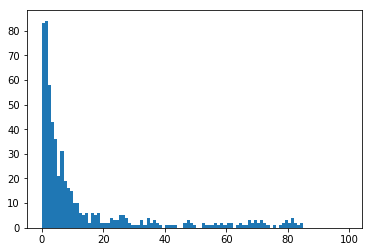

1378


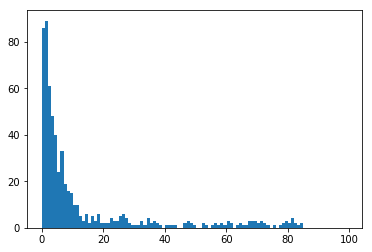

1379


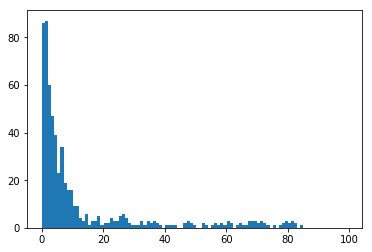

1380


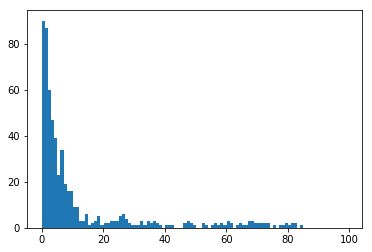

1381


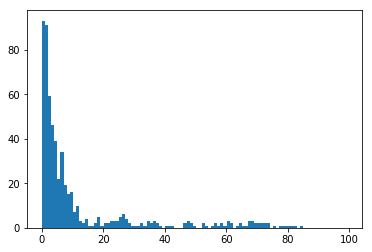

1382


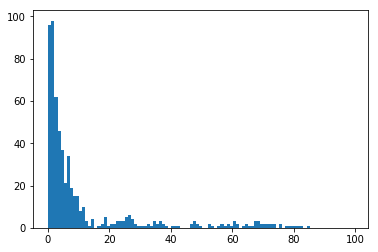

1383


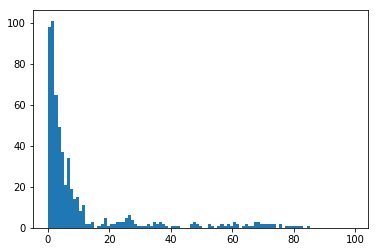

1384


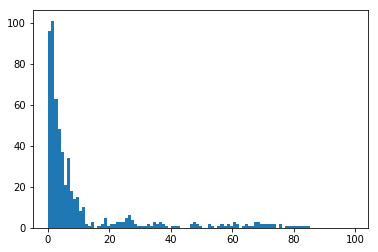

1385


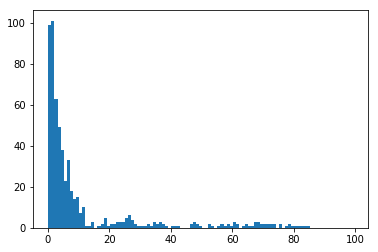

1386


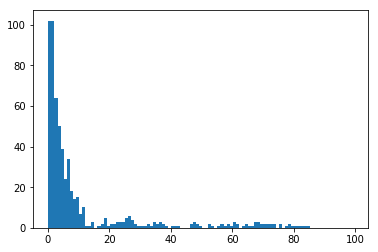

1387


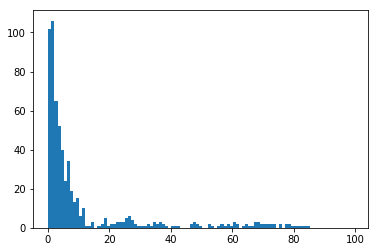

1388


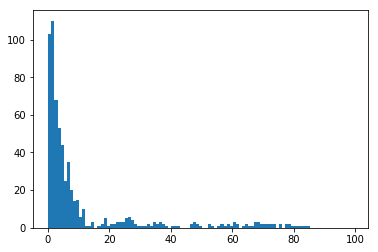

1389


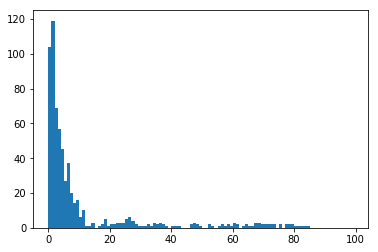

1390


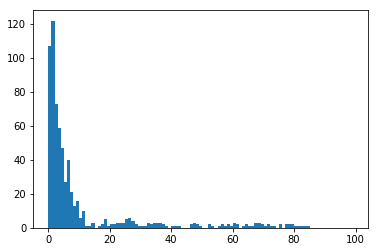

1391


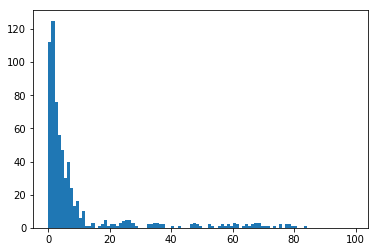

1392


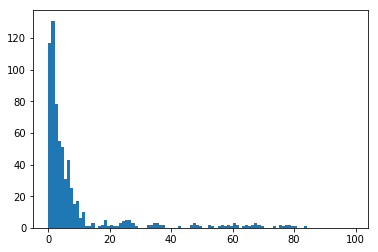

1393


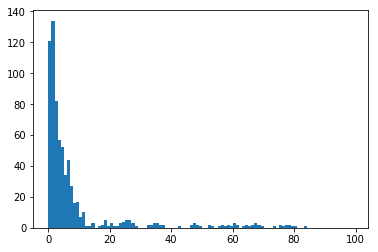

1394


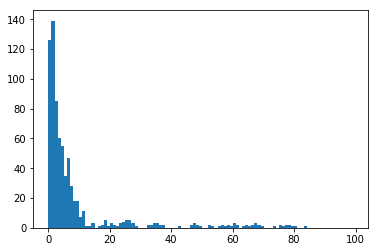

1395


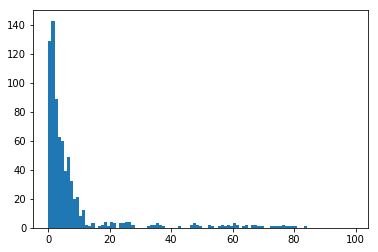

1396


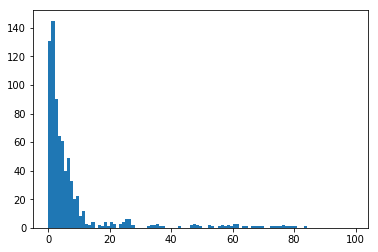

1397


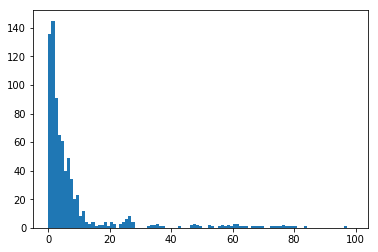

1398


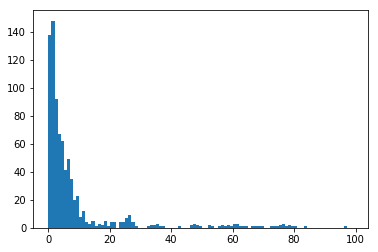

1399


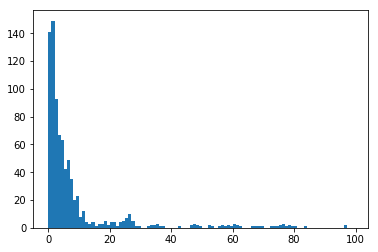

1400


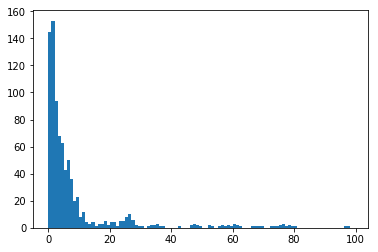

1401


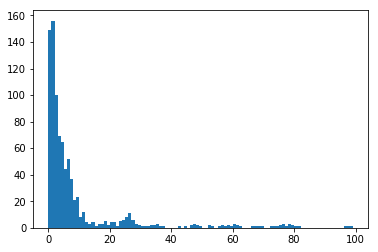

1402


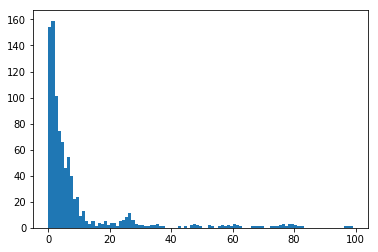

1403


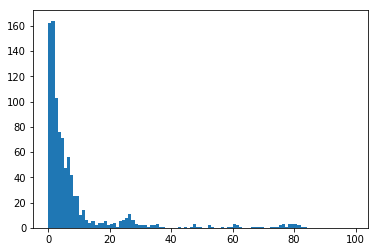

1404


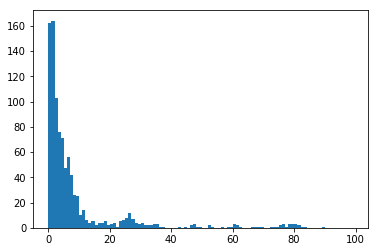

1405


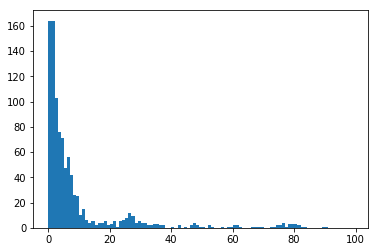

1406


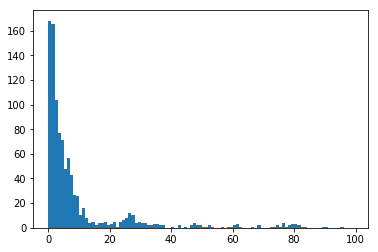

1407


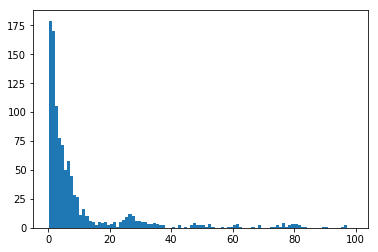

1408


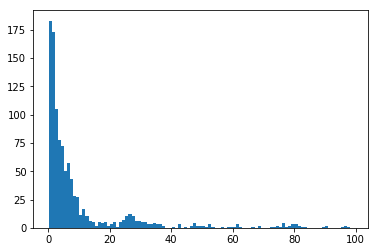

1409


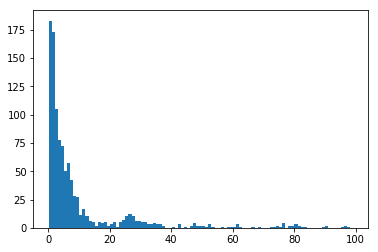

1410


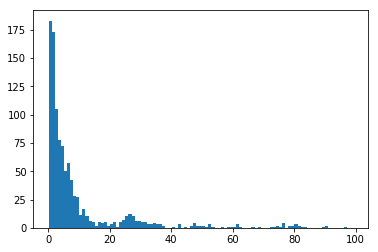

1411


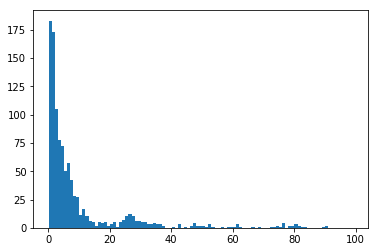

1412


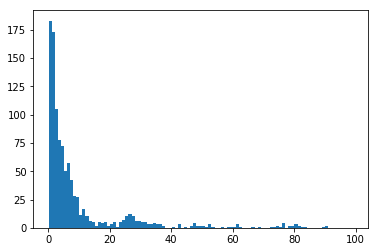

1413


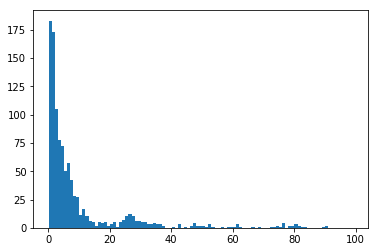

1414


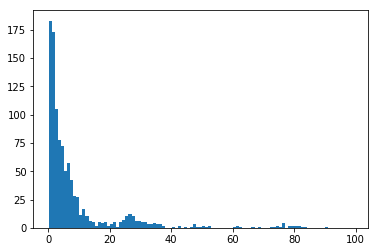

1415


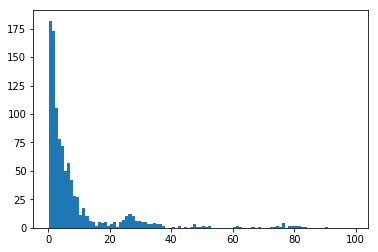

1416


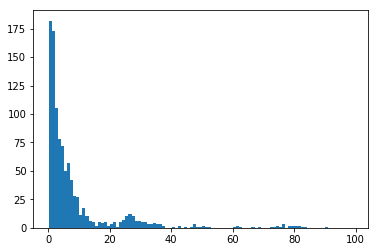

1417


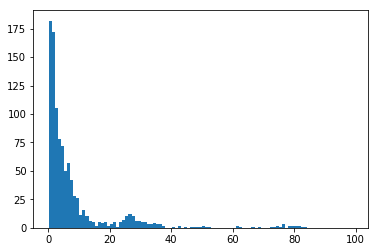

1418


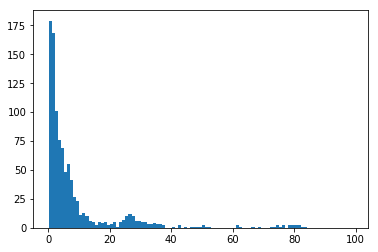

1419


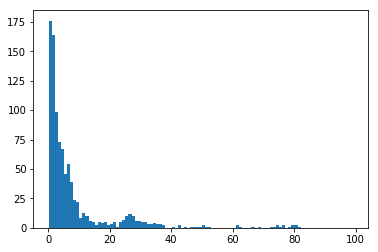

1420


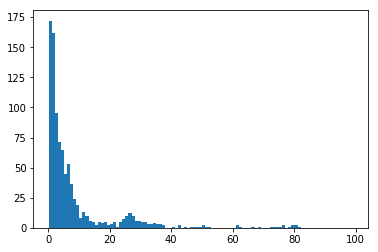

1421


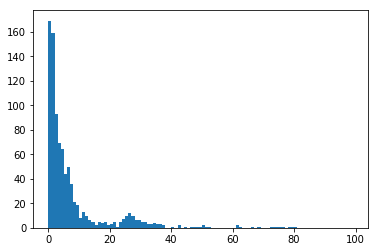

1422


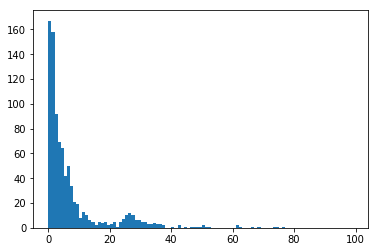

1423


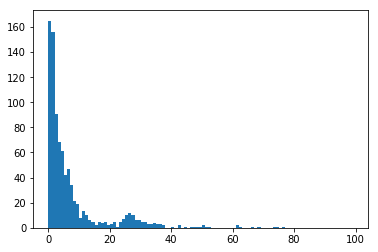

1424


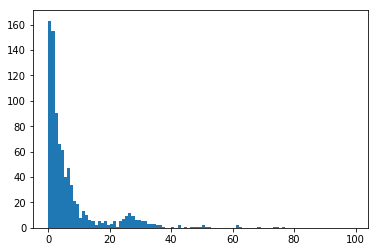

1425


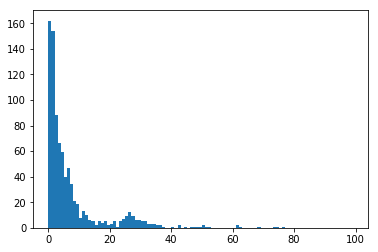

1426


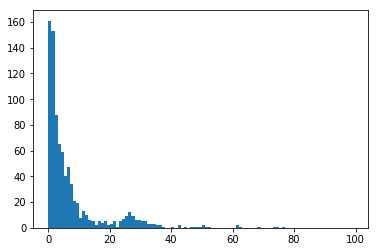

1427


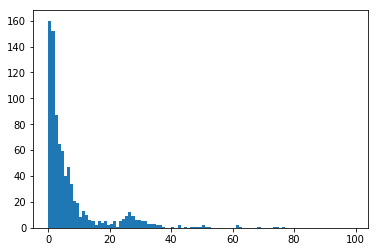

1428


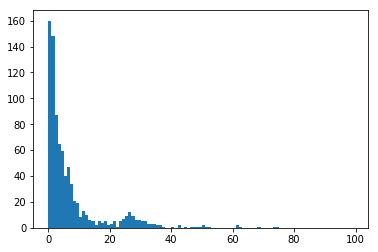

1429


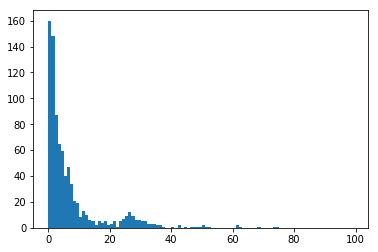

1430


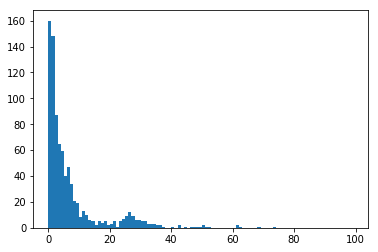

1431


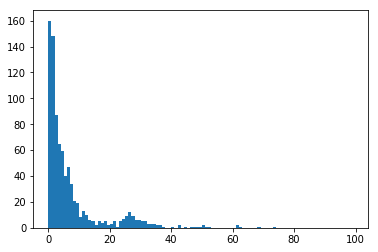

1432


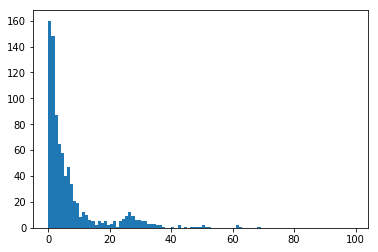

1433


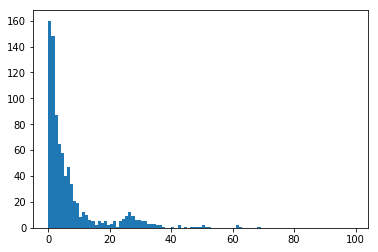

1434


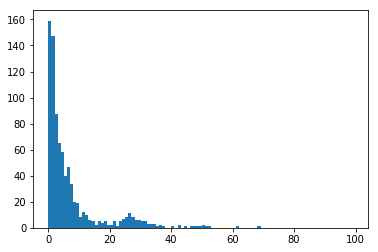

1435


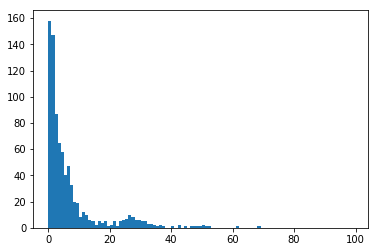

1436


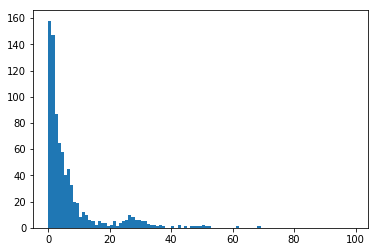

1437


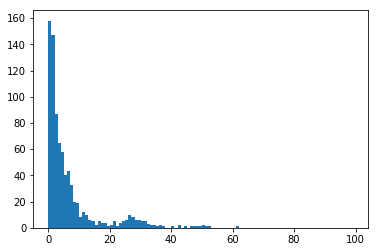

1438


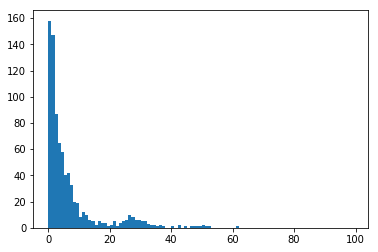

1439


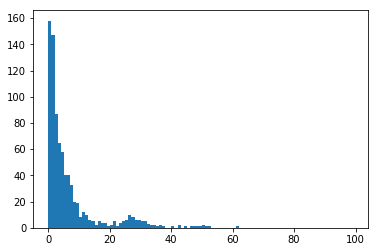

1440


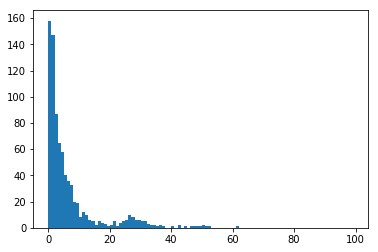

1441


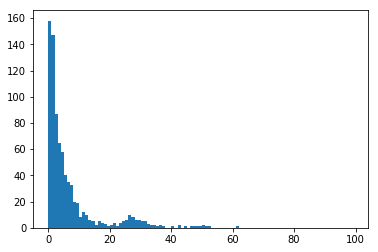

1442


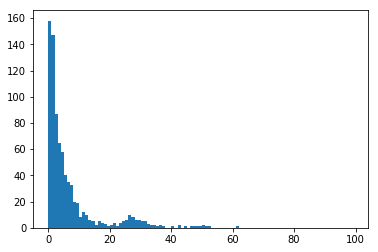

1443


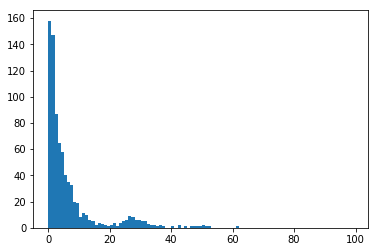

1444


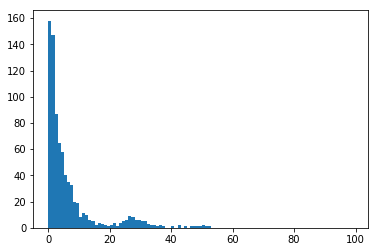

1445


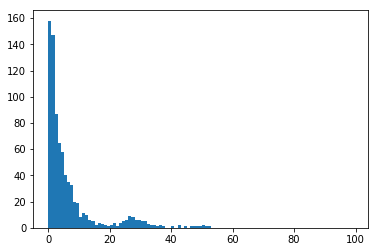

1446


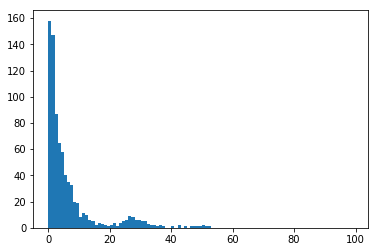

1447


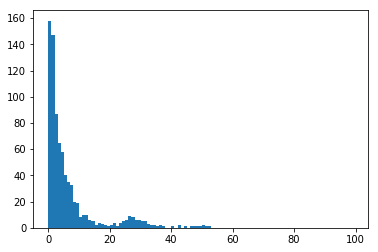

1448


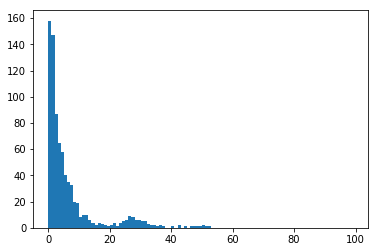

1449


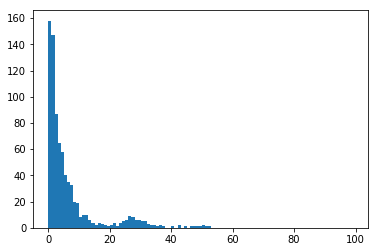

1450


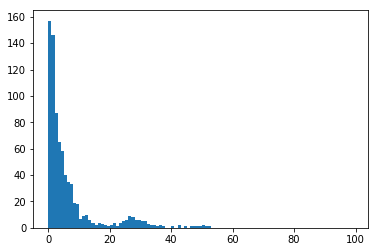

1451


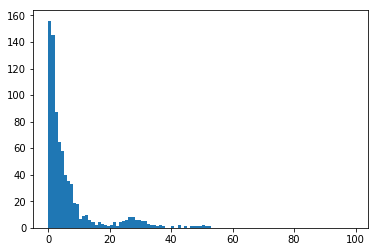

1452


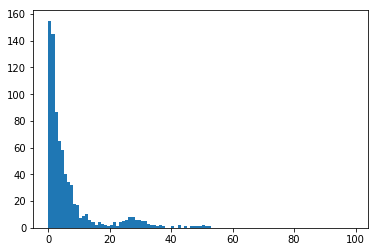

1453


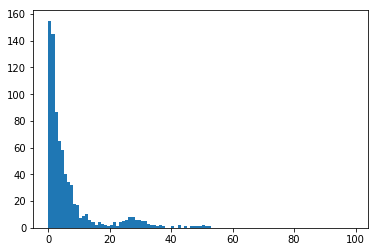

1454


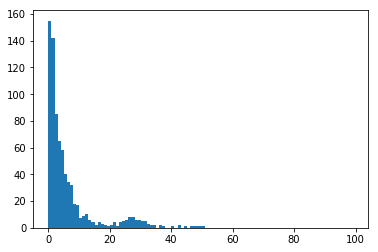

1455


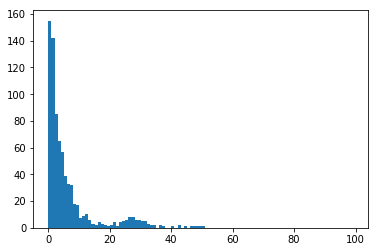

1456


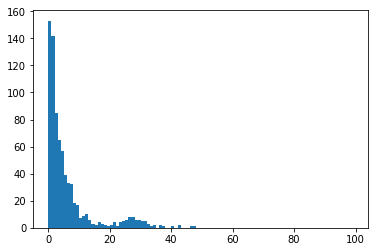

1457


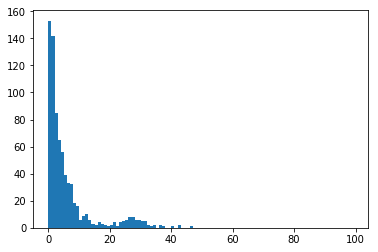

1458


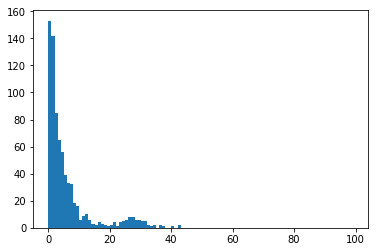

1459


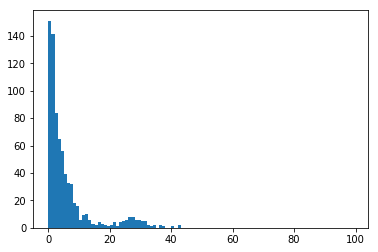

1460


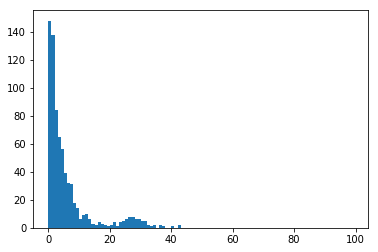

1461


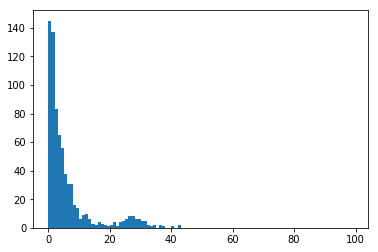

1462


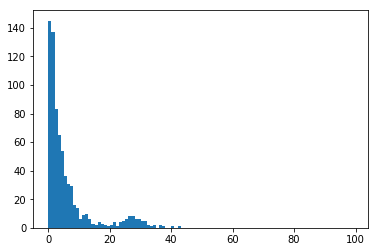

1463


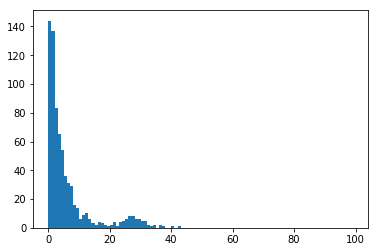

1464


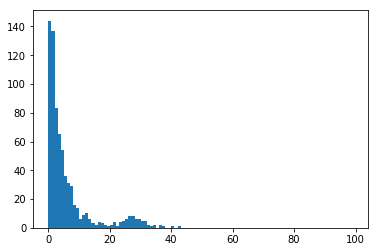

1465


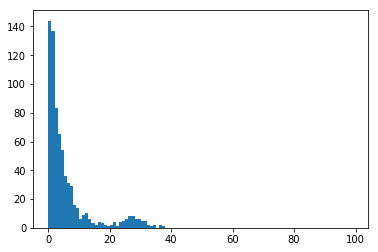

1466


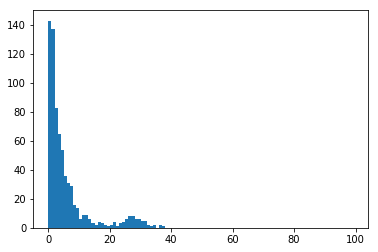

1467


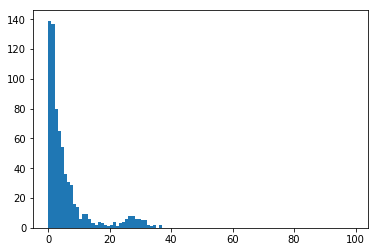

1468


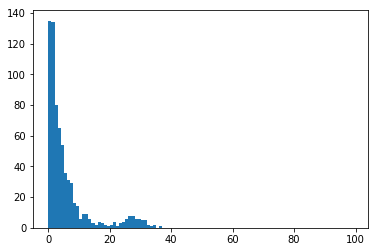

1469


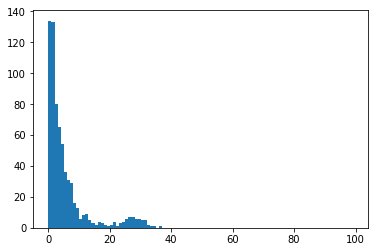

1470


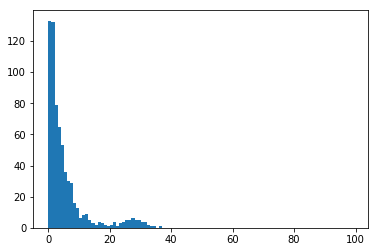

1471


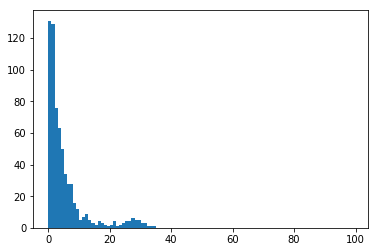

1472


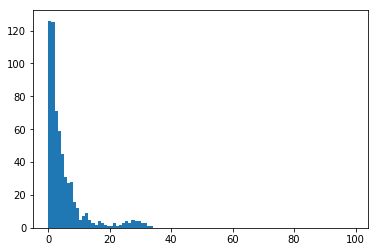

1473


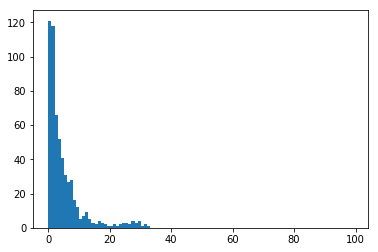

1474


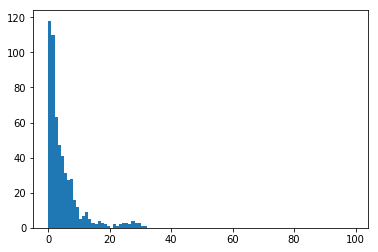

1475


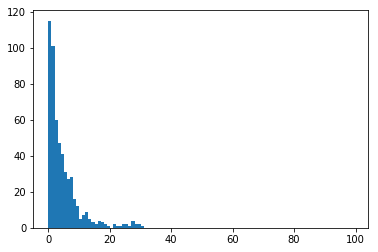

1476


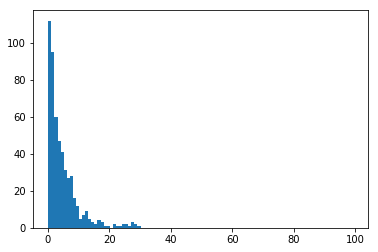

1477


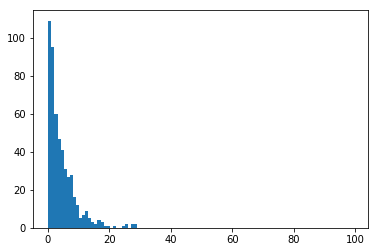

1478


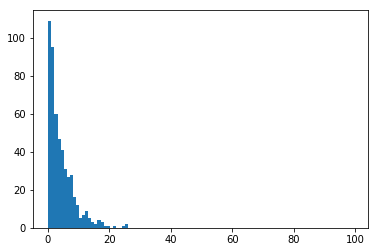

1479


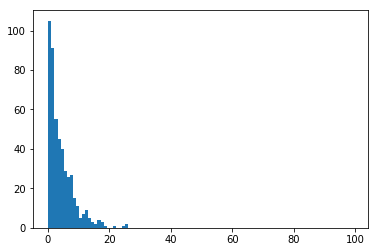

1480


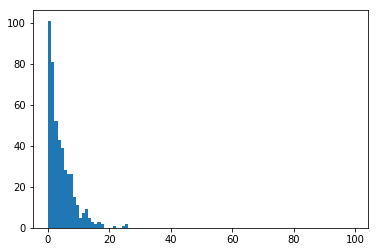

1481


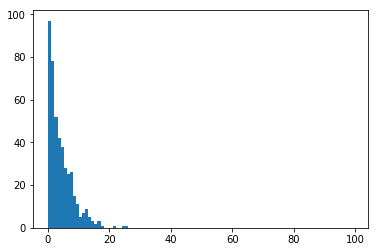

1482


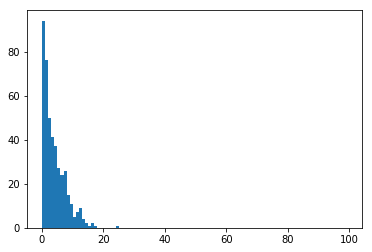

1483


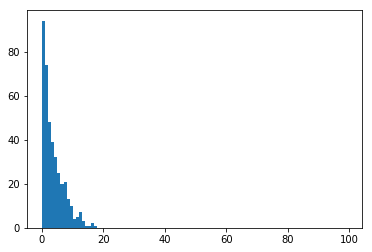

1484


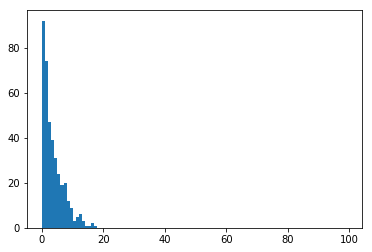

1485


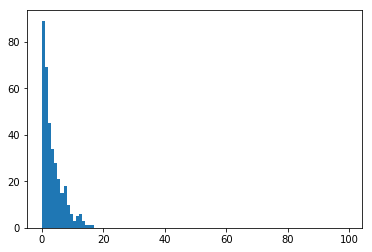

1486


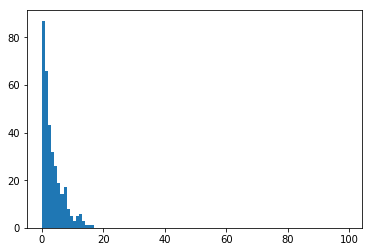

1487


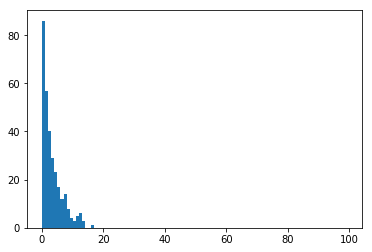

1488


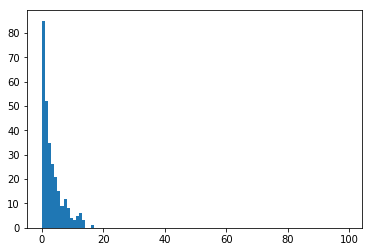

1489


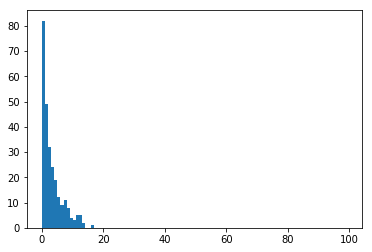

1490


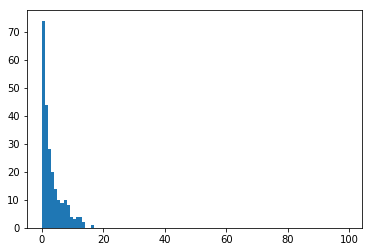

1491


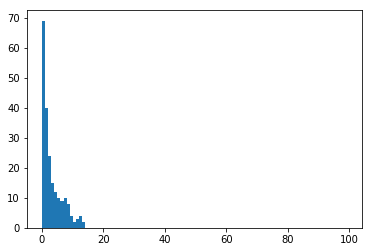

1492


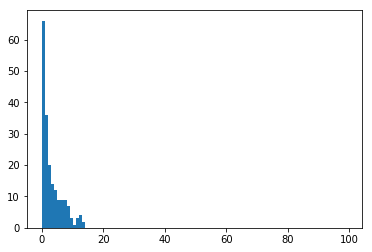

1493


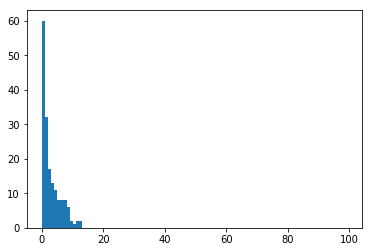

1494


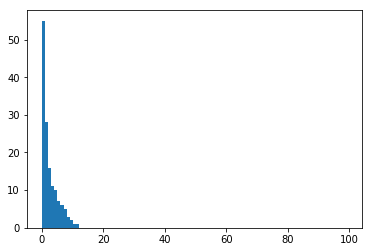

1495


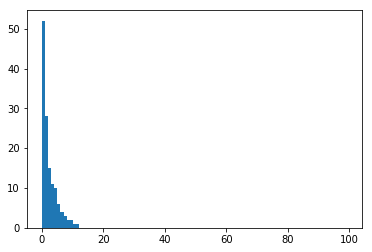

1496


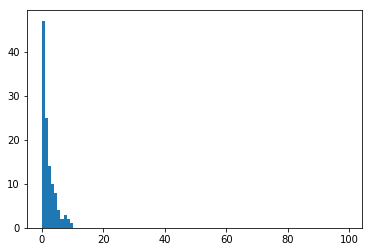

1497


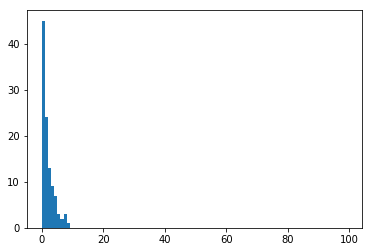

1498


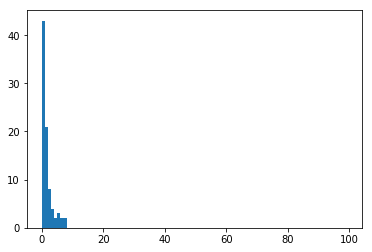

1499


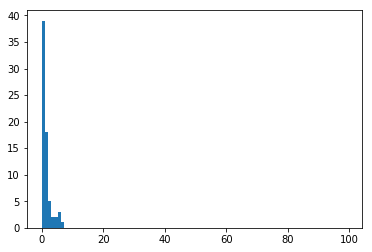

In [13]:
for start_pos in range(0, 1500):
    print(start_pos)
    show_all_dist(have_same_mutation, start_pos*12, (start_pos + 100)*12)

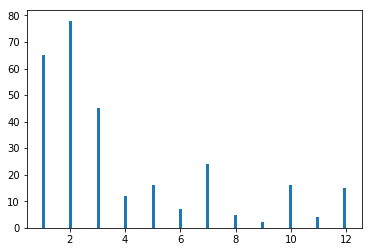

In [10]:
# Calculate hist only for run2 modification
dists_list = []

for monoName in monomers_list:
    monoList = monomers_list[monoName]
    MutationCnt = [0]*1000
    for frM_id in range(len(monoList)):
        for i in range(len(monoList[frM_id][1])):
            MutationCnt[int(monoList[frM_id][1][i])] += 1
    
    #print(MutationCnt)
    for frM_id in range(len(monoList)):
        doubleMut = []
        for i in range(len(monoList[frM_id][1])):
            if MutationCnt[int(monoList[frM_id][1][i])] == 2:
                doubleMut.append(monoList[frM_id][1][i])
        if len(doubleMut) == 0:
            continue
           
        for scM_id in range(frM_id + 1, len(monoList)):
            if have_same_mutation(("",doubleMut), monoList[scM_id]):
                dists_list.append(scM_id - frM_id)
                break
dists_list.sort()
show_hist(dists_list)

In [12]:
def equal_mutations(monomer1, monomer2):
    return (monomer1[1] == monomer2[1])

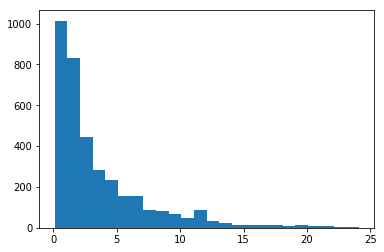

In [13]:
show_all_nigber_dist(equal_mutations)

1506
1505
1507
S3CXH1L.2 136 ('1632', ['8', '35']) 152 ('1824', ['8', '35'])
1507
S3CXH1L.12 110 ('1312', ['50', '64']) 242 ('2894', ['50', '64'])
S3CXH1L.12 297 ('3554', ['55', '84']) 320 ('3828', ['55', '84'])
S3CXH1L.12 407 ('4837', ['144']) 500 ('5952', ['144'])
S3CXH1L.12 410 ('4873', ['96', '144']) 506 ('6024', ['96', '144'])
1503
1509
1509
1513
1504
S3CXH1L.6 66 ('802', ['32', '33']) 163 ('1964', ['32', '33'])
1499
1506
1508


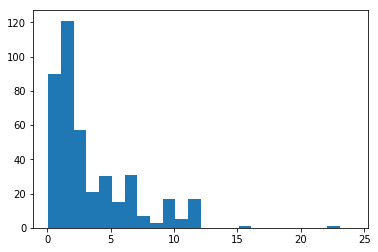

In [16]:
def mutations_hash(mutations):
    res = 0
    for i in range(len(mutations)):
        res = res * 179 + int(mutations[i])
    return res%1000000

# Calculate hist only for run2 monomers
dists_list = []

for monoName in monomers_list:
    monoList = monomers_list[monoName]
    MutationCnt = [0]*1000000
    for frM_id in range(len(monoList)):
        MutationCnt[mutations_hash(monoList[frM_id][1])] += 1
    
    #print(MutationCnt)
    print(len(monoList))
    for frM_id in range(len(monoList)):
        cur_hash = mutations_hash(monoList[frM_id][1])
        if MutationCnt[cur_hash] != 2:
            continue
        
        for scM_id in range(frM_id + 1, len(monoList)):
            if mutations_hash(monoList[scM_id][1]) == cur_hash:
                if (scM_id - frM_id > 12):
                    print(monoName, frM_id, monoList[frM_id], scM_id, monoList[scM_id])
                dists_list.append(scM_id - frM_id)
                break


dists_list.sort()
#print(dists_list)
show_hist(dists_list)

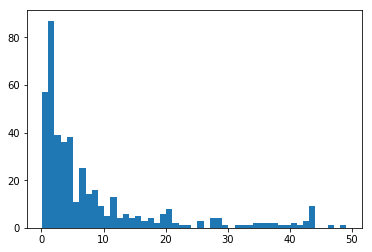

In [26]:
# Show dist between same HORS
def is_same(hor1_id, hor2_id):
    pos1_12 = -1;
    pos2_12 = -1;
    
    for monoName in monomers_list:
        monoList = monomers_list[monoName]
        cid1 = 0
        cid2 = 0
        if pos1_12 == -1:
            pos1_12 = int(monoList[hor1_id][0])//12
        else:
            for i in range(-20, 20):
                if (hor1_id + i < len(monoList)) and int(monoList[hor1_id + i][0])//12 == pos1_12:
                    cid1 = hor1_id + i
                    
        if pos2_12 == -1:
            pos2_12 = int(monoList[hor2_id][0])//12
        else:
            for i in range(-20, 20):
                if (hor2_id + i < len(monoList)) and int(monoList[hor2_id + i][0])//12 == pos2_12:
                    cid2 = hor2_id + i
        
        if cid1 == 0 or cid2 == 0:
            continue
            
        if (monoList[cid1][1] != monoList[cid2][1]):
            return False
    return True
        
    
dists_list = []
for hor1_id in range(0, 1300):
    for hor2_id in range(hor1_id + 1, 1300):
        if is_same(hor1_id, hor2_id):
            dists_list.append(hor2_id - hor1_id)
            break
dists_list.sort()
#print(dists_list)
show_hist(dists_list)